# pandas is all about analyzing data. And a major part of the analysis that we do in pandas can be phrased as, "Where this is the case, show me that."

Here is the list of all the chapters:
### 1. Pandas Series
### 2. Pandas DataFrames 
### 3. Importing and exporting data
### 4. Indexes
### 5. Cleaning data
### 6. Grouping, joining, and sorting
### 7. Midway project
### 8. Strings
### 9. Dates and times
### 10. Visualization
### 11. Performance
### 12. Final project

reference: Pandas Workout by reuven lerner https://www.manning.com/books/pandas-workout and https://github.com/reuven/pandas-workout

# 1. Pandas Series

Lessons learned:

* If I don't specify index when creating a pandas series, then the series index will be the default, integers starting from 0


* Given the flexibility and power pandas gives me, I can assign a list, NumPy array, or pandas series as an index. However, the data structure you pass must be of the same length as the series. If it isn’t, you’ll get a ValueError exception. 


* I can set, or even change, the index even after the series has already been created using s.index = ...

  
* **sort_values() method**:
    
    it is a pandas method that sorts the values of a one-dimensional array or a pandas Series. It returns a new Series or DataFrame (depending on the input) with the values sorted in ascending or descending order. By default, the sorting is in **ascending order**, but you can sort in descending order by passing the parameter ascending=False


* argmax() is a function that returns the index of the first occurrence of the maximum value in a one-dimensional array or a pandas Series. It is similar to the idxmax() method, but it returns the index position of the maximum value rather than the index label.


* idxmax() is a pandas method that returns the label of the first occurrence of the maximum value in a one-dimensional array or a pandas Series. It is similar to the argmax() function, but it returns the index label of the maximum value rather than the index position.


*  The "round" method, when given a positive integer argument, rounds numbers after the decimal point. When given a negative integer argument, it rounds numbers *before* the decimal point!

# **Retrieving** a series individual elements using textual vs. positional indexes:

  -- Use .iloc for the numeric index, and .loc for the custom textual index. You don’t need to use .iloc or .loc when you **retrieve slices**, however.
  
  
* Some notes on .iloc and .loc accessor to retreive values:

  -- Instead of using s[i] it is generally better to use s.iloc[i] to retrieve positional numeric index i from series s. This is necessary when working with dataframes, but not when working with series. However, do it to get more comfortable with, since it is a must when working with dataframes. 
  
  -- However, the need for .iloc and .loc goes away when slicing. Even when we’re working with data frames, pandas assumes that if you’re using a slice, then you want to work with the index (rather than the columns). As an example on slicing, go with s['September': 'January'], although I can use s.loc['September': 'January']. Also go with s[0:5] although you can try s.iloc[0:5]  
  
  -- When slicing using a textual index like s['September': 'January']: unlike using the positional numeric indexes here the slice end is no longer "up to and not including," but is rather "up to and including."
  
  -- Most of the time, I prefer to use textual indexes in pandas, because they’re easier to understand, and make the code more readable. But there is a cost: In some simple benchmarking that I performed, I found that it took pandas twice as long to get the text-based slice as the number-based slice. If you find that your pandas analysis is taking a long time, it might be worthwhile to try using positional indexes.
  
**side note:**

In a normal distribution, used for many statistical assumptions, we expect that 68% of a data set’s values will be within 1 standard distribution of the mean, that 95% will be within two standard distributions, and 99.7 will be within three standard distributions.

# Data types in Pandas 

Every series has a dtype attribute, and you can always read from that to know the type of data it contains. Every value in a series is of that type; unlike a Python list or tuple, you cannot have different types mixed together in a series. 

Normally, pandas guesses the dtype based on the data you pass it at creation:

You can specify the type of data in a series by passing a value to the dtype parameter when you create a series like s = pd.Series ([1, 2, 3], dtype = np.float64)

# astype

What if you want to change the dtype of a series once you’ve already created it? You can’t set the dtype attribute; it’s read only. Instead, you will need to create a new series based on the existing one by invoking the astype method:

# Vectorization in Pandas 

One of the most important ideas in pandas (and in NumPy) is that of vectorized operations. When you perform an operation on two different series, the indexes are matched, and the operation is performed via the indexes.

# Selecting values using mask/boolean index in pandas


In Python and other traditional programming languages, we can select elements from a sequence using a combination of for loops and if statements (**THIS IS EXACTLY WHAT I DID TO SOLVE THE ABOVE PROBLEMS**). While you could do that in pandas, you almost certainly don’t want to. Instead, you want to select items using a combination of techniques known as a **"boolean index"** or a **"mask index"**.

Mask indexes are useful and powerful, but their syntax can take some getting used to.

It is called "mask index," because we’re using the list of booleans as a type of sieve, or mask, to select only certain elements.

An explicitly defined list of booleans isn’t very useful or common. But we can also use a series of booleans and those are easy to create. All we need to do is use a comparison operator (e.g., ==) which returns a boolean value. Then we can broadcast the operation, and get a series back. 

We also can use a mask index for assignment like s[s <= s.mean()] = 999 where we replaced the elements less than or equal to the mean with 999.

This technique is worth learning and internalizing, because it’s both powerful and efficient. It’s useful when working with individual series, as in this chapter—but it’s also applicable to entire data frames, as we’ll see later in the book.

# Repeated values for index in pandas series

Yes, unlike the index in a Python string, list, or tuple which are unique, as are the keys in a Python dictionary, the series index can have repeated values—not just integers, but also strings (as in this example) and even other data structures, such as times and dates (as we’ll see in chapter 9). Normally, when we retrieve a value from a series via loc, we expect to get a single value back. But if the index is repeated, then we will get back multiple values. And in pandas, multiple values will be returned as a series.

**note**:

This means that when you retrieve s.loc[i], for a given index value, you can’t know in advance whether you will get a single, scalar value (if the index occurs only once) or a series (if the index occurs multiple times). This is another case in which you need to know your data, to know what type of value you’ll get back.


from chatGPT:

In pandas, the diff() function can be used to calculate the difference between consecutive elements in a Series. This function can also take an optional argument, periods, which specifies the number of periods to shift for the differences to be taken. By default, periods is set to 1.


# FANCY INDEXING

We’ve seen that I can retrieve the item at index 2 with s.loc[2], or the item at index 4 with s.loc[4]. But I can actually retrieve both of them at the same time with what’s known as "fancy indexing" **—passing a list, series, or similar iterable inside of the square brackets**. For example:

s.loc [[2, 4]]

The outer square brackets indicate that we want to retrieve from s using loc. And the inner square brackets indicate that we want to retrieve more than one item. pandas returns a series, keeping the orignal indexes and values.


# pd.read_csv

read_csv is more typically used to create a data frame—but if we provide it with a file that contains only one data point per line, and pass a True value to the squeeze parameter, then we’ll get a series back. 

**s = pd.read_csv('file.csv', squeeze = True, header = None)**

I also set the header parameter to be None, indicating that the first line in the file should not be taken as a column name, but rather is data to be included in our calculations. This will result in the series having a name value of 0, which we can safely ignore.

# value_counts method

It is a series method that is one of my favorites. If you apply value_counts to the series s, you get back a new series whose keys are the distinct values in s, and whose values are integers indicating how often each value appeared. 

Notice that the values are automatically sorted from most common to least common.

Because we get a series back from value_counts, we can use all of our series tricks on it. For example, we can invoke head on it, to get the five most common elements. We can also use fancy indexing, in order to retrieve the counts for specific values. 

If we’re interested in the percentages, not in the raw values, value_counts has an optional normalize parameter, that if set to True returns the fraction. 

so the solution to the above problem would be much soimpler like pass_count.value_counts(normalize = True)[['1', '6']]


# pd.cut

The pd.cut method allows us to **set numeric boundaries, and then to cut a series into parts (known as "bins") based on those boundaries.** Moreover, it can assign labels to each of the bins.

Notice that pd.cut is not a series method, but rather a function in the top-level pd namespace. We’ll pass it a few arguments:

pd.cut(s, bins = [s.min(), 2, 10, s.max()], labels = ['short', 'medium', 'long'])

* our series, s
* a list of four integers representing the boundaries of our three bins, assigned to the bins parameter
* a list of three strings, the labels for our three bins, assigned to the labels parameter

Note that the bin boundaries are **exclusive on the left, and inclusive on the right.** In other words, by specifying that the "medium" bin is between 2 and 10, that means >2 but <=10. The result of this call to pd.cut is a series of the same length as s, but with the labels replacing the values

**good point:**

we can include the lower bound with passig **include_lowest = True** like

df_nyc['trip_distance_group'] = pd.cut(df_nyc['trip_distance'],

                                      bins = [0, 2, 10, df_nyc['trip_distance'].max()],
                                      
                                      labels = ['short', 'medium', 'long'],
                                      
                                      include_lowest = True)

# 1.9 Summary

In this chapter, we saw that a pandas series provides us with some powerful tools to analyze data. Whether it’s the index, reading data from files, calculating descriptive statistics, retrieving values via fancy indexing, or even categorizing our data via numeric boundaries, we were able to do quite a lot.

In the next chapter, we’ll expand our reach to look at data frames, the two-dimensional data strucures that most people think of when they work with pandas.

**1.2 Exercise 1: Test scores**

Create a series of 10 elements, random integers from 70-100, representing scores on a monthly exam. Set the index to be the month names, starting in September and ending in June. (If these months don’t match the school year in your location, then feel free to make them more realistic.)

With this series, answer the following questions:

* What is the student’s average test score for the entire year?
* What is the student’s average test score during the first half of the year (i.e., the first five months)?
* What is the student’s average test score during the second half of the year?
* Did the student improve their performance in the second half? If so, then by how much?

In [2]:
%pylab inline  
# this is a magic command which fires up numpy and matplotlib and also ensures 
# that any graphics we display will be shown within jupyter and not in a separate external application.  

import glob
import pandas as pd

np.random.seed(0)
e = np.random.randint(70, 100, 10)
s = pd.Series (e, index = ['September', 'October', 'November', 'December', 
                           'January', 'February', 'March', 'April', 'May', 'June'])
s

Populating the interactive namespace from numpy and matplotlib


September    82
October      85
November     91
December     70
January      73
February     97
March        73
April        77
May          79
June         89
dtype: int32

In [3]:
print (f"The student’s average test score for the entire year is {s.mean()}")

The student’s average test score for the entire year is 81.6


In [4]:
# using positional indexes 
first_half_scores = s [:5]
print (f"The student’s average test score during the \
first half of the year is {first_half_scores.mean()}")

The student’s average test score during the first half of the year is 80.2


In [5]:
# using textual indexes 
first_half_scores = s ['September' : 'January'] 
print (f"The student’s average test score during the \
first half of the year is {first_half_scores.mean()}")

The student’s average test score during the first half of the year is 80.2


In [6]:
# using positional indexes 
second_half_scores = s [5:]
print (f"The student’s average test score during the \
second half of the year is {second_half_scores.mean()}")

The student’s average test score during the second half of the year is 83.0


In [7]:
s['September': 'January'] 

September    82
October      85
November     91
December     70
January      73
dtype: int32

In [8]:
# this also works but as mentioned for slicing you don't need to use .loc
s.loc['September': 'January'] 

September    82
October      85
November     91
December     70
January      73
dtype: int32

In [9]:
s[0:5]

September    82
October      85
November     91
December     70
January      73
dtype: int32

In [10]:
# this also works but as mentioned for slicing you don't need to use .iloc
s.iloc[0:5]

September    82
October      85
November     91
December     70
January      73
dtype: int32

In [11]:
s.head().mean() # s.head(5).mean()

80.2

In [12]:
s.tail().mean() # s.tail(5).mean()

83.0

**1.2.3 Beyond the exercise**

a. In which month did this student get their highest score? 

b. What were this student’s five highest scores in the year?

c. Round the student’s scores to the nearest 10. So a score of 82 would be rounded down to 80, but a score of 87 would be rounded up to 90.


In [3]:
# my solution a.1
highest_score_month = s.index[s.argmax()]
print (f"The student got the highest score in the month {highest_score_month}")

The student got the highest score in the month February


In [ ]:
# my solution a.2
highest_score_month = s.idxmax()
print (f"The student got the highest score in the month {highest_score_month}")

In [ ]:
# my solution a.3
s.sort_values().index[-1]

In [ ]:
# or
s.sort_values(ascending = False).index[0]

In [ ]:
# my solution a.4
s[s==s.max()].index[0]

In [ ]:
# my solution b
s.sort_values(ascending = False)[:5]

In [ ]:
# my solution c
s.round(-1)

# Mean and standard deviations

In [1]:
import cv2
std_formula = cv2.imread('C:/Users/dania/Desktop/Capture.png')
plt.imshow(std_formula)
plt.show()

# std to the power of 2 = variance. 

NameError: name 'plt' is not defined

In [ ]:
import math
std = math.sqrt(((s - s.mean())**2).sum()/len(s)) # s.count() in lieu of len(s) also works 
std

In [ ]:
s.std()

By default, pandas assumes that we don’t actually want to divide by s.count(), but rather by s.count() - 1. This is known as the "sample standard deviation," and is typically used on a sample of the data, rather than the entire population. If you really want to get the same result, you can pass a value of 0 to the ddof ("delta degrees of freedom") parameter, and get the same value as we calculated:

In [ ]:
s.std(ddof=0)

In [ ]:
# If you prefer to get a normal distribution, in which the randomly selected numbers are centered around 
# a mean and within a particular standard deviation, you can instead use np.random.normal. It takes three 
# arguments: The mean, the standard deviation, and the number of values to generate.
# It returns a NumPy array with a dtype of np.float64, which we can then use to create a new series.

y = np.random.normal(0, 1, 10000)
plt.hist(y, bins=50, density=True, histtype='stepfilled', color='blue', alpha=0.2)
plt.xlabel('X-axis')
plt.ylabel('Frequency')
plt.title('Normal Distribution')

# Show the plot
plt.show()

In [ ]:
ss = pd.Series ('abcd edfg hijk lmno'.split())
ss

In [ ]:
'abcd edfg hijk lmno'.split()

In [ ]:
ss.sum()

**1.3 Exercise 2: Scaling test scores**

For this exercise, I want you to generate 10 test scores between 40 and 60, again using an index starting at September and ending with June. Find the mean of the scores, and add the difference between the mean and 85 to each of the scores.

In [4]:
%pylab inline 
import pandas as pd 
np.random.seed(0)
scores = np.random.randint(40, 60, 10)
months = ['September', 'October', 'November', 'December', 
          'January', 'February', 'March', 'April', 'May', 'June']
scores_s = pd.Series (scores, index = months)
scores_s
scaled_scores_s = scores_s + (85 - scores_s.mean()) # this is pandas broadcasting 

Populating the interactive namespace from numpy and matplotlib


In [5]:
scores_s.mean()

49.0

In [7]:
type(scores_s.mean())

numpy.float64

In [6]:
scores_s

September    52
October      55
November     40
December     43
January      43
February     47
March        49
April        59
May          58
June         44
dtype: int32

In [ ]:
scores_s.dtype

In [8]:
scaled_scores_s.dtype

dtype('float64')

The final series has a dtype of float64, whereas scores_s had a dtype of int. Why the change? Because whenever we perform an operation on an int and a float, we get back a float, even if there’s no need for it, as with addition. And division in Python 3 always returns a float. So the call to s.mean(), because it invokes division, will always return a float. And then when we add (via broadcast) the integer values in scores_s with the floating-point mean, we get a series of floats.

In [ ]:
scaled_scores_s

In [ ]:
s = pd.Series ([1, 2, 3], dtype = np.float64)
s.dtype


In [ ]:
my_series = pd.Series ([1,2,3,4])#, dtype = np.float64)
my_series

In [ ]:
pd.Series([127], dtype = np.int8) + 1

In [ ]:
s = pd.Series([1, 2, 3])
s.dtype

In [ ]:
s = pd.Series('1 2 3'.split())
s.dtype

In [ ]:
s = s.astype(np.int64)
s.dtype

In [ ]:
s = s.astype(np.float16)
s.dtype

In [ ]:
s1 = pd.Series ([10, 20, 30, 40], index = list('abcd'))
s1

In [ ]:
s2 = pd.Series ([100, 200, 300, 400], index = list('dcba'))
s2

In [ ]:
s1 + s2

In [ ]:
s1 + 4

**1.3.3 Beyond the exercise**

Whether you’re performing an operation on two series, or using broadcasts to combine a series and a scalar, the index is one of the most important ideas in pandas. Here are some more exercises having to do with these topics:

* a. There’s at least one other way to scale test scores, namely by looking at both the mean of the scores and their standard deviation. We can say anyone who scored within 1 standard deviation of the mean got a C (below the mean) or a B (above the mean). Anyone who scored more than 1 standard deviation above the mean got an A, and anyone who got more than one standard deviation below the mean got a D. During which months did our student get an A, B, C, and D?


* b. Were there any test scores more than 2 standard deviations above or below the mean? If so, in which months?


* c. How close are the mean and median to one another? What does it mean if they are close? What would it mean if they are far apart?

In [ ]:
scores_s

In [ ]:
score_mean = scores_s.mean()
score_std = scores_s.std()

In [ ]:
score_mean

In [ ]:
score_std

In [ ]:
scores_s

In [ ]:
# my solution a. 1
scores_A = [] 
scores_B = [] 
scores_C = [] 
scores_D = [] 
score_mean = scores_s.mean()
score_std = scores_s.std()
for i, score in enumerate (scores_s):
    #print (i, scores_s.index[i])
    if score - score_mean >= 0:
        if (score - score_mean) > score_std:
            scores_A.append(scores_s.index[i])
        else:
            scores_B.append(scores_s.index[i])
    else:
        if abs((score - score_mean)) < score_std:
            scores_C.append(scores_s.index[i])
        else:
            scores_D.append(scores_s.index[i])
        

In [ ]:
scores_A = " and ".join(scores_A)
print(f"During months {scores_A} the student got A")

In [ ]:
scores_B = " and ".join(scores_B)
print(f"During months {scores_B} the student got B")

In [ ]:
scores_C = ", ".join(scores_C)
print(f"During months {scores_C} the student got C")

In [ ]:
scores_D = " and ".join(scores_D)
print(f"During months {scores_D} the student got D")

In [ ]:
# I will get back to this later to solve this problem using pandas dataframe 
scores_df = pd.DataFrame (scores_s)
scores_df ['scaled socre'] = ''
scores_df

In [ ]:
def scaler (col_value, df, scaled_col_name, i):
    if col_value > score_mean:
        if (col_value - score_mean) > score_std:
            df.at [i, scaled_col_name] = 'A'
        else:
            df [scaled_col_name] = 'B'

In [ ]:
for i, col_val in enumerate (scores_df.values[:, 0]):
    print (f" col val : {col_val} score mean is {score_mean} score std {score_std}")
    scaler (col_val, scores_df, 'scaled socre', i)
    print ((col_val - score_mean) > score_std)

In [ ]:
scores_df.values[:, 0]

In [ ]:
scores_df

In [ ]:
score_mean

In [ ]:
# solution a suggested by reuven

score_A = scores_s [scores_s > scores_s.mean() + scores_s.std()]
print (f"The student got A in the following months: \n{score_A}")
print ("\n")
scores_B = scores_s [(scores_s > scores_s.mean()) & (scores_s < (scores_s.mean() + scores_s.std()))] 
print (f"The student got B in the following months: \n{scores_B}")
print ("\n")
scores_C = scores_s [ (scores_s < scores_s.mean()) & ((scores_s.mean() - scores_s) < scores_s.std())]
print (f"The student got C in the following months: \n{scores_C}")
print ("\n")
scores_D = scores_s [ (scores_s < scores_s.mean()) & ((scores_s.mean() - scores_s) > scores_s.std())]
print (f"The student got D in the following months: \n{scores_D}")


In [ ]:
# my solution b:
scores_s[abs(scores_s - scores_s.mean()) > (2* scores_s.std())]

In [ ]:
scores_s.mean() - scores_s.median()

The mean and median are basically the same, which means that we don't have any large outliers skewing the mean's value. If the mean were much higher than the median, then we would assume we have at least one very high test score. And if the mean were much lower than the median, we could assume we have at least one very low test score.

**1.4 Exercise 3: Counting 10s digits**

In this exercise, I want you to generate 10 random integers in the range 0 - 100. (Remember that the np.random.randint function returns numbers that include the lower bound, but exclude the upper bound.) Create a series containing those numbers' 10s digits. Thus, if our series contains 10, 20, 30, we want a series with 1, 2, 3.

In [9]:
np.random.seed(0)
s = pd.Series(np.random.randint(0, 100, 10))
(s / 10).astype(np.int8)

0    4
1    4
2    6
3    6
4    6
5    0
6    8
7    2
8    3
9    8
dtype: int8

In [10]:
np.random.seed(0)
s = pd.Series(np.random.randint(0, 100, 10))
#(s / 10).astype(str).apply(lambda x:x[0]) 
(s/10).astype(str).str.get(0)

0    4
1    4
2    6
3    6
4    6
5    0
6    8
7    2
8    3
9    8
dtype: object

In [11]:
s

0    44
1    47
2    64
3    67
4    67
5     9
6    83
7    21
8    36
9    87
dtype: int32

**1.4.3 Beyond the exercise**

a. What if the range were from 0 - 10,000? How would that change your strategy, if at all?


b. Given a range from 0 to 10,000, what’s the smallest dtype we should use for our integers?


c. Create a new series, with 10 floating-point values between 0 and 1,000. Find the numbers whose integer component (i.e., ignoring any fractional part) are even.

In [ ]:
# my solution to a
np.random.seed(0)
s = pd.Series (np.random.randint(0, 10000, 10))
(s/10).astype(str).str.get(-3).astype(np.int8)

In [ ]:
# reuven solution to a
s.astype(str).str.get(-2).fillna('0').astype(np.int8)

In [ ]:
# solution to b
s.astype(np.int8)

In [ ]:
s.astype(np.uint8)

In [ ]:
s.astype(np.int16)

So it seems we really need to use either np.int16 or np.uint16 to avoid problems!

In [ ]:
# my solution to c
np.random.seed(0)
s = pd.Series(np.random.uniform(1, 1000, 10))
num = [] 
for e in s:
    if np.floor(e)%2 ==0:
        num.append(e)
num

In [ ]:
# reuven's approach, which is based on using a mask index on s:
s[s.astype(np.int16) % 2 == 0]

In [ ]:
# example from chatGPT:

df = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})

# Create a mask to select only rows where column 'A' is greater than 1
mask = df['A'] > 1

# Apply the mask to the DataFrame
df_masked = df[mask]

# Print the masked DataFrame
print(df_masked)


In [ ]:
s = pd.Series([10, 20, 30, 40, 50])
s[3]

In [ ]:
s[[True, True, False, False, True]]

**1.5 Exercise 4: Descriptive statistics**

The mean, median, and standard deviation are three numbers we can use to get a better picture of our data. But there are some other numbers that we can use to fully understand it. These are collectively known as "descriptive statistics."

For this exercise, I want you to:

* Generate a series of 100,000 floats in a normal distribution, with a mean at 0 and a standard deviation of 100.
* Get the descriptive statistics for this series. How close are the mean and median?
* Replace the minimum value with 5 times the maximum value.
* Get the descriptive statistics again. By how much did the mean, median, and standard deviations move, and why?


In [ ]:
np.random.seed(0)
s = pd.Series(np.random.normal(0, 100, 100_000))
s

In [ ]:
s.describe()

In [ ]:
s.median()

In [ ]:
s.mean()

In [ ]:
s[s == s.min()] = 5 * s.max()

In [ ]:
s.describe()

In [ ]:
s.median()

Mean was moved more than median. The median barely shifted. That’s because it tends to be the most stable measurement, even when we have fluctuations at the extremes. 

**1.5.3 Beyond the exercise**

* Demonstrate that 68%, 95%, and 99.7% of the values in s are indeed within 1, 2, and 3 standard distributions of the mean.

* Calculate the mean of numbers greater than s.mean(). Then calculate the mean of numbers less than s.mean(). Is the average of these two numbers the same as s.mean()?

* What is the mean of the numbers beyond 3 standard deviations?

In [ ]:
s [abs(s - s.mean()) < s.std()].count() / s.count() *100

In [ ]:
# let's nut use abs

s[(s < s.mean() + s.std()) & (s > s.mean() - s.std())].count() / s.count()*100

In [ ]:
s [ abs(s - s.mean()) < 2 * s.std()].count() / s.count() * 100

In [ ]:
s [ abs (s - s.mean()) < 3 * s.std()].count() / s.count() * 100

In [ ]:
a = s[s >s. mean()].mean()

In [ ]:
b = s [ s < s.mean()].mean()

In [ ]:
np.mean ([a, b])

In [ ]:
s.describe()

In [ ]:
s[abs((s - s.mean())) > 3 * s.std()].mean()

**1.6 Exercise 5: Monday temperatures**
    
It’s common to assume that the index in a pandas series is unique. After all, the index in a Python string, list, or tuple is unique, as are the keys in a Python dictionary. **But it turns out that a series index can contain repeated values. This turns out to be quite useful in many ways.**

In this exercise, I want you to create a series of 28 temperature readings in Celsius, representing four seven-day weeks, randomly selected from a normal distribution with a mean of 20 and a standard deviation of 5, rounded to the nearest integer. The index should start with Sun, continue through Sat, and then repeat Sun through Sat until each temperature has a value.

The question is: What was the mean temperature on Mondays during this period?

In [ ]:
np.random.seed(0)
days = 'Sun Mon Tue Wed Thr Fri Sat'
s = pd.Series (np.round(np.random.normal(20, 5, 28)), index = days.split()*4).astype(np.int8)
s

In [ ]:
s[s.index == 'Mon'].mean()

In [ ]:
# or reuven's approach:
s.loc['Mon'].mean(0)

**1.6.3 Beyond the exercise**

* a. What was the average temperature on weekends (i.e., Saturdays and Sundays)?
* b. How many times will the change in temperature from the previous day be greater than 2 degrees?
* c. What are the two most common temperatures in our data set, and how often does each appear?

In [ ]:
# my solution to a
s [(s.index == 'Sun') | (s.index == 'Sat')].mean()

In [ ]:
# reuven better solution to a:
s[['Sun', 'Sat']].mean()

In [ ]:
s.loc[['Sat', 'Sun']].mean() # this is called fancy indexing which will be discussed later 

In [ ]:
# my solution to b
count = 0 
for i in range(len(s)-1):
    if (s[i+1] - s[i]) > 2:
        count +=1
print (count)
        
    

In [ ]:
# reuven solution to b

s [s.diff()> 2]

In [ ]:
s.value_counts().head(2)

Note from reuven's github:
value_counts returns a series in which the values from s are 
the index, the number of appearances is the value, and the
items are ordered from most common to least common. We can
then use "head" to get only the 2 most common values.

In [ ]:
s = pd.Series ([10, 20, 30, 40, 50])
s[3]

In [ ]:
s.iloc[3]

In [ ]:
s

In [ ]:
s.loc[[1, 2]]

**1.7 Exercise 6: Passenger frequency** 
    
In this exercise, we’re going to start to look at some real-world data. We’ll be looking at reading from and writing to data in greater depth starting in chapter 3, but we’re going to start here by reading from a file into a series. **This is possible with the workhorse pd.read_csv method, which normally returns a data frame but can be coerced into returning a series from a file with the squeeze parameter set to True. (This only works if each line of the file contains a single value, which makes it a CSV file without any commas in it.)**

The data we’ll look at is in the file taxi-passenger-count.csv, available along with the other data files used in this course. The data comes from 2015 data I retrieved from New York City’s open data site, from which you can get enormous amounts of information about taxi rides in New York city over the last few years. This file shows the number of passengers in each of 100,000 rides.

Your task in this exercise is to show what percentage of taxi rides had only 1 passengers, vs. the maximum of 6 passengers.

In [30]:
# my solution

# I got this data from internet
import pandas as pd
import requests

url = 'https://data.cityofnewyork.us/resource/2yzn-sicd.json'
response = requests.get(url)
data = response.json()

df = pd.DataFrame(data)

df.to_csv('data.csv', index=False)


In [31]:
df.head()

,passenger_count,trip_distance,pickup_longitude,pickup_latitude,ratecodeid,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,fare_amount,extra,mta_tax,tip_amount,tolls_amount,total_amount,vendor_id,pickup_datetime,dropoff_datetime,payment_type,imp_surcharge
0,2,1.95,-73.966049194335937,40.754035949707031,1,N,-73.947029113769531,40.775775909423828,9.5,1,0.5,2,0,13.3,2,2015-08-03T18:45:53.000,2015-08-03T18:56:45.000,1,0.3
1,1,1.66,-73.98809814453125,40.759429931640625,1,N,-73.988670349121094,40.77862548828125,8.5,0,0.5,0,0,9.3,2,2015-08-01T18:33:51.000,2015-08-01T18:42:49.000,1,0.3
2,1,1.3,-73.984268188476562,40.761272430419922,1,N,-73.992881774902344,40.745201110839844,9.5,0.5,0.5,0,0,10.8,1,2015-08-29T00:41:49.000,2015-08-29T00:54:53.000,2,0.3
3,2,1.46,-73.987945556640625,40.735191345214844,1,N,-73.995849609375,40.748710632324219,9,0.5,0.5,1.7,0,12,2,2015-08-01T22:38:26.000,2015-08-01T22:49:56.000,1,0.3
4,2,2.6,-74.006340026855469,40.733287811279297,1,N,-73.990074157714844,40.762424468994141,9.5,0.5,0.5,0,0,10.8,1,2015-08-13T03:11:50.000,2015-08-13T03:19:34.000,2,0.3


In [14]:
pass_count = df['passenger_count']

In [32]:
pass_count.dtype

dtype('O')

In [33]:
pass_count

0      1
1      2
2      1
3      1
4      1
      ..
995    1
996    5
997    1
998    1
999    6
Name: passenger_count, Length: 1000, dtype: object

In [34]:
pass_count[pass_count.astype(np.int64) == 1].count() / pass_count.count() 

0.688

In [35]:
pass_count[pass_count.astype(np.int64) == 6].count() / pass_count.count() 

0.04

In [36]:
# reuven's approach to get much easier and faster solution

pass_count.value_counts(normalize = True)[['1', '6']] # point: I think here my indexes are textual index

1    0.688
6    0.040
Name: passenger_count, dtype: float64

In [20]:
pass_count.value_counts().index

Index(['1', '2', '5', '3', '6', '4'], dtype='object')

In [21]:
# my second approach with the data reuven provided 

%pylab inline
import pandas as pd

directory = 'D:/0_Machine_Learning/Software -- ML Journey/Pandas Workout book/pandas-workout-data/data/'
file_name = directory + 'taxi-passenger-count.csv'
s = pd.read_csv (file_name, squeeze = True, header = None)


Populating the interactive namespace from numpy and matplotlib


<ipython-input-21-dfab641e2aee>:8: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  s = pd.read_csv (file_name, squeeze = True, header = None)


In [23]:
s.dtype

dtype('int64')

In [29]:
s.value_counts(normalize = True)[[1, 6]]

1    0.720772
6    0.036904
Name: 0, dtype: float64

In [37]:
s.value_counts()

1    7207
2    1313
5     520
3     406
6     369
4     182
0       2
Name: 0, dtype: int64

**1.7.3 Beyond the exercise**
Let’s analyze our taxi passenger data in a few more ways:

* a. What are the 25%, 50% (median), and 75% quantiles for this data set? Can you guess the results before you execute the code?
* b. What proportion of taxi rides are for 3, 4, 5, or 6 passengers?
* c. Consider that you’re in charge of vehicle licensing for New York taxis. Given these numbers, would more people benefit from smaller taxis that can take only one or two passengers, or larger taxis that can take five or six passengers?

In [38]:
# reuven's solution to a

# Since 1-passenger rides are 71% of the values, we can guess that the 25% and 50% marks will be 1, whereas 
# the 75% mark will be 2 or 3, depending on how common those are.

pass_count.astype(np.int64).quantile([.25, .50, .75])

0.25    1.0
0.50    1.0
0.75    2.0
Name: passenger_count, dtype: float64

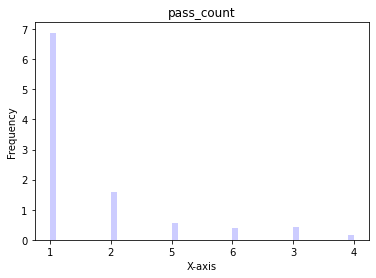

In [39]:
# my attemp to understand reuven's reasoning 
plt.hist(pass_count, bins=50, density=True, histtype='stepfilled', color='blue', alpha=0.2)
plt.xlabel('X-axis')
plt.ylabel('Frequency')
plt.title('pass_count')

# Show the plot
plt.show()

In [40]:
pass_count.value_counts(normalize = True)

1    0.688
2    0.159
5    0.055
3    0.042
6    0.040
4    0.016
Name: passenger_count, dtype: float64

In [41]:
pass_count.astype(np.int64).describe()

count    1000.000000
mean        1.711000
std         1.359164
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         6.000000
Name: passenger_count, dtype: float64

In [42]:
# my solution to b
pass_count.value_counts(normalize = True)[['3', '4', '5', '6']].sum()

0.153

In [43]:
pass_count.value_counts(normalize = True)

1    0.688
2    0.159
5    0.055
3    0.042
6    0.040
4    0.016
Name: passenger_count, dtype: float64

In [44]:
# with the reuven's data 
s.value_counts(normalize = True)[[3, 4, 5, 6]].sum()

0.1477147714771477

**solution to c**

Given that a huge proportion of rides are for 1 or 2 passengers, licensing more small taxis would seem to match the needs.

**1.8 Exercise 7: Long, medium, and short taxi rides**

In this exercise, we’re once again going to look at taxi data—but instead of looking at the number of passengers, we’re instead going to look at the distance (in miles) that each taxi ride went. Once again, I’ll ask you to create a series based on a single-column CSV file, taxi-distance.csv.

First, load the data into a series. Then, show the number of rides in each of three categories:

* short, ⇐ 2 miles
* medium, > 2 miles, but ⇐ 10 miles
* long, > 10 miles

In [ ]:
# my solution
df.columns

In [ ]:
distance = df ['trip_distance']
distance.astype(np.float64)

In [ ]:
distance [(distance.astype(np.float64) > 0) & (distance.astype(np.float64) <= 2)].count()

In [ ]:
distance [ (distance.astype(np.float64) > 2) &( distance.astype(np.float64) <= 10)].count()

In [ ]:
distance [ distance.astype(np.float64) > 10].count()

In [ ]:
distance [ distance.astype(np.float64) == 0]

In [1]:
# reuven's better approach
pd.cut(distance.astype(np.float64), bins = [0, 2, 10, distance.astype(np.float64).max()], 
       labels = ['short', 'medium', 'long'])

NameError: name 'pd' is not defined

In [ ]:
pd.cut(distance.astype(np.float64), bins = [0, 2, 10, distance.astype(np.float64).max()], 
       labels = ['short', 'medium', 'long']).value_counts()

**1.8.3 Beyond the exercise**

* a. Compare the mean and median trip distances. What does that tell you about the distribution of our data?
* b. How many short, medium, and long trips were there for trips that had only one passenger? Note that data for passenger count and trip length are from the same data set, meaning that the indexes are the same.
* c. What happens if we don’t pass explicit intervals, and instead ask pd.cut to just create 3 bins, with bins=3?

In [ ]:
# my solution to a
distance.astype(np.float64).describe()

reuven's data was different than mine and so i copy pasted his statistics from his GitHub page:

reuven's response:

count    9999.000000

mean        3.158511

std         4.037516

min         0.000000

25%         1.000000

50%         1.700000

75%         3.300000

max        64.600000

Name: 0, dtype: float64

Because the mean is significantly higher than the median, it would seem that there are some very long trips in our data set that are pulling the mean up. And sure enough, we see that the standard deviation is 4, but that we have at least one trip > 64 miles in length.

In [ ]:
# my solution to b
pass_count

In [ ]:
categories = pd.cut(distance.astype(np.float64), bins =[0, 2, 10, distance.astype(np.float64).max()],
                                           labels = ['short', 'medium', 'long'])

In [ ]:
categories

In [ ]:
pass_count[pass_count.astype(np.int64) == 1].index

In [ ]:
categories [pass_count[pass_count.astype(np.int64) == 1].index].value_counts()

In [ ]:
# reuven's solution to b

pd.cut(distance[pass_count.astype(np.int64) == 1].astype(np.float64), 
       bins =[0, 2, 10, distance.astype(np.float64).max()],
       labels = ['short', 'medium', 'long']).value_counts()

In [ ]:
# reuven's solution tom c
# pd.cut took the interval from s.min() to s.max(), divided it into three equal parts, 
# and assigned those to be short, medium, and long. We can see, though, that this meant 
# our long category is from 15.04 miles to 22.56 miles -- numerically one-third of the values' 
# interval, but only including a handful of values!

pd.cut(distance[pass_count.astype(np.int64) == 1].astype(np.float64), 
       bins =3,
       labels = ['short', 'medium', 'long'], retbins=True)

In [ ]:
pd.cut(distance[pass_count.astype(np.int64) == 1].astype(np.float64), 
       bins =3,
       labels = ['short', 'medium', 'long']).value_counts()

# 2. Pandas DataFrames

Data frames are two-dimensional tables that look and work similar to an Excel spreadsheet. The rows are accessible via an index—yes, the same index that we have been using so far with our series! **So long as you use .loc and .iloc to retrieve elements via the index, you’ll be fine.**

But of course, data frames also have columns, each of which has a name. Each column is effectively its own series, which means that it has an independent dtype from other columns.

In a typical data frame, each column represents a feature, or attribute, of our data, while each row represents one sample.

We’ll also see how just about every series method will also work on a data frame, returning one value per data frame column.

In [ ]:
pd.DataFrame([[1,2], [3,4]], index = ['row0', 'row1'],  columns = ['col0', 'col2'])

# BRACKETS OR DOTS?

When we’re working with a series, we can retrieve values in several different ways: Using the index (and loc), using the position (and iloc), and also using plain ol' square brackets, which is essentially equivalent to loc.

When we work with data frames, we **must use loc or iloc.** That’s because square brackets refer to the columns. If you try to retrieve a row, via the index, using square brackets, you’ll get an error message saying that no such column exists.

Square brackets always refer to columns, and never to rows. **Except, that is, when you pass them a slice, in which they look at the rows.** If you want to retrieve multiple columns, then you must use **fancy indexing.** You cannot use a slice.

**dot notation**

If you want to retrieve the column colname from data frame df, you can say df.colname. **THIS DOES NOT WOTK** when columns names include spaces and other illegal-in-Python-identifer characters. 

In [ ]:
df.head(2)

In [ ]:
# retrieving multiple columns using fancy indexing
df[['passenger_count', 'trip_distance']]

In [ ]:
# if you use slice you can retrive rows
df[0: 4]

**2.2 Exercise 8: Net revenue**

For many people who use pandas at work, it’s rare to create a new data frame from scratch. You’ll create it from a CSV file, or you’ll perform some transformations on an existing data frame (or several existing series). But there are times when you’ll need to create a new data frame, and knowing how to do it can be quite useful.

For this exercise, I want you to create a data frame that represents five different products sold by a company. For each product, we’ll want to know the product ID number (any unique two-digit integer will do), the product name, the wholesale price, the retail price, and the number of sales of that product in the last month. 

The task for this exercise is then to calculate how much net revenue you received from all of these sales.

In [ ]:
# my solution
df = pd.DataFrame ([[1, 2, 3, 4, 5], 
                    [11, 22, 33, 44, 55], 
                   [10, 20, 30, 40, 50], 
                   [1, 2, 3, 4, 5],
                   [1, 2, 3, 4, 5]], 
                   columns = ['ID number', 'name', 'wholesale price', 'retail price', 'sales number in last month'])

In [ ]:
df

In [ ]:
((df['retail price'] - df ['wholesale price']) * df ['sales number in last month']).sum()

In [ ]:
# reuven's solution
df = pd.DataFrame([{'product_id':23, 'name':'computer', 'wholesale_price': 500,
                 'retail_price':1000, 'sales':100},
               {'product_id':96, 'name':'Python Workout', 'wholesale_price': 35,
                'retail_price':75, 'sales':1000},
               {'product_id':97, 'name':'Pandas Workout', 'wholesale_price': 35,
                'retail_price':75, 'sales':500},
               {'product_id':15, 'name':'banana', 'wholesale_price': 0.5,
                'retail_price':1, 'sales':200},
               {'product_id':87, 'name':'sandwich', 'wholesale_price': 3,
                'retail_price':5, 'sales':300},
               ])

df

In [ ]:
((df['retail_price'] - df['wholesale_price']) * df['sales']).sum()


**2.2.3 Beyond the exercise**

* a. On what products is our retail price more than twice the wholesale price?
* b. How much did the store make from food vs. computers vs. books? (You can just retrieve based on the index values, not anything more sophisticated.)
* c. Because your store is doing so well, you’re able to negotiate a 30% discount on the wholesale price of goods. Calculate the new net income.

In [ ]:
# my solution to a
df.loc[df['retail_price'] > 2 * df['wholesale_price']] #or df[df['retail_price'] > 2 * df['wholesale_price']]

In [ ]:
# reuven's solution to a

df['name'][df['retail_price'] * 0.5 > df ['wholesale_price']]

In [ ]:
# my solution to b
food_revenue = df.iloc[[3, 4]]
food_revenue


In [ ]:
((food_revenue ['retail_price'] - food_revenue['wholesale_price'] )* food_revenue ['sales']).sum()

In [ ]:
df.iloc[[3]]

In [ ]:
((computer_rev['retail_price'] - computer_rev['wholesale_price']) * computer_rev['sales']).sum()

In [ ]:
book_rev = df.loc[[1, 2]]
book_rev

In [ ]:
((book_rev['retail_price'] - book_rev['wholesale_price']) * book_rev['sales']).sum()

In [ ]:
df

In [ ]:
# reuven solution to b
computer_rev = ((df['retail_price'] - df['wholesale_price']) * df['sales'])[0]
book_rev = ((df['retail_price'] - df['wholesale_price']) * df['sales'])[[1,2]].sum()
food_rev = ((df['retail_price'] - df['wholesale_price']) * df['sales'])[[3,4]].sum()
print (f"computer revenue is {computer_rev}, book revenue is {book_rev}, and food revenue is {food_rev}")


In [ ]:
# my solution to c
((df['retail_price'] - df['wholesale_price']*(1-0.3)) * df['sales']).sum()


**2.3 Exercise 9: Tax planning**

In the previous exercise, we created a data frame representing our store’s products and sales. In this exercise, we’re going to extend that data frame, quite literally.

The backstory for this exercise is as follows: Our local government is thinking about imposing a sales tax, and is thinking about 15, 20, and 25 percent rates. Show how much less you would net with each of these tax amounts by adding columns to the data frame for current income, as well as income under each of these proposed tax rates.

In [ ]:
# my solution
df[['current_income', 'income_under_15_%_tax', 'income_under_20_%_tax', 'income_under_25_%_tax'] ]= ''
df['current_income'] = (df['retail_price'] - df['wholesale_price']) * df['sales']
df['income_under_15_%_tax'] = ((df['retail_price'] - df['wholesale_price']) * df['sales']) * (1-0.15)
df['income_under_20_%_tax'] = ((df['retail_price'] - df['wholesale_price']) * df['sales']) * (1-0.2)
df['income_under_25_%_tax'] = ((df['retail_price'] - df['wholesale_price']) * df['sales']) * (1-0.25)

In [ ]:
df

In [ ]:
# reuven's solution 
df['current_net'] = ((df['retail_price'] - df['wholesale_price']) * df['sales'])
df['after_15'] = df['current_net'] * 0.85
df['after_20'] = df['current_net'] * 0.80
df['after_25'] = df['current_net'] * 0.75
df[['current_net', 'after_15', 'after_20', 'after_25']].sum() # i used fancy indexing here 
# When we run sum on this data frame, we get back the sum of each of the individual columns. 
# The result is returned as a series, in which the column names serve as the index:

In [ ]:
df[['current_net', 'after_15', 'after_20', 'after_25']]

In [ ]:
df['current_net'].sum() - df[['current_net', 'after_15', 'after_20', 'after_25']].sum()

# Adding columns to a dataframe

We just assign to the data frame, using the name of the column that we want to spring into being. It’s typical to assign a series, but you can also assign a NumPy array or list, so long as it is of the same length as the other, existing columns.

There is another way to add a column to a pandas data frame, namely the assign method. I generally prefer to just add a new column directly, as described here. But assign returns a new data frame, rather than modifying an existing one, which can come in handy.

Column names are unique—so just as with a dictionary, assigning to an existing column will replace it with the new one. That said, if your data frame’s columns are not of the same dtype, you might find yourself with a SettingWithCopyWarning when assigning for replacement. 



**2.3.3 Beyond the exercise**

* a. An alternative tax plan would charge 25% tax, but only on those products on which we would net more than 20,000. In such a case, how much would we make?
* b. Yet another alternative tax plan would charge 25% tax on products whose retail price is greater than 80, 10% tax on products whose retail price is between 30 and 80, and no tax on others. Implement and calculate the result of such a tax scheme.
* c. These long floating-point numbers are getting a bit hard to read. Set the float_format option in pandas such that the floating-point numbers will be displayed with commas every three digits before the decimal point, and only two digits after the decimal point. Note that this is a bit tricky, in that it requires understanding Python callables and the str.format method.

In [ ]:
# my solution to a 
income_alternate_tax = df['current_net'][df['current_net'] <= 20000].sum() + (df['current_net'][df['current_net'] >20000]*0.75).sum()
income_alternate_tax

In [ ]:
# my better solution to a after getting idea from reuven's solution
df['current_net'].apply(lambda x: 0.75*x if x > 20000 else x).sum()

In [ ]:
# my solution to b
(df['current_net'][df['retail_price'] > 80] * 0.75).sum() + \
(df['current_net'][(df['retail_price'] < 80) & (df['retail_price'] > 30)] * 0.9).sum() + \
(df['current_net'][df['retail_price'] < 30]).sum()

In [ ]:
# reuven's solution to b
# Use pd.cut to set the cutoffs, then translate from category to floats
df['after_tax'] = pd.cut(df['retail_price'], 
                   bins=[0, 30, 80, df['retail_price'].max()],
                   labels=[1, 0.9, 0.75]).astype(np.float64)

df['final_net'] = df['current_net'] * df['after_tax']
df

In [ ]:
df['final_net'].sum()

In [ ]:
# my solution to c based on my search
df['current_net'].apply(lambda x: "{:,.2f}".format(x))


In [ ]:
# reuven's solution to c
pd.options.display.float_format = '{:,.2f}'.format


In [ ]:
df

# Retrieving and Assigning with loc

It’s pretty straightforward to retrieve an entire row from a data frame, or even replace a row’s values with new ones. For example, I can grab the values in the row with index abcd with df.loc['abcd']. If I prefer to use the numeric (positional) index, then I can instead use df.iloc[5]. In both cases, I get back a series. (Yes, even though the columns of a data frame are a series, pandas uses a series whenever it returns multiple, one-dimensional data.)


Retrieving a whole row isn’t that tough. But what if want to retrieve only part of a row? More significantly, how could we set values on only part of a row?

pandas actually provides us with a number of techniques for setting values. My preferred method is to use loc, providing two arguments in the square brackets. The first describes the row(s) that we want to retrieve, while the second describes the column(s) we want to retrieve. This technique also lends itself to changing and updating values in a data frame.

If I want to retrieve row a and c and columns v and y: 

**df.loc[['a', 'c'], ['x', 'y']]**

I can describe our rows using a boolean index. That is, we can create a boolean series using a conditional operator (e.g., < or ==), and apply it to the rows and/or the columns. For example, I can find all of the rows in which x is greater than 200:

**df.loc[df['x']>200]**

I can then add a second value boolean index, after the comma, indicating which columns we want: 

**df.loc[df['x']>200, df.loc['c'] > 400]**

The above expression will return all of those rows from df in which column x was greater than 200, and all those columns from df in which row c was greater than 400.

Notice that because the first boolean index is choosing rows, it is based on a column. And because the second boolean index is choosing columns, it is based on a row—which means that it should be using loc.

Of course, our conditions can be far more complex than these. But as long as you keep in mind that you want to select based on rows before the comma, and based on columns after the comma, you should be fine.


If I want to set all of the values in row b, where column c is even, to new values, then I can assign a list (or NumPy array, or pandas series) of three items, matching the three I get back from the query:


**df.loc['b', df.loc['c'] % 2 == 0] = [123, 456, 789]**

I can also assign a data frame or 2-dimensional NumPy array to any two-dimensional selection. For example, here I’ll assign the float 1 to 12 different elements of df:

**df.loc[df['v'] > 400, df.loc['d'] > 400] = np.ones(12).reshape(4,3)**

We can broadcast a scalar values to any of the above. For example:

**df.loc[df['v'] > 400, df.loc['d'] > 400] = 987**

Finally, if your data frame’s columns are not of the same dtype, then you might encounter a SettingWithCopyWarning when you replace an existing column with a new set of values. You can avoid trouble by using loc to assign to all rows and a particular column using :, as if we were working with a slice:

**df.loc[:, 'd'] = df['d'].astype(np.float16)**

The above code will replace the current values of column d with new values, all of them having a dtype of float16.


**2.4 Exercise 10: Adding new products**

Good news! Our store is making money, and we have decided to add some new products.

For this exercise, I want you to create a new data frame containing three new products (including product ID, name, wholesale price, and retail price), and add them to our existing data frame. Note that because these are new products, you should not include the sales column. Also note that in order to avoid problems and conflicts, ensure that the indexes for each of these new products is different from existing product indexes. (In chapter 4, we’ll look at some ways to handle index problems more elegantly.)

Once you have added these new products, assign sales figures to each of them.

Finally, recalculate the store’s total net income after including these new products.

In [ ]:
# my solution:
df

In [ ]:
df_new = df.loc [0:2, ['product_id', 'name', 'wholesale_price','retail_price']]

In [ ]:
df_new.index = [5, 6, 7] 

In [ ]:
df_new ['name'] = ['book1', 'book3', 'computer1']
df_new ['wholesale_price'] = [400, 200, 100]
df_new ['retail_price'] = df_new ['wholesale_price'] + 50

In [ ]:
df_new

In [ ]:
df

In [ ]:
df_final = pd.concat([df, df_new])
df_final

In [ ]:
df_final.loc [[5, 6, 7], 'sales'] = [200, 100, 50]
df_final

In [ ]:
df_final['current_net'] = (df_final['retail_price'] - df_final['wholesale_price']) * df_final['sales']
df_final.drop(['after_15', 'after_20', 'after_25'], axis = 1, inplace = True)
df_final

In [ ]:
df_final['after_tax'] = pd.cut(df_final['retail_price'], bins = [0, 30, 80, df['retail_price'].max()], labels = [1, 0.9, 0.75]).astype(np.float64)

In [ ]:
df_final

In [ ]:
df_final['final_net'] = df_final['current_net'] * df_final['after_tax']
df_final

In [ ]:
# reuven's solution 
new_products = DataFrame([{'product_id':24, 'name':'phone', 'wholesale_price': 200,
                 'retail_price':500},
                        {'product_id':16, 'name':'apple', 'wholesale_price': 0.5,
                 'retail_price':1},
                        {'product_id':17, 'name':'pear', 'wholesale_price': 0.6,
                 'retail_price':1.2}], index=range(5,8))

df = pd.concat([df, new_products])

df.loc[5, 'sales'] = 100
df.loc[6, 'sales'] = 200
df.loc[7, 'sales'] = 75

(df['retail_price'] - df['wholesale_price']) * df['sales'].sum()

# pd.concat

The pd.concat function concatenates dataframes with each other. It’s a top-level pandas function, and takes a list of data frames you would like to concatenate. By default, pd.concat assumes that you want to join them top-to-bottom, but you can do it side-to-side if you want by setting the axis parameter.

The result of pd.concat is a new data frame.

### note on the final dataframe after the concatenation: 

Next, I asked you to ensure that the new data frame (the one after concatenation)’s index doesn’t contain duplicate values—something that is almost certainly the case at this point, given that we created df from two previous data frames. You can actually check to see if a data frame’s index contains repeated values with the code

**df_ny_taxi_2020.index.is_unique**

If this returns True, then the values are already unique. If not, then some Seaborn plots will give you errors. We could renumber the index on our own, but why work so hard, when pandas includes this functionality? We can just say:

**df_ny_taxi_2020 = df_ny_taxi_2020.reset_index(drop=True)**

By passing drop=True, we tell reset_index not to make the just-ousted index column a regular column in the data frame, but rather to drop it entirely.



**2.4.3 Beyond the exercise**

* a. Add one new product to the data frame, without using pd.concat. What’s the advantage of pd.concat, and when should you use it?
* b. Add a new column, department, to the data frame. Place each product in a separate department. For example, in our data, we would have three departments: electronics, books, and food. Calculate current_net on the data frame, and then show the descriptive statisics for current_net for food products.
* c. Now use the query method to get the descriptive statistics (this is needed to be added to the question based on reuven's solution: for current_net) for food items.

In [ ]:
# my solution to a
df_final
df_final.loc [len(df_final)] = [44, 'ghablame', 300, 500, 4, 1, 1, 1]


Reuven's explanation

If you're just adding one row to the data frame, you can assign 
to df.loc[INDEX].  Assuming that the index doesn't already exist,
this will add a new row to the data frame.  You can, of course,
also use df.iloc[INDEX], using a number.

By contrast, pd.concat is for when you want to combine to 
data frames into a single new one

In [ ]:
# my solution to b
df_final['department'] = ''

In [ ]:
df_final.loc[[0, 7, 8], 'department'] = 'electronics'
df_final.loc[[1, 2, 5, 6], 'department'] = 'book'
df_final.loc[[3, 4], 'department'] = 'food'

In [ ]:
df_final

In [ ]:
df_final['current_net'][df_final['department'] == 'food'].describe()

In [ ]:
# my solution to c using query method
df_final.query("department == 'food'")['current_net'].describe()

In [ ]:
# my solution to c w/o using query method
df_final[df_final['department'] == 'food']['current_net'].describe()

# THE Query method --  to retrieve rows
The traditional way to select rows from a data frame, as we have seen, is via a boolean index. But there is another way to do it, namely the query method. This mehod might feel especially familiar if you have previously used SQL and relational databases.

The basic idea behind query is simple: We provide a **string** that pandas turns into a full-fledged query. We get back a filtered set of **rows** from the original data frame. For example, let’s say that I want all of the rows in which the column v is greater than 300. Using a traditional boolean index, I would write:

**df[df['v'] >300]**

Using query, I can instead write:

**df.query('v > 300')**


These two techniques return the same results. When using query, though, we can name columns without the clunky square brackets, or even the dot notation. It becomes easier to understand.

What if I want to have a more complex query, such as where column v is greater than 300 and column w is odd? We can write it as follows:

**df.query('v > 300 & w % 2 ==1') **

It’s not necessary, but I still like to use parentheses to make the query a bit more readable:

**df.query('(v > 300) & (w % 2 == 1)')**

Note that query cannot be used on the left side of an assignment.

Also note that in some simple benchmarks that I ran, using query took about twice as long to execute as loc. It might be more convenient, but it isn’t necessarily a good idea if you’re worried about performance.

**question for chatGPT:** is pandas query for just rows?

Re:

Yes, the pandas query method is used to **filter rows** in a DataFrame based on a Boolean expression. It returns a **new DataFrame** containing only the rows that satisfy the specified condition.

In [ ]:
#df_final.loc [:, ]
df_final[df_final['sales'] > 300]

In [ ]:
df_final.query('sales > 300')

**2.5 Exercise 11: Best sellers**

We’re going to use our store’s products for one final exercise. This time, we want to find the IDs and names of the products that have sold more than the average number of units.

In [ ]:
import pandas as pd
from pandas import Series, DataFrame

df = DataFrame([{'product_id':23, 'name':'computer', 'wholesale_price': 500,
                 'retail_price':1000, 'sales':100},
               {'product_id':96, 'name':'Python Workout', 'wholesale_price': 35,
                'retail_price':75, 'sales':1000},
               {'product_id':97, 'name':'Pandas Workout', 'wholesale_price': 35,
                'retail_price':75, 'sales':500},
               {'product_id':15, 'name':'banana', 'wholesale_price': 0.5,
                'retail_price':1, 'sales':200},
               {'product_id':87, 'name':'sandwich', 'wholesale_price': 3,
                'retail_price':5, 'sales':300},
               ])

df

In [ ]:
# my solution using query method
df.query('sales > sales.mean()')[['product_id', 'name']]


In [ ]:
# my solution w/o using query method
df[df['sales'] > df['sales'].mean()][['product_id', 'name']]

# Reuven's comments on my above solution

The above code will work, however it also uses double square brackets—that is, one pair of square brackets immediately after another one. **This is almost always a sign of inefficiency in pandas, and is something to avoid as much as possible.** How, then, can we retrieve only those columns? By putting them inside of the first square brackets, after a comma:

df.loc[df['sales'] > df['sales'].mean(), ['product_id', 'name']]

When using query methid though, how can we select the columns we want? In this case, we really don’t have a choice; we’ll need to apply the square brackets to the result of df.query:

df.query('sales > sales.mean()')[['product_id', 'name']]

In [ ]:
# reuven's solution
df.loc[df['sales'] > df['sales'].mean(), ['product_id', 'name']]

# cool comment on pandas

pandas is all about analyzing data. And a major part of the analysis that we do in pandas can be phrased as, **"Where this is the case, show me that."** The possibilities are endless:

* Show me the stocks in my portfolio that have performed poorly this year
* Show me the people on my team who have fixed the most bugs
* Show me the three highest-scoring sports teams in the league

**2.5.3 Beyond the exercise**

Here are some additional exercises that go beyond the task here. In each case, practice using both loc and query:

* a. Show the ID and name of those products whose net income is in the top 25% quantile.
* b. Show the ID and name of products that have lower than average sales numbers, and whose wholesale price is greater than the average.
* c. Show the wholesale and retail prices of products with product IDs between 80 and 100, and which sold fewer than 400 units.

In [ ]:
# my solution to a using query method 
df['net_income'] = (df['retail_price'] - df ['wholesale_price']) * df['sales']
df.query('net_income > net_income.quantile(0.75)')[['product_id', 'name']] 

In [ ]:
# my solution to a w/o using query method 
df.loc[df['net_income'] > df['net_income'].quantile(0.75), ['product_id', 'name']]

In [ ]:
# my solution to b using query method 
df.query('sales < sales.mean() & wholesale_price > wholesale_price.mean()')[['product_id', 'name']]

In [ ]:
# my solution to b w/o using query method 
df.loc[(df['sales'] < df['sales'].mean()) & (df['wholesale_price'] > df['wholesale_price'].mean()), ['product_id', 'name']]

In [ ]:
# my solution to c using query method 
df.query('(product_id > 80 & product_id < 100) & sales < 400')[['name', 'wholesale_price', 'retail_price']]

In [ ]:
# my solution to c w/o using query method 
df.loc[(((df ['product_id'] > 80) &( df['product_id'] < 100)) & 
        (df['sales'] < 400)), ['name', 'wholesale_price', 'retail_price']]


**Outliers**

The term "outliers" doesn’t have a precise, standard definition. one definition is: 

**"inter-quartile range," or "IQR" = quantile(0.75) - quantile(0.25)**

Outliers would then be values **below the quantile(0.25) - 1.5 * IQR**, or any values **above the quantile(0.75) + 1.5 * IQR**.

We’ll use this definition here, but you might find that a different definition—say, anything below the mean - two standard deviations, or above the mean + two standard deviations, might be a better fit for your data.


**side note, i asked chatGPT is quantile the same as quartile?**


Quantiles and quartiles are related concepts, but they are not exactly the same thing.

A quartile is a specific type of quantile that divides a dataset into four equal parts. The first quartile, denoted Q1, represents the 25th percentile of the data, which means that 25% of the data falls below this value. The second quartile, denoted Q2 or the median, represents the 50th percentile of the data. The third quartile, denoted Q3, represents the 75th percentile of the data.

Quantiles, on the other hand, are a more general concept that divides a dataset into equal parts, but not necessarily into four equal parts. For example, the median is a quantile that divides the data into two equal parts (i.e., the 50th percentile). Other common quantiles include the decile (which divides the data into ten equal parts) and the percentile (which divides the data into 100 equal parts).

So, while quartiles are a type of quantile, the term "quantile" is a more general term that includes other types of divisions of the data into equal parts.

**2.6 Exercise 12: Finding outliers**

In this exercise, you are to create a two-column data frame from the taxi data we looked at in the previous chapter. The first column will contain the passenger count for each trip, and the second column will contain the distance (in miles) for each trip. Once you have created this data frame, I want you to:

* a. Count how many trip distances were outliers
* b. Calculate the mean number of passengers for outliers. Is this any different than the mean number of passengers for all trips?

In [ ]:
distance = pd.read_csv('D:/0_Machine_Learning/Software -- ML Journey/Pandas Workout book/pandas-workout-data/data/taxi-distance.csv', squeeze =True, header = None)

passenger_count = pd.read_csv('D:/0_Machine_Learning/Software -- ML Journey/Pandas Workout book/pandas-workout-data/data/taxi-passenger-count.csv', squeeze =True, header = None)

In [ ]:
distance.describe()

In [ ]:
passenger_count.describe()

In [ ]:
df_taxi = pd.concat([passenger_count, distance], axis = 1, keys = ['passenger_count', 'distance'])

In [ ]:
df_taxi.head()

In [ ]:
# First I calculate IQR and lower and upper bound
IQR = df_taxi ['distance'].quantile(0.75) - df_taxi ['distance'].quantile(0.25).astype(np.float64)
LB = df_taxi ['distance'].quantile(0.25) - 1.5 * IQR 
HB = df_taxi ['distance'].quantile(0.75) + 1.5 * IQR 

In [ ]:
# my solution to a w/o using query method
outliers = df_taxi.loc[(df_taxi['distance'] < LB) | (df_taxi['distance'] > HB)]
len(outliers)
outliers

In [ ]:
# my solution to a w/o using query method if I don't want to seperately calculate LB and HB
len(df_taxi.loc[(df_taxi['distance'] < (df_taxi['distance'].quantile(0.25) - (1.5 * 2.3))) | \
(df_taxi['distance'] > (df_taxi['distance'].quantile(0.75) + (1.5 * 2.3)))])

In [ ]:
# my solution to a using query method -- my observation is that I cannot use formula like LB and HB when using query method

outliers = df_taxi.query('(distance < (distance.quantile(0.25) - 1.5 * 2.3)) | \
                         (distance > (distance.quantile(0.75) + 1.5 * 2.3))')
len(outliers)

In [ ]:
# my solution to b
df_taxi['passenger_count'].mean()

In [ ]:
outliers['passenger_count'].mean()

**2.6.3 Beyond the exercise**

As I wrote above, there are a number of ways to define and find outliers. Let’s try a few different techniques here.

* a. If we define outliers to be the lowest 10% and highest 10% of values, then how many are they? Why is (or isn’t) this a good measure?
* b. If we’re only interested in removing **the outlier values**, then we could use the **scipy.stats.trimboth** function on our series. It takes a second argument, the proportion we want to cut from both the top and bottom.
* c. The scipy.stats.zscore function rescales and centers (i.e., normalizes) our data set. Our mean is set to 0, values can be above and below that value. Find all of the distances for which the absolute value of the z-score is greater than 3.

In [ ]:
# my solution to a
len(df_taxi [df_taxi['distance'] < df_taxi ['distance'].quantile(0.1)])

In [ ]:
df_taxi [df_taxi['distance'] < df_taxi ['distance'].quantile(0.1)]['distance'].describe()

In [ ]:
df_taxi['passenger_count'].describe()

In [ ]:
df_taxi[df_taxi['distance'] > df_taxi['distance'].quantile(0.9)].count()

In [ ]:
df_taxi[df_taxi['distance'] > df_taxi['distance'].quantile(0.9)]['distance'].describe()

reuven note:

if we have many short trips (as we do here), we might end up calling them outliers even though they're very close in value to non-outliers.

In [ ]:
# my solution to b
from scipy import stats
stats.trimboth(df_taxi['distance'], 0.1)

In [ ]:
# my solution to c
from scipy.stats import zscore 
df_taxi['distance'][abs(zscore (df_taxi['distance'])) > 3]


# NaN and missing data

pandas uses something known as NaN, aka "not a number." NaN is the pandas style for writing nan, a value that’s also available in NumPy. Both names are aliases to the same strange value, a float that cannot be converted into an integer, and that is not equal to itself.

In NumPy, we typically search for NaN values with the **isnan** function. pandas has a different approach, though: We can **replace** the NaN values in a series (or data frame) with the **fillna** method. And we can **drop any row with NaN values with the dropna** method.


Both of these methods return a **new series or data frame**, rather than modifying the original object. However, the new object you get back might not have copied the data, which means that assigning to it might produce the famous, dreaded SettingWithCopyWarning. If you plan to modify the series or data frame that you get back from df.dropna, you should probably invoke the copy method, just to be sure:

**df = df.dropna().copy()**

This ensures that you can then modify df without having to suffer from that warning.

As you can imagine, it might be a bit extreme to remove any row containing even a single NaN value. For that reason, the dropna method has a **thresh** parameter, to which we can pass an integer—the number of **good, non-NaN values** that a row must contain in order for it to be kept. You might need to give some serious thought to how strictly you want to filter your data.

The **count** method on a series returns the number of **non-NaN values**. If there are no NaN values at all, then the result will be the same as the size of the series.

The count method on a data frame returns a series, with the columns' names as the index. Any columns with lower numbers, Reuven should have meant "compared to the len of dataframe", contain NaN values.



# interpolation

When your data contains missing values, you have a few possible ways to handle this. You can remove rows with missing values, but that might remove a large number of otherwise useful rows. A standard alternative is interpolation, in which you replace NaN with values that are likely to be close to the orignal ones. The values might be wrong, but but they will be roughly in the right ballpark.

When we call df.interpolate, it returns a new data frame. In theory, all of the columns will be interpolated—but if there is only missing data in one specific column that column will be interpolated. 




**2.7 Exercise 13: Interpolation**

Here are the steps I want you to take:

* a. Load temperature data from New York City (from the end of 2018 and the start of 2019, in a file called nyc-temps.txt) into a series. The measurements are in degrees Celsius.
* b. Create a data frame with two columns: temp, with the temperatures, and hour, representing the hour at which the measurements were taken. The hour values should be 0, 3, 6, 9, 12, 15, 18, and 21, repeated for all 728 data points.
* c. Calculate the mean and median values. These are the real values, which we hope to replicate via interpolation.
* d. Set all of the values from 3 and 6 a.m. to NaN.
* e. Interpolate the values with the interpolate method.
* f. What are the mean and median? Are they similar to the real values? Why or why not?

In [ ]:
temps = pd.read_csv('D:/0_Machine_Learning/Software -- ML Journey/Pandas Workout book/pandas-workout-data/data/nyc-temps.txt', squeeze =True)#, header = None)

In [ ]:
temps.count() 

In [ ]:
factor = int(len(temps)/8)
factor

In [ ]:
hours = pd.Series([0, 3, 6, 9, 12, 15, 18, 21] * factor)
len(hours)


In [ ]:
hours

In [ ]:
df_temps = pd.DataFrame({'temp': temps, 'hour': hours})
df_temps

In [ ]:
df_temps['temp'].describe()

In [ ]:
df_temps['temp'][(df_temps['hour'] == 3)] = NaN
df_temps['temp'][(df_temps['hour'] == 6)] = NaN
df_temps

# reuven's approach 
#df.loc[(df['hour'] == 3) | (df['hour'] == 6), 'temp'] = np.NaN


In [ ]:
df_temps = df_temps.interpolate()

In [ ]:
df_temps['temp'].describe()

**2.7.3 Beyond the exercise**

* a. By default, the interpolate method tries to average the remaining values before and after any NaN. However, we can change how it works, by passing method='nearest'. Does that change our data substantially?
* b. Let’s assume that the equipment works fine around the clock, but that it fails to record a reading at -1 degrees and below. Are the interpolated values similar to the real (missing) values they replace? Why or why not?
* c. A cheap solution to interpolation is to replace NaN values with the column’s mean. Do this (with the missing values from -1 and below), and compare the new mean and median. Again, why are (or aren’t) these values similar to the original ones?

In [ ]:
# my solution to a
df_temps

In [ ]:
df_temps.interpolate(method = 'nearest')

In [ ]:
df_temps.interpolate(method = 'nearest')['temp'].describe()

# it seems that there is not significant change

In [ ]:
# my solution to b
df_temps['temp'][df_temps['temp'] <= -1] = NaN

# reuven's solution 
#df.loc[df['temp'] <= -1, 'temp'] = NaN

In [ ]:
df_temps

In [ ]:
df_temps['temp'].describe()

In [ ]:
df_temps['temp'].interpolate().describe()

# reuven's notes:
# Wow, the mean is now 2 and the median is now 1 -- significantly higher
# Not surprising, of course, given that we removed all very low temperatures!

In [ ]:
df_temps

In [ ]:
# my solution to c

df_temps[df_temps['temp'].isnull()] = df_temps['temp'].mean()



In [ ]:
# reuven's solution to c which is more concise than mine in above

df = df.fillna(df.mean())

In [ ]:
df_temps['temp'].describe()

**2.8 Exercise 14: Selective updating**

In this exercise, I want you to create the same two-column data frame as we did in the last exercise. Then, update values in the temp column such that any value that is less than 0 is set to 0.

In [ ]:
temps = pd.read_csv('D:/0_Machine_Learning/Software -- ML Journey/Pandas Workout book/pandas-workout-data/data/nyc-temps.txt', squeeze =True)#, header = None)
factor = int(len(temps)/8)
hours = pd.Series([0, 3, 6, 9, 12, 15, 18, 21] * factor)
df_temps = pd.DataFrame({'temp': temps, 'hour': hours})
df_temps

In [ ]:
# my first solution
(df_temps['temp'] < 0).value_counts()

In [ ]:
df_temps['temp'][df_temps['temp']< 0] = 0


In [ ]:
df_temps

In [ ]:
# my second approach 
df_temps.loc[df_temps['temp'] < 0, 'temp'] = 0

# reuven's solution was exactly as above line as mine

In [ ]:
df_temps

# Reuven's tip on urgency to use .loc

If you’re like many pandas users, then you might have thought about things like this:

**df_temps[df_temps['temp'] < 0]['temp'] = 0**

Logically, this makes perfec sense. There’s just one problem: You cannot know in advance if it will work. That’s because pandas does a lot of internal analysis and optimization when it’s putting together our queries. You thus cannot know if your assignment will actually change the temp column on df, or—and this is the important thing—if pandas has decided to cache the results of your first query, applying ['temp'] to that cached, internal value rather than to the original one.

As a result, it’s common—and maddening!—to get a SettingWithCopyWarning from pandas. It looks like this:

<ipython-input-2-acedf13a3438>:1: SettingWithCopyWarning:
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead
    
When you get this warning, it’s because pandas is trying to be helpful and nice, telling you that your assignment might have no effect. The warning, by the way, isn’t telling you that the assignment won’t work, because it might. It all depends on the amount of data you have, and how pandas thinks it can or should optimize things.

The telltale sign that you might get this warning is the use of double square brackets—not nested, with one pair inside of the other, but with one right after the other. Whenever you see **][** in pandas queries, you should try hard to avoid it, because it might spell trouble when you assign to it. And truthfully, retrieving with this syntax, while something that all of us have done over the years, is something that you can avoid **using loc** and the "rows, columns" selection syntax that we’ve seen and discussed.

So, how should we actually set these values? It’s actually pretty straightforward:

**df_temps.loc[df_temps['temps'] < 0, 'temp']  = 0**
                                     
If you use this syntax for all of your assignments, you won’t ever see that dreaded SettingWithCopyWarning message. You’ll be able to use the **same syntax for retrieval and assignment**. And you can even be sure that things are running pretty efficiently.

                                  

**2.8.3 Beyond the exercise**

* a. Set all of the odd temperatures to the mean of all temperatures
* b. Set the even temperatures at hours 9 and 18 to 3
* c. If the hour is odd, then set the temperature to 5

In [ ]:
temps = pd.read_csv('D:/0_Machine_Learning/Software -- ML Journey/Pandas Workout book/pandas-workout-data/data/nyc-temps.txt', squeeze =True)#, header = None)
factor = int(len(temps)/8)
hours = pd.Series([0, 3, 6, 9, 12, 15, 18, 21] * factor)
df_temps = pd.DataFrame({'temp': temps, 'hour': hours})
df_temps

In [ ]:
# my solution to a
df_temps.loc[df_temp['temp'] % 2 == 1, 'temp'] = df_temps['temp'].mean()


In [ ]:
# my solution to b
df_temps.loc[((df_temps['hour'] == 9) & (df_temps['temp'] % 2 == 0))| 
             ((df_temps['hour'] == 18) & (df_temps['temp'] % 2 == 0)), 'temp'] = 3
df_temps

In [ ]:
# my solution to c
df_temps.loc[df_temps['hour'] % 2 == 1, 'temp'] = 5


# 3. Importing and exporting data

**CSV, the non-standard standard**

At its heart, CSV assumes that your data can be described as a two-dimensional table. The rows are represented as rows in the file, and the columns are separated by… well, they’re separated by commas, at least by default. CSV files are text files, which means that you can read (and edit) them without special tools.

Rather than take a stand on how CSV files should be formatted, pandas tries to be open and flexible. When we read from a CSV file (with pd.read_csv) or write a data frame to CSV (with df.to_csv), you can choose from many, many parameters, each of which can affect the way in which it is written. Among the most common are:

* sep, the field separator, which is (perhaps obviously) a comma by default, but can often be a tab ('\t')
* header, whether there are headers describing column names, and on which line of the file they appear, which can be controlled by the header parameter
* indexcol, which column, if any, should be set to be the index of our data frame
* **usecols**, which columns from the file should be included in the data frame

Why do we read CSV files with the pd.read_csv function, rather than with a method on an existing data frame? Because the goal of read_csv is to create (and return) a new data frame based on the contents of the CSV file, not to modify or update the contents of an existing one.

Most of the time, and especially when a CSV file has headers indicating the column names, I like to use those names in my call to read_csv. That makes the function call easier to read and debug. But when you want to rename the columns with the **names parameter**, you need to describe them numerically. Moreover, in order to avoid having the header row read as data, we need to indicate which row contains the header (0, in our case), effectively causing it to be ignored. like 

oil_filename = '../data/wti-daily.csv'

oil_df = pd.read_csv(oil_filename,

                     parse_dates=[0],
                     
                     header=0,
                     
                     index_col=0,
                     
                     names=['date', 'oil'])
                     
my implementation which worked just fine is below, i think since i first used names parameter then parse_dates and index_col i am good:

df_oil = pd.read_csv(directory + 'wti-daily.csv',

                    header = 0,
                    
                    names = ['date', 'oil'],
                    
                    parse_dates = ['date'],
                    
                    index_col = ['date'])



**a side note from reuven on columns's names:**

There is nothing inherently wrong with loading the data in this way, meaning keeping the original columns'names. However, when we use pd.query and pd.eval, it’s often annoying to have column names that includes spaces in them. Yes, we can use **backticks**, but it’s more convenient to give them names that’ll allow us to treat them as variables inside of the query string. So while there’s nothing technically wrong with loading the data as I’ve done here, I’ll then want to set the headers to be single-word names. I can do that by assigning a list of strings to df.columns:

df.columns = ['pid', 'state', 'ptype', 'make', 'color', 'feet'] 

Now, you might be thinking that it would be more effective to set these names as part of the call to read_csv. After all, read_csv has a names parameter, which takes a list of strings that are assigned to the newly created data frame. However, things get tricky if we want to rename the columns (with names) and also load a subset of the columns (with usecols). That’s because passing a value to names means that you need to use those names, rather than the original ones from the file, when choosing columns in usecols. And you can only do that if you name all of the columns, which is rather annoying.

Actually, there is another way to do it: You can specify which columns you want by passing a list of integers to usecols. pandas will select the columns at those indexes. You can then assign them names by passing a value to the names parameter. Here’s how I would do that:

df = pd.read_csv(filename,

                usecols=[1, 2, 3, 7, 33, 37],
                
                names=['pid', 'state', 'ptype', 'make', 'color', 'feet'])

Will this work? Yes, it will, and in many cases, it might be the preferred way to go. However, I have two problems with it: First, I find it somewhat annoying to find the integer positions for the columns we want to load. And secondly, when I ran this code on my computer, I got the "low memory" warning that we’ve sometimes seen in previous examples. I thus decided to avoid the annoyance of finding the desired columns' numeric locations and the low-memory warning, and to use the two-step column renaming that appears in the solution.

**compressed files can be directly impoted into pandas**

You might have noticed that the files I’ve provided both have a .csv.gz suffix. This means that they are compressed with "gzip"—but you don’t need to uncompress them before loading, because **Pandas is smart enough to automatically do so when we run read_csv**.

institutions_filename = '../data/Most-Recent-Cohorts-Institution.csv.gz'

institutions_df = pd.read_csv(institutions_filename,

                usecols=['OPEID6'])
                         

# useful tip on data science

When teaching data science, I often use the phrase "know your data." That’s because it’s important to really know as much about your data as you can before willy-nilly reading it into memory. You probably don’t want to load all of the columns into pandas. And you might want to specify the type of data that’s in each column, rather than let pandas just guess.

Most data sets come with a "data dictionary," a file that describes the columns, their types, their meanings, and their ranges. It’s almost always worth your while to read a data dictionary when starting to analyze the data. In many cases, the dictionary will give you insights into the data.

# Three ways to optimize your Pandas data frame's memory usage

df.info(memory_usage = 'deep') gives detailes
1. choose your columns wisely using "usecols", df.columns gives me the name of columns 
2. choose dtypes appropriately 
3. remove rows that you don't need through cleaning 

reference: reuven's youtube channel: https://www.youtube.com/watch?v=q3k3UrunY3M

# memory_usage method

We’ll talk more about this in future chapters, but the memory_usage method allows you to see how much memory is being used by each column in a data frame. It returns a series of integers, in which the index lists the columns and the values represent the memory used by each column. 

df.memory_usage()

# usecols

The usecols parameter to pd.read_csv allows us to select which columns from the CSV file will be kept around. The parameter takes a list as an argument, and that list can either contain integers (indicating the numeric index of each column) or strings representing the column names. I generally prefer to use strings, since they’re more readable, and that’s what I did here.



# url

You can pass a URL to read_csv, and assuming that the URL returns a CSV file, pandas will return a new data frame. The rest of the parameters are the same as any other call to read_csv. The only difference is that you’re reading from a URL, rather than from a file on a filesystem.

Why is this important and useful? Because there are numerous systems that produce hourly or hourly reports, publishing in CSV format to a URL that doesn’t change. If you retrieve data from that URL, then you’re guaranteed to get a CSV file reflecting the latest and greatest data. Thanks to the URL provisions of read_csv, you can include pandas in your daily reporting routine, summarizing and extracting the most important data from this report.

In many cases, CSV files published to a URL will require authentication via a username and password. In some cases, sites allow you to include such authentication details in the URL. For those that don’t, you won’t be able to retrieve directly via read_csv. Rather, you’ll need to retrieve the data separately, perhaps using the excellent third-party **requests package**, and then create a StringIO with the contents of the retrieved data.

What always amazes me about using pd.read_csv is how easy it is to read CSV data from a URL. Other than the fact that the data comes from the network, it works the same as reading from a file. Among other things, we can select which columns we want to read using the usecols parameter.

# tips on reading text file through pd.read_csv

First just open it to see what is the field separator. Then see if you have any comments and if so see how the start of a comment line is mared, then you need to do header = None b/c it is not a csv file and so definitely doesn’t have headers. then you may want to pass names including your desired names for the dataframe you will be creating. 


## 1. sep
CSV files are named for the default field separator, the comma. By default, pandas assumes that we have comma-separated values. It’s fine if we want to use another character, but then we’ll need to specify that in the sep keyword argument. If our separator is :, so we’ll pass sep=':' to read_csv.

## 2. comment
read_csv lets us specify the string that marks the start of a comment line. By passing it comment=' ', we indicate that the parser should simply ignore such lines. if the comment starts with # then i need to pass comment='#'

## 3. header
By default, read_csv assumes that the first line of the file is a header, containing column names. It also uses that first line to figure out how many fields will be on each line. **If a file contains headers, but not on the file’s first line, then you can set header to an integer value, indicating on which line read_csv should look for them**. But if your file is not really a CSV file then it definitely doesn’t have headers. Fortunately, you can tell read_csv that there is no header with header=None.

## 4. blank lines
What about the blank lines? We actually got off pretty easy here, in that **read_csv ignores blank lines by default**. If you want to treat blank lines as NaN values, then you can pass skip_blank_lines=False, rather than accepting the default value of True.

## 5. names
if your file is not a csv file and like it is a text file. In this case, if we don’t give any names, then the data frame’s columns will be labeled with integers, starting with 0. There’s nothing technically wrong with this, but it’s harder to work with data in this way. Besides, it’s easy enough to pass the names we want to give our columns, as a list of strings. 



# How to specify more than one separator

I’m often asked if we can specify more than one separator. For example, what if fields can be separated by either : or by ,? What do we do then?

pandas actually has a great solution: If sep contains more than one character, then it is treated as a **regular expression**. So if you want to allow for either colons or commas, you could pass a separator of [:,]. If that looks reasonable to you, then congratulations: You probably know about regular expressions. If you don’t know them, then I strongly encourage you to learn them! Regular expressions are extremely useful to anyone working with text, which is nearly every programmer. I have a free tutorial on regular expressions using PPython at RegexpCrashCourse.com/, if you’re interested.

The big downside to using regular expressions to handle field separators is that it requires the use of a Python-based CSV parser. By default, pandas uses a C-based parser, which runs faster and uses less memory. Consider whether you really need this functionality, and thus the performance hit that the Python-based parser creates.

# Reuven crash course on regular expressions 

This is an E-mail course: Regexps crash course meaning in 14 days I am supposed to receive one email teaching me regexps along with some exercises.

* day_1

 -- Regexps have a reputation for being impossible to understand, even among experienced programmers; my goal is to show you that this doesn't have to be the case.
 
 -- What we want, then, is a way to describe the patterns for which we're looking in the text, in a way that is compact and precise. And that's the job of regular expressions.

 -- Regexps allow us to search for patterns within text.  Once we have found that pattern, we can do any number of things with it:
* Print it out;
* Use it as the basis for a search-and-replace operation;
* Or, dig deeper into the match, extracting portions of it.

 -- Regexps have been around for many years, but as the quantity of text produced becomes ever larger, the need for finding ways to search for patterns has become ever more urgent. 


# html

The **pd.read_html** function, like pd.read_csv, takes a file-like object or a URL. It assumes that it’ll encounter HTML-formatted text containing at least one table. It turns each table into a data frame, then returns a list of those data frames.

# JSON

There’s no doubt that CSV is an important, useful, and popular format. But in some ways, it has been eclipsed by another format: JSON, aka "JavaScript Object Notation." **JSON allows us to store numbers, text, lists, and dictionaries in a text format that’s both readable and writable with a wide variety of programming languages**. Because it’s both easier to work with and smaller than XML, while also more expressive than CSV, it’s no surprise that JSON has become a common format for both storing and exchanging data. JSON has also become the standard format for Internet APIs, allowing us to access a variety of services in a cross-platform manner.

Just as we can retrieve CSV-formatted data with pd.read_csv, we can retrieve JSON-formatted data with **pd.read_json**.

# excel file

Also like read_csv, the read_excel method has index_col, usecols, and names parameters, allowing you to specify which columns should be used for the data frame, what they should be called, and whether one or more should be used as the data frame’s index.

**3.2 Exercise 15: Weird taxi rides**

For this first exercise, I want you to create a data frame from the CSV data for January 2019:

* a. Load the CSV file into a data frame, using only the columns passenger_count, trip_distance, payment_type, and total_amount.
* b. How many taxi rides had more than 8 passengers?
* c. How many taxi rides had zero passengers?
* d. How many taxi rides were paid for in cash, and cost more than $1,000? note: 1 (credit card) and 2 (cash).
* e. How many rides cost less than 0?
* f. How many rides traveled a below-average distance, but cost an above-average amount?

In [ ]:
# my solution to a 
df_rides = pd.read_csv('D:/0_Machine_Learning/Software -- ML Journey/Pandas Workout book/pandas-workout-data/data/nyc_taxi_2019-01.csv', usecols = ['passenger_count', 'trip_distance', 'payment_type', 'total_amount'])
df_rides.head()
df_rides.shape

In [ ]:
# my solution to b
(df_rides['passenger_count'] > 8).value_counts()

In [ ]:
# my solution to b using query method

df_rides.query('passenger_count > 8')['passenger_count'].count()

In [ ]:
# my solution to c
(df_rides['passenger_count'] == 0).value_counts()

In [ ]:
# my solution to d
((df_rides['payment_type'] == 2) & (df_rides['total_amount'] > 1000)).value_counts()

In [ ]:
# my solution to d after getting idea from reuven
df_rides.loc[((df_rides['payment_type'] == 2) & (df_rides['total_amount'] > 1000)), 'passenger_count'].count()

In [ ]:
# my solution to e
(df_rides['total_amount'] < 0).value_counts()

In [ ]:
# my solution to f
((df_rides['trip_distance'] < df_rides['trip_distance'].mean()) & \
(df_rides['total_amount'] > df_rides['total_amount'].mean())).value_counts()

In [ ]:
# reuven's solutions:
df.loc[df['passenger_count'] > 8, 'passenger_count'].count()
df.loc[df['passenger_count'] == 0, 'passenger_count'].count()
df.loc[(df['payment_type'] == 2) & (df['total_amount'] > 1000),
       'passenger_count'].count()
df.loc[df['total_amount'] < 0, 'total_amount'].count()
df.loc[(df['trip_distance'] < df['trip_distance'].mean()) &
       (df['total_amount'] > df['total_amount'].mean()), 'trip_distance'].count()

**3.2.3 Beyond the exercise**

* a. Repeat this exercise, but using the query method rather than a boolean index.
* b. How many of the rides that cost less than 0 were indeed for either a dispute (payment_type of 4) or a voided trip (payment_type of 6)?
* c. I stated above that most people pay for their taxi rides using a credit card. Show this, and find what percentages normally pay in cash vs. a credit card.

b. How many taxi rides had more than 8 passengers?
c. How many taxi rides had zero passengers?
d. How many taxi rides were paid for in cash, and cost more than $1,000? note: 1 (credit card) and 2 (cash).
e. How many rides cost less than 0?
f. How many rides traveled a below-average distance, but cost an above-average amount?

In [ ]:
# my solution to a
df_rides.query('passenger_count > 8')['passenger_count'].count()
df_rides.query('passenger_count == 0')['passenger_count'].count()
df_rides.query('payment_type == 2 & total_amount > 1000')['passenger_count'].count()
df_rides.query('total_amount < 0')['total_amount'].count()
df_rides.query('trip_distance < trip_distance.mean() & total_amount > total_amount.mean()')['passenger_count'].count()

In [ ]:
# my solution to b
df_rides.loc[((df_rides['total_amount'] < 0 ) & 
              ((df_rides['payment_type'] == 4) | (df_rides['payment_type'] == 6))), 'total_amount'].count()

In [ ]:
# my solution to c
(df_rides.loc[df_rides['payment_type'] == 1, 'payment_type'].count())/df_rides['payment_type'].count()*100

In [ ]:
# reuven's solution to c
pd.options.display.float_format = '{:.4f}'.format
df_rides['payment_type'].value_counts(normalize = True)

**3.3 Exercise 16: Pandemic taxis**

In this exercise, I want you to create a data frame from two different CSV files containing New York taxi data—one from July 2019 (before the pandemic), and a second from July 2020 (near the height of the pandemic, at least in New York). The data frame should contain three columns from the files: passenger_count, total_amount, and payment_type. It should also include a fifth column, year, which should be set to either 2019 or 2020, depending on the file from which the data was loaded.

With that data in hand, I want you to answer a few questions:

* a. How many rides were taken in 2019 vs. 2020?
* b. How much money (in total) was collected by taxis in 2019 vs. 2020?
* c. Did the proportion of trips with more than one passenger change dramatically?
* d. Did people use cash less in 2020 than in 2019?

In [ ]:
# my solution to a

df_july_2019 = pd.read_csv('D:/0_Machine_Learning/Software -- ML Journey/Pandas Workout book/pandas-workout-data/data/nyc_taxi_2019-07.csv', usecols = ['passenger_count', 'total_amount', 'payment_type'])
df_july_2019['year'] = 2019
df_july_2020 = pd.read_csv('D:/0_Machine_Learning/Software -- ML Journey/Pandas Workout book/pandas-workout-data/data/nyc_taxi_2020-07.csv', usecols = ['passenger_count', 'total_amount', 'payment_type'])
df_july_2020['year'] = 2020
df = pd.concat([df_july_2019, df_july_2020]) # default axis is 0


In [ ]:
print(f" rides in 2019 = {df.loc[df['year'] == 2019, 'year'].count()}")

In [ ]:
print(f" rides in 2020 = {df.loc[df['year'] == 2020, 'year'].count()}") 

In [ ]:
df.loc[df['year'] == 2019, 'year'].count() - df.loc[df['year'] == 2020, 'year'].count()

In [ ]:
# my solution to b
df.loc[df['year'] == 2019, 'total_amount'].sum()

In [ ]:
df.loc[df['year'] == 2020, 'total_amount'].sum()

In [ ]:
df.loc[df['year'] == 2019, 'total_amount'].sum() - df.loc[df['year'] == 2020, 'total_amount'].sum()

In [ ]:
# my solution to c
df.loc[((df['year'] == 2019) & 
        (df['passenger_count'] > 1)), 'passenger_count'].count() / df.loc[df['year'] == 2019, 'payment_type'].count() * 100

In [ ]:
df[df['year'] == 2019].count()

In [ ]:
df.loc[((df['passenger_count'] > 1) & (df['year'] == 2020)), 'passenger_count'].count() / df.loc[df['year'] == 2020, 'payment_type'].count() * 100

In [ ]:
# yes the proportion of trips with more than one passenger dramatically decreased from 2019 to 2020 by around 8 %

In [ ]:
# my solution to d
df.loc[((df['payment_type'] == 2) & (df['year'] == 2019)), 'payment_type'].count() / df.loc[df['year'] == 2019, 'payment_type'].count() *100


In [ ]:
df.loc[((df['payment_type'] == 2) & (df['year'] == 2020)), 'payment_type'].count() / df.loc[df['year'] == 2020, 'payment_type'].count() *100


In [ ]:
# no people used more cash in 2020 compared to 2019 by around 4 %

**3.3.3 Beyond the exercise**

* a. Use the corr method on df to find the correlations among the columns. How would you interpret these results?
* b. Show, with a single command, the difference in descriptive statistics for total_amount beween 2019 and 2020. Round values to use no more than 2 digits after the decimal point.
* c. If we assume that zero-passenger trips are for delivering packages, how were those affected during the pandemic? Show the proportion of such trips in 2019 vs. 2020.

In [ ]:
# my solution to a
df.corr()

reuven's note:

There is no significant correlation among any of these columns. The closest that we see is between payment type and total amount — but even there, it's an extremely small, negative correlation.

(The payment type is actually categorical, so saying that there's a numeric correlation is a bit weird in any event. But given that 1 is credit and 2 is cash, a positive correlation would mean that a higher fare would be more likely to use cash. A negative correlation thus means that a higher fare is less likely to be paid in cash, which matches our common sense. But again, the correlation is extremely weak.)

In [ ]:
# my solution to b
pd.options.display.float_format = '{:.2f}'.format

df.loc[df['year'] == 2020, 'total_amount'].describe().round(2) - df.loc[df['year'] == 2019, 'total_amount'].describe().round(2)


In [ ]:
# my solution to c
df.loc[((df['passenger_count'] == 0) & (df['year'] == 2019)), 
       'passenger_count'].count() / df.loc[df['year'] == 2019, 'passenger_count'].count() *100

In [ ]:
df.loc[((df['passenger_count'] == 0) & (df['year'] == 2020)), 
       'payment_type'].count() / df.loc[df['year'] == 2020, 'payment_type'].count() *100

In [ ]:
# it makes sense b/c people used online shopping more during pandemic 

# Dataframes and dtype

In Chapter 1, we saw that every series has a dtype describing the type of data that it contains. We can retrieve this data using the dtype attribute, and we can tell pandas what dtype to use when creating a series using the dtype parameter when we invoke the Series class.

In a data frame, each column is a separate pandas series, and thus has its own dtype. By invoking the **dtypes (notice the plural!)** method on our data frame, we can find out what the dtype is of each column. This information, along with additional details about the data frame, is also available by invoking the **info method** on our data frame.

When we read data from a CSV file, pandas tries its best to infer the dtype of each column. Remember that CSV files are really text files, so pandas has to examine the data to choose the best dtype. It will basically choose between three types:

* If the values can all be turned into integers, then it chooses int64.
* If the values can all be turned into **floats—which includes NaN**—then it chooses float64.
* Otherwise, it chooses object, meaning core Python objects.

However, there are several problems with letting pandas analyze and choose the data in this way.

First, while these default choices aren’t bad, they can be overly large for many values. We often don’t need 64-bit numbers, so choosing int64 or float64 will waste disk space unnecessarily.

The second problem is much more subtle: If pandas is to correctly guess the dtype for a column, then it needs to examine all of the values in that column. But if you have millions of rows in a column, then that process can use a huge amount of memory. For this reason, read_csv reads the file into memory in pieces, examining each piece in turn and then creating a single data frame from all of them. You normally won’t know that this is happening; pandas does this in order to save memory.

This can potentially lead to a problem, if it finds (for example) values that look like integers at the top of the file, and values that look like strings at the bottom of the file. In such a case, you end up with a dtype of object, and with values of different types. This is almost certainly a bad thing, and pandas warns you about this with a DtypeWarning. If you load the New York City taxi data from January 2020 into pandas without specifying usecols, then you might well get this warning—I often did, on my computer.

One way to avoid this mixed-dtype problem is to tell pandas not to skimp on memory, and that it’s OK to examine all of the data. You can do that by passing a False values to the **low_memory parameter in read_csv.** By default, low_memory is set to True, resulting in the behavior that I’ve described here. But remember that setting low_memory to False might indeed use lots of memory, a potentially big problem if your dataset is large.

Notice that I passing the low_memory=False keyword argument tells pandas that I had enough RAM on my computer that it could look through all of the rows in the data set, when trying to determine what dtype to assign to each column.

**from chatGPT:**

The low_memory parameter in pandas is used to control the memory usage when reading a large file. When set to True, pandas will attempt to read the file **in chunks**, which can **reduce the memory usage but may also slow down the read operation**. When set to False, pandas will read the entire file into memory at once, which can **speed up the read operation but may also consume a lot of memory.**

By default, the low_memory parameter is set to True. If you have enough memory available and want to speed up the read operation, you can set low_memory to False. 

**A better solution is to tell pandas that you don’t want it to guess the dtype, and that you would rather tell it explicitly. You can do that by passing a dtype parameter to read_csv, with a Python dictionary as its argument. The dict’s keys will be strings, the names of the columns being read from disk, and the values will be the data types you want to use.** It’s typical to use data types from pandas and NumPy, but if you specify int or float, then pandas will simply use np.int64 or np.float64. And if you specify str, then pandas will store the data as Python strings, assigning a dtype of object.

Finally: It’s often tempting to set a dtype to be an integer value. But remember that **if the column contains NaN, then it cannot be defined as an integer dtype. Instead, you’ll need to read the column as floating-point data, remove or interpolate the NaN values, and then convert the column (using astype) to the integer type you want.**

# How to wisely choose the wisest dtype

* Like for example for trip_distance, total_amount, and tip_amount it seems we do need float but how to choose its type like float64 is more appropriate or float16? you can take a look at the following table and see if the maximum number in your column is below the max value that can be represented by each dtype then that dtype is safe to use:

|int | |   |
| -- | --|  -- |
| dtype | range of values|  **max value**|
| int8 | (-128 to 127)| 127 |
| int16 | (-32768 to 32767)| 32_767 |
| int32 | (-2147483648 to 2147483647)| 2_147_483_647 |
| int64 | (-9223372036854775808 to 9223372036854775807)| 9223372036854775807 |


|float | |   |
|-- | --|  -- |
|dtype | range of values|  **max value**|
| float16 (half-precision floating-point) | (-65504 to 65504) | 65_504 |
| float32 (single-precision floating-point) |(-3.4028235 x 10^38 to 3.4028235 x 10^38) | 3.4028235 x 10^38 |
| float64 (double-precision floating-point) | (-1.79 x 10^308 to 1.79 x 10^308) | 1.79 x 10^308 |


In [ ]:
df.dtypes

In [ ]:
df.info()

**3.4 Exercise 17: Setting column types**

Once again, I want you to create a data frame based on New York taxi data from January 2020. This time, however, I want to ensure that our data is in the most appropriate and compact form it can be, and will use as little memory as possible when being loaded. As a result, I want you to:

* a. Specify the dtype for each column as you read it in
* b. Identify rows containing NaN values. Which columns are NaN, and why?
* c. Remove any rows containing any NaN values
* d. Set the dtype for each column to the smallest, most appropriate value

In [ ]:
# my solution to a 
df = pd.read_csv('D:/0_Machine_Learning/Software -- ML Journey/Pandas Workout book/pandas-workout-data/data/nyc_taxi_2020-01.csv', 
                 usecols = ['passenger_count', 'total_amount', 'payment_type'], 
                 dtype = {'passenger_count': np.float16, 'total_amount': np.float16, 'payment_type': np.float16})
df.dtypes

# tip

In theory, the best choices for the dtype assignments would have been int8 for both passenger_count and payment_type, since both are integers that won’t ever go above 128. I also decided that float16 would give more than enough space for total_amount, given that its max value is 65,500.

But if you try to set the dtype for passenger_count and payment_type to int8, you quickly discover a problem: pandas raises an error, indicating that there are NaN values in those columns. Since NaN is a float that cannot be converted into an integer, we need to keep those columns set to float16, at least for now.

It might seem odd for us to set the dtype, knowing that it isn’t quite right. Why not just let pandas guess, as we have done so far, and then change it afterward? Because in a data set of this size, let alone one that’s larger, we run the risk of having multiple dtype values for a single column. That’s a result of pandas reading our file in chunks, and making the best decision for each column’s dtype based on what it sees in the current chunk. Note that this is different functionality than we’ll discuss in Chapter 11, when we talk about reading files in chunks. This particular optimization is done in the background, automatically, and returns a single data frame from our CSV file.



In [ ]:
df.isna().sum()

In [ ]:
df.info()

In [ ]:
df.loc[df['total_amount'].isna(), 'total_amount']

In [ ]:
df.loc[df['passenger_count'].isna(), 'passenger_count']

In [ ]:
df.loc[df['payment_type'].isna(), 'payment_type']

In [ ]:
# reuven's solution to b
df.count()

In [ ]:
# maybe b/c driver needed to enter data manually we end up 
# having NaN for payment_type and passenger_count and not for total_amount

In [ ]:
# my solution to c
df = df.dropna().copy()
df.isna().sum()

# tip

Is it worthwhile for pandas to create a new data frame, copying all of the data from before? Or can it just refer to the previous data, filtering out the NaN-containing-rows? We can’t really know—but if we guess incorrectly, then we might end up getting the dreaded SettingWithCopyWarning.

Since we plan not just to explore the NaN-less data, but also to modify it, we would thus be **wise to run the copy method on our new data frame,** to ensure that there isn’t any shared or surprisingly copied data, but that our data frame exists on its own accord. We can do that as follows:

**df = df.dropna().copy()**

If you don’t use copy, then you might get the warning, and it might be harmless… but it also might mean that any changes you make won’t stick.



In [ ]:
# my solution to d
df = df.astype ({'passenger_count': np.int8, 'payment_type': np.int8})

In [ ]:
df.dtypes

# reuven explanation on his solution below:
Now that we have removed all of the NaN values, we can finally assign the dtype values that we wanted to use all along. I could simply assign to the columns, but this time I’ve decided to use the (recommended, safer) combination of loc and : to replace an exising column with a new column of a different type:



In [ ]:
# reuven's solution to d
df.loc[:, 'passenger_count'] = df['passenger_count'].astype(np.int8)
df.loc[:, 'payment_type'] = df['payment_type'].astype(np.int8)

**3.4.3 Beyond the exercise**

* a. Create a data frame from four other columns (VendorID, trip_distance, tip_amount, and total_amount), specifying the dtype for each. What types are most appropriate? Can you use them directly, or must you first clean the data?
* b. Instead of removing NaN values from the VendorID column, set it to a new value, 3. How does that affect your specifications and cleaning of the data?
* c. We’ll talk more about this in future chapters, but the memory_usage method allows you to see how much memory is being used by each column in a data frame. It returns a series of integers, in which the index lists the columns and the values represent the memory used by each column. Compare the memory used by the data frame with float16 (which you’ve already used) and when you use float64 instead for the final three columns.

In [ ]:
# my solution to a 
df_new = pd.read_csv('D:/0_Machine_Learning/Software -- ML Journey/Pandas Workout book/pandas-workout-data/data/nyc_taxi_2020-01.csv',
                     usecols = ['VendorID', 'trip_distance', 'tip_amount', 'total_amount']) 

In [ ]:
df_new.dtypes

In [ ]:
df_new.isna().sum()

In [ ]:
df_new['VendorID'].value_counts()

In [ ]:
df_new['trip_distance'].value_counts()

In [ ]:
df_new['trip_distance'].describe()

In [ ]:
df_new['tip_amount'].value_counts()

In [ ]:
df_new['total_amount'].value_counts()

In [ ]:
df_new = pd.read_csv('D:/0_Machine_Learning/Software -- ML Journey/Pandas Workout book/pandas-workout-data/data/nyc_taxi_2020-01.csv',
                     usecols = ['VendorID', 'trip_distance', 'tip_amount', 'total_amount'],
                    dtype = {'VendorID': float16, 'trip_distance': float32, 'tip_amount': float16, 'total_amount': float16}) 

# good catch

since max value of tip_amount is 210240.07 and given that the max value that can be represented by float16 is 65,504  so float16 is not a wise dtype for this column and I need to have at least float32

reuven most likely missed this point but I need to keep in mind that when I want to choose the dtype i need to make sure that the max value of my data can be represented correctly with the chosen dtype

In [ ]:
df_new['trip_distance'].describe()

In [ ]:
df_new.shape

In [ ]:
df_new = df_new.dropna().copy()
df_new.shape

In [ ]:
df_new.loc[:, 'VendorID'] = df_new['VendorID'].astype('int8')

In [ ]:
df_new.info()

In [ ]:
df_new.shape

In [ ]:
# my solution to b
df_new = pd.read_csv('D:/0_Machine_Learning/Software -- ML Journey/Pandas Workout book/pandas-workout-data/data/nyc_taxi_2020-01.csv',
                     usecols = ['VendorID', 'trip_distance', 'tip_amount', 'total_amount'],
                    dtype = {'VendorID': float16, 'trip_distance': float16, 'tip_amount': float16, 'total_amount': float16}) 

In [ ]:
df_new.isna().sum()

In [ ]:
df_new[df_new['VendorID'].isna()] = 3

In [ ]:
# reuven's solution
df_new.loc[:, 'VendorID'] = df_new['VendorID'].fillna(3)
df_new['VendorID'] = df_new['VendorID'].astype(int8)

In [ ]:
df_new.isna().sum()

In [ ]:
# my solution to c
df_new.dtypes

In [ ]:
df_new.memory_usage().sum()

In [ ]:
df_new = df_new.astype({'VendorID': int8, 'trip_distance': float64, 'tip_amount': float64, 'total_amount': float64})

In [ ]:
df_new.dtypes

In [ ]:
df_new.memory_usage().sum()

In [ ]:
print(f"memory usage with float64 divided by memory usage by float16 : {160125328/44835184}")

**3.5 Exercise 18: passwd to df**

As we’ve seen, CSV is a very flexible format. **Many files that you wouldn’t necessarily think of as being CSV files can be imported into pandas with read_csv, thanks to a huge number of parameters that you can pass to the function.**

In this exercise, I want you to create a data frame from a file that you wouldn’t normally think of as CSV, but which actually fits the format just fine: The Unix passwd file. This file, which is standard on Unix and Linux systems, used to contain usernames and passwords. Over the years, it has evolved such that it no longer contains the actual passwords. And while MacOS is based on Unix, it doesn’t really use the passwd file for most user logins.

Specifically:

* Create a data frame based on linux-etc-passwd.txt
* Notice that this file contains comment lines (starting with #) and blank lines (which you should ignore)
* The field separator is :
* You should add column names; I typically use username, password, userid, groupid, name, homedir, shell.
* The username column should be the data frame’s index.


In [ ]:
df_passwd = pd.read_csv('D:/0_Machine_Learning/Software -- ML Journey/Pandas Workout book/pandas-workout-data/data/linux-etc-passwd.txt',
                        sep = ":",
                        comment = '#',
                        header = None,
                        names=['username', 'password', 'userid', 'groupid', 'name', 'homedir', 'shell'] )
df_passwd.head()


**3.5.3 Beyond the exercise**

Now that we’ve seen how parameters to read_csv can help us turn CSV files into data frames. Here are a few questions to further help you understand how to massage our passwd file into various types of data frames:

* a. Ignore the password and groupid fields, such that they don’t appear in the data frame.
* b. Unix systems typically reserve user IDs below 1000 to special accounts. Show the non-special usernames in this passwd file.
* c. Immediately after logging into a Unix system, a command interpreter, known as a "shell," fires up. What are the different shells in this file?

In [ ]:
# my solution to a
df_passwd.shape

In [ ]:
df_passwd = df_passwd.drop('password', axis = 1)
df_passwd.shape

In [ ]:
df_passwd = df_passwd.drop('groupid', axis = 1)
df_passwd.shape

In [ ]:
# reuven's solution

# Note that we name all columns, and then only use a subset of them
df = pd.read_csv('../data/linux-etc-passwd.txt', 
                 sep=':', comment='#', header=None,
                 usecols=['username', 'userid', 'name', 'homedir', 'shell'],
                names=['username', 'password', 'userid', 'groupid', 'name', 'homedir', 'shell'])
df

In [ ]:
# my solution to b 
df_passwd.head()

In [ ]:
df_passwd[df_passwd['userid'] >= 1000] 

In [ ]:
# my solution to c
df_passwd['shell'].unique()

**3.6 Exercise 19: Bitcoin values**

In this exercise, I want you to retrieve the dates and values for Bitcoin over the most recent year, as of when you read this. (For that reason, your results will likely look a bit different from mine, even if you use the same code to calculate them.) Once you have retrieved this data, I want you to produce a report showing:

* a. The closing price for the most recent trading day
* b. The lowest historical price, and the date of that price
* c. The highest historical price, and the date of that price

In [ ]:
df_bitcoin = pd.read_csv('https://api.blockchain.info/charts/market-price?format=csv',
                        header = None,
                        names = ['date', 'value'])

In [ ]:
df_bitcoin

In [ ]:
# my solution to a
df_bitcoin.loc[(len(df_bitcoin) - 1), 'value']

In [ ]:
# reuven's solution to a
# it is important to realize that I get a dataframe back from df.tail(1). 
df_bitcoin.tail(1)[['value']]

In [ ]:
# my solution to b
df_bitcoin.loc[df_bitcoin['value'] == df_bitcoin['value'].min(), ['date', 'value']]

In [ ]:
# my solution to c
df_bitcoin.loc[df_bitcoin ['value']== df_bitcoin['value'].max(), ['date', 'value']]

**3.6.3 Beyond the exercise**

pandas is full of amazing functionality that lets us retrieve data from the Internet in a variety of formats. Here are a few additional exercises for you to try, to see how this works and how you can integrate it into your workflow.

* a. In this exercise, we downloaded the information into a data frame, and then performed calculations on it. Using method chaining, and without assigning the downloaded data to a variable, can you return the current value? Your solution should consist of a single line of code, which includes the download, selection, and calculation.
* b. The pd.read_html function, like pd.read_csv, takes a file-like object or a URL. It assumes that it’ll encounter HTML-formatted text containing at least one table. It turns each table into a data frame, then returns a list of those data frames. With this in mind, retrieve 1 year of historical S&P 500 data from Yahoo Finance (finance.yahoo.com/quote/%5EGSPC/history?p=%5EGSPC), looking only at the Date, Close*, and Volume columns. Show the date and volume of the days with the highest and lowest Close values.
* c. Create a two-row data frame with the highest and lowest closing prices for the S&P 500. Use the to_csv function to write this data to a new CSV file.

In [ ]:
# my solution to a 
pd.read_csv(file_name, header = None, names = ['col1', 'col2'])['col1'].max()

In [ ]:
# reuven's solution to a
pd.read_csv('https://api.blockchain.info/charts/market-price?format=csv',
                header=None,
                names=['date', 'value']).tail(1)['value']

In [ ]:
# reuven's solution to b
df = pd.read_html('https://finance.yahoo.com/quote/%5EGSPC/history?p=%5EGSPC')[0][['Date', 'Close*', 'Volume']][:-1]
# i couldn't get the data with above line of code but i solved the two below lines appropriately
df.loc[df['Close*'] == df['Close*'].max(), ['Date', 'Volume']]
df.loc[df['Close*'] == df['Close*'].min(), ['Date', 'Volume']]

In [ ]:
# reuven's solution to c
df.loc[(df['Close*'] == df['Close*'].min()) |
       (df['Close*'] == df['Close*'].max()), ['Date', 'Volume']].to_csv('sp500hilo.csv')

**3.7 Exercise 20: Big cities**

In this exercise, I want you to read in data about the 1,000 largest cities in the United States. (This data is from 2013, so if your hometown doesn’t appear here, I apologize.) Once you have created a data frame from this city data, I want you to answer the following questions:

* a. What are the mean and median populations for these 1,000 largest cities? What does that tell us?
* b. Along these lines: If we remove the 50 most populous cities, what happens to the mean population? What happens to the median?
* c. What is the northernmost city, and where does it rank?
* d. Which state has the largest number of cities in this list?
* e. Which state has the smallest number of cities in this list?

In [ ]:
df_cities = pd.read_json('D:/0_Machine_Learning/Software -- ML Journey/Pandas Workout book/pandas-workout-data/data/cities.json')

In [ ]:
df_cities.shape

In [ ]:
# my solution to a
df_cities['population'].describe()[['mean', '50%']]
# mean is almost twice median which means there are some cities with very large populations which make the data skewed

In [ ]:
# my solution to b
# the mean should approach median

In [ ]:
# reuven's solution to b
df_cities.loc[50:, 'population'].describe()[['mean', '50%']]

# Remember that when we pass loc two values, the first describes what rows we 
# want, and the second describes what columns we want.

In [ ]:
# my solution to c
df_cities.loc[df_cities['latitude'] == df_cities['latitude'].max(), ['city', 'rank']]

In [ ]:
# my solution to d

df_cities['state'].value_counts().head(1)
# Remember that by default, value_counts sorts the results from most common to least common.

In [ ]:
# my solution to e

df_cities['state'].value_counts().tail(1)

**3.7.3 Beyond the exercise**

* a. Convert the growth_from_2000_to_2013 column into a floating-point number. Then find the mean and median changes in city size between 2000 and 2013. If a city doesn’t have any recorded growth, then set it to be 0.
* b. How many cities had positive growth in this period, and how many had negative growth?
* c. Find the cities whose latitude is more than two standard deviations away from the mean.

In [ ]:
# my solution to a 
df_cities.dtypes

In [ ]:
df_cities

In [ ]:
df_cities['growth_from_2000_to_2013'].apply(lambda x: x[:-1])

In [ ]:
df_growth = pd.to_numeric(df_cities['growth_from_2000_to_2013'].apply(lambda x: x[:-1]), errors='coerce')
# from chatGPT: The pd.to_numeric function will attempt to convert each element in the series to a numeric 
# value, and set any elements that cannot be converted to NaN. The resulting series will have float dtype.

In [ ]:
df_growth.isnull().sum()

In [ ]:
df_growth.describe()

In [ ]:
df_growth = df_growth.fillna(0)

In [ ]:
df_growth.describe()

In [ ]:
# reuven's solution to a
# Remove trailing %
df_cities['growth_from_2000_to_2013'] = df_cities['growth_from_2000_to_2013'].str.rstrip('%')
# Find empty strings, and turn to 0
df_cities.loc[df_cities['growth_from_2000_to_2013'] == '', 'growth_from_2000_to_2013'] = '0'
# Turn to float, return mean + median
df_cities['growth_from_2000_to_2013'].astype(float).describe()[['mean', '50%']]

In [ ]:
# explanation from chatGPT: 
# The rstrip() method in Python is used to remove specified characters 
# from the end of a string. The argument to rstrip() is a string that specifies the characters to be removed.

# The ".str" is used to access the string methods of the elements in a pandas Series (i.e. a single column of 
# a DataFrame). So, if the values in the 'growth_from_2000_to_2013' column are of type string, then you will 
# need the ".str" to use string methods such as "rstrip()".



In [ ]:
# reuven's solution to b
pd.cut(df_cities['growth_from_2000_to_2013'],
        bins=[df_cities['growth_from_2000_to_2013'].min(), 0, df_cities['growth_from_2000_to_2013'].max()],
        labels=['-', '+']).value_counts()

In [ ]:
# my solution to b
df_growth.loc[df_growth > 0].count()

In [ ]:
df_growth.loc[df_growth < 0].count()

In [ ]:
df_growth.loc[df_growth == 0].count()

In [ ]:
11+142+847

In [ ]:
# my solution to c
df_cities[((df_cities['latitude'] - df_cities['latitude'].mean()) > (2 * df_cities['latitude'].std())) | 
              ((df_cities['latitude'].mean() - df_cities['latitude']) > (2 * df_cities['latitude'].std()))]

In [ ]:
df_cities['latitude'].describe()

In [ ]:
course_percentage_progress = 85/335*100
course_percentage_progress

# 4. Indexes

Every data frame has an index (describing the rows) and a list of columns. Indexes in Pandas are extremely flexible and powerful; an index can even be hierarchical, allowing us to query our data in sophisticated ways. Understanding how we can create, replace, and use indexes is a crucial part of working with Pandas. In this chapter, we’ll practice working with indexes in a variety of ways. We’ll also see how we can change a data frame’s index, and how we can use it to summarize our data in a **"pivot table."**

We have already seen numerous examples of how to retrieve one or more rows from a data frame **using its index, along with the loc atttribute.** We don’t necessarily need to use the index to select rows from a data frame, but it does make things easier to understand and for clearer code. For this reason, we often want to use one of a **data frame’s existing columns as an index**. Sometimes, we’ll want to do this permanently, while at other times, we’ll want to do it briefly, just to make our queries clearer.

You’ll likely end up doing a **great deal of setting and resetting the index as you work with pandas with real-life data sets.**

We have already seen that if we want to retrieve rows from a data frame that meet a particular condition, we can use a boolean index. **Oftentimes, especially if we are looking for specific values from a column, it makes more sense to turn that column into the data frame’s index.** pandas makes it easy to do this, with the **set_index** method.

**If we want to perform several queries based on the specific column, it makes sense to set the index to that particular column.** like if we are going to perform several queries based on the parking tickets' issue date, it makes sense to set the index to the Issue Date column. Notice that set_index returns a **new data frame**, based on the original one, which we assign back to df. As of this point, if we make queries that involve the index (typically using loc), it’ll be based on the value of issue date. Also: As far as the data frame is concerned, **there is no longer an Issue Date column! Its identity as a named column is gone**, at least for now.

As of this writing, the set_index method (along with many others in pandas) supports the **inplace parameter**. If you call set_index and pass inplace=True, then the method will return None, and will modify the dataframe. The core pandas developers have warned that this is a bad idea, because it makes incorrect assumptions about memory and performance. There is no benefit to using inplace=True. As a result, the inplace parameer is likely to go away in a future version of pandas.

Thus while it might seem wasteful to call set_index and then assign its result back to df, this is the preferred, idiomatic way that we are to do things in pandas.

# Working with multi-indexes

Every data frame has an index, giving labels to the rows. We have already seen that we can use the loc accessor to retrieve one or more rows using the index. For example, I can say

df.loc['a']

to retrieve all of the rows with the index value a. Remember that the **index doesn’t necessarily contain unique values**; retrieving loc['a'] might return a series of values representing a single row, but it also might return a data frame whose rows all have the index value a.

This sort of index ofen serves us quite well. But there are many cases in which it’s not quite enough. That’s beacuse the world is full of hierarchical information, or information that is easier to process if we make it hierarchical.

For example, every business wants to know their sales figures. But just getting a single number doesn’t let you analyze the information in a truly useful way. So you might want to break it down by product, in order to know how well each product is selling well, and which is contributing the most to your bottom line. (We saw a version of this in Exercise 8.) However, even that isn’t quite enough; you probably want to know how well each product is selling per month. If your store has been around for a while, you might want to break it down even further than that, finding the quantity of each product you’ve sold, per month, per year. A **multi-index** will let you do precisely that.

I can create a multi-index by passing a **list of columns to set_index**:

**df = df.set_index(['year', 'month'])**

Remember that when you’re creating a multi-index, you want **the most general part to be on the outside, and thus be mentioned first**. If you were to create a multi-index with dates, you would do it using year, month, and day, in that order. If you were to create a multi-index for your company’s sales data, you might use region, country, department, and product, in that order.

With this in place, we can now retrieve in a variety of different ways. For example, I can get all of the sales data, for all products, in 2018:

df.loc[2018]

I can get all sales data for just products A and C in 2018:

df.loc[2018, ['A', 'C']]

**Notice that I’m still applying the same rule as we’ve always used with loc—the first argument describes the row(s) we want, and the second argument describes the column(s) we want. Without a second argument, we get all of the columns.**

I’ve got a multi-index on this data frame, which means that I can break the data down not just by year, but also by month. For example, what did it look like for all three products in June, 2019?

**df.loc[(2019, 'Jun')]**

Notice that I’m still using square brackets with loc. However, the first (and only) argument is a tuple (i.e., round parentheses). **Tuples are typically used in a multi-index situation when you want to specify a specific combination of index levels and values**. For example, I’m looking for 2019 and Jun—the outermost level and the inner level—so I use the tuple (2019, 'Jun'). I can, of course, retrieve the sales data just for producs A and C here, too:

df.loc[(2019, 'Jun'), ['A', 'C']]

What if I want to see more than one year at a time? For example, let’s say that I want to see all data for 2019 and 2020. I can say:

**df.loc[[2019, 2020]]**

And if I want to see all data for 2019 and 2020, but only products B and C?

**df.loc[[2019, 2020], ['B', 'C']]**

Another way to write this is by using a "slice":

**df.loc[2019:2020, ['B', 'C']]**

Equivalently, you can use the slice builtin function for the same effect:

**df.loc[slice(2019,2020), ['B', 'C']]**

What if I want to get all of the data from June in both 2019 and 2020? It’s going to be a bit complicated:

* I use square brackets with loc
* The first argument in the square brackets describes the rows I want—and I want all columns, so there won’t be a second argument
* I want to select multiple combinations from the multi-index, **so I’ll need a list**
* Each year-month combination will be a separate tuple in the list.
The result is:

**df.loc[[(2019, 'Jun'), (2020, 'Jun')]]**

What if I want to look at all of the values that took place in June, July, or August, across all three years? We could, of course, do it manually:

**df.loc[[(2018, 'Jun'), (2018, 'Jul'), (2018, 'Aug'),
        (2019, 'Jun'), (2019, 'Jul'), (2019, 'Aug'),
        (2020, 'Jun'), (2020, 'Jul'), (2020, 'Aug')]]** 
        
This worked well, but it seems a bit wordy. Isn’t there another way that we could do this? The answer is "yes." Intuitively, we might guess that we can tell pandas we want all of the years (2018, 2019, and 2020), and only three months (Jun, Jul, and Aug). We could, thus, write the following:

**df.loc[([2018, 2019, 2020], ['Jun', 'Jul', 'Aug'])]**

**But this won’t work!** And it’s rather surprising and confusing to find that it doesn’t work, when it seems so obvious and intuitive, given everything else we know about pandas. So, what’s missing? **An indicator of which columns we want,** what’s what:

**df.loc[([2018, 2019, 2020], ['Jun', 'Jul', 'Aug']), ['A', 'B', 'C']]**

**While the second argument (i.e., a selection of columns) is generally optional when using loc, here it isn’t: You need to indicate which column, or columns, you want, along with the rows. You can do it explicitly, as I did above, or you can use Python’s "slice" syntax:**

**df.loc[([2018, 2019, 2020], ['Jun', 'Jul', 'Aug']), 'A':'B']**

If you want all of the columns, you can use a colon all by itself:

**df.loc[([2018, 2019, 2020], ['Jun', 'Jul', 'Aug']), :]**

Assuming that the **index is sorted**, you can even select the years using a slice:

**df.loc[(:, ['Jun', 'Jul', 'Aug']), 'A':'B']**

Oh, **wait—actually, you can’t do that here.** That’s because **Python only allows the colon within square brackets**. And we tried to use the colon within a tuple, which uses regular, round parentheses. However, we can use the builtin slice function with None as an argument for the same result:

**df.loc[(slice(None), ['Jun', 'Jul', 'Aug']), 'A':'B']**

And sure enough, that works. You can think of slice(None) as a way of indicating to pandas that we are willing to have all values, as a wildcard.

As you can see, loc is an extremely versatile tool, allowing us to retrieve from a multi-index in a variety of ways.

As we have seen, setting the index can make it easier for us to create queries about our data. But sometimes our data is hierarchical in nature. That’s where the pandas concept of a "multi-index" comes into play. With a multi-index, you can set the index not just to be a single column, but multiple columns. Imagine, for example, a data frame containing sales data: You might want to have sales broken down by year, and then further broken down by region. Once you use the phrase "further broken down by," a multi-index is almost certainly a good idea.

read_csv also has a **index_col** parameter. If we pass an argument to that parameter, then we can tell read_csv to do it all in one step—reading in the data frame, and setting the index to be the column that we request. However, it turns out that we can pass a **list of columns as the argument to index_col**, thus creating the multi-index as the data frame is collected. For example:


**df = pd.read_csv(filename,
                usecols=['Year', 'State.Code', 'Total.Math', 'Total.Test-takers', 'Total.Verbal'],
                index_col=['Year', 'State.Code'])**
                


# Sorting by index

When we talk about sorting data in pandas, we’re usually referring to sorting the **data**. For example, I might want to have the rows in my data frame sorted by price or by regional sales code. We’ll talk more about that kind of sorting in Chapter 6.

But pandas lets us sort our data frames in an additional way: **Based on the index values**. We can do that with the method **sort_index**, which like so many other methods returns **a new data frame with the same content, but whose rows are sorted based on index values**. We can thus say:

df = df.sort_index()

**If your data frame contains a multi-index, then the sorting will be done primarily along the first level, then along the second level, and so forth.**

In addition to having some aesthetic benefits, **sorting a data frame by index can make certain tasks easier, or even possible.** For example, **if you try to select a slice of rows, pandas insists that the index will be sorted, in order to avoid the ambiguity.**

If your data frame is unsorted and has a multi-index, then performing some operations might result in a warning:

**PerformanceWarning: indexing past lexsort depth may impact performance**

This is pandas trying to tell you that the combination of large size, multi-index, and an unsorted index are likely to cause you trouble. You can avoid the warning by sorting your data frame via its index.

If you want to check whether a data frame is sorted, you can check this attribute:

**df.index.is_monotonic_increasing**

Note that this is not a method, but is rather a boolean value. Also note that some older documentation and blogs mentions the method is_lexsorted, which has been deprecated in recent versions of pandas; you should instead be using is_monotonic_increasing.

**point on inplace**
You can invoke set_index with inplace=True. If you do this, then set_index will modify the existing data frame object, and will return None. But as with all other uses of inplace=True in pandas, the core developers strongly recommend against doing this. Instead, you should invoke it regularly (i.e., with a default value of inplace=False), and then assign the result to a variable—which could be the variable already referring to the data frame, as I’ve done here: df = df.sort_index()

## critically important tip on sorting by index
While we don’t necessarily need to sort our data frame by its index, certain pandas operations will work better if we do. Moreover, if we don’t sort the data frame, we might get the PerformanceWarning that I mentioned earlier in this chapter. So especially when we’re going to be doing operations with a **multi-index**, it’s a good idea to sort by the index at the get-go.



# CRITICALLY important point i learned on my own and reuven did not mention explicitly

when I have multi-indexes and want to specify let's say index at level 3 i cannot ignore the first two levels like in the following that does not work:

**df_game.loc['Archery', ['Team', 'Medal']].value_counts()**

b/c here sport is the 3rd level index specified by 'Archery', I do need to specify indexes at levels 1 and 2 through slice(None), but i can safely ignore any other indexes after the one i specified (here the 3rd index level which was sport and specified with 'Archery'). the correct query is as follows: 

**df_game.loc[(slice(None), slice(None), 'Archery'), ['Team', 'Medal']].value_counts()**



# xs and IndexSlice methods

## xs

As we have already seen, loc makes it pretty straightforward to retrieve data from our multi-indexed data frames. However, there are times when we might want to use a multi-index in a different kind of way. pandas provides us with a few other methods for doing so, one being xs and the other IndexSlice.

Because multi-indexed data frames are both common and important, pandas provides a number of ways to retrieve data from them.

Let’s start with xs, which lets us accomplish what we did in Exercise 23, namely find matches for certain levels within a multi-index. For example, one question in the previous exercise asked you to find the mean height of participants in the "Table Tennis Women’s Team" event from all years of the Olympics. **Using loc, we had to tell pandas to accept all values for year, all values for season, and all values for sport—in other words, we were only checking the fourth level of the multi-index, namely the event**. Our query looked like this:

**df.loc[(slice(None), 'Summer' , slice(None), "Table Tennis Women's Team"), 'Height'].mean()**

Using xs, we could shorten that query to:

**df.xs("Table Tennis Women's Team", level='Event').mean()**

You might have noticed that I actually lied a bit, when I said that we didn’t search by season. As you can see in the loc-based query, we actually did include that in our search. Fortunately, I can handle that by passing a list of levels to the level parameter, and a tuple of values as the first argument:

**df.xs(('Summer', "Table Tennis Women's Team"), level=['Season', 'Event']).mean()**

Notice that **xs is a method, and is thus invoked with round parentheses. By contrast, loc is an accessor attribute, and is invoked with square brackets.** And yes, it’s often hard to keep track of these things.

You can, by the way, use integers as the arguments to level, rather than names. I find column names to be far easier to understand, though, and encourage you to do the same.

## IndexSlice

A more general way to retrieve from a multi-index is known as IndexSlice. Remember when I mentioned earlier that we cannot use : inside of round parentheses, and thus need to say slice(None)? Well, **IndexSlice solves that problem: It uses square brackets, and can use slice syntax for any set of values.**

For example, I can say:

**from pandas import IndexSlice as idx**

**df.loc[idx[1980:2020, :, 'Swimming':'Table tennis'], :]**

The above code allows us to select a range of values for each of the levels of the multi-index. No longer do we need to call the slice function. Now we can use the standard Python : syntax for slicing within each level. The result of calling IndexSlice (or idx, as I aliased it here) is a tuple of Python slice objects:

**I cannot understand this:**

(slice(1980, 2020, None),
 slice(None, None, None),
 slice('Swimming', 'Table tennis', None))

In other words, IndexSlice is syntactic sugar, allowing pandas to look and feel more like a standard Python data structure, even when the index is far more complex.



# Great tip: 

When you cannot get what you want with playing with loc, xs, and idx is a good sign of a need to consider changing the existing indexes and maybe setting new index using **set_index** and **reset_index** methods.

# Pivot tables

So far, we have seen how to use indexes to restructure our data, making it easier to retrieve different slices of the information that it contains, and thus answer particular questions more easily. But the questions we have been asking have all had a single answer. In many cases, we want to apply a particular aggregate function to many different combinations of columns and rows. One of the most common and powerful ways to accomplish this is with a "pivot table."

A pivot table allows us to create a new table (data frame) from a subset of an existing data frame. Here’s the basic idea:

* Our data frame contains **two columns that have categorical, repeating, non-hierarchical data**.
* Our data frame has a third column that is numeric.
* We then create a new data frame from those three columns, as follows:

    * All of the unique values from the first categorical column become the **index, or row labels.**
    * All of the unique values from the second categorical column become the **column labels.**
    * Wherever the two categories match up, we get either **the single value where those two intersect, or the mean of all values where they intersect.**
    
It takes a while to understand how a pivot table works. But once you get it, it’s hard to un-see: You start to find uses for it everywhere.

For example, remember the table we created earlier? I’m going to re-create it here (i reran the code in the cells below):

np.random.seed(0)
df = pd.DataFrame(np.random.randint(0, 100, [36, 3]),
              columns=list('ABC'))
df['year'] = [2018] * 12 + [2019] * 12 + [2020] * 12
df['month'] = 'Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec'.split() * 3
df

This table shows the sales of each product per year and month. And you can certainly understand the data, if you look at it in a certain way. But what if we were interested in seeing sales figures for product A? It might make more sense, and be easier to parse, if we were to use the months (a categorical, repeating value) as the rows, the years (again, a categorical, repeating value) as the columns, and then the figures for product A as the values. We can create such a pivot table as follows:

**df.pivot_table(index='month', columns='year', values='A')**

You might notice that the months in our resulting table are sorted in alphabetical order, which is unlikely to be the most useful way to present htem. We can fix this by telling the pivot_table method not to sort the rows, passing **sort=False** in our method call:

**df.pivot_table(index='month', columns='year', values='A', sort=False)**

What if more than one row has the same values for year and month? **By default, pivot_table will then run the mean aggregation method on all of the values**. But if you prefer to use a different aggregation function, you can pass it as an argument to **aggfunc** in your call to pivot_table. For example, you can count the values in each intersection box by passing the np.size function:

**df.pivot_table(index='month', columns='year', values='A', sort=False, aggfunc=np.size)**

Remember that a pivot table will have one row for each unique value in your first chosen column, and a column for each unique value in your second chosen column. If there are hundreds of unique values in either (or even worse, in both), then you could end up with a gargantuan (enormous) pivot table. This will not only be hard to understand and analyze, but will also consume large amounts of memory. Moreover, if your data isn’t very lean (see Chapter 5), then you might well find all sorts of junk values in your pivot table’s index and columns.

The pivot tables are constructed based on **actual columns, and not the index**, and so when reading csv file to crfaete a df we’ll stick with the default, numeric index that pandas assigns to every data frame and I don't need to set index.

**isin**

we can use the isin method, which allows us to pass a list of possibilities, and get a True value whenever the 'Team' column is equal to one of those possible strings. In my experience, the isin method is one of those things that seems so obvious when you start to use it, but that is far from obvious until you know to look for it.

I can thus keep only those countries in this way:

df = df[df['Team'].isin(['Great Britain', 'France', 'United States', 'Switzerland', 'China', 'India'])]

**tips to crfeate a pivot table**

With our data frame in place, we can now start to create some pivot tables, to examine our data from a new perspective. For example, here I was first asked to compare the average age of players for each team (across all sports) all years. As usual, when we’re creating pivot tables, we need to consider **what will be the rows, the columns, and the values**:

* The rows (index) will be the unique values from the Year column
* The columns will be the unique values from the Team column
* The values themselves will be from the Age column

Sure enough, we can then create our pivot table as follows:

pd.pivot_table(df, index='Year', columns='Team', values='Age')

In [ ]:
np.random.seed(0)
df = pd.DataFrame(np.random.randint(0, 100, [36, 3]),
              columns=list('ABC'))
df['year'] = [2018] * 12 + [2019] * 12 + [2020] * 12
df['month'] = 'Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec'.split() * 3
df

In [ ]:
df.pivot_table(index='month', columns='year', values='A', sort=False)

In [ ]:
pd.__version__

In [ ]:
df.pivot_table(index='month', columns='year', values='A', sort=False, aggfunc=np.size)

**4.2 Exercise 21: Parking tickets**

With that in mind, I want you to:

* a. Create a data frame from the file nyc-parking-violations-2020.csv. We are only interested in a handful of the columns:

    * Date First Observed
    * Plate ID
    * Registration State
    * Issue Date (a string in MM/DD/YYYY format, always followed by 12:00:00 AM)
    * Vehicle Make
    * Street Name
    * Vehicle Color
* b. Set the data frame’s index to be the Issue Date column.
* c. What were the three most commonly ticket car makes to be issued tickets on January 2nd, 2020?
* d. On what five streets did cars get the most tickets on June 1st, 2020?
* e. Now set the index to be Vehicle Color.
* f. What was the most common make of vehicles that were either red or blue?

In [ ]:
# my solution to a
dir = 'D:/0_Machine_Learning/Software -- ML Journey/Pandas Workout book/pandas-workout-data/data/'
df_ticket = pd.read_csv(dir + 'nyc-parking-violations-2020.csv',
                       usecols = ['Date First Observed', 'Plate ID', 'Registration State', 'Issue Date',
                                  'Vehicle Make', 'Street Name', 'Vehicle Color'])
df_ticket.shape

In [ ]:
df_ticket

In [ ]:
# my solution to b
df_ticket = df_ticket.set_index('Issue Date')
df_ticket

In [ ]:
# my solution to c 
df_ticket.loc['01/02/2020 12:00:00 AM', 'Vehicle Make'].value_counts().head(3)

In [ ]:
# my solution to d 
df_ticket.loc['06/01/2020 12:00:00 AM', 'Street Name'].value_counts().head(5)

In [ ]:
# my solution to e 
df_ticket= df_ticket.set_index('Vehicle Color')
df_ticket

In [ ]:
# reuven's solution to e
df_ticket = df_ticket.reset_index().set_index('Vehicle Color')

In [ ]:
# my solution to f What was the most common make of vehicles that were either red or blue?
df_ticket.loc[['BLUE', 'RED'], 'Vehicle Make'].value_counts().head(1)

**4.2.3 Beyond the exercise**

Just as changing your perspective on a problem can often help you to solve it, setting (or resetting) the index on a data frame can dramatically simplify the code you need to write. Here are some additional problems, based on the data frame that we created in this exercise:

* a. What were the three most commonly ticket car makes to be issued tickets on January 2nd 2020 through January 10th 2020?
* b. How many tickets did the second-most-ticketed car get? (And why am I not interested in the most-ticketed plate?) What state was that car from, and was it always ticketed in the same location?
* c. Would it be useful to set the index to "Date First Observed"? Why or why not? (this was not in the book but in reuven's GitHub)

In [ ]:
# my solution to a which was unsuccesful, i tried multi-indexing, will get back to it later 
dir = 'D:/0_Machine_Learning/Software -- ML Journey/Pandas Workout book/pandas-workout-data/data/'
df_ticket = pd.read_csv(dir + 'nyc-parking-violations-2020.csv',
                       usecols = ['Date First Observed', 'Plate ID', 'Registration State', 'Issue Date',
                                  'Vehicle Make', 'Street Name', 'Vehicle Color'])
df_ticket.shape

In [ ]:
df_ticket['year'] = df_ticket['Issue Date'].str.split('/').str[2]

In [ ]:
df_ticket.loc[:, 'year'] = df_ticket['year'].str.split().str[0]

In [ ]:
df_ticket['month'] = df_ticket['Issue Date'].str.split('/').str[0]

In [ ]:
df_ticket['day'] = df_ticket['Issue Date'].str.split('/').str[1]

In [ ]:
df_ticket

In [ ]:
series = pd.Series([['apple', 'banana', 'cherry'], ['dog', 'cat', 'bird']])
series
result = series.str[1]
result
# Extract the second string from each list in the series
#result = series.str[1]

In [ ]:
df_ticket = df_ticket.set_index(['month', 'day'])
df_ticket

In [ ]:
# I tried to use multi-indexing as follows but was unsuccessful and I got memory error, not too sure
# if I wrote it right though! will get back to it. 

df_ticket.loc[[('01', '01')], 'Vehicle Make']

In [ ]:
# reuven's solution to a

df_ticket = df_ticket.set_index('Issue Date')
df_ticket


In [ ]:
df_ticket = df_ticket.sort_index() # to be able to slice first we need to sort by index 
df_ticket.loc['01/02/2020 12:00:00 AM' : '01/10/2020 12:00:00 AM', 'Vehicle Make'].value_counts().head(3)



In [ ]:
# my solution to b 
df_ticket = df_ticket.reset_index()
df_ticket

In [ ]:
df_ticket.loc[:, 'Plate ID'].value_counts().head(2)

In [ ]:
df_new = df_ticket.loc[df_ticket['Plate ID'] == df_ticket.loc[:, 'Plate ID'].value_counts().index[1], ['Registration State', 'Street Name']]
df_new

In [ ]:
df_new['Street Name'].value_counts()

In [ ]:
df_new['Registration State'].value_counts()

In [ ]:
# reuven's approach to b
df_ticket = df_ticket.set_index('Plate ID')
df_ticket

In [ ]:
df_ticket.loc['2704819', ['Registration State', 'Street Name']]

In [ ]:
df_ticket.loc['2704819', 'Street Name'].value_counts()

In [ ]:
# my solution to c
df_ticket = df_ticket.reset_index().set_index("Date First Observed")

In [ ]:
df_ticket.index.value_counts()


In [ ]:
# reuven's solution to c
df_ticket = df_ticket.reset_index()
df_ticket['Date First Observed'].value_counts()
# reuven's not: Not very useful -- the value is set to 0 for 99% of the values!

In [ ]:
print(f"course progress is {93/335*100}")

**4.3 Exercise 22: State SAT scores (learning goal: setting and using a multi-index)**

In this exercise, I want you to:

* a. Read in the scores file, only keeping the Year, State.Code, Total.Math, Total.Test-takers, and Total.Verbal columns.
* b. Create a multi-index based on the year and the two-letter state code.
* c. How many people took the SAT, total, in 2005?
* d. What was the average SAT math score in 2010 from New York (NY), New Jersey (NJ), Massachusetts (MA), and Illinois (IL)?
* e. What was the average SAT verbal score in 2012-2015 from Arizona (AZ), California (CA), and Texas (TX)?

In [ ]:
# reuven's solution to a 
filename = '../data/sat-scores.csv'

df = pd.read_csv(filename,
                usecols=['Year', 'State.Code', 'Total.Math', 'Total.Test-takers', 'Total.Verbal'],
                index_col=['Year', 'State.Code'])
df.head()

# so I can even reset index when reading a csv file

In [ ]:
# my solution to a
df_sat = pd.read_csv(dir + 'sat-scores.csv', 
                     usecols = ['Year', 'State.Code', 'Total.Math', 'Total.Test-takers', 'Total.Verbal'])
df_sat

In [ ]:
# my solution to b
df_sat = df_sat.set_index(['Year', 'State.Code'])
df_sat

In [ ]:
# my solution to c which was WRONG count() returns the number of non-NaN values in a columnm.
df_sat.loc[2005, 'Total.Test-takers'].count()

In [ ]:
df_sat.loc[2005, 'Total.Test-takers'].shape

In [ ]:
# the correct answer is
df_sat.loc[2005, 'Total.Test-takers'].sum()

In [ ]:
# my solution to d
df_sat.loc[[(2010, 'NY'), (2010, 'NJ'), ( 2010, 'MA'), (2010, 'IL')], 'Total.Math']

In [ ]:
# my other solution to d
df_sat.loc[([2010], ['NY', 'NJ', 'MA', 'IL']), 'Total.Math']


In [ ]:
df_sat.loc[([2010], ['NY', 'NJ', 'MA', 'IL']), 'Total.Math'].mean()

In [ ]:
df_sat.loc[(2010, ['NY', 'NJ', 'MA', 'IL']), 'Total.Math'].mean() # i don't need [] for 2010

In [ ]:
# my solution to e
df_sat.loc[([2012, 2013, 2014, 2015], ['AZ', 'CA', 'TX']), 'Total.Verbal']

In [ ]:
df_sat.loc[([2012, 2013, 2014, 2015], ['AZ', 'CA', 'TX']), 'Total.Verbal'].mean()

In [ ]:
# my other solution to e

df_sat.loc[(slice(2012,2016), ['AZ', 'CA', 'TX']), 'Total.Verbal']

In [ ]:
# my other solution to e -- this does not work !
df_sat.loc[([2012: 2016], ['AZ', 'CA', 'TX']), 'Total.Verbal']

**4.3.3 Beyond the exercise**

* a. What were the average math and verbal scores for Florida, Indiana, and Idaho across all years? (You don’t break out the values by state.)
* b. Which state received the highest verbal score, and in which year?
* c. Was the average math score in 2005 higher or lower than that in 2015?

In [ ]:
# my solution to a
df_sat.loc[(slice(None), ['FL', 'IN', 'ID']), ['Total.Math', 'Total.Verbal']].mean()

In [ ]:
df_sat.index.unique()

In [ ]:
# my solution b 
# Which state received the highest verbal score, and in which year?
df_sat[df_sat['Total.Verbal'] == df_sat.loc[slice(None), 'Total.Verbal'].max()]

In [ ]:
# reuven's solution to b
df_sat[df_sat['Total.Verbal'] == df_sat['Total.Verbal'].max()]


In [ ]:
# my solution to c
df_sat.loc[([2005], slice(None)), 'Total.Math'].mean()

In [ ]:
df_sat.loc[([2015], slice(None)), 'Total.Math'].mean()

In [ ]:
df_sat.loc[([2005], slice(None)), 'Total.Math'].mean() - df_sat.loc[([2015], slice(None)), 'Total.Math'].mean()

In [ ]:
# reuven's solution to c
# when we have a multi-index, we can ignore the second level 
df.loc[2005, 'Total.Math'].mean() - df.loc[2015, 'Total.Math'].mean()

**4.4 Exercise 23: Olympic games**

In this exercise, we’re going to build a deep multi-index, allowing us to retrieve data from a variety of levels and in a number of ways. Specifically, I want you to find the following:

* a. Read the data file (olympic_athlete_events.csv) into a data frame. We only care about some of the columns: Age, Height, Team, Year, Season, City, Sport, Event, and Medal. And the multi-index should be based on Year, Season, Sport, and Event.
* b. What is the average age for winning athletes in summer games held between 1936 and 2000?
* c. What team has won the greatest number of medals for all archery sport?
* d. Starting in 1980, what is the average height of the event known as "Table Tennis Women's Team"?
* e. Starting in 1980, what is the average height of either "Table Tennis Women's Team" or "Table Tennis Men's Team"?
* f. How tall was the tallest-ever tennis player in Olympic games from 1980 until 2020?

In [ ]:
# my solution to a
file_name = dir + 'olympic_athlete_events.csv'
df_game = pd.read_csv(file_name,
                      usecols = ['Age', 'Height', 'Team', 'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
                      index_col = ['Year', 'Season', 'Sport', 'Event'])
df_game

# critical tip

sort based on index before slicing

I then used sort_index, which returned a new data frame—one which contained the same data as what I read from the CSV file, but in which the rows were ordered according to the multi-index. When running sort_index on a multi-indexed data frame, the result will be that we first sort on the first level (i.e., Year), then on Season, then on Sport, and then finally on Event.

While we don’t necessarily need to sort our data frame by its index, certain pandas operations will work better if we do. Moreover, if we don’t sort the data frame, we might get the PerformanceWarning that I mentioned earlier in this chapter. So especially when we’re going to be doing operations with a multi-index, it’s a good idea to sort by the index at the get-go.




In [ ]:
df_game = df_game.sort_index()
df_game

In [ ]:
# my solution to b
df_game = df_game.sort_index()
df_game.loc[(slice(1936, 2000), 'Summer'), 'Age'].mean()

**reuven's explanation on his solution b which was exactly as mine**

 we’re going to want a subset of the years (i.e., the first level of our multi-index) and a subset of the seasons (i.e., just the games for which the second level of the multi-index, aka our Season column, has a value of Summer). We want all of the values from the third and fourth levels of the multi-index, which means that we can ignore them in our query; by ignoring them, we get all of the values.

# important point i learned on my own and reuven did not mention explicitly

for part c of question (whose answer is in the cell in the below), i cannot ignore Year and Season 

like in

**df_game.loc['Archery', ['Team', 'Medal']].value_counts()**

b/c they come before sport that I want to specify, but i can safely ignore the event index since it comes after sport. in other words, I do need to specify I want all the years and all seasons

In [ ]:
# my solution to c 
df_game.loc[(slice(None), slice(None), 'Archery'), ['Team', 'Medal']].value_counts()

In [ ]:
file_name = dir + 'olympic_athlete_events.csv'
df_game = pd.read_csv(file_name,
                      usecols = ['Age', 'Height', 'Team', 'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'])
df_game

In [ ]:
df_game['Event'].unique()

In [ ]:
# my solution to d

df_game.loc[(slice(1980, 2016), slice(None), slice(None), "Table Tennis Women's Team"), 'Height'].mean()


In [ ]:
df_game

In [ ]:
# my solution to e
df_game.loc[(slice(1980, 2016), slice(None), slice(None), 
             ["Table Tennis Women's Team", "Table Tennis Men's Team"]), 'Height'].mean()


In [ ]:
# my solution to f
# How tall was the tallest-ever tennis player in Olympic games from 1980 until 2020?
df_game.loc[(slice(1980, 2016), slice(None), 'Tennis'), 'Height'].max()

In [ ]:
print("My course progress is {:.2f} %".format(101/335*100))

**4.4.3 Beyond the exercise** 

* a. Events take place in either summer or winter Olympic games, but not in both. As a result, the "Season" level in our multi-index is often unnecessary. Remove the "Season" level, and then find (again) the height of the tallest tennis player between 1980 and 2020.
* b. In which city were the greatest number of gold medals awarded from 1980 onward?
* c. How many gold medals were received by the United States since 1980? (Use the index to select the values.)

In [ ]:
# my solution to a using xs
df_game.index = df_game.index.droplevel('Season')

In [ ]:
df_game

In [ ]:
#  find (again) the height of the tallest tennis player between 1980 and 2020.
df_game.xs((slice(1980, 2020), 'Tennis'), level = ['Year', 'Sport']).loc[:, 'Height'].max()

In [ ]:
#  my solution to a using loc accessor attribute
df_game.loc[(slice(1980, 2020), 'Tennis'), 'Height' ].max()

In [ ]:
# my solution to a using IndexSclice
from pandas import IndexSlice as idx
df_game.loc[idx[:, 'Tennis'], 'Height'].max()

In [ ]:
# reuven's solution to a
df_game = df_game.reset_index('Season') # this is interesting and removes Season index easier than what I did abobe
df.loc[(slice(1980,2020), 'Tennis'), 'Height'].max()

In [ ]:
# my solution to b using xs
[df_game.xs(slice(1980, 2020), level = 'Year')['Medal'] == 'Gold']

In [ ]:
df_game

In [ ]:
# my solution to b using loc
df_game.loc[(slice(1980, 2020)), ['City', 'Medal']]

In [ ]:
# my solution to b using IndexSlice
df_game.loc[idx[1980 : 2020], ['City', 'Medal']]

# Great tip: 

I struggled a lot to solve this question and tried loc, xs, and idx all was unsuccessful. I do need to reconsider set_index when encountering these kind of situations that you cannot solve it.


In [ ]:
# my solution to b

# df_game = df_game.reset_index('Season')
# df_game
#df_game = df_game.reset_index(['Sport', 'Event'])
#df_game = df_game.set_index('Medal', append = True)
#df_game = df_game.sort_index()
#df_game.loc[(slice(1980, 2020), 'Gold'), 'City'].value_counts().index[0]
#df_game.xs((slice(1980, 2020), 'Gold'), level = ['Year', 'Medal'])['City'].value_counts().index[0]
df_game.loc[idx[1980:2020, 'Gold'], 'City'].value_counts().index[0]



In [ ]:
# my solution to c
# How many gold medals were received by the United States since 1980? (Use the index to select the values.)
#df_game = df_game.set_index('Team', append = True)
#df_game = df_game.sort_index()
#df_game = df_game.reset_index('Medal')
df_game.loc[(slice(None), 'United States'), 'Medal'].value_counts()

In [ ]:
df_game

In [ ]:
df_game.xs('United States',  level = 'Team')['Medal'].value_counts()

In [ ]:
df_game.loc[idx[:, 'United States'], 'Medal'].value_counts()

In [ ]:
df_game

In [ ]:
#df_game = df_game.set_index('Medal', append = True)
df_game.loc[idx[:, 'United States', 'Gold'], 'Sport'].count()

In [ ]:
# reuven's solution to c, which gives different answer as mine I guess the order of index matters i will
# resolve it with the reuven's order of multi-indexing to see if the discrepency is solved or if not his data shouls be different
df_game.loc[(slice(1980,2020),  'United States', 'Gold'), 'Sport'].count()


In [ ]:
#df_game = df_game.reset_index(['Season', 'Sport', 'Event'])
#df_game = df_game.set_index(['Team', 'Medal'], append = 'True')
df_game = df_game.sort_index()
df_game.loc[(slice(1980,2020),  'United States', 'Gold'), 'Sport'].count()


**.5 Exercise 24: Olympic pivots**

In this exercise, we’re going to examine the Olympic data one more time—but we’re going to do it using pivot tables, so that we can examine and compare more information at a time than we could do before. Pivot tables are a popular way to summarize information in a larger, more complex table.

*  Read in our Olympic data once again
    * Only use these columns: Age, Height, Team, Year, Season, Sport, Medal
    * Only include games from 1980 to the present.
    * Only include data from these countries: Great Britain, France, United States, Switzerland, China, and India
* a. What was the average age of olympic player? In which country do players appear to consistently be the youngest?
* b. How tall was the tallest players in each sport in each year?
* c. How many medals did each country get in each year? Why does Switzerland seem to have more medals in years when other countries have fewer medals?

In [ ]:
# my solution to a
dir = 'D:/0_Machine_Learning/Software -- ML Journey/Pandas Workout book/pandas-workout-data/data/'
file_name = dir + 'olympic_athlete_events.csv'
df_game = pd.read_csv(file_name,
                      usecols = ['Age', 'Height', 'Team', 'Year', 'Season', 'Sport', 'Medal'],
                      index_col = ['Year', 'Team'])
from pandas import IndexSlice as idx
df_game = df_game.sort_index()
df_game= df_game.loc[idx[1980:, ['Great Britain', 'France', 'United States', 'Switzerland', 'China', 'India']], :]
df_game

In [ ]:
df_game.pivot_table(index = 'Year', columns = 'Team', values = 'Age')

In [ ]:
# reuven's solution to a -- delivering the same results as mine 
dir = 'D:/0_Machine_Learning/Software -- ML Journey/Pandas Workout book/pandas-workout-data/data/'
file_name = dir + 'olympic_athlete_events.csv'
df_game = pd.read_csv(file_name,
                      usecols = ['Age', 'Height', 'Team', 'Year', 'Season', 'Sport', 'Medal'])
df_game = df_game[df_game[ 'Year'] >= 1980]
df_game = df_game[df_game['Team'].isin(['Great Britain', 'France', 'United States', 'Switzerland', 'China', 'India'])]
df_game.pivot_table(index = 'Year', columns = 'Team', values = 'Age')

In [ ]:
# my solution to b 
#  How tall was the tallest players in each sport in each year?
pd.pivot_table(df_game, index = 'Sport', columns = 'Year', values = 'Height', aggfunc = np.max)

# reuven's tip
# Given that we are looking at a large number of sports, and a relatively small number of years, 
# I thought that it would be wise to use the years in the columns this time around.

In [ ]:
# my solution to c
# How many medals did each country get in 
# each year? Why does Switzerland seem to have more medals in years when other countries have fewer medals?
df_game.pivot_table(index = 'Year', columns = 'Team', values = 'Medal', aggfunc = np.size)


In [ ]:
df_game['Medal'].value_counts()

**4.5.3 Beyond the exercise**

* a. Create a pivot table that shows the number of medals that each team won per year, with the index including not just the year but also the season in which the games took place.
* b. Create a pivot table that shows both the average age the the average height per year, per team.
* c. Create a pivot table that shows both the average age the the average height per year, per team, broken up by year and season.

In [ ]:
# my solution to a
df_game.pivot_table(index = ['Year', 'Season'], columns = 'Team', values = 'Medal', aggfunc = np.size)

In [ ]:
# my solution to b 
df_game.pivot_table(index = 'Year', columns = 'Team', values = ['Age', 'Height'])

In [ ]:
# my solution to c
# Create a pivot table that shows both the average age the the 
# average height per year, per team, broken up by year and season.
df_game.pivot_table(index = ['Year', 'Season'], columns = 'Team', values = ['Age', 'Height'])

In [ ]:
print("my progress is {:.2f} %".format(108/335*100))

# 5. Cleaning data

I’ve often heard data scientists say that **80 percent of their job involves cleaning data**. What does it mean to "clean data"? Here is a partial list:

* rename columns
* rename the index
* remove irrelevant columns
* split one column into two
* combine two or more columns into one
* remove non-data rows
* remove repeated rows
* remove rows with missing data (aka NaN)
* replace NaN data with a single value
* replace NaN data via interpolation
* standardize strings
* fix typos in strings
* remove whitespace from strings
* correct the types used for columns
* identify and remove outliers

We have already discussed some of these techniques in previous chapters. But the importance of cleaning your data, and thus ensuring that your analysis is as accuraet is possible, cannot be overstated.

### HOW MUCH IS MISSING?

We’ve already seen, on a number of occasions, that data frames (and series) can contain NaN values. One question we often want to answer is: How many NaN values are there in a given column? Or, for that matter, in a data frame?

**isnull**

If you call isnull on a column, it returns a boolean series, one that has True where there is a NaN value, and False in other places. **You can then apply the sum method to the series, which will return the number of True values**, thanks to the fact that Python’s boolean values inherit from integers, and can be in place of 1 (True) and 0 (False) if you need:

**s.isnull().sum()**


If you run isnull on a data frame, then you will get a new data frame back, with True and False values indicating whether there is a null value in that particular row-column combination. And of course, then **you can run sum on the resulting data frame, finding how many NaN values there are in each column**:

**df.isnull().sum()**

**any and all methods**

Instead of summing the results of a call to isnull, you can also use the any and all methods, both of which return boolean values. any will return True for each row in which at least one of the values is True, and all will return True for each row in which all of the values are True. You can thus do the following:

**df[df.isnull().all()]**

**info**

Finally, the df.info method returns a wealth of information about the data frame on which it’s run, including
* the name and type of each column, 
* a summary of how many columns there are of each type, 
* and the estimated memory usage. (We’ll talk more about this memory usage in Chapter 11.) 
* If the data frame is small enough, then it’ll also show you how many null values there are in each column. However, this calculation can take some time. Thus, the df.info will only count null values below a certain threshold. If you’re above that threshold (the **pd.options.display.max_info_columns** option), then you’ll need to tell pandas explicitly to count, by passing **show_counts=True**:


**df.info(show_counts = True)**

**isnull and isna**

pandas defines both isna and isnull for **both series and data frames**. What’s the difference between them? **Actually, there is no difference**. If you look at the pandas documentation, you’ll find that they’re identical except for the name of the method being called. In this book, I’ll use isnull, but if you prefer to go with isna, then be my guest.

Note that both of these are different from np.isnan, a method defined in NumPy, on top of which pandas is defined. I try to stick with the methods that pandas defines, which integrate better into the rest of the system, in my experience.

Rather than using **~**, which **pandas uses to invert boolean series and data frames**, you can often use the **notnull** methods, for both series and data frame.

**df.dropna()**

Normally, as we just saw, dropna removes **any row that contains any NaN value**. But we can tell it to look only in a subset of the columns, ignoring NaN values in any other columns. The result is a much cleaner query:

**semi_good_df = df.dropna(subset=['Plate ID', 'Registration State',
                                 'Vehicle Make', 'Street Name'])**
                                 
note from chatGPT: The "dropna" method is used with the "subset" parameter set to a list of these column names, so the rows with NaN values in **any of these columns will be dropped**. The resulting "semi_good_df" DataFrame will only contain the rows where the values in all of these columns are not NaN.     

**df.replace**

Replace values in one or more columns with other values like

**no_blankplate_df = df.replace({'Plate ID':'BLANKPLATE'}, NaN)**

through the above code the Plate ID of the cars (in the column named 'Plate ID') with BLANKPLATE as a Plate ID were truned into NaN values. 

**df_tit['home.dest'] = df_tit['home.dest'].replace(most_common_destinations)** note: most_common_destinations is a pd.Series

the above code replaces the values of the column named 'home.dest' in the df_tit dataframe: the values equivalent to index of the most_common_destinations series will be replaced with the corresponding values from the series's values.

**df['Vehicle Color'] = df['Vehicle Color'].replace(colormap)** note: colormap is a python dictionary 

The call to replace returns a new series in which any value in df['Vehicle Color'] that matches a key in colormap is changed to be the corresponding value in colormap. 

### shape vs. count

If we want to see how many rows do we have in our df, we may use count or shape:

**count ignores any NaN values**—so especially if we know that the data has missing values, we’ll get an unhelpful answer from count. Moreover, count will return a separate value for each column in the data frame. This can be useful if we want to compare the number of non-NaN values in each column. But if all we want to do is know the number of rows, regardless of content, retrieving shape is the way to go.

Also note that **shape is an attribute that returns a tuple, not a method, so it doesn’t need parentheses after the word shape.**

side note:

Python’s f-strings have a special format code that, when put a **comma after : on an integer**, puts commas before every three digits:

**print(f"NYC loses {(df_ticket.shape[0] - df_ticket_new.shape[0]) * 100:,} $")**

### what to do with NaN

when we have NaN values, we have a few options:

* remove them
* leave them
* replace them with something else

What is the right choice? The answer, of course, is "it depends." **If you’re getting your data ready to feed into a machine-learning model, then you’ll likely need to get rid of the NaN values, either by removing those rows or by replacing them with something else.** If you’re calculating basic sales information, then you might be OK with null values, since they aren’t going to affect your numbers too much. And of course, there are many variations on these.

If you choose option 3, namely "replace them with something else," then that raises another question: What do you want to replace the NaN values with? A value that you have chosen? Something calculated from the data frame itself? Something calculated on a per-column basis? Any and all of these are appropriate under different circumstances.

Deciding what we should do with each NaN-containing column depends on a variety of factors, i**ncluding the type of data that the column contains. Another factor is just how many rows have null values**. In two cases—fare and embarked we have one and two null rows, respectively. Given that our data frame has more than 1,300 rows, missing 1 or 2 of them won’t make any significant difference. I thus suggest that we remove those rows from the data frame.

When it comes to the age column, though, we might want to consider our steps carefully. I’m inclined to use the mean here. But you could use the mode. You could also use a more sophisticated technique, using the mean from within a particular cabin. You could even try to get the complete set of ages on the Titanic, and choose from a random distribution built from that.

**Using the mean age has some advantages: It won’t affect the mean age, although it will reduce the standard deviation (can be proved by std formula). It’s not necessarily wrong, even though we know that it’s not totally right, either**. In another context, such as sales of a particular product in an online store, replacing missing values with the mean can sometimes work, especially if you have similar products with a similar sales history.

**some insights on wise replacement:**

I want to set the home.dest column similarly to what I did with the age column—but instead of using the mean, I’ll use the mode (i.e., the most common value). I’ll do this for two reasons: First, because you can only calculate the mean from a numeric value, and the destination is a categorical/textual value. Secondly, because this means that given no other information, we might be able to assume that a passenger is going where most others are going. We might be wrong, but this is the least wrong choice that we can make. We could, of course, be a bit more sophisticated than this, choosing the mode of home.dest for all passengers who embarked at the same place, but we’ll ignore that for now.


### Combining and splitting columns

One common aspect of data cleaning involves creating one new column from several existing columns, as well as the reverse—creating multiple columns from a single existing column.

Perhaps even more frequently, though, cleaning data involves taking one complex column, and turning it into one or more simpler columns. For example, you can imagine taking a column with a float64 dtype, and turning it into two int64 columns, one with the integer portion and one with the floating-point portion.

**str accessor**:

If s isn’t a single string, but rather a series that contains strings and if we want to retrieve the slice 3:5 from each of those strings, then we can use the str accessor on the series, followed by the slice method. The syntax is a bit different than what we used with Python strings, but it should still feel somewhat familiar:

**s.str.slice(3,5)**

The result of the above code is a new series of string objects, of the same length as s, containing two-element strings taken from indexes 3 and 4 of each row in s.

It’s common to slice and dice the columns of a data frame in this way, retrieving only those parts that are of interest to us. This not only makes the problem easier to see, understand, and solve, but it also allows us to remove the original (larger) column, saving memory and improving computation speed.


point:

if some of the values of a dataframe's column contain characters other than digits or some of the values are NaN, **which as floating-point values, cannot be coerced into integers**, i cannot change the dtype of that column through the following code:

df['age'] = df['age'].astype(np.int64)

So here first i need to take care of the above two issues (using isdigit, isnull, dropna etc.) then run the above code.

note on df = df.dropna(subset=['age']): 

Notice that I’m once again using the subset parameter. Not that there are any rows in the index with NaN values, **but it’s always a good idea to be specific, just in case.**


### Inconsistent data

Missing data is a common issue that you’ll need to deal with when importing data sets. But equally common is inconsistent data, when the same value is represented by a number of different values.

Thus, a big part of cleaning real-world data involves making it more consistent—or to use a term from the world of databases, **"normalizing"** it.



### Summary

Cleaning data is one of the most important parts of data analysis, although it’s not very glamorous. In this chapter, we saw that effective cleaning of data **requires not just knowing the techniques, but also applying judgment**—knowing when you can allow null or duplicate values, and then what you should do with them. pandas comes with a wide variety of tools that we can use in cleaning our data, from removing NaN values to replacing them, to replacing existing values, to running custom functions on each row in a series or data frame. The techniques that we explored in this chapter, along with the interpolate method that we saw before, are important tools in your data-cleaning toolbox, and will likely come up in many of the projects you work on.

**5.2 Exercise 25: Parking cleanup**

In this exercise, we’re going to identify missing values, one of the most common problems that you will encounter. We’ll see just how often there are missing values, and what effect they might have. Note that for the purposes of this exercise, I’m going to assume that a parking ticket that is missing data might be dismissed; don’t blame me if this defense doesn’t work when appealing any tickets you get in New York.

* a. Create a data frame from the file nyc-parking-violations-2020.csv. We are only interested in a handful of the columns:

    * Plate ID
    * Registration State
    * Vehicle Make
    * Vehicle Color
    * Violation Time
    * Street Name
* b. How many rows are in the data frame when it is read into memory?
* c. Remove rows with any missing data (i.e., a NaN value). How many rows remain after doing this pruning? If each parking ticket brings $100 into the city, and missing data means that the ticket can be successfully contested, how much money might New York City lose as a result of such missing data?

* d. Let’s instead assume that a ticket can only be dismissed if the license plate, state, car make, and/or street name are missing. Remove rows that are missing one or more of these. How many rows remain? Assuming $100/ticket, how much money would the city lose as as result of this missing data?

* e. Now let’s assume that tickets can be dismissed if the license plate, state, and/or street name are all there—that is, the same as the previous question, but without requiring the make of car. Remove rows that are missing one or more of these. How many rows remain? Assuming $100/ticket, how much money would the city lose as as result of this missing data?

In [ ]:
# my solution to a
dir = 'D:/0_Machine_Learning/Software -- ML Journey/Pandas Workout book/pandas-workout-data/data/'
file_name = dir + 'nyc-parking-violations-2020.csv'
df_ticket = pd.read_csv(file_name,
                       usecols = ['Plate ID', 'Registration State', 'Vehicle Make', 
                                  'Vehicle Color', 'Violation Time', 'Street Name'])
df_ticket

In [ ]:
# my solution to b
df_ticket.shape

In [ ]:
df_ticket.isnull().sum()

In [ ]:
# my solution to c
df_ticket_new = df_ticket.dropna()

In [ ]:
df_ticket_new.shape

In [ ]:
print(f"The number of null values is {df_ticket.shape[0] - df_ticket_new.shape[0]}")

In [ ]:
print(f"NYC loses {(df_ticket.shape[0] - df_ticket_new.shape[0]) * 100:,} $")

In [ ]:
# my solution to d
df_ticket_2 = df_ticket.dropna(subset = ['Plate ID', 'Registration State', 'Vehicle Make', 'Street Name'])
df_ticket_2

In [ ]:
print(f"NYC loses {(df_ticket.shape[0] - df_ticket_2.shape[0]) * 100:,} $")

In [ ]:
# my solution to e
df_ticket_3 = df_ticket.dropna(subset = ['Plate ID', 'Registration State', 'Street Name'])
df_ticket_3

In [ ]:
print(f"NYC loses {(df_ticket.shape[0] - df_ticket_3.shape[0]) * 100} $")

**5.2.3 Beyond the exercise**

* a. So far, we have specified which columns must all be non-null. But sometimes, it’s OK for some number of columns to have null values, so long as it’s not too many. How many rows would we eliminate if we require at least three non-null values from the four columns Plate ID, Registration State, Vehicle Make, and Street Name?
* b. Which of the columns that we’ve imported has the greatest number of NaN values? Is this a problem?
* c. Null data is bad, but there is plenty of non-null bad data, too. For example, many cars with BLANKPLATE as a plate ID were ticketed. Turn these into NaN values, and then re-run the previous query.

In [ ]:
# my solution to a
df_ticket_4 = df_ticket.dropna(subset = ['Plate ID', 'Registration State', 'Vehicle Make', 'Street Name'], thresh = 3)
df_ticket_4

In [ ]:
print(f"The number of dropped rows is {(df_ticket.shape[0] - df_ticket_4.shape[0])}")

In [ ]:
# my solution to b
df_ticket.isnull().sum()
# reuven's note: # Vehicle color is most often empty. Is that a problem? 
# Maybe not, assuming we almost always have a plate ID

In [ ]:
# my solution to c
df_ticket.loc[df_ticket['Plate ID'] == 'BLANKPLATE', 'Plate ID'] = NaN

In [ ]:
df_ticket.isnull().sum()

In [ ]:
df_ticket_5 = df_ticket.dropna(subset = ['Plate ID', 'Registration State', 'Vehicle Make', 'Street Name'], thresh = 3)
print(f"The number of dropped rows is {(df_ticket.shape[0] - df_ticket_5.shape[0])}")

In [ ]:
# reuven's solution to c
# use df.replace to change Plate ID of BLANKPLATE to NaN, then drop any rows without at least
# three of our four columns non-null
no_blankplate_df = df.replace({'Plate ID':'BLANKPLATE'}, NaN).dropna(subset=['Plate ID', 
                                      'Registration State', 'Vehicle Make', 'Street Name'],  
                                thresh=3)
df.shape[0] - no_blankplate_df.shape[0]

In [ ]:
print ("my progress so far is {:.2f} %".format(119/335*100)) 

**5.3 Exercise 26: Celebrity deaths**

The goal of this exercise is to find the average age of celebrities who died in February - July, 2016. Getting there will take a number of steps:

* a. Create a data frame from the file celebrity_deaths_2016.csv. For this exercise, we’ll use only two columns:

    * dateofdeath
    * age
* b. Create a new month column, containing the month from the dateofdeath column.
* c. Make the month column the index of the data frame
* d. Sort the data frame by the index
* e. Clean all non-integers from the age column
* f. Turn the age column into an integer value
* g. Find the average age of celebrities who died during that period

In [ ]:
# my solution to a
df_cel = pd.read_csv(dir + 'celebrity_deaths_2016.csv',
                    usecols = ['dateofdeath', 'age'])
df_cel

In [ ]:
# my solution to b
#Create a new month column, containing the month from the dateofdeath column.
df_cel['month'] = df_cel['dateofdeath'].str.split('-').str[1]
df_cel
# reuven's approach df['dateofdeath'].str.slice(5,7)


In [ ]:
# my solution to c
# Make the month column the index of the data frame
df_cel = df_cel.set_index('month')
df_cel

In [ ]:
# my solution to d
# Sort the data frame by the index
df_cel = df_cel.sort_index()
df_cel

In [ ]:
# my solution to e
# Clean all non-integers from the age column
df_cel['age'].str.isdigit().value_counts()

In [ ]:
df_cel['age'].isnull().value_counts()

In [ ]:
df_cel = df_cel.dropna(subset = 'age')
df_cel['age'].isnull().value_counts()

In [ ]:
df_cel['age'].str.isdigit().value_counts()

In [ ]:
6481+35

In [ ]:
# i want to see the non-digits
df_cel[~df_cel['age'].str.isdigit()]

In [ ]:
df_cel.shape

In [ ]:
df_cel = df_cel[df_cel['age'].str.isdigit()]
df_cel

In [ ]:
# my solution to f
df_cel['age'] = df_cel['age'].astype(np.int64)

In [ ]:
df_cel.dtypes

In [ ]:
df_cel['dateofdeath'].str.split('-').str[0].unique()
# so no work is needed to add more index on year since all the years are 2016

In [ ]:
# my solution to g
from pandas import IndexSlice as idx
df_cel.loc[idx['02':'07'], 'age'].mean()

In [ ]:
print("my progress so far is {:.2f} %".format(123/355*100))

**5.3.3 Beyond the exercise**

* a. Add a new column, day, from the day of the month in which the celebrity died. Then create a multi-index (from month and day). What was the average age of death from Feb. 15th through July 15th?
* b. The CSV file contains another column, causeofdeath. Load that into a data frame, and find the five most common causes of death. Now replace any NaN values in that column with the string 'unknown', and again find the five most common causes of death.
* c. If someone asks whether cancer is in the top 10 causes, what would you say? Can we be more specific than that?

In [ ]:
# my solution to a
df_cel['day'] = df_cel['dateofdeath'].str.split('-').str[2] # reuven's approach df['day'] = df['dateofdeath'].str.slice(8,None)
df_cel = df_cel.set_index('day', append = True)
df_cel = df_cel.sort_index()


In [ ]:
df_cel

In [ ]:
# reuven's solution to a 
df_cel.loc[('02', '15'):('07', '15'), 'age'].mean()
# df_cel.loc[('02', '15'):('07', '15'), 'age'].index.unique()

In [ ]:
# i don's know why my solution's result is not the same as reuven's
(df_cel.xs((slice('02','07'), slice('15', '31')) , level = ['month', 'day'])['age'].mean() +\
df_cel.xs((slice('03','07'), slice('01', '14')) , level = ['month', 'day'])['age'].mean())/2

In [ ]:
(df_cel.loc[idx['02': '07', '15':'31'], 'age'].mean() + df_cel.loc[idx['03': '07', '01':'14'], 'age'].mean())/2

In [ ]:
(df_cel.loc[(slice('02','07'), slice('15', '31')), 'age'].mean() + \
df_cel.loc[(slice('03','07'), slice('01', '14')), 'age'].mean())/2

In [ ]:
# my solution to b
df_cause = pd.read_csv(dir + 'celebrity_deaths_2016.csv',
                    usecols = ['causeofdeath'])

In [ ]:
df_cause.value_counts().head(5)

In [ ]:
df_cause.isnull()

In [ ]:
df_cause ['causeofdeath']= df_cause['causeofdeath'].fillna('unknown')

In [ ]:
df_cause.value_counts().head(5)

In [ ]:
# my solution to c
# yes cancer in general is in the top 10 causes, but it seems that we don't have sufficient data on the type
# of cancer except we do know that lung cancer is separated from other types.
df_cause.value_counts().head(10)

reuven's note on c

we see that there is general "cancer," but also "lung cancer" and "pancreatic cancer."

It's impossible to know whether just "cancer" means "other cancer," or that it wasn't
classified well, or somethign else.

Basically, this is an instructive data set because it is not very reliable, at least
when it comes to causes of death. We would want something more rigorous in making serious decisions.

**5.4 Exercise 27: Titanic interpolation**

In this exercise, we are going to fill in missing data from the famous Titanic data set—a table of all passengers on that famous, doomed ship. Many of the columns in this file are complete, but several are missing data. It’ll be up to you to decide whether and how to fill in that missing data. We have already seen (in Exercise 13) how we can use the interpolate method on a data frame to perform this task automatically.

For this exercise, I would like you to do the following:

* a. Load the titanic3.xls data into a data frame. Note that this file is an Excel spreadsheet, so you won’t be able to use read_csv. Rather, you’ll have to use read_excel.
* b. Which columns contain null values?
* c. For each column containing null values, decide whether you will fill it with a value—and if so, then with what value, whether it’s calculated or otherwise.

Unlike many of the other exercises in this book, here there is no obviously right or wrong answer. There are, of course, techniques for calculating values—such as the mean and the mode for a column—but I’m hoping that you’ll consider not just how to make such calculations, but also why you would do so, and when it’s most appropriate.

In [ ]:
# a
file_name = dir + 'titanic3.xls'
df_tit = pd.read_excel (file_name)
df_tit

In [ ]:
# b
df_tit.isnull().sum()

In [ ]:
df_tit.columns[df_tit.isnull().sum() > 0]

 For each column containing null values, decide whether you will fill it with a value—and if so, then with what value, whether it’s calculated or otherwise.
 
Unlike many of the other exercises in this book, here there is no obviously right or wrong answer. There are, of course, techniques for calculating values—such as the mean and the mode for a column—but I’m hoping that you’ll consider not just how to make such calculations, but also why you would do so, and when it’s most appropriate.

In [ ]:
# c
# filling of some columns does not make sense at all like home.dest, cabin, embarked
df_tit_new = df_tit.dropna(subset = ['fare', 'embarked'])
df_tit_new

# reuven's approach 
# df = df[df['fare'].notnull()]
# df = df[df['embarked'].notnull()]

In [ ]:
# replacing age with mode
df_tit_new['age'] = df_tit_new['age'].fillna(df_tit_new['age'].mode()[0])
df_tit_new
#df_tit_new['age'].mode()

In [ ]:
# replacing age with mean

df_tit_new ['age'] = df_tit_new['age'].fillna(df_tit_new['age'].mean())
df_tit_new

In [ ]:
df_tit_new['age'].describe()

the reuven's point, in the following, is proved in the next cells:

Using the mean age has some advantages: It won’t affect the mean age, although it will reduce the standard deviation. It’s not necessarily wrong, even though we know that it’s not totally right, either. 



In [ ]:
df_tit_new_test = df_tit.dropna(subset = ['fare', 'embarked'])
df_tit_new_test['age'].describe()

In [ ]:
df_tit_new['home.dest'] = df_tit_new['home.dest'].fillna(df_tit_new['home.dest'].mode()[0])
df_tit_new

In [ ]:
df_tit_new.isnull().sum()

**5.4.3 Beyond the exercise**

In these tasks, we’re going to do something that I mentioned in the discussion section, namely replace NaN values in the home.embark column with the most common value from that person’s embarked column. This will take several steps:

* a. Create a series (most_common_destinations) in which the index contains the unique values from the embarked column, and the values are the most common destination for each value of embarked.
* b. Now replace NaN values in the home.dest coumn with values from embarked. (Since values in embarked and home.dest are distinct, this is an OK middle step.)
* c. Now use the most_common_destinations series to replace values in home.dest with the most common values for each embarkation point.

In [ ]:
file_name = dir + 'titanic3.xls'
df_tit = pd.read_excel (file_name)
df_tit = df_tit.dropna(subset = ['fare', 'embarked'])
df_tit['home.dest'] = df_tit['home.dest'].fillna(df_tit['embarked'].value_counts()[0])

In [ ]:
# a
most_common_destinations = pd.Series([df_tit.loc[(df_tit.loc[:, 'embarked'] == 'S'), 'home.dest'].value_counts().index[0],
                                     df_tit.loc[(df_tit.loc[:, 'embarked'] == 'C'), 'home.dest'].value_counts().index[0],
                                     df_tit.loc[(df_tit.loc[:, 'embarked'] == 'Q'), 'home.dest'].value_counts().index[0]],
                                    index = list(df_tit['embarked'].value_counts().index))
most_common_destinations

In [ ]:
# reuven's solution to a 
most_common_destinations = Series([], dtype=object)

for embarked_value in df['embarked'].dropna().unique():
    most_common_destinations.loc[embarked_value] = df.loc[df['embarked']==embarked_value, 'home.dest'].value_counts().index[0]
    
most_common_destinations

In [ ]:
# my solution to a after getting idea from reuven's
most_common_destinations =pd.Series([], dtype = object) 

for i, n in enumerate (df_tit['embarked'].unique()):
    most_common_destinations.loc[n] = df_tit['home.dest'].value_counts().index[i]
most_common_destinations

In [ ]:
# b
df_tit['home.dest'] = df_tit['home.dest'].fillna(df_tit['embarked'])
df_tit.isnull().sum()

In [ ]:
most_common_destinations.values

In [ ]:
# c
df_tit = df_tit.replace({'home.dest': most_common_destinations.index[0]}, most_common_destinations.values[0])
df_tit= df_tit.replace({'home.dest': most_common_destinations.index[1]}, most_common_destinations.values[1])
df_tit= df_tit.replace({'home.dest': most_common_destinations.index[2]}, most_common_destinations.values[2])

df_tit


In [ ]:
# reuven's solution to c which is by far more efficient than mine 
df_tit['home.dest'] = df_tit['home.dest'].replace(most_common_destinations)
df_tit

**5.5 Exercise 28: Inconsistent data**

In this exercise, we’re going to return to our parking tickets database, trying to make it more consistent, and thus easier to analyze. I am sure that in a data set this large that even after this exercise, it’ll still have some inconsistencies. Here is what I want you to do:

* a. Create a data frame from the file nyc-parking-violations-2020.csv. We are only interested in a handful of the columns:

    * Plate ID
    * Registration State
    * Vehicle Make
    * Vehicle Color
    * Street Name
* b. How many different vehicle colors (the Vehicle Color column) are there?
* c. Look at the 30 most common colors, and identify colors that appear multiple times, but written differently. For example, the color WHITE is also written as WT and also as WT. and also as WHT.
* d. Prepare a Python dict in which the keys represent the various color-name inputs, and the values represent the values that you want them to have in the end. I suggest aiming to use the longer names, such as WHITE, rather than the shorter ones.
* e. Replace the existing (old) colors with your translations. How many colors are there now?
* f. Look through the top 50 colors, now that you have removed a bunch of them. Are there any you could still clean up? Are there any you cannot figure out? Can you identify some consistent typos and errors in the colors?

In [ ]:
# a
file_name = dir + 'nyc-parking-violations-2020.csv'
df = pd.read_csv(file_name,
                usecols = ['Plate ID', 'Registration State', 'Vehicle Make','Vehicle Color' , 'Street Name'])
df

In [ ]:
# b 
df['Vehicle Color'].unique().shape

In [ ]:
# c
df['Vehicle Color'].value_counts().head(30)

In [ ]:
white = ['WH', 'WHITE', 'WHT', 'WT', 'WT.', 'WHI']
gray = ['GY', 'GREY', 'GR', 'GRY', 'GRAY']
black = ['BK', 'BL', 'BLACK', 'BLK', 'BK.']
blue = ['BL', 'BLUE']
red = ['RD', 'RED'] 
brown = ['BROWN', 'BR']
green = ['GR', 'GREEN']
yellow = ['YW', 'YELLO']

In [ ]:
# d
white_dic = {}
for w in white:
    white_dic[w] = 'white'
white_dic

In [ ]:
gray_dic = {} 
for g in gray:
    gray_dic [g] = 'gray'

black_dic = {} 
for b in black:
    black_dic [b] = 'black'
    
blue_dic = {} 
for b in blue:
    blue_dic [b] = 'blue'
    
red_dic = {} 
for r in red:
    red_dic [r] = 'red'
    
brown_dic = {} 
for b in brown:
    brown_dic [b] = 'brown'
    
green_dic = {} 
for g in green:
    green_dic [g] = 'green'
    
yellow_dic = {} 
for y in yellow:
    yellow_dic [y] = 'yello'

In [ ]:
col_dic = {**white_dic, **gray_dic, **black_dic, **blue_dic, **red_dic, **brown_dic, **green_dic, **yellow_dic}
col_dic

In [ ]:
len(col_dic)

In [ ]:
# reuven approach 
colormap = {'WH': 'WHITE', 'GY':'GRAY',
             'BK':'BLACK', 'BL':'BLUE',
             'RD':'RED', 'GR':'GRAY',
             'TN':'TAN', 'BR':'BROWN',
             'YW':'YELLO', 'BLK':'BLACK',
             'GRY':'GRAY', 'WHT':'WHITE',
             'WHI':'WHITE', 'OR':'ORANG',
             'BK.':'BLACK', 'WT':'WHITE',
            'WT.':'WHITE'}

some interesting points to consider when cleaning data from reuven's explanation

First, I said that we should look for the shortened color name SILVE and turn it into SILVER. The problem is that the back-end system into which parking tickets are enetered limits the Vehicle Color field to five characters. So I changed SILVE to SILVER, but that didn’t combine two values into a single value. Rather, it just changed SILVE to SILVER, keeping the count of that color constant. I thus removed SILVER from the colormap dictionary, since it wasn’t shortened at all.

In [ ]:
# e
# Replace the existing (old) colors with your translations. How many colors are there now?

df['Vehicle Color'] = df['Vehicle Color'].replace(col_dic)

In [ ]:
df['Vehicle Color'].unique().shape

In [ ]:
df

In [ ]:
# f
df['Vehicle Color'].value_counts().head(50)
# yes there are still some need to be cleaned
# yes some of them cannot be figured out like MR
# yes like DK I think means dark which is used as a prefix of some colors

# reuven's note:
# There are still a lot of inconsistent colors. Many have a period (.) after the name,
# and others have a slash (/) after the name, which is a typo probably caused by . and /
# being next to each other on the keyboard. I'll guess that LTGY is "light gray", but
# is there any standardization to the color list? What are "MR", "PR", and "GYGY"?

# Note: Never let users enter text into a field if you can instead give them a 
# menu from which to choose. It avoids these problems!

**5.5.3 Beyond the exercise**

* a. Run value_counts on the Vehicle Make column, and look at some of the vehicle names. (There are more than 5,200 distinct makes, which almost certainly indicates that there is a lot of inconsistency in this data.) What problems do you see? Write a function that, given a value, cleans it up—putting the name in all caps, removing punctuation, and standardizing whatever names you can, and then use the apply method to fix up the column. How many distinct vehicle makes are there when you’re done?
* b. How standardized are the street names in system? What changes could you apply to improve things?
* c. Would you need to clean up the Registration State column? Why or why not?

In [ ]:
# a 
dir = 'D:/0_Machine_Learning/Software -- ML Journey/Pandas Workout book/pandas-workout-data/data/'
file_name = dir + 'nyc-parking-violations-2020.csv'
df = pd.read_csv(file_name,
                usecols = ['Plate ID', 'Registration State', 'Vehicle Make','Vehicle Color' , 'Street Name'])


In [ ]:
df['Vehicle Make'].value_counts().shape[0]
# there is inconsistency like in some parts the first part of the car make is recorded like rover

In [ ]:
# i found this in chatGPT
import string
def my_func (input_string):
    translator = str.maketrans('', '', string.punctuation)
    no_punct = input_string.translate(translator)
    
    return no_punct.upper()
df['Vehicle Make'] = df.loc[df['Vehicle Make'].notnull(), 'Vehicle Make'].apply(my_func)
df['Vehicle Make'].unique().shape

In [ ]:
# reuven's solution to a
# I could have used regular expressions, but decided to make it a bit easier to follow

import string

def clean_name(one_string):

    if not isinstance(one_string, str):
        return one_string

    output = ''
    
    for one_character in one_string.strip().upper():
        if one_character in string.ascii_uppercase:
            output += one_character

    return output

df['Vehicle Make'] = df ['Vehicle Make'].apply(clean_name)
df['Vehicle Make'].value_counts().shape

In [ ]:
# b
df['Street Name'].unique().shape

In [ ]:
df['Street Name'].value_counts()

In [ ]:
# reuven's solution to b
s = df['Street Name'].dropna()
s[s.str.contains('110')].value_counts()

# For example, it sometimes says E 110th St and sometimes says E 110 ST
# Sometimes it says BWAY and sometimes BROADWAY ...

In [ ]:
# reuven's solution to b cont'ed

s[s.str.contains('BWAY') | s.str.contains('BROADWAY')].value_counts()
# So to clean things up, we would need to standardize whether we use st/nd/rd/th, and if/when
# we abbreviate street names, and HOW we do that. Also, there is a separate column for the
# cross street, so it shouldn't be in the "Street Name" column.  A mess!  (Or an opportunity...)


In [ ]:
# c 
df['Registration State'].unique()

In [ ]:
df['Registration State'].unique().shape[0] - 50

In [ ]:
# so at least 18 duplicates or incorrect like 99 as in above
# or maybe some of them are not from us like AB or BC ? 

# reuven's comment
# We have 68 "states," which includes Canadian provinces and some other countries
# So this seems pretty reasonsable, although perhaps some additional cleanup is needed.

In [ ]:
print ("my progress so far is {:.2f} %".format(129/335*100))

# 6. Grouping, joining, and sorting


We often need to break our input data apart, to zoom in on particularly interesting subsets, to combine data from different sources, to transform the data into a new format or value, and then to sort it according to a variety of criteria. This combination of techniques is collectively known in the pandas world as **"split-apply-combine."** It’s common to use one or more of these when analyzing data. In this chapter, we’ll explore these techniques.

-- Much like the GROUP BY clause in an SQL query, we can use **grouping in panda**

-- Another common technique, also encountered when working with SQL databases, is that of **"joining."**

-- A third technique, one which you have likely seen in other languages and frameworks, is that of **sorting**. In Chapter 5, we already saw how to use **sort_index** to order a data frame’s rows by the values in the index. In this chapter, we’ll look at **sort_values**, which **reorders the rows based on the values in one or more columns.**

**some useful methods**:

**df.transpose() or df.T**: Returns a new data frame with the same values as df, but with the columns and index exchanged

The transpose method is invoked like any other method in pandas, using parentheses:

**df.transpose()**

HOWEVER, its convenient alias, **T, is not a method, and thus should not be invoked with parentheses:**

**df.T**

**df.pct_change**: For a given data frame, indicates the percentage difference between each cell and the corresponding cell in the previous row.

**df.groupby**: Allows us to invoke one or more aggregate methods for each value in a particular column.

**df.join**: Join two data frames together based on their **indexes**

**df.merge**: Join two data frames together based on **any columns**

**df.corr**: Show the correlation between the numeric columns of a data frame

A score of 1 indicates that it’s 100% positively correlated, meaning that when one column goes up, the other column goes up by the same degree. A score of -1 indicates that it’s 100% negatively correlated, meaning that when one column goes up, the other goes down by the same degree. A score of 0 indicates that there is no correlation at all. Generally speaking, we say that the closer to 1 (or -1) the score, the more highly correlated two columns will be. By default, corr uses what’s known as the "Pearson correlation," about which you can read more here: https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

## sorting

Data in relational (SQL) databases isn’t stored in any particular order. There are several reasons for this:

* The order in which the rows are stored doesn’t affect many queries,
* It’s more efficient for the database itself to figure out the order in which rows should be stored, and
* There are so many ways in which we might want to sort the data that the database shouldn’t guess. Rather, it should allow us to choose how we want to sort and extract the information.

Now pandas does keep the rows of our data frame ordered, so **it’s not exactly like a relational database**. But it’s true that for many types of analysis, the order of the rows doesn’t matter. After all, if you’re calculating a column’s mean, then it doesn’t matter where you start or end.

But if you want to display data—say, sales records, network statistics, or inflation projections—then you’ll likely want to order them. But how you want to order them depends on the context. Sales records might need to be ordered by department, network statistics might need to be ordered by subnets, and inflation projects might need to be ordered chronologically.

Another reason to sort is to get the highest or lowest values from a particular column in the data frame.

**point on sort_index vs. sort_values:**

You could argue that there isn’t really much difference between the two; we could take a column, temporarily make it the index, sort by the index, and then return the column back to the data frame. But the difference between sort_index and sort_values isn’t just technical. We’re thinking about our data, and how we want to access it, in different ways.

sort_values is also different from sort_index in another way, namely that we can sort **by any number of columns**. Imagine, once again, that your data frame contains sales data. You might want to sort it by price, by region, or by salesperson—or even by a combination of these. When we sort by the index, by contrast, we’re effectively sorting by a single column.

**point on using iloc vs loc on the sorted dataframe**

df.sort_values('trip_distance', ascending=False)['total_amount'].iloc[:20]:

Notice that we have to use iloc here, and not loc. That’s because **loc works with the actual index values**—which, now that we’ve sorted the data frame by trip_distance, will be unordered. Asking for loc[:20] will return many more than 20 rows.

So we need to use iloc or head/tail to retrieve the first/last 20 rows, because the index was all scrambled (means disordered) after our **sort operation**. But you can pass **ignore_index=True to sort_values**, and then the resulting data frame will have a numeric index, starting at 0.

## grouping

Sometimes we want to run an aggregate function on each piece of our data. 

This functionality, known as "grouping," should also be familiar to you if you’ve worked with relational databases. 

**df.groupby('department')**
Notice that the argument to groupby needs to be the **name of a column**. And the result of running the groupby method is a **DataFrameGroupBy object**, which is useful to us because of the aggregate methods we can invoke on it. For example, I can call count, and thus find out how many items we have in each department:

**df.groupby('department')['product_id'].count()**

While I’ve used count in my examples here, you can use **any aggregation method when grouping, such as mean, std, min, max, and sum**. So we could get the average product price, per department, in our store as follows:

df.groupby('department')['retail price'].mean()

What if we want to know both the mean and the standard deviation of prices in our store, grouped by department? You can actually do that, by altering the syntax somewhat: Instead of calling an aggregation method directly, we can **apply the agg method to our DataFrameGroupBy object. That method then takes a list of methods, each of which will be applied to**

**df.groupby('department')['retail price'].agg([np.mean, np.std])**

What if we want to run mulitple aggregations on separate columns? 

In such a case, we don’t need to filter columns via square brackets. Rather, we can pass the entire DataFrameGroupBy object to agg. We then pass multiple keyword arguments to agg:

* The key to each keyword argument will be the name of an output column
* The value to each keyword argument is a two-element tuple:

    * The first element in the tuple is a string, the name of the column in the original data frame we want to analyze
    * The second element in the tuple is also a string, the name (yes, as a string) of an aggregation method we wish to run on that column.

For example, we can get the mean and standard deviation of retail_price per department, as well as find the max sales for each department:

**df.groupby('department').agg(mean_price=('retail_price', 'mean'),
                             std_price=('retail_price', 'std'),
                            max_sales=('sales', 'max'))**


side note: 
Normally, groupby sorts the group keys. If you don’t want to see this, or if you are concerned that it’s making your query too slow, you can pass sort=False to groupby:

**df.groupby('department', sort=False)['retail_price'].agg([np.mean, np.std])** 


## When we’re using groupby, we have to keep several things in mind:

* On what data frame are we operating?
* Which column will supply the groups? This column will almost always be categorical in nature, either with a limited number of string values or with a limited set of integers (as is the case here). The distinct values from this column will be the rows in the output from our aggregation method.
* Which column(s) do we want to analyze? That is, on which columns will we run our aggregation methods?
* Finally, which aggregation method(s) will we be running?


## joining 

Like grouping, joining is a concept that you might have encountered previously, when working with relational databases. The joining functionality in pandas is quite similar to that sort of database, although the syntax is quite different.

how does pandas know which rows on the left should be joined with which rows on the right? The answer, at least by default, is that it uses the **index**. Wherever the index of the left side matches the index of the right side, it’ll join them together, giving them a new row that contains all columns from both left and right.

This means that we’ll want to change our data frames, such that both are using the same values for their indexes. So I need to set_index of the two dataframes to the common column in both then now that our data frames have a **common reference point in the index**, we can create a new data frame combining the two:

**products_df.join(sales_df)** 

note: both products_df and sales_df dataframes have a column named 'product_id':

    * products_df = products_df.set_index('product_id') 

    * sales_df = sales_df.set_index('product_id')

another example:

**products_df.join(sales_df).groupby(['date','name'])[
        'retail_price'].sum().sort_index()**
        
**point on left vs. right join**

When we are performing a left join it means that the left side (i.e., the data frame on  which we're running the join, df_tour in the below example) **determines which rows will be included**. If there is no match on the right, then we get back a null value.

**df_tour.join(df_coun_name)**

**interesting point**:

we can run join on a df whose index is not the same as the other df, in this case the caller df (the one on the left) should have a column which should be matched with the index of the other df, in the example below the index of df_coun_name is numeric and not the same as the index of df_tour but df_coun_name has a column named 'abbr' which can be used to join with the other df whose index is matched with 'abbr' column of the caller df, df_coun_name I mean. However the point is that the data frame passed as an argument to join will always be joined on **its index**.

**df_coun_name.join(df_tour, on = 'abbr')**

point from reuven:
I always like to create **separate data frames, and then join them together.** This not only lets me do things step by step, but also ensures that I can debug, improve, and rerun my steps more easily.


### normalization

Separating your data into two or more pieces, so that **each piece of information appears only a single time, is known as "normalization."** There are all sorts of formal theories and descriptions of normalization, but it all boils down to **keeping the information in separate places**, and joining data frames when necessary.

Sometimes, you’ll normalize your own data. But sometimes, you’ll receive data that has been normalized, and then separated into separate pices. For example, many data sets are distributed in separate CSV file, which almost always means that you’ll need to join two or more data frames together in order to analyze the information. Other times, you might want to normalize the data yourself, in order to gain flexibility or performance.

One final point: The join that I’ve shown you here is known as a **"left join"** in that values of product_id on the left (i.e., in products_df) drive which rows will be selected on the right (i.e., sales_df). More advanced joins, known as **"outer joins"** allow us to tell pandas that even if there isn’t a corresponding row on the left or the right, we will want to have a row in the result, albeit (meaning although) one filled with null values. We’ll explore those in Exercise 35, at the end of this chapter.


**.to_frame() method**

You can only invoke join on a **data frame** and **NOT on a series**. (You can pass a series as the argument to join, though—so a series can be **the right side, but not the left side, of a pandas join.)**

Fortunately, we can call the to_frame method on our series, and get back a single-column data frame with the same index as we had in the series:

**country_points.to_frame().join(tourism_spending)**

Once again, it’s important to remember that a join links the left data frame with the right one, connecting them along their indexes. 

**What happens if the left and right data frames have identically named columns?**

After all, while pandas indexes don’t need to have unique elements, column names must be unique. If you try to join frames such that you’ll end up with more than one column with the same name, you’ll get a ValueError exception, saying, "columns overlap but no suffix specified." And indeed, pandas allows you to specify what the suffixes should be for the left side **(lsuffix)** and right side **(rsuffix)** when you invoke join. For example, we can join oecd_df with itself (already a wild idea known as a "self join," for which there are actually practical uses) with

**oecd_df.join(oecd_df, lsuffix='_l', rsuffix='_r')**

The data frame we get back has two identical columns, named country_l and country_r (country is the name of the column in oecd_df).


We may have NaN values in some rows after left join. That’s because the **index of left data frame** (in this case, country_points.to_frame()) **dictates the index of the resulting data frame. As a result, this is knowon as a "left join." In a left join, columns from the right frame will be missing values (and thus have NaN) wherever there was no corresponding row for the left’s index.**

**right join**

If we want to use the right data frame’s index in the result, then we can use a "right join." You can accomplish that in pandas by passing **how='right' to the join method. (By default, the method assumes how='left'.)** In such a case, you’ll get NaN values on columns from the left frame wherever it has no index entry corresponding to the right.

**outer join**

We can also be fancy, and do an "outer join," in which case the **output frame’s index is the combination of the left’s index and the right’s index**. You might thus end up with NaN values in columns from both the left and right, depending on which index value was missing. 

**country_points.to_frame().join(tourism_spending, how='outer')**

Outer joins ensure that you don’t lose any data when combining data sources, but they don’t automatically interpolate values, either—so you will almost certainly end up with some null values, which (as we’ve seen in Chapter 5) need cleaning in various ways.

**inner join**

The "inner" join assures that the index in the final df will only contain values that exist in all of the data frames to be joined. I can do this by passing the keyword argument **how='inner'** to call to join:

df_oil.join(df_ice_cream, how = 'inner').join(df_mile_traveled, how = 'inner')


#### Great point on merge vs. join:

My understanding: i think merge works with column names and not index so the difference between merge and join is that
join works with index but merge works with column names:

**chatGPT comment on my above understanding;**

Yes, that's correct! The merge method in pandas works by merging two DataFrames based on the values in specified columns, which can be different from the index. The join method, on the other hand, works by merging two DataFrames based on their indexes.

**How is the default merge different from the default join, when it comes to NaN values?**

By default, join performs a "left join," meaning that there might be NaN values in the column(s) from the right side. However, merge performs an "inner join" by default, meaning that it uses the intersection of the indexes from the right and left. As a result, NaN values won't occur thanks to the join (but they might come in thanks to NaN values in the input frames.

# Window functions

let's say i have:

df = DataFrame({'sales':[100, 150, 200, 250,
                200, 150, 300, 400,
                500, 100, 300, 200],
                
              'quarters':'Q1 Q2 Q3 Q4'.split() * 3})
              
If we want to find out how much we sold, total, through the current quarter? That is, I want to know how much we sold in Q1. Then in Q1+Q2. Then Q1+Q2+Q3. And so on, until the final result will be df['sales'].sum().

pandas provides us with "window functions." There are several different types of window functions, but the basic idea is that they allow us to **run an aggregate function, such as mean, on subsections of our data frame.**

## 1. expanding window function: 

What I described earlier, that we would like to know, for each quarter, how much we revenue we had through that quarter, is a classic example of a window function. This is known as an **"expanding window,**" because we run the function with an ever-expanding number of lines—first one line, then two, then three… all the way up to the entire data frame.

**df['sales'].expanding().sum()**

Perhaps we don’t want to get a cumulative total, but rather want to get a **running average** of how much we’ve sold per quarter. We can run mean, or any other aggregation method:

**df['sales'].expanding().mean()**

In this case, the output from expanding will be 100, 125, 150, and 175.


## 2. rolling window function:

With rolling window functions we determine **how many rows** will be considered to be part of the window. For example, if the window size is 3, then we’ll run the aggregation function on row index 0-2, then 1-3, then 2-4, etc., until we get to the end of the data frame. For example, if you want to find out the mean of rows that are close to one another, you can do it as follows:

**df['sales'].rolling(3).mean()**

In the above code, rolling is how I indicate that I want to run a rolling window function, and the argument 3 indicates that I want to have three rows in each window. We’ll thus invoke mean on rows 0-2, then 1-3, then 2-4, then 3-5, etc. T**he series that we get back from this call will put the result of mean in the same location as the third (and final) row in our rolling window. This means that row indexes 0 and 1 will have NaN values.**

## 3. pct_change window function:

A third type of window function is pct_change. When we run this on a series, we get back a new series, with NaN at row index 0. The remaining rows indicate the percentage change from the previous row to the current one:

**df['sales'].pct_change()**

The result is calculated as **(later_row - earlier_row) / earlier_row**:

    * index 0 is always NaN
 
pct_change is great for finding **how much your values have gone up, or down, from row to row.**


# Filtering and transforming

### filter method

* filter takes a function as an argument.

* The function we pass will be invoked **once per group**. It receives a data frame—a subset of df—as its argument.

* The function must return True or False. to indicate whether rows from that group should be included or excluded in the resulting data frame.

* The function can either be a full-fledged Python function (i.e., one defined with def), or it can be lambda for an inline, anonymous function.

Here’s an example of such a function, as well as how I could invoke it:

**def year_average_is_at_least_90(df):
    return df['score'].mean() > 90**

**df.groupby('year').filter(year_average_is_at_least_90)**

OR

**df.groupby('year').filter(lambda df: df['score'].mean() > 90)**

**Whereas filter on a data frame works on a row-by-row basis, filter on a GroupBy object works on a group-by-group basis.**

### transform method

Another, related method that you can use on a **GroupBy object** is transform. In this case, the point is not to remove rows from the original data frame, but rather to transform them in some way. For example, let’s say that we want to turn the score into a percentage, expressed as a float. We could say:
 
**df.groupby('year')['score'].transform(lambda x: x/100)**

another example: 
In the resulting series of **df.groupby('year')['score'].transform(np.max)**, the value in each row is the highest value of score from that particular year. In other words, we have replaced every score by the maximum score for that year. 

**As you can see, the grouped version of transform is useful when we want to transform values in a data frame on a group-by-group basis, much as the grouped version of filter is useful when we want to filter values on a group-by-group basis.**

The filter method for GroupBy is very similar to Python’s builtin filter function, and that the transform method for GroupBy is very similar to Python’s builtin map function. They work a bit differently, since they’re acting on data frames rather than simple iterables, but the usage is similar.

**encouraging point:**

The DataFrameGroupBy versions of filter and transform are, in my experience, among the most complex pieces of functionality that pandas provides. It might take you a while to think through what calculation you want to perform, and then to find the right way to express it in pandas.



**6.2 Exercise 29: Longest taxi rides**

Specifically, I want you to make a few queries with the New York City taxi data from January 2019:

* a. Load the CSV file into a data frame, using only the columns passenger_count, trip_distance, and total_amount.
* b. Using a descending sort, find the average cost of the 20 longest (in distance) taxi rides in January 2019.
* c. Now using an ascending sort, find the average cost of the 20 longest (in distance) taxi rides in January 2019. Specify "mergesort" as the sorting algorithm. Are the results any different?
* d. Sort by ascending passenger count and descending trip distance. (So we’ll start with the longest trip with 0 passengers and end with the shortest trip with 6 passengers.) What is the average price paid for the top 50 rides?

In [ ]:
# a
file_name = dir + 'nyc_taxi_2019-01.csv'
df_nyc = pd.read_csv(file_name, 
                    usecols = ['passenger_count', 'trip_distance', 'total_amount'])
df_nyc.shape


In [ ]:
# b
df_nyc = df_nyc.sort_values('trip_distance', ascending = False)

In [ ]:
df_nyc[:20].loc[:, 'total_amount'].mean()

In [ ]:
# reuven's approach
df_nyc['total_amount'].iloc[:20].mean()

# reuven's note:
# Notice that we have to use iloc here, and not loc. That’s because loc works with the actual 
# index values—which, now that we’ve sorted the data frame by trip_distance, will be unordered. 
# Asking for loc[:20] will return many more than 20 rows.

In [ ]:
df_nyc

In [ ]:
# c
df_nyc.sort_values('trip_distance', ascending = True)[-20:].loc[:, 'total_amount'].mean()

In [ ]:
df_nyc.sort_values('trip_distance', ascending = True, kind = 'mergesort')[-20:].loc[:, 'total_amount'].mean()

In [ ]:
# reuven's solution to c
df.sort_values('trip_distance',
                kind='mergesort')['total_amount'].iloc[-20:].mean()

reuven's note on difference between 290.01000000000005 and 290.00999999999993:

that floating-point math is a bit strange, and can surprise you. A good, full explanation of floating-point problems is at https://0.30000000000000004.com/, but is there anything that we can do to avoid such problems?

The answer is: Sort of. If we use longer (i.e., more bits) floats, then such problems will crop up less often. For example, we can instruct pandas to read the total_amount column into 128-bit floats, rather than 64-bit floats, which are the default:

df = pd.read_csv(filename,
                usecols=['passenger_count',
                         'trip_distance', 'total_amount'],
                dtype={'total_amount':np.float128})
                
With this in place, both of our calculations—forward and backward—give us the same result, namely 290.01000000000000076. But of course, now our column consumes twice as much memory as before.

In [ ]:
# d
df_nyc.sort_values(['trip_distance', 'passenger_count'] , ascending = [False, True])[:50].loc[:, 'total_amount'].mean()

##### good catch
i first sorted by trip_distance then by passenger_count, but reuven did this the other way around so that is why my number is different than his, which is 135.49740000000000074. Hobestly in the question he mentioned already first sort by passenger count ... 

In [ ]:
df_nyc.sort_values([ 'passenger_count' , 'trip_distance'] , ascending = [True, False])[:50].loc[:, 'total_amount'].mean()

In [ ]:
df_nyc.sort_values([ 'passenger_count' , 'trip_distance'] , ascending = [True, False]).loc[:50, 'total_amount'].mean()

# this is wrong b/c we already sorted the dataframe and so the actual indexes are not available anymore

# reuven's explanation elsewhere on  df.sort_values('trip_distance', ascending=False)['total_amount'].iloc[:20]:

# Notice that we have to use iloc here, and not loc. That’s because loc works with the actual index values—which, 
# now that we’ve sorted the data frame by trip_distance, will be unordered. Asking for loc[:20] will return many 
# more than 20 rows.

In [ ]:
# reuven's solutuon to d
df.sort_values(['passenger_count', 'trip_distance'],
              ascending=[True, False])['total_amount'].iloc[:50].mean()

reuven's note:

The sort that I asked you to do primarily looked at passenger_count, meaning that we should sort the rows of df in ascending order, from the smallest number of passengers to the greatest number of passengers. And in resolving ties between rows with the same passenger count, I asked you to use the trip_distance column. However, whereas passenger_count is sorted in ascending order, I asked you to sort trip_distance in descending order.



**6.2.3 Beyond the exercise**

* a. In which five rides did people pay the most per mile? How far did people go on those trips?
* b. Let’s assume that multi-passenger rides are split evenly among the passengers. Given that assumption, in which 10 multi-passenger rides did each individual pay the greatest amount?
* c. In the exercise solution, I showed that we needed to use iloc or head/tail to retrieve the first/last 20 rows, because the index was all scrambled after our sort operation. But you can pass ignore_index=True to sort_values, and then the resulting data frame will have a numeric index, starting at 0. Use this option, and loc, to get the mean total_amount for the 20 longest trips.

In [ ]:
# my solution to a
df_nyc['pay per mile'] =  df_nyc['total_amount'] / df_nyc['trip_distance'] 
df_nyc
#df_nyc.dtypes

In [ ]:
df_nyc[df_nyc['trip_distance'] == 0].shape

In [ ]:
df_nyc = df_nyc[df_nyc['trip_distance'] != 0]
df_nyc.shape

In [ ]:
7667792 - 7613022

In [ ]:
df_nyc['pay per mile'] =  df_nyc['total_amount'] / df_nyc['trip_distance'] 
df_nyc

In [ ]:
df_nyc.sort_values('pay per mile', ascending = False).iloc[:5]

In [ ]:
# b 
df_new = df_nyc[df_nyc['passenger_count'] > 1]

In [ ]:
df_new

In [ ]:
df_new['pay per person'] = df_new['total_amount'] / df_new['passenger_count']
df_new

In [ ]:
df_new.sort_values('pay per person').tail(10)

In [ ]:
# c
df_nyc.sort_values('trip_distance', ascending = False, ignore_index = True).loc[:20, 'total_amount'].mean()

In [ ]:
df_nyc.sort_values('trip_distance', ascending = False, ignore_index = True)['total_amount'].loc[:20].mean()


**6.3 Exercise 30: Taxi ride comparisons**

So far, we have taken several looks at our January 2019 taxi data. But we’ve always looked at the overall data, or effectively done manual grouping. In this exercise, we’re going to use grouping to get a better understanding of our taxi data. Specifically, I’d like you to:

* a. Load taxi data from January 2019 into a data frame, using only the columns passenger_count, trip_distance, and total_amount.
* b. For each number of passengers, find the mean cost of a taxi ride. Sort this result from lowest (i.e., cheapest) to highest (i.e., most expensive).
* c. Sort the results once again, in increasing number of passengers.
* d. Now create a new column, trip_distance_group, in which the values will be short (< 2 miles), medium (>= 2 miles and ⇐ 10 miles), or long (> 10 miles). What was the average number of passengers per trip length category? Sort this result from highest (greatest number of passengers) to lowest (smallest number of passengers).

In [ ]:
# a
file_name = dir + 'nyc_taxi_2019-01.csv'
df_nyc = pd.read_csv(file_name, 
                    usecols = ['passenger_count', 'trip_distance', 'total_amount'])
df_nyc.shape

In [ ]:
# b
df_nyc.groupby('passenger_count')['total_amount'].mean().sort_values()

In [ ]:
# c
df_nyc.groupby('passenger_count')['total_amount'].mean().sort_index()

In [ ]:
# d
df_nyc['trip_distance_group'] = pd.cut(df_nyc['trip_distance'],
                                      bins = [0, 2, 10, df_nyc['trip_distance'].max()],
                                      labels = ['short', 'medium', 'long'],
                                      include_lowest = True)
df_nyc

Now create a new column, trip_distance_group, in which the values will be short (< 2 miles), medium (>= 2 miles and ⇐ 10 miles), or long (> 10 miles). What was the average number of passengers per trip length category? Sort this result from highest (greatest number of passengers) to lowest (smallest number of passengers).

In [ ]:
df_nyc.groupby('trip_distance_group')['passenger_count'].mean().sort_values(ascending = False)

In [ ]:
print ("my progress so far is {:.2f} %".format(147/335*100))

**6.3.3 Beyond the exercise**

* a. Create a single data frame containing rides from both January 2019 and January 2020, with a column year indicating which year it came from. Use groupby to compare the average cost of a taxi in January of each of these two years.
* b. Now create a two-level grouping, first by year and then by passenger_count.
* c. Finally, the corr method allows us to see how strongly two columns correlate with one another. Use corr and then sort_values to find which have the highest correlation.

In [ ]:
# a
dir = 'D:/0_Machine_Learning/Software -- ML Journey/Pandas Workout book/pandas-workout-data/data/'
df_1 = pd.read_csv(dir + 'nyc_taxi_2019-01.csv',
                  usecols = ['passenger_count', 'trip_distance', 'total_amount'])
df_1['year'] = 2019

In [ ]:
df_2 = pd.read_csv(dir + 'nyc_taxi_2020-01.csv',
                  usecols = ['passenger_count', 'trip_distance', 'total_amount'])
df_2['year'] = 2020

In [ ]:
df = pd.concat([df_1, df_2])


In [ ]:
df.groupby('year')['total_amount'].mean()

In [ ]:
# b
df.groupby(['year', 'passenger_count'])['total_amount'].mean()

In [ ]:
# c
df.corr().sort_values('passenger_count')

In [ ]:
# reuven's explanations on c:

# df.corr() returns a square, so we can look at just the first column
# and get everything we need

# When we sort, we see very clearly that there's basically no correlation
# between passenger_count and any other column. (Except for itself, of 
# course...)  So there really doesn't seem to be any financial advantage
# for a driver to take a larger group.


In [ ]:
# some simple examples to understand join:

In [ ]:
df = pd.DataFrame([{'product_id':23, 'name':'computer',
                 'wholesale_price': 500,
                 'retail_price':1000, 'sales':100,
                 'department':'electronics'},
               {'product_id':96, 'name':'Python Workout',
                 'wholesale_price': 35,
                 'retail_price':75, 'sales':1000,
                 'department':'books'},
               {'product_id':97, 'name':'Pandas Workout',
                 'wholesale_price': 35,
                 'retail_price':75, 'sales':500,
                 'department':'books'},
               {'product_id':15, 'name':'banana',
                 'wholesale_price': 0.5,
                 'retail_price':1, 'sales':200,
                 'department':'food'},
               {'product_id':87, 'name':'sandwich',
                 'wholesale_price': 3,
                 'retail_price':5, 'sales':300,
                 'department': 'food'},
               ])
df

In [ ]:
products_df = pd.DataFrame([{'product_id':23, 'name':'computer',
                          'wholesale_price': 500,
                          'retail_price':1000,
                          'department':'electronics'},
                        {'product_id':96, 'name':'Python Workout',
                         'wholesale_price': 35,
                         'retail_price':75, 'department':'books'},
                        {'product_id':97, 'name':'Pandas Workout',
                         'wholesale_price': 35,
                         'retail_price':75, 'department':'books'},
                        {'product_id':15, 'name':'banana',
                         'wholesale_price': 0.5,
                         'retail_price':1, 'department':'food'},
                        {'product_id':87, 'name':'sandwich',
                        'wholesale_price': 3,
                         'retail_price':5, 'department': 'food'},
                        ])

sales_df = pd.DataFrame([{'product_id': 23, 'date':'2021-August-10',
                       'quantity':1},
                     {'product_id': 96, 'date':'2021-August-10',
                       'quantity':5},
                     {'product_id': 15, 'date':'2021-August-10',
                       'quantity':3},
                     {'product_id': 87, 'date':'2021-August-10',
                       'quantity':2},
                     {'product_id': 15, 'date':'2021-August-11',
                       'quantity':1},
                     {'product_id': 96, 'date':'2021-August-11',
                       'quantity':1},
                     {'product_id': 23, 'date':'2021-August-11',
                       'quantity':2},
                     {'product_id': 87, 'date':'2021-August-12',
                       'quantity':2},
                     {'product_id': 97, 'date':'2021-August-12',
                       'quantity':6},
                     {'product_id': 97, 'date':'2021-August-12',
                       'quantity':1},
                     {'product_id': 87, 'date':'2021-August-13',
                       'quantity':2},
                     {'product_id': 23, 'date':'2021-August-13',
                       'quantity':1},
                     {'product_id': 15, 'date':'2021-August-14',
                       'quantity':2}
                     ])

In [ ]:
df

In [ ]:
products_df

In [ ]:
sales_df

In [ ]:
products_df = products_df.set_index('product_id')
sales_df = sales_df.set_index('product_id')


In [ ]:
products_df.join(sales_df)

In [ ]:
products_df.join(sales_df)[['name', 'retail_price', 'quantity']]

In [ ]:
products_df.join(sales_df).groupby('name')['quantity'].sum()


In [ ]:
products_df.join(sales_df)

In [ ]:
products_df.join(sales_df).groupby('date')['retail_price'].sum().sort_index()

In [ ]:
products_df.join(sales_df).groupby(['date', 'name'])['retail_price'].sum().sort_index()


**6.4 Exercise 31: Tourist spending per country**

Here’s what I would like you to do:

* a. Load the OECD tourism data (from oecd_tourism.oecd) into a data frame. We’re interested in the following columns:

    * LOCATION, a three-letter abbreviation for the country name
    * SUBJECT, either INT_REC (for tourist funds received) or INT-EXP (for tourist expenses).
    * TIME, a year (integer)
    * Value, a float indicating thousands of dollars.
* b. Find the five countries that received the greatest amount of tourist dollars, on average, accross years in the data set.
* c. Find the five countries whose citizens spent the least amount of tourist dollars, on average, across years in the data set.
* d. Calculate the average amount of tourist money spent by each country.
* e. I’ve created a separate CSV file, oecd_locations.csv, with two columns. One contains the three-letter abbreviated location name you saw in the first CSV file. The second is the full country name. Load this into a data frame, using the abbreviated data as an index.
* f. Join these two data frames together into a new one, In the new data frame, there will be no LOCATION column. Instead, there will be a name column, with the full name of the country.
* g. Re-run the two queries from above, finding the five countries that spent and received the the least and the greatest amount, on average, on tourism. But this time, you’ll want to get the name of each country, rather than its abbreviation, in your reports.
* h. Ignoring the names, did we get the same results as before? Why or why not?

In [ ]:
# a
file_name = dir + 'oecd_tourism.csv'
df_tour = pd.read_csv(file_name,
                     usecols = ['LOCATION', 'SUBJECT', 'TIME', 'Value'])
df_tour.shape

In [ ]:
# b
df_tour.loc[df_tour['SUBJECT'] == 'INT_REC',  :].groupby('LOCATION')['Value'].mean().sort_values(ascending = False).head()


In [ ]:
# c 
df_tour.loc[df_tour['SUBJECT'] == 'INT-EXP', :].groupby('LOCATION')['Value'].mean().sort_values().head()

In [ ]:
# d  Calculate the average amount of tourist money spent by each country.

df_tour.loc[df_tour['SUBJECT'] == 'INT-EXP', :].groupby('LOCATION')['Value'].mean()

In [ ]:
# e
df_coun_name = pd.read_csv(dir + 'oecd_locations.csv',
                          header = None,
                          names = ['abbr', 'full_name'])
df_coun_name = df_coun_name.set_index('abbr')
df_coun_name

In [ ]:
# f
df_tour = df_tour.set_index('LOCATION')
df_tour.join(df_coun_name)


In [ ]:
# g
df_tour.join(df_coun_name).loc[df_tour.join(df_coun_name)['SUBJECT'] 
                               == 'INT_REC', :].groupby('full_name')['Value'].mean().sort_values(ascending = False).head()

In [ ]:
df_tour.join(df_coun_name).loc[df_tour.join(df_coun_name)['SUBJECT'] 
                               == 'INT-EXP', :].groupby('full_name')['Value'].mean().sort_values(ascending = True).head()

In [ ]:
# h 
# No 
len(df_tour.index.unique())


In [ ]:
len(df_coun_name)

In [ ]:
df_tour.join(df_coun_name).isnull().sum()

In [ ]:
df_tour.shape [0]  - 870

reuven's note:

the df after joining is significantly smaller —364 rows, instead of 1234. That’s because the joined data frame’s rows are the result of finding a match between the left and right sides of the join.



In [ ]:
print (f"my progress so far is {155/335*100} %")

**6.4.3 Beyond the exercise**

* a. What happens if we perform the join in the other direction? That is, if we invoke join on tourism_df, passing it an argument of locations_df? Do we get the same result?
* b. Get the mean tourism income per year, rather than by country. Do we see any evidence of less tourism income during the time of the Great Recession, which started in 2008?
* c. Reset the index on locations_df, such that it has a (default) numeric index, and two columns (LOCATION and NAME). Now run join on locations_df, specifying that you want to use the LOCATION column on the caller, rather than its index. (The data frame passed as an argument to join will always be joined on its index.)

In [ ]:
# a: 
df_tour

In [ ]:
df_coun_name

In [ ]:
df_coun_name.join(df_tour)

In [ ]:
# b  yes the income from tourism is lower in 2008 up to around 2011

df_coun_name.join(df_tour).loc[df_coun_name.join(df_tour)['SUBJECT'] == 'INT_REC', :].groupby('TIME')['Value'].mean().sort_values(ascending = False)

In [ ]:
# c
df_coun_name = df_coun_name.reset_index()
df_coun_name

In [ ]:
df_coun_name.join(df_tour, on = 'abbr')


**6.5 Exercise 32: Multi-city temperatures**

* a. Take the eight CSV files containing weather data that I’ve provided, from eight different cities (spanning four states), and turn them into a data frame:

    * The files are: san+francisco,ca.csv, new+york,ny.csv, springfield,ma.csv, boston,ma.csv, springfield,il.csv, albany,ny.csv, los+angeles,ca.csv, and chicago,il.csv.
    * We are only interested in the first three columns from each CSV file, namely the date and time, the max temperature, and the min temperature.
    * Add city and state columns, which will contain the city and state from the filename, and will allow us to distinguish between rows
    
* Once you’ve done all of that, answer the following questions:

    * b. Does the data for each city and state start and end at (roughly) the same time? How do we know?
    * c. What is the lowest minimum temperature recorded for each city in our data set?
    * d. What is the highest maximum temperature recorded in each state in our data set?

In [ ]:
# a
names = ['san+francisco,ca.csv', 'new+york,ny.csv', 
         'springfield,ma.csv', 'boston,ma.csv', 
         'springfield,il.csv', 'albany,ny.csv', 
         'los+angeles,ca.csv',  'chicago,il.csv']
for one_file_name in names:
    city = one_file_name.split(',')[0]
    state = (one_file_name.split(',')[1]).split('.')[0]
    print(city, state)

In [ ]:
def name_extractor (one_file_name):
    city = (one_file_name.split(',')[0]).split('/')[-1]
    state = (one_file_name.split(',')[-1]).split('.')[0]
    return (city, state)
    #print (city, state)

In [ ]:
import glob
city_names_list = []
state_names_list = []
df_all = []

In [ ]:
for i in range (len(names)):
    #print (i)
    for j in glob.glob(dir + names[i]):
        #print (j)
        city_state = name_extractor(j)
        city_names_list.append(city_state[0].replace('+', ' ').title())
        state_names_list.append(city_state[1].upper())
        df = pd.read_csv (j, usecols = [0, 1, 2])
        df['city'] = city_state[0].replace('+', ' ').title()
        df['state'] = city_state[1].upper()
        df = df.rename(columns = {df.columns[1] : 'max temp', df.columns[2]: 'min temp'})
        df_all.append (df)
        

In [ ]:
city_names_list

In [ ]:
df = pd.concat(df_all)
df

In [ ]:
# i don't need the following and just df = pd.concat(df_all) does the whole job as above
df_sanfrancisco = df_all[0]
df_newyork = df_all[1]
df_springfield_ma = df_all[2]
df_boston = df_all[3]
df_springfield_il = df_all[4]
df_albany = df_all[5]
df_losangles = df_all[6]
df_chicago = df_all[7]

df = pd.concat([df_sanfrancisco, df_newyork, df_springfield_ma, df_boston,
               df_springfield_il, df_albany, df_losangles, df_chicago])
df

In [ ]:
# b yes the range of date and times are comparable
df.groupby(['state','city'])['date_time'].min()

In [ ]:
df.groupby(['state', 'city'])['date_time'].max()

In [ ]:
# c
df.groupby(['state', 'city'])['min temp'].min()

In [ ]:
# d 
df.groupby('state')['max temp'].max()
# What is the highest maximum temperature recorded in each state in our data set?


In [ ]:
state_names_list_unique = set(state_names_list)
state_names_list_unique

In [ ]:
print("my progress is {:.2f} %".format(162/335*100))

**6.5.3 Beyond the exercise**

* a. Run describe on the minimum and maximum temperature for each state-city combination
* b. Running describe works, but we only see the first and last few rows from each result. Using pd.set_option to change the value of display_max_rows, make it possible to see all of the results in Jupyter, then reset the option to 10 rows.
* c. What is the average difference in temperature (i.e., max - min) for each of the cities in our data set?

In [ ]:
# a
df.groupby(['state', 'city'])['min temp'].describe()

In [ ]:
df.groupby(['state', 'city'])['max temp'].describe()

In [ ]:
df.groupby(['state', 'city'])[['min temp', 'max temp']].describe()

In [ ]:
# reuven's solution to a
df.groupby(['state', 'city'])[['min temp', 'max temp']].apply(pd.DataFrame.describe)

In [ ]:
# b
pd.set_option ('display.max_rows', len(df))
df.groupby(['state', 'city'])[['min temp', 'max temp']].apply(pd.DataFrame.describe)

In [ ]:
pd.set_option ('display.max_rows', 10)
df.groupby(['state', 'city'])[['min temp', 'max temp']].apply(pd.DataFrame.describe)

In [ ]:
# reuven's solution to c 
# We'll use lambda to calculate max-in for each value in the group, and then get the mean of those values

df.groupby(['state', 'city'])[['min temp', 'max temp']].apply(lambda g: np.mean(g.max() - g.min()) )

In [ ]:
# window functions: 

In [ ]:
pd.set_option ('display.max_rows', 20)

df = pd.DataFrame({'sales':[100, 150, 200, 250,
                200, 150, 300, 400,
                500, 100, 300, 200],
              'quarters':'Q1 Q2 Q3 Q4'.split() * 3})
df

In [ ]:
df['sales'].expanding().sum()

In [ ]:
df['sales'].expanding().mean()

**6.6 Exercise 33: SAT scores, revisited**

Here’s what I would like for you to do:

* a. Read in the scores file. This time, we want the following columns: Year, State.Code, Total.Math, Family Income.Less than 20k.Math, Family Income.Between 20-40k.Math, Family Income.Between 40-60k.Math, Family Income.Between 60-80k.Math, Family Income.Between 80-100k.Math, and Family Income.More than 100k.Math.
* b. Rename the income-related column names to something shorter. I recommend income<20k, 20k<income<40k, 40k<income<60k, 60k<income<80k, 80k<income100k, and income>100k.
* c. Find the average SAT math score for each income level, grouped and then sorted by year.
* d. For each year in our data set, find out much better each income group did, on average, than the next-poorer group of students. Do we see (just by looking at the data) any income group that did worse, in any year, than the next-poorer students?
* e. Which income bracket, on average, had the greatest advantage over the next-poorer income bracket?
* f. Can we find, in a calculated and automated way, which income levels consistently (i.e., across all years) did worse than the next-poorest group?


In [ ]:
# a
file_name = dir + 'sat-scores.csv'

df_sat = pd.read_csv(file_name, 
                    usecols = ['Year', 'State.Code', 'Total.Math', 
                               'Family Income.Less than 20k.Math', 
                               'Family Income.Between 20-40k.Math', 
                               'Family Income.Between 40-60k.Math', 
                               'Family Income.Between 60-80k.Math', 
                               'Family Income.Between 80-100k.Math', 
                               'Family Income.More than 100k.Math'])
df_sat

In [ ]:
# b
df_sat = df_sat.rename(columns ={'Family Income.Less than 20k.Math': 'income<20k',
                                 'Family Income.Between 20-40k.Math': '20k<income<40k',
                                'Family Income.Between 40-60k.Math': '40k<income<60k',
                                'Family Income.Between 60-80k.Math': '60k<income<80k',
                                'Family Income.Between 80-100k.Math': '80k<income<100k',
                                'Family Income.More than 100k.Math': 'income>100k'})

df_sat = df_sat[['Year', 'income<20k','20k<income<40k', '40k<income<60k', '60k<income<80k', 
                                        '80k<income<100k', 'income>100k']]

df_sat


In [ ]:
# reuven's solution to b 
df_sat.columns = ['Year', 'State.Code', 'Total.Math',
                      'income<20k',
                      '20k<income<40k',
                      '40k<income<60k',
                      '60k<income<80k',
                      '80k<income<100k',
                      'income>100k',
                      ]

In [ ]:
# reuven's solution to c
df_sat.groupby('Year').mean().sort_index()


In [ ]:
# c
df_sat.groupby(['Year'])[['20k<income<40k', '40k<income<60k', '60k<income<80k', 
                                        '80k<income<100k', 'income<20k', 'income>100k']].mean().sort_index()




In [ ]:
# d 
df_sat_final = df_sat.groupby('Year')[['income<20k', 
                                       '20k<income<40k', 
                                       '40k<income<60k', 
                                       '60k<income<80k', 
                                       '80k<income<100k', 
                                       'income>100k']].mean().sort_index().T


In [ ]:
df_sat_final

In [ ]:
df_sat_final.pct_change()

# so yes unfortunately the wealthier people the higher the score! no there is not the case that any income group
# did worse than the next poorer group, always the richer people the higher the score 

In [ ]:
# this is reuven's wrong solution b/c reuven made a mistake b/c this way he considered 20k<income<40k 
# column as income<20k which is wrong and that is why his numbers are different than mine
  
df_sat.columns =['Year', 'State.Code', 'Total.Math',
                 'income<20k', '20k<income<40k',
                 '40k<income<60k','60k<income<80k',
                 '80k<income<100k','income>100k'] 

df_sat.groupby('Year')[['income<20k',
                      '20k<income<40k',
                      '40k<income<60k',
                      '60k<income<80k',
                      '80k<income<100k',
                      'income>100k']].mean().T.pct_change()

In [ ]:
# e - 20k<income<40k has the greatest advantage over the next poorer income bracket

(df_sat_final.pct_change()*100).mean(axis = 1)


In [ ]:
# reuven's solution to e - he used re-transpose
df.groupby('Year')[['income<20k',
                      '20k<income<40k',
                      '40k<income<60k',
                      '60k<income<80k',
                      '80k<income<100k',
                      'income>100k']].mean().T.pct_change().T.mean()

In [ ]:
# f no income levels consistently (i.e., across all years) did worse than the next-poorest group
(df_sat_final.pct_change()*100).mean(axis = 1)


In [ ]:
# reuven's solution to e

change = df.groupby('Year')[['income<20k',
                      '20k<income<40k',
                      '40k<income<60k',
                      '60k<income<80k',
                      '80k<income<100k',
                      'income>100k']].mean().T.pct_change()

change[change <= 0].dropna()


reuven's explanation on his solution to e

We’re applying a comparison operator to a data frame, which means that we’ll get back a boolean data frame. Just as applying a boolean series to a series only shows the elements corresponding to True values, so too does applying a data frame to a boolean data frame show the items corresponding to True values. The difference is that the data frame will have the same shape—and thus any filtered-out values will be replaced with NaN:



In [ ]:
print("my progress is {:.2f} %".format(170/335*100))

**6.6.3 Beyond the exercise**

* a. Calculate descriptive statistics for all of the changes in income brackets. Where do we see the largest difference between income brackets?
* b. Which five states have the greatest gap in SAT math scores between the richest and poorest students?
* c. We analyzed math scores. If we perform the same analysis on verbal SAT scores, will we similarly see that wealthier students generally do better than poorer students? Are there any income brackets that do worse than the next-poorer bracket?

In [ ]:
file_name = dir + 'sat-scores.csv'

df_sat = pd.read_csv(file_name, 
                    usecols = ['Year', 'State.Code', 'Total.Math', 
                               'Family Income.Less than 20k.Math', 
                               'Family Income.Between 20-40k.Math', 
                               'Family Income.Between 40-60k.Math', 
                               'Family Income.Between 60-80k.Math', 
                               'Family Income.Between 80-100k.Math', 
                               'Family Income.More than 100k.Math'])
df_sat


In [ ]:
df_sat = df_sat.rename(columns ={'Family Income.Less than 20k.Math': 'income<20k',
                                 'Family Income.Between 20-40k.Math': '20k<income<40k',
                                'Family Income.Between 40-60k.Math': '40k<income<60k',
                                'Family Income.Between 60-80k.Math': '60k<income<80k',
                                'Family Income.Between 80-100k.Math': '80k<income<100k',
                                'Family Income.More than 100k.Math': 'income>100k'})

df_sat = df_sat[['Year', 'State.Code', 'Total.Math', 
                 'income<20k','20k<income<40k', '40k<income<60k', 
                 '60k<income<80k', '80k<income<100k', 'income>100k']]

df_sat

In [ ]:
# my solution to a 
df_sat.groupby('Year')[['income<20k','20k<income<40k', '40k<income<60k', 
                 '60k<income<80k', '80k<income<100k', 'income>100k']].mean().describe().T.pct_change()

# 20k<income<40k compared to the lowest bracket seems to have the largest difference in terms of mean and median

In [ ]:
# reuven's solution to a -- I need to call describe() at last since mentioned in the question!
df_sat.groupby('Year')[['income<20k','20k<income<40k', '40k<income<60k', 
                 '60k<income<80k', '80k<income<100k', 'income>100k']].mean().T.pct_change().T.describe()

In [ ]:
# b 
df_sat_new = df_sat.groupby('State.Code')[['income<20k', 'income>100k']].mean()

In [ ]:
df_sat_new ['gap between richest and poorest'] = df_sat_new['income>100k'] - df_sat_new['income<20k']
df_sat_new.sort_values('gap between richest and poorest', ascending = False).head()


In [ ]:
# reuven's solution to b whose results is the same as mine !

df_sat['rich_poor_diff'] = df_sat['income>100k'] - df_sat['income<20k']

df_sat.groupby('State.Code')['rich_poor_diff'].mean().sort_values(ascending = False).head()

In [ ]:
# c 
file_name = dir + 'sat-scores.csv'
df_verbal = pd.read_csv(file_name,
                usecols=['Year', 'State.Code', 'Total.Verbal', 
                         'Family Income.Less than 20k.Verbal', 
                         'Family Income.Between 20-40k.Verbal', 
                         'Family Income.Between 40-60k.Verbal', 
                         'Family Income.Between 60-80k.Verbal',
                         'Family Income.Between 80-100k.Verbal',
                         'Family Income.More than 100k.Verbal'])

df_verbal = df_verbal.rename(columns = {'Family Income.Between 20-40k.Verbal': '20k<income<40k',
                                       'Family Income.Between 40-60k.Verbal': '40k<income<60k',
                                       'Family Income.Between 60-80k.Verbal': '60k<income<80k',
                                       'Family Income.Between 80-100k.Verbal': '80k<income<100k',
                                       'Family Income.Less than 20k.Verbal': 'income<20k',
                                       'Family Income.More than 100k.Verbal': 'income>100k'})

df_verbal = df_verbal[['Year', 'State.Code', 'Total.Verbal', 
                      'income<20k','20k<income<40k', '40k<income<60k', 
                 '60k<income<80k', '80k<income<100k', 'income>100k']]

df_verbal

In [ ]:
df_verbal.groupby('Year')[['income<20k','20k<income<40k', '40k<income<60k', 
                 '60k<income<80k', '80k<income<100k', 'income>100k']].mean().T.pct_change()

In [ ]:
# simple practice on filtering and transforming: 

import numpy as np
import pandas as pd
np.random.seed(0)

df = pd.DataFrame({'name': list('ABCDEFGHIJ'),
                'year': [2018, 2019, 2020] * 3 + [2021],
              'score':np.random.randint(80, 100, 10)})
df

In [ ]:
df

In [ ]:
def my_func(df):
    return df['score'].mean() > 90 

df.groupby('year').filter(my_func)

I want to find out which years in our school had an average score of at least 90, and see all of the students in those years. In other words, I want to filter out specific groups fo students, based on a per-year aggregate calculation. How can I do that?

In [ ]:
def year_average_is_at_least_90(df):
    return df['score'].mean() > 90

df.groupby('year').filter(year_average_is_at_least_90)

In [ ]:
df.groupby('year').filter(lambda df: df['score'].mean() > 90)

In [ ]:
df.groupby('year').transform(np.max)

In [ ]:
df

In [ ]:
df.groupby('year')['score'].transform(lambda x: x/100)

**6.7 Exercise 34: Snowy, rainy cities**

* a. Read in the data frames for our city weather, as in Exercise 32. However, this time I want to read in three columns: max_temp, min_temp, and precipMM.
* b. Which cities had, on at least 3 occasions, precipitation of 15 mm or more?
* c. Find cities that had at least 3 measurements of 10 mm precipitation or more, when the temperature was below 0 Celsuius.
* d. For each precipitation measurement, calculate the proportion of that city’s total precipitation.
* e. For each city, what was the greatest proportion of that city’s total precipitation to fall in a given period?

In [ ]:
# a
import glob

names = ['san+francisco,ca.csv', 'new+york,ny.csv', 
         'springfield,ma.csv', 'boston,ma.csv', 
         'springfield,il.csv', 'albany,ny.csv', 
         'los+angeles,ca.csv',  'chicago,il.csv']
for one_file_name in names:
    city = one_file_name.split(',')[0]
    state = (one_file_name.split(',')[1]).split('.')[0]
    #print(city, state)
    
def name_extractor (one_file_name):
    city = (one_file_name.split(',')[0]).split('/')[-1]
    state = (one_file_name.split(',')[-1]).split('.')[0]
    return (city, state)

city_names_list = []
state_names_list = []
df_all = []

dir  ='D:/0_Machine_Learning/Software -- ML Journey/Pandas Workout book/pandas-workout-data/data/'
for i in range (len(names)):
    #print (i)
    for j in glob.glob(dir + names[i]):
        #print (j)
        city_state = name_extractor(j)
        city_names_list.append(city_state[0].replace('+', ' ').title())
        state_names_list.append(city_state[1].upper())
        df = pd.read_csv (j, usecols = [0, 1, 2, 19])
        df['city'] = city_state[0].replace('+', ' ').title()
        df['state'] = city_state[1].upper()
        df = df.rename(columns = {df.columns[1] : 'max temp', df.columns[2]: 'min temp', df.columns[3]: 'precipitation'})
        df_all.append (df)
        

In [ ]:
df = pd.concat(df_all)

In [ ]:
# reuven's solution to b

output = df.groupby(['city', 'state']).filter(lambda df : df['precipitation'] 
                                     [df['precipitation'] >= 15].count() > 3)[['city', 'state']]
(output['city'] + ', ' + output['state']).unique()

In [ ]:
# more aesthetic solution to b 
output = df.groupby(['city', 'state']).filter(lambda df : df['precipitation'] 
                                     [df['precipitation'] >= 15].count() > 3)[['city', 'state', 'precipitation']]

output = output.set_index(['city', 'state'])
output.index.unique()

**reuven's notes**

This works, and gives us the answer we wanted—namely, that only New York and Los Angeles had three occasions on which at least 15 mm of precipitation fell. However, if you’ve been programming for any length of time, the inline function might have seemed a bit odd. Do we really want to hard-code the values of 15 mm and 3 times into the function? It might make more sense to write a more generic function, one which can take additional arguments.

But how can we do that? After all, we’re not calling the function directly. Rather, we’re passing it to the filter method, which calls the function on our behalf. And there isn’t an obvious way for us to pass arguments to our function when it’s being invoked via filter.

Here, pandas does something clever: **Any additional arguments passed to filter are passed along to our function.** This is done using the standard Python constructs of **args** and **kwargs, for arbitrary positional and keyword arguments. (For a tutorial on this subject, check out my blog post at https://lerner.co.il/2021/06/07/python-parameters-primer/ .)

Now it looks more like a regular Python function, taking three arguments. The first will still be the sub-frame that was passed before, containing all of the rows in the current group. But the second two arguments will be assigned values based on either the additional positional arguments passed to filter or the additional keyword arguments:

In the below code, you can see that we’re calling filter, and passing it our function, has_multiple_readings_at_least. In theory, we could then pass values for min_mm and times as positional arguments. But if we do that, we’ll also have to pass a second positional argument to filter, called dropna. Rather than calling filter(func, True, 10, 3), I decided to call filter(func, min_mm=10, times=3). This is an aesthetic choice, rather than a technical one, but I think it makes sense in this case.



In [ ]:
# solution to b w/o hard coding the function passed to filter method

def has_multiple_readings_at_least(df, min_mm, times):
    return df['precipitation'] [df['precipitation'] >= min_mm].count() > times

df.groupby(['city', 'state']).filter(has_multiple_readings_at_least, True, 15, 3)[['city', 'state', 'precipitation']].set_index(['city', 'state']).index.unique()

In [ ]:
df.groupby(['city', 'state']).filter(has_multiple_readings_at_least, min_mm = 15, times = 3)[['city', 'state', 'precipitation']].set_index(['city', 'state']).index.unique()

In [ ]:
# c 

df.groupby('city').filter(lambda df: 
                          df['precipitation'][(df['precipitation'] > 10) & 
                          (df['min temp'] < 0)].count()>3)[['city', 'state', 'precipitation']].set_index(['city', 'state']).index.unique()

In [ ]:
df['min temp'][df['min temp'] < 0]

In [ ]:
# d 

df ['prec_pct'] = df.groupby(['city'])['precipitation'].transform(lambda x : x / x.sum())
df

In [ ]:
# e 

df.groupby(['city', 'state'])['prec_pct'].max()

**6.7.3 Beyond the exercise**

* a. Implement the first version of has_multiple_readings_at_least, which just takes a single argument (df), but with lambda.
* b. Implement the second version of has_multiple_readings_at_least, which just takes a three arguments (df, min_mm, and times), but with lambda.
* c. Implement our transformation, but replacing proportion_of_city_precip with a lambda. Then find the reading that represented the greatest proportion of rainfall for each city.

In [ ]:
# a
df.groupby(['city', 'state']).filter(lambda df : 
                                     df['precipitation'][df['precipitation'] >= 10].count() > 3)\
                                    [['city', 'state', 'precipitation']].set_index(['city', 'state']).index.unique()

In [ ]:
# b

df.groupby(['city', 'state']).filter(lambda df, min_mm, times : 
                                     df['precipitation'][df['precipitation'] >= min_mm].count() > times, 
                                     min_mm = 10, times=3)\
                                    [['city', 'state', 'precipitation']].set_index(['city', 'state']).index.unique()

In [ ]:
# b another version

df.groupby(['city', 'state']).filter(lambda df, min_mm, times: 
                                     df['precipitation'][df['precipitation'] >= min_mm].count() > times, 
                                     True, 10, 3) [['city', 'state', 'precipitation']].set_index(['city', 'state']).index.unique()


In [ ]:
# c

df['precipitation percent'] = df.groupby(['city'])['precipitation'].transform(lambda x: x / x.sum())

In [ ]:
df.groupby(['city', 'state'])['precipitation percent'].max()

**6.8 Exercise 35: Wine scores and tourism spending**

Does a country that spends more on tourism also make better wines? Our data will come not only from the OECD tourism data we’ve previously explored, but also more than 150,000 rankings of wines.

To perform this analysis, I’d like you to do the following:

* a. Create a data frame, oecd_df, from oecd_locations.csv, containing a subset of all OECD countries. The resulting data set should have a single column, called country. The index should be based on the country’s abbreviation.
* b. Create a second data frame, oecd_tourism_df, from oecd_tourism.csv. We’re only interested in three columns, namely LOCATION (which will serve as our index) TIME (containing the year in which the measure was taken) and Value (the amount spent in each year).
* c. Create a new series, tourism_spending, in which the index reflects the country names (i.e., not abbreviations), and the value contains the average tourism spending for that country.
* d. Create a third data frame, wine_df, based on winemag-150k-reviews.csv. We only need two columns, country and points.
* e. Get the mean wine score for each country, across all wine reviews, sorted in descending order.
* f. Perform a standard join between the average wine scores per country and the average tourism spending per country. Where do you see NaN values? What do those NaN values mean?
* g. Now perform an outer join between the average wine scores per country and the average tourism spending per country. Where do you see NaN values? What do they mean now?
* h. Find the correlation between average wine score and average tourism spending. What can you say about these two values? Is there any correlation?

In [ ]:
# a 
file_name_1 = dir + 'oecd_locations.csv'

df_loc = pd.read_csv(file_name_1,
                    header = None,
                    index_col = 0)

df_loc = df_loc.rename(columns = {1: 'Country name'})
df_loc

# reuven's solution to a
# oecd_df = pd.read_csv('../data/oecd_locations.csv', header=None,
#                      names=['abbrev', 'country'],
#                      index_col='abbrev')

In [ ]:
# b 
file_name_2 = dir + 'oecd_tourism.csv'

df_tour = pd.read_csv(file_name_2, 
                      usecols = ['LOCATION', 'TIME', 'Value'],
                      index_col = 'LOCATION')
df_tour

Create a new series, tourism_spending, in which the index reflects the country names (i.e., not abbreviations), and the value contains the average tourism spending for that country.

In [ ]:
# c 

tourism_spending = df_tour.join(df_loc).groupby('Country name')['Value'].mean()
tourism_spending


In [ ]:
# d 
file_name_3 = dir + 'winemag-150k-reviews.csv'

df_wine = pd.read_csv(file_name_3,
                     usecols = ['country', 'points'])

df_wine

In [ ]:
# e

country_points = df_wine.groupby('country')['points'].mean()
country_points.sort_values(ascending = False)

In [ ]:
# my solution to f

df_new = df_wine.groupby('country').mean().join(df_tour.join(df_loc).groupby('Country name')['Value'].mean())
df_new

In [ ]:
# reuven's solution to f
country_points.to_frame().join(tourism_spending)


In [ ]:
df_new.isnull().sum()

In [ ]:
df_new[df_new['Value'].isnull()].index

In [ ]:
df_new[df_new['Value'].isnull()]

In [ ]:
df_tour['Value'].isnull().sum()


In [ ]:
df_wine['country'].unique()

In [ ]:
df_tour[['Value']].join(df_loc).set_index('Country name').index.unique()

In [ ]:
# reuven's solution to g

country_points.to_frame().join(tourism_spending, how = 'outer')


In [ ]:
# h

country_points.to_frame().join(tourism_spending, how = 'outer').corr()

# the correlation coefficient is 0.431032 which indicates positive noticeable correlation

**6.8.3 Beyond the exercise**

* a. Read in the three data frames, but without setting an index. Ensure that the column names in oecd_tourism_df are abbrev, TIME, and Value, and that the dtype of the Value column is np.int64.
* b. Perform the same joins as before, but using merge, rather than join.
* c. How is the default merge different from the default join, when it comes to NaN values?

In [ ]:
# a
file_name_3 = dir + 'winemag-150k-reviews.csv'
file_name_2 = dir + 'oecd_tourism.csv'
file_name_1 = dir + 'oecd_locations.csv'

df_wine = pd.read_csv(file_name_3, usecols=['country', 'points'])

oecd_tourism_df = pd.read_csv(file_name_2,
                             usecols=['LOCATION', 'TIME', 'Value'])

df_loc = pd.read_csv(file_name_1, header = None, names = ['abbrev', 'country'])

oecd_tourism_df['Value'] = oecd_tourism_df['Value'].astype(np.int64)
oecd_tourism_df.dtypes

oecd_tourism_df = oecd_tourism_df.rename(columns = {'LOCATION' : 'abbrev'})
oecd_tourism_df

df_loc

In [ ]:
# b
tourism_spending = oecd_tourism_df.merge(df_loc, on = 'abbrev').groupby('country')['Value'].mean()
tourism_spending

In [ ]:
country_points = df_wine.groupby('country')['points'].mean()
country_points

In [ ]:
tourism_spending.to_frame().merge(country_points, on = 'country')

In [ ]:
country_points.to_frame().merge(tourism_spending, on = 'country', how = 'outer')

c How is the default merge different from the default join, when it comes to NaN values?


By default, join performs a "left join," meaning that there might be NaN values in the column(s) from the right side. However, merge performs an "inner join" by default, meaning that it uses the intersection of the indexes from the right and left. As a result, NaN values won't occur thanks to the join (but they might come in thanks to NaN values in the input frames.

In [ ]:
print (f"my progress so far is {183/335*100} %")

# 7. Midway project

Here is what I’d like you to do:

* 1. Load the CSV file with results from the Python survey into a data frame. Let’s call that py_df.
* 2. Turn the columns into a multi-index. How you do this depends on the column:

    * Most of the columns have the form first.second.third, with two or more words separated by . characters. Divide the column name into two parts, one before the final . and one after. The multi-index column for this example would then be ('first.second', 'third'). If there were only two parts, it would be ('first', 'second').
    * In the case of about 20 columns, the top level should be general, and the second level should be the original column name. The columns you should treat this way are:

        * age,
        * are.you.datascientist,
        * is.python.main,
        * company.size,
        * country.live,
        * employment.status,
        * first.learn.about.main.ide,
        * how.often.use.main.ide,
        * is.python.main,
        * main.purposes
        * missing.features.main.ide
        * nps.main.ide,
        * python.version.most,
        * python.years,
        * python2.version.most,
        * python3.version.most,
        * several.projects,
        * team.size,
        * use.python.most,
        * years.of.coding

    * Use the function pd.MultiIndex.from_tuples to create the multi-index, and then reassign it back to df.columns. (Hint: A function, along with a Python for loop or list comprehension, will come in handy here.)
    
* 3. Sort the columns, such that they’re in alphabetical order. (This isn’t technically necessary, but it makes the data easier to see and understand.)
* 4. Which 10 IDEs were most commonly listed as the main editor (i.e., in the ide column)?
* 5. Which 10 other programming languages (other.lang) are most commonly used by Python developers?
* 6. According to the Python survey, what proportion of Python developers have each level of experience?
* 7. Which country has the greatest number of Python developers with 11+ years of experience?
* 8. Which country has the greatest proportion of Python developers with 11+ years of experience?
* 9. Now load the Stack Overflow data into a data frame. Let’s call that so_df.
* 10. Show the average salary for different types of employment. Contractors and freelancers like to say that they earn more than full-time employees. What does the data here show us?
* 11. Create a pivot table in which the index contains countries, the columns are education levels, and the cells contain the average salary for each education level per country.
* 12. Create this pivot table again, only including countries in our OECD subset. In which of these countries does someone with an associate degree earn the most? In which of them does someone with a doctoral degree earn the most?
* 13. Remove rows from so_df in which LanguageHaveWorkedWith is NaN.
* 14. Remove rows from so_df in which Python isn’t included as a commonly used language (LanguageHaveWorkedWith). How many rows remain?
* 15. Remove rows from so_df in which YearsCode is NaN. How many rows remain?
* 16. Replace the string value Less than 1 year in YearsCode with 0. Replace the string value More than 50 years with 51.
* 17. Turn YearsCode into an integer column.
* 18. Create a new column in so_df, called experience, which will categorize the values in the YearsCode. Values can be:

        * Less than 1 year
        * 1–2 years
        * 3–5 years
        * 6–10 years
        * 11+ years
        
* 19. According to the Stack Overflow survey, what proportion of Python developers have each level of experience? # Create a data frame in which the index contains the level of experience, and the two columns are the proportion of Python developers with that level from each of the two surveys. Would you say that the Stack Overflow respondents are less experienced, more experienced, or the same as those in the Python community survey?


In [ ]:
# 1
py_df = pd.read_csv(dir + '2020_sharing_data_outside.csv')
py_df

#### reuven's note on a

If you load the data in this way, you’ll likely get a warning from pandas indicating that some columns had mixed types. We’ve seen this problem before; the issue is that pandas does a good job of guessing a column’s dtype, but that consumes a great deal of memory. The warning tells us that we can either explicitly specify the dtypes of our columns in our call to pd.read_csv, or (if we have sufficient memory) we can let pandas read all of the data in and guess. The fact is that we won’t be using very many columns in our analysis for this project, and thus the real-life, practical solution would be to specify which columns we want to load with usecols. However, I want you to get some practice creating a multi-index, and also have the data available for further exploration after this project is complete. Thus, we’ll read all of the data in, and tell pandas to use as much memory as it needs in order to guess the dtype correctly:



In [ ]:
# reuven's code
py_df = pd.read_csv(dir + '2020_sharing_data_outside.csv', low_memory=False)
py_df

In [ ]:
# 2
py_df.columns

In [ ]:
first, last = py_df.columns[0].rsplit('.', 1)
my_tuple = (first, last)
print (my_tuple)

In [ ]:
general_columns = ['age', 'are.you.datascientist','is.python.main','company.size',
                   'country.live', 'employment.status','first.learn.about.main.ide',
                   'how.often.use.main.ide','is.python.main','main.purposes', 
                   'missing.features.main.ide', 'nps.main.ide','python.version.most',
                   'python.years','python2.version.most','python3.version.most',
                   'several.projects','team.size','use.python.most','years.of.coding']

# 'is.python.main' is duplicated!!!!

In [ ]:
len(set(list(py_df.columns))) # so i should have only one column named as 'is.python.main' in my df

In [ ]:
len(set(general_columns)) 

In [ ]:
# do all of items in general_columns exist in py_df.columns? so the answer is YES
counter = [] 
for i in general_columns:
    for j in list(py_df.columns):
        if i == j :
            counter.append(j)
len(counter)
counter

In [ ]:
general_columns_modified = [] 
columns_names_without_general = list(py_df.columns)
removal_list = [] 

for i in general_columns:
    for j in columns_names_without_general: 
        if i == j:
            general_columns_modified.append('general.' + i)
            removal_list.append(i)
            columns_names_without_general.remove(j)

# these did work wrongly which emphasizes the order of for loop 

# for name in columns_names_without_general:
#     for j in general_columns: 
#         if name == j:
#             general_columns_modified.append('general.' + j)
#             removal_list.append(j)
#             columns_names_without_general.remove(name)    
            

In [ ]:
len(removal_list)

In [ ]:
len(columns_names_without_general)

In [ ]:
general_columns_modified

In [ ]:
multi_index_column = []

for one_col in columns_names_without_general:
    first, last = one_col.rsplit('.', 1)
    my_tuple = (first, last)
    multi_index_column.append(my_tuple)
        

In [ ]:
len(multi_index_column)

In [ ]:
# for general, the split should be from left 
general_columns_modified_final = [] 

for one_col in general_columns_modified:
    first, rest = one_col.split('.', 1)
    my_tuple = (first, rest)
    general_columns_modified_final.append(my_tuple)
general_columns_modified_final

In [ ]:
multi_index_column_final = multi_index_column + general_columns_modified_final
len(multi_index_column_final)

In [ ]:
multi_index_column_final

In [ ]:
# ok so far i do have a list of tuples which suggests i am good to move forward and use pd.MultiIndex.from_tuples

py_df.columns = pd.MultiIndex.from_tuples (multi_index_column_final)


In [ ]:
py_df

In [ ]:
# 3

py_df = py_df.reindex(sorted(py_df.columns), axis = 'columns')
py_df

In [ ]:
# reuven's solution  to 3

py_df = py_df[sorted(py_df.columns)]
py_df

In [ ]:
# 4 Which 10 IDEs were most commonly listed as the main editor (i.e., in the ide column)?

if 'ide' in py_df.columns:
    print ('yes')

In [ ]:
# how to see which columns are related to ide

ide_related_col = []
for i in py_df.columns:
    if 'ide' in i:
        ide_related_col.append(i)
        
ide_related_col        


In [ ]:
py_df[('ide', 'main')].value_counts().head(10)

# ok so it seems that something is wrong! 

the reason is that the order of column names is messed up and i needed not to disturb it! to double check i go witht he same order as reuven's solution and double check theb results

In [ ]:
# reuven's solution to 2
py_df = pd.read_csv(dir + '2020_sharing_data_outside.csv', low_memory=False)

def column_multi_name(column_name):
    if column_name in general_columns:
        return ('general', column_name)
    else:
        first, rest = column_name.rsplit('.', 1)
        return (first, rest)
    
reuven_list = [column_multi_name(one_column_name)
                  for one_column_name in py_df.columns]

#py_df.columns = pd.MultiIndex.from_tuples([column_multi_name(one_column_name) for one_column_name in py_df.columns])

In [ ]:
reuven_list

In [ ]:
mapping = {x: i for i, x in enumerate(reuven_list)}

# Sort the first list based on the mapping
multi_index_column_final.sort(key=lambda x: mapping [x])

In [ ]:
len(multi_index_column_final)

In [ ]:
py_df.columns = pd.MultiIndex.from_tuples (multi_index_column_final)
py_df[('ide', 'main')].value_counts()

# that's right the issue was solved after mapping i performed above so the best solution would be to follow reuven's approach: 

In [ ]:
directory  ='D:/0_Machine_Learning/Software -- ML Journey/Pandas Workout book/pandas-workout-data/data/'
py_df = pd.read_csv(directory + '2020_sharing_data_outside.csv', low_memory = False)

general_columns = ['age', 'are.you.datascientist','is.python.main','company.size',
                   'country.live', 'employment.status','first.learn.about.main.ide',
                   'how.often.use.main.ide','is.python.main','main.purposes', 
                   'missing.features.main.ide', 'nps.main.ide','python.version.most',
                   'python.years','python2.version.most','python3.version.most',
                   'several.projects','team.size','use.python.most','years.of.coding']

def column_name_corrector(col_name):
    
    if col_name in general_columns:
        return ('general', col_name)
    else:
        first, rest = col_name.rsplit('.', 1)
        return (first, rest)
        
py_df.columns = pd.MultiIndex.from_tuples ([column_name_corrector (one_col) for one_col in py_df.columns] )
py_df = py_df[sorted(py_df.columns)]
py_df[('ide', 'main')].value_counts().head(10)

In [ ]:
# 5
# if 'other.lang' in py_df.columns:
#     print ('y')
    
py_df['other.lang'].notnull().sum().sort_values(ascending = False).head(10)

In [ ]:
# reuven's solution to 5

# reuven's explanation:
# The count method returns the number of non-NaN values in a series. When applied to a data frame, 
# the count method returns a series whose indexes are the data frame’s columns, and whose values are 
# the number of non-null values in that column.

py_df['other.lang'].count().sort_values(ascending=False).head(10)

In [ ]:
# 6
py_df.columns

In [ ]:
# 6 my solution 
py_df[('general', 'years.of.coding')].value_counts(normalize = True)*100

In [ ]:
# reuven's solution
py_df[('general', 'python.years')].value_counts(normalize = True)*100

In [ ]:
py_df['general'].columns

In [ ]:
# 7 i believe mine is much sipler than reuven's solution in below 
py_df.loc[py_df[('general', 'python.years')] == '11+ years', ('general', 'country.live')].value_counts().head()

In [ ]:
# reuven's solution to 7

py_df['general'][py_df[('general', 'python.years')] == '11+ years'].groupby( 'country.live')['python.years'].count().sort_values(ascending = False).head()

In [ ]:
# 8 

py_df.loc[py_df[('general', 'python.years')] == '11+ years', ('general', 'country.live')].value_counts(normalize = True).head()

In [ ]:
# reuven's solution to 8 : 

all_per_country = py_df['general'][['country.live', 'python.years']]['country.live'].value_counts()

# but i believe the simpler solution would be

#all_per_country = py_df[('general', 'country.live')].value_counts()


all_per_country.head()

In [ ]:
senior_developers = py_df.loc[py_df[('general', 'python.years')] == '11+ years', 
                              ('general', 'country.live')].value_counts()
senior_developers.head()

In [ ]:
(senior_developers / all_per_country).sort_values(ascending = False).dropna().head(10)

In [ ]:
# 9

so_df = pd.read_csv(directory + 'so_2021_survey_results.csv')
so_df.shape

In [ ]:
# 10

so_df.columns

In [ ]:
so_df['Employment'].value_counts()

In [ ]:
so_df.groupby('Employment')['ConvertedCompYearly'].mean().sort_values(ascending = False).dropna().apply('{:,.2f}'.format)

In [ ]:
# 11

so_df.pivot_table(index = 'Country', columns = 'EdLevel', values = 'ConvertedCompYearly')

In [ ]:
# 12

df_oecd = pd.read_csv(directory + 'oecd_locations.csv', header = None, names = ['abr', 'Country'])
df_oecd.shape

In [ ]:
df_oecd['Country']

In [ ]:
my_df = so_df[so_df['Country'].isin(df_oecd['Country'])].pivot_table(index = 'Country', columns = 'EdLevel', values = 'ConvertedCompYearly')
my_df

In [ ]:
my_df[my_df['Associate degree (A.A., A.S., etc.)'] == my_df['Associate degree (A.A., A.S., etc.)'].max()].index

In [ ]:
my_df[my_df['Other doctoral degree (Ph.D., Ed.D., etc.)'] == my_df['Other doctoral degree (Ph.D., Ed.D., etc.)'].max()].index

In [ ]:
# after applying the idea I got after seeing reuven's solution 

my_df['Associate degree (A.A., A.S., etc.)'].sort_values(ascending = False).apply("{:_.2f}".format) 

In [ ]:
my_df['Other doctoral degree (Ph.D., Ed.D., etc.)'].sort_values(ascending = False).apply(lambda x: "{:,.2f}".format(x))

In [ ]:
# reuven's solution to 12

# reuven relied on using left join i believe his reasoning is that in left join the df on the left dictates the 
# indexes in the resulting df

df_oecd.set_index('Country').join(so_df.set_index('Country')).pivot_table\
(index = 'Country', columns = 'EdLevel', values = 'ConvertedCompYearly')['Associate degree (A.A., A.S., etc.)']\
.sort_values(ascending = False).apply("{:,.2f}".format)


In [ ]:
# reuven's solution to 12 cont'ed -- i took advantage of passing "on = 'Country'" in join instead of needing
# to set index of left df

df_oecd.join(so_df.set_index('Country'), on = 'Country').pivot_table\
(index = 'Country', columns = 'EdLevel', values = 'ConvertedCompYearly')\
['Other doctoral degree (Ph.D., Ed.D., etc.)'].sort_values(ascending = False).apply("{:_.2f}".format)

In [ ]:
# 13

so_df = so_df.dropna(subset = ['LanguageHaveWorkedWith'])
so_df


In [ ]:
# reuven's solution to 13

so_df = so_df[~so_df['LanguageHaveWorkedWith'].isna()]
so_df.shape

In [ ]:
print ("my progress is {:.2f} % ".format(196/335*100))

In [ ]:
# 14 my solution which was WRONG   

so_df[so_df['LanguageHaveWorkedWith'].isin(['Python'])]


In [ ]:
# reuven's solution to 14

so_df = so_df[so_df['LanguageHaveWorkedWith'].str.contains('Python')]
so_df        

In [ ]:
# 15

so_df = so_df.dropna(subset = ['YearsCode'])
so_df.shape
# my other solution so_df = so_df[~so_df['YearsCode'].isnull()]
# reuven's solution so_df = so_df[~so_df['YearsCode'].isna()]

In [ ]:
# 16

so_df['YearsCode'].unique()


In [ ]:
so_df['YearsCode'] = so_df['YearsCode'].replace({'Less than 1 year': '0', 'More than 50 years' : '51'})

In [ ]:
# reuven's solution to 16

so_df.loc[so_df['YearsCode'] == 'Less than 1 year', 'YearsCode'] = 0
so_df.loc[so_df['YearsCode'] == 'More than 50 years', 'YearsCode'] = 51

In [ ]:
# 17

so_df['YearsCode'] = so_df['YearsCode'].astype(np.int64)

In [ ]:
# 18

so_df['experience'] = pd.cut(so_df['YearsCode'],
                            bins = [-1, 1, 2, 5, 10, so_df['YearsCode'].max()],
                            labels = ['Less than 1 year', '1–2 years', '3–5 years', '6–10 years', '11+ years'])

In [ ]:
# 19
so_df.columns

survey_so = so_df['experience'].value_counts(normalize = True)*100
survey_so

In [ ]:
survey_py_com = py_df[('general', 'years.of.coding')].value_counts(normalize = True)*100
survey_py_com


In [ ]:
pd.DataFrame({'stack over flow survey' : survey_so, 
              'python community survey' : survey_py_com}).applymap("{:,.2f}".format)


In [ ]:
print ("my progress so far is {:.2f} %".format(200/335*100))

# 8. Strings

It turns out that pandas is also well equipped to handle text. It does this not by storing string data in NumPy, but rather by using full-fledged string objects, either those that come with Python or (more recently) a pandas-specific string class that reduces both ambiguity and errors. (I’ll have more to say about these two string types, and when to use each one, later in the chapter.) In either case, we have access to a wide variety of methods that we can apply to these strings, normally via the **str accessor.**

In this chapter, you’ll work through exercises that will help you to identify and understand how to work with textual data and the str accessor in pandas. After going through these exercises, you’ll know which string methods are available, feel more comfortable using them, and **even know how to apply your own custom functions to string columns.**


### str accessor

Traditional Python strings support a large number of methods and operators, ranging from search (str.index) to replacement (str.replace) to substrings (slices) to checks of the string’s content (e.g., str.isdigit and str.isspace). But if we have a series containing strings, how can we invoke such a method on every element?

Experienced Python developers would normally expect to use a for loop, or perhaps a list comprehension. But in pandas, we’ll do whatever we can to avoid such loops. We do have the option of the **apply** method, which we can use to apply a **string method to every element**. And indeed, **apply is needed if you want to use a custom function, rather than a method that comes with pandas.**

pandas encourages us to use the **str accessor, which gives us access to a variety of string methods—including, but not limited to, standard Python string methods.** The method will be applied to **every element in the series**, and **will return a new series of the same length and with the same index, whose values are the results of invoking the method on each element.**

The str accessor supports methods beyond those available in Python’s str class. For example, you can search in a string using **contains**. However, contains allows you to use a regular expression. I can thus find all of the words with either a or e:

s.str.contains('[ae]')

Note that while str.contains currently (as of this writing) defaults to treating its argument as a regular expression, there are plans for that default value to change. It’s thus a good idea to be explicit about your intentions by passing regex=True, so that the string isn’t taken literally:

**s[s.str.contains('[ae]', regex=True)]**


**read() method**

The read method returns a string containing the contents of the file:

**s = pd.Series(open(filename).read().split())**

What if the file contains several terabytes of data? Then unless the IT department at your company is unusually generous, you’ll find yourself running out of memory. Normally, I suggest that people **not read an entire file into memory at once, instead iterating over its lines**. 

**split method**

s.str.split(): 

In this case, we did not specify a delimiter, which means that split will use any **whitespace—space, tab, newline, carriage return, and vertical tab**—to break them apart. 

**isin method**

isin method allows us to perform an "or" search—one that we could certainly do with pandas boolean operators and a mask index, but which becomes shorter and more readable with isin.

**good point**

Because pandas index objects are similar to series, I could run the isin method on them like: 

top_ten_used = df_so['LanguageHaveWorkedWith'].str.split(';').explode().value_counts().head(10).index

top_ten_want_to_use = df_so['LanguageWantToWorkWith'].str.split(';').explode().value_counts().head(10).index

top_ten_used[top_ten_used.isin(top_ten_want_to_use)]

**intersection method**

But it turns out that pandas makes it easy to do this, with the "intersection" method. Note that this method works on **index objects, and not on series**:

top_ten_want_to_use.intersection(top_ten_used)

**explode method**

s.explode() returns a new series with each element on its **own line** meaning in its row

**cool point on explode method**

the series that we get back from explode has the **same index as the original series on which it was run.** Meaning that if the original column had an index of 0 and mentioned both Python and JavaScript in one row like seperated with ; but in one row, then the resulting series will have two rows, both with an index of 0, one with Python and the other with JavaScript.

This means that while we cannot assign the exploded series as a column, we can use join to merge the series onto the data frame.


**get_dummies method** 

It allows us creating "dummy **columns**." Instead of a column containing the string 'JavaScript;Python', we’ll create one column called JavaScript and another called Python, putting 1s where the person marked themselves as using JavaScript, and 0s where they indicated they did not.

I can create a new data frame of dummy values based on LanguageHaveWorkedWith using the str.get_dummies method:

df['LanguageHaveWorkedWith'].str.get_dummies(sep=';')

* i belive it is kind of like one hot encoding in ML. chatGPT thoughts on my understanding:  Yes, that's correct. get_dummies is a method in the pandas library in Python that is used to perform one-hot encoding. One-hot encoding is a technique used to represent categorical variables as numerical data, so that they can be used as input to machine learning algorithms.


**8.2 Exercise 36: Analyzing Alice**

In this exercise, we’re going to look at the famous book Alice in Wonderland, the text of which is made freely available via Project Gutenberg, as well as included along with the data files for this book. Here is what I’d like you to do:

* a. Open the file alice-in-wonderland.txt, and read it into a pandas series or data frame, such that each word is a separate value. (If you choose to read it as a data frame, that’s fine. I’ll refer to the "series" or "column" when describing our data in this exercise.)
* b. What are the 10 most common words in the book?
* c. Does this change if we count the words without regard to case?
* d. Does it change if we remove punctuation (as defined in string.punctuation) from the beginning and end of each word?
* e. How many capitalized words does the book contain?
* f. If we ignore punctuation and quotes before the start of a word, how many capitalized words does the book contain?
* g. Count the number of vowels (a, e, i, o, and u) in each word. What is the average number of vowels per word?

In [ ]:
# a

file_name = directory + 'alice-in-wonderland.txt'
with open(file_name, 'r') as file:
    contents = file.read()
    
words = contents.split()

df_alice = pd.DataFrame(words, columns = ['words'])
df_alice



In [ ]:
# reuven's solution to a

filename = '../data/alice-in-wonderland.txt'
s = pd.Series(open(filename).read().split())

In [ ]:
pd.Series(open(file_name).read().split())

In [ ]:
# b

df_alice.value_counts().head(10)

In [ ]:
# c yes it changes a bit like "in" is less frequent than "she" if we don't consider case

df_alice['words'].str.lower().value_counts().head(10)

In [ ]:
df_alice['words'].str.upper().value_counts().head(10)

In [ ]:
# d 
punc = r"!#$%&'()*+,-./:;<=>?@[\]^_`{|}~" + '"'
#punc = r'!"#$%&'
    
df_alice['words'].str.strip(punc).value_counts().head(10)

In [ ]:
# reuven's solution to d

import string

df_alice['words'].str.strip(string.punctuation).value_counts().head(10)

In [ ]:
# e my answer is wrong b/c i counted the all capital words NOT just starting with capital letter
# my answer 404!

df_alice['words'].str.isupper().value_counts()

In [ ]:
df_alice[df_alice['words'].str.isupper()]

In [ ]:
# but i did not get 1100 which is what reuven got using regexp, I need to learn regexp then
df_alice[df_alice['words'].str[0].str.isupper()].count()


In [ ]:
# reuven's solution to e

df_alice[df_alice['words'].str.contains('^[A-Z]\w*$', regex=True)].count()

In [ ]:
If we ignore punctuation and quotes before the start of a word, how many capitalized words does the book contain?

In [ ]:
# f again 404 again i was wrong 

df_alice['words'].str.lstrip(punc).str.isupper().value_counts()

In [ ]:
# reuven's solution to f
import string
df_alice[df_alice['words'].str.strip(string.punctuation).str.contains('^[A-Z]\w*$', regex = True)].count()


In [ ]:
# g

def str_counter(my_str):
    count = 0 
    for one_letter in my_str.lower():
        if one_letter in 'aeiou':
            count+=1

    return (count)

df_alice['words'].apply(str_counter).mean()


In [ ]:
print (f"my progress so far is {209/335*100} %")

**8.2.3 Beyond the exercise**

* One: What is the mean of all integers in Alice?
* Two: What words in Alice don’t appear in the dictionary? Which are the five most common such words?
* Three: What are the min and max number of words per paragraph?

In [ ]:
# ONE -- wrong 

df_alice.loc[df_alice['words'].str.isdigit(), 'words'].astype(np.int64).mean()

In [ ]:
# reuven's solution to ONE 

import string

s = Series(open(file_name).read().split())

s.str.strip(string.punctuation)[s.str.strip(string.punctuation).str.isdigit()].astype(int).mean()

In [ ]:
string.punctuation

In [ ]:
# my solution to ONE after seeing reuven's solution 

df_alice['words'].str.strip(string.punctuation)[df_alice['words'].str.strip(string.punctuation).str.isdigit()]\
.astype(np.int64).mean()

In [ ]:
# TWO -- wrong 
dictionary = pd.read_csv(directory + 'words.txt', header = None, names = ['words'])
dictionary

df_alice['words'][~df_alice['words'].isin(dictionary['words'])].value_counts().head(5)


In [ ]:
# my revised solution to TWO after seeing reuven's solution 
import string 

dictionary = pd.read_csv(directory + 'words.txt', header = None, names = ['words'])
dictionary['words'] = dictionary['words'].str.strip()
dictionary

df_alice['words'] = df_alice['words'].str.strip(string.punctuation)
df_alice['words'] = df_alice['words'][df_alice['words'].str.isalpha()]


df_alice['words'][~df_alice['words'].isin(dictionary['words'])].value_counts().head(5)



In [ ]:
# reuven's solution to TWO

words = {one_word.strip() for one_word in open('../data/words.txt')}

# Strip punctuation
s = s.str.strip(string.punctuation)

# Keep only those with letters
s = s[s.str.isalpha()]

# Now keep those *not* in the dictionary, and find the most common ones
s[~s.isin(words)].value_counts()


In [ ]:
# THREE 

paragraph_series = pd.Series(open(file_name).read().split('\n\n'))
paragraph_series

In [ ]:
paragraph_series.str.split().apply(lambda x: len(x)).agg(['min', 'max'])


In [ ]:
# reuven's solution to THREE which delivers exactly the same results as mine 

# Read the file into a series by paragraph
s = pd.Series(open(file_name).read().split('\n\n'))

# Just use describe to get min, max, and everything else
s.str.split().str.len().describe() 

**8.3 Exercise 37: Wine words**

Here’s what I want you to do:

* a. Open the file winemag-150k-reviews.csv, and read it into a data frame. We only need the columns "country," "province," "description," and "variety."
* b. What are the 10 most common words containing 5 or more letters in the wine descriptions? Turn all words into lowercase, and remove all punctuation and symbols (',$.?!$%') at the start or end of each word, for easier comparison. Also: remove the words flavors, aromas, finish, and drink.
* c. What are the 10 most common words for outside of California wines?
* d. What are the 10 most common words for French wines?
* e. What are the 10 most common words for white wines? For our purposes, we’ll look for Chardonnay, Sauvignon Blanc, and Riesling.
* f. What are the 10 most common words for red wines? For our purposes, we’ll look for Pinot Noir, Cabernet Sauvignon, Syrah, Merlot, and Zinfandel.
* g. What are the 10 most common words for rosé wines?
* h. Show the 10 most common words for the 5 most common wine varieties.

In [ ]:
# a
df_w = pd.read_csv(directory + 'winemag-150k-reviews.csv',
           usecols = ["country", "province", "description", "variety"])
df_w

In [ ]:
# b 

import string 
def len_finder (one_str):
    my_list = []
    if (len(one_str) >= 5) and (one_str not in ['flavors', 'aromas', 'finish', 'drink', 'palate']):
        return (one_str)       
        
df_w['description'].str.lower().str.split().explode().str.strip(',$.?!$%').apply(len_finder).value_counts().head(10)


In [ ]:
# reuven's function for b 

def top_ten (s):
    common_wine_words = ['flavors', 'aromas', 'finish', 'drink', 'palate']
    words = s.str.lower().str.split().explode().str.strip(',$.?!$%')
    
    return words [(words.str.len()>= 5) & (~words.isin(common_wine_words))].value_counts().head(10)


In [ ]:
top_ten(df_w['description'])

In [ ]:
# c

top_ten(df_w.loc[df_w['province'] != 'California', 'description'])

In [ ]:
df_w.head()

In [ ]:
# d 
from pandas import IndexSlice as idx

top_ten(df_w.loc[idx[df_w['country'] == 'France'], 'description'])

In [ ]:
# my second solution to d

top_ten(df_w.loc[df_w['country'] == 'France', 'description'])

In [ ]:
# e  my solution

top_ten(df_w.loc[df_w['variety'].str.contains('Chardonnay|Sauvignon Blanc|Riesling'), 'description'])

In [ ]:
# reuven's solution to e

top_ten(df_w.loc[df_w['variety'].isin(['Chardonnay', 'Sauvignon Blanc', 'Riesling']), 'description'])

### so I asked chatGPT:

top_ten(df_w.loc[df_w['variety'].str.contains('Chardonnay|Sauvignon Blanc|Riesling'), 'description']) is the same as top_ten(df_w.loc[df_w['variety'].isin(['Chardonnay', 'Sauvignon Blanc', 'Riesling']), 'description'])?

his answer:

Yes, the two expressions are equivalent.

The first expression filters the dataframe df_w to select only the rows whose variety column **contains either "Chardonnay", "Sauvignon Blanc", or "Riesling".**

The second expression filters the dataframe df_w to select only the rows whose variety column is **exactly equal to "Chardonnay", "Sauvignon Blanc", or "Riesling".**

Both expressions will return a dataframe that contains only the rows that correspond to these wine varieties, and the top_ten function would then operate on this subset of the data.

me: but i got different results!

If you got different results, it's possible that there are some discrepancies in the data, such as spelling errors or variations in the way the wine varieties are recorded.

It's also possible that the top_ten function is not working as expected, or that there are some other factors that are affecting the results.

If you could provide more information about the data, the top_ten function, and the results you obtained, I may be able to better understand what's going on and offer more specific advice.

I think the key is in what I made bold!

In [ ]:
df_w['variety'].unique()

In [ ]:
# f

top_ten(df_w.loc[df_w['variety'].isin(['Pinot Noir', 'Cabernet Sauvignon', 'Syrah', 'Merlot', 'Zinfandel']), 'description'])

In [ ]:
df_w.head()

In [ ]:
# g  

top_ten(df_w.loc[df_w['variety'].str.lower().isin(['rosé']), 'description'])

In [ ]:
# h Show the 10 most common words for the 5 most common wine varieties.

df_w['variety'].value_counts().head().index

In [ ]:
top_ten(df_w.set_index('variety').loc[df_w['variety'].value_counts().head().index, 'description'])

In [ ]:
my_l = list(df_w['variety'].value_counts().head().index)

In [ ]:
top_ten(df_w.loc[df_w['variety'].isin(my_l), 'description'])

In [ ]:
print("my progress yet is {:.2f} %".format(214/335*100))

**8.3.3 Beyond the exercise**

* a. Which country’s wines got the highest average score for all wines?
* b. Create a pivot table in which the index contains countries, the columns contain varieties, and the cells contain mean scores. Only include the top 10 varieties.
* c. What is the correlation between the number of wines offered by a country, and the mean score for that country? That is: If a country enters more wines, does its average score in reviews go up?

In [ ]:
# a
df_w = pd.read_csv(directory + 'winemag-150k-reviews.csv',
           usecols = ["country", "points", "province", "description", "variety"])
df_w.groupby('country')['points'].mean().sort_values(ascending = False).head()

In [ ]:
df_w.head()

In [ ]:
# b
df_w.set_index('variety').loc[df_w['variety'].value_counts().head(10).index].reset_index(names = 'variety')\
.pivot_table(index = 'country', columns = 'variety', values = 'points')

In [ ]:
# reuven's solution to b which delivers same results as mine 

df.loc[df['variety'].isin(df['variety'].value_counts().head(10).index)].pivot_table(index='country', columns='variety', values='points')


In [ ]:
# c 
df_w.head()

In [ ]:
df_w.groupby('country')['points'].mean()

In [ ]:
df_w['country'].value_counts().corr(df_w.groupby('country')['points'].mean())

In [ ]:
# reuven's solution to c

df_w.groupby('country')['points'].agg(['count', 'mean']).corr()


**8.4 Exercise 38: Values into columns (learning goals: str.split, expand=True)**

* a. Open the file so_2021_survey_results.csv, and read it into a data frame. We only need the columns LanguageHaveWorkedWith, LanguageWantToWorkWith, Country, and CompTotal.
* b. What are the different programming languages that developers currently use?
* c. What are the 10 programming languages most commonly used today?
* d. What are the 10 programming languages people most want to use?
* e. What languages are on both top-10 lists?
* f. What languages in the top 10 have people worked with, but don’t want to work with in the future?
* g. What is the most popular (current) language used by people in each country?
* h. What is the mean number of languages used in the year 2021?
* i. What is the greatest number of languages people listed as having used in the last year?
* j. How many people chose that largest number?
* k. How many people in the survey claim salaries of $2m or above?
* l. Remove rows in which salaries are above dollar 2m
* m. Turn the 'LanguageHaveWorkedWith' column into "dummy" columns in df, such that each language is its own column.
* o. If you want to maximize your salary, and have to choose two languages from Python, JavaScript, and Java, then what combination would be best?

In [ ]:
# a

df_so = pd.read_csv(directory + 'so_2021_survey_results.csv',
                   usecols = ['LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'Country', 'CompTotal'])
df_so

In [ ]:
df_so.head()

In [ ]:
# b

df_so['LanguageHaveWorkedWith'].str.split(';').explode().value_counts().index

In [ ]:
# c 

top_ten_used = df_so['LanguageHaveWorkedWith'].str.split(';').explode().value_counts().head(10).index
top_ten_used

In [ ]:
# d

top_ten_want_to_use = df_so['LanguageWantToWorkWith'].str.split(';').explode().value_counts().head(10).index
top_ten_want_to_use

In [ ]:
# e

top_ten_used[top_ten_used.isin(top_ten_want_to_use)]


In [ ]:
# better solution to e

top_ten_want_to_use.intersection(top_ten_used)


In [ ]:
# f

top_ten_used[~top_ten_used.isin(top_ten_want_to_use)]


In [ ]:
df_so.head()

In [ ]:
# g reuven's solution 

df_so.join(df_so['LanguageHaveWorkedWith'].str.split(';').explode(), lsuffix = '_old').\
groupby('Country')[['LanguageHaveWorkedWith']].agg(pd.Series.mode)

#### reuven's note

df_so.join(df_so['LanguageHaveWorkedWith'].str.split(';').explode())

Actually, the above code won’t work: We get an error, because the data frame that results from this join will have two columns named LanguageHaveWorkedWith. There are several ways to solve this problem; we could set LanguageHaveWorkedWith.name to a different value. We could pass a value to one or both of the lsuffix or rsuffix parameters, adding a suffix to joined columns from the left or right, thus avoiding a clash. But I think that the easiest thing is actually to realize that we really only care about the Country column in the data frame, meaning that we can run join on it, and it alone:

df_so[['Country']].join(df_so['LanguageHaveWorkedWith'].str.split(';').explode())

Notice that we used double square brackets around 'Country', to ensure that the result was a data frame (i.e., multiple columns) rather than a series (i.e., one column). Now that we’ve created this new data frame, we can use groupby on it:



In [ ]:
# h reuven's solution and note

df_so['LanguageHaveWorkedWith'].str.split(';').str.len().mean()

# his note: 
# And yes, we’re using the str accessor to run len on lists; the accessor will try to run 
# the method on whatever data it has, and since lists also support len, we’re just fine.

In [ ]:
df_so.head()

In [ ]:
# i 

df_so['LanguageHaveWorkedWith'].str.split(';').str.len().max()

In [ ]:
# j

df_so['number of lang used'] = df_so['LanguageHaveWorkedWith'].str.split(';').str.len()
df_so.loc[df_so['number of lang used'] == df_so['number of lang used'].max(), 'LanguageHaveWorkedWith'].count()

In [ ]:
# my other solution based on reuven's solution to j

df_so.loc[df_so['LanguageHaveWorkedWith'].str.split(';').str.len() == \
df_so['LanguageHaveWorkedWith'].str.split(';').str.len().max(), 'LanguageHaveWorkedWith'].count()

# this is reuven's solution 
#df['LanguageHaveWorkedWith'][df['LanguageHaveWorkedWith'].str.split(';').str.len() == 38].count()


In [ ]:
# k
df_so.loc[df_so['CompTotal'] >= 2_000_000, 'CompTotal'].count()

In [ ]:
# l

df_so = df_so[df_so['CompTotal'] < 2_000_000]
df_so

In [ ]:
# m 

df_so['LanguageHaveWorkedWith'].str.get_dummies(sep = ';')

In [ ]:
df_so = pd.concat([df_so, df_so['LanguageHaveWorkedWith'].str.get_dummies(sep = ';')], axis = 'columns')
df_so.shape

In [ ]:
df_so.head()

In [ ]:
# o 

avg_sal_python_and_java = df_so.loc[(df_so['Python'] == 1) & (df_so['Java'] == 1) & (df_so['JavaScript'] == 0), 'CompTotal'].mean()
avg_sal_python_and_java 

In [ ]:
avg_sal_python_and_javaScript = df_so.loc[((df_so['Python'] == 1) & (df_so['JavaScript'] == 1) & (df_so['Java'] == 0)), 'CompTotal'].mean()
avg_sal_python_and_javaScript

In [ ]:
avg_sal_java_and_javaScript = df_so.loc[((df_so['JavaScript'] == 1) & (df_so['Java'] == 1) & (df_so['Python'] ==0)), 'CompTotal'].mean()
avg_sal_java_and_javaScript

#### since in the question title reuven mentioned (learning goals: str.split, expand=True) and although neigher he nor me used it to solve the problem, I tried to compare it split with expand = True with get_dummies i found get_dummies much more powerful b/c also it takes care of the columns'names

In [ ]:
df_so['LanguageHaveWorkedWith'].str.split(';', expand=True)


In [ ]:
df_so['LanguageHaveWorkedWith'].str.get_dummies(sep = ';')

**8.4.3 Beyond the exercise** 

* a. When developers are stuck (as indicated in the column NEWStuck), what are the three thing they’re most likely to do?
* b. What proportion of the survey respondents marked their gender as Man? Does that proportion seem similar to your real-life experiences?
* c. On average, what proportion of their years coding have been done professionally?

In [ ]:
df_so = pd.read_csv(directory + 'so_2021_survey_results.csv')
df_so.columns

In [ ]:
df_so = pd.read_csv(directory + 'so_2021_survey_results.csv',
                   usecols = ['NEWStuck', 'Gender', 'YearsCode', 'YearsCodePro'])
df_so.shape

In [ ]:
# a
df_so['NEWStuck'].value_counts().head(3)

In [ ]:
# interesting, I should have guessed that I do need to work a bit more since like Google it repeated twice,
# i learned that after seeing reuven's solution 
df_so.join(df_so['NEWStuck'].str.split(';').explode(), lsuffix = '_old' )['NEWStuck'].value_counts().head(3)

In [ ]:
# another approach to solve a using get_dummies i just wanted to play and show off my competency reuven did not ask for

df_so['NEWStuck'].str.get_dummies(';').sum().sort_values(ascending = False).head(3)

In [ ]:
# reuven's solution to a 
df['NEWStuck'].str.split(';').explode().value_counts().head(3)


In [ ]:
df_so.head()

In [ ]:
# b
df_so.loc[df_so['Gender'] == 'Man', 'Gender'].count() /  df_so['Gender'].notnull().sum() * 100 #df_so['Gender'].count()*100

In [ ]:
# reuven's solution to b which is the same as mine in above 
#df[['Gender']].value_counts(normalize=True)

df_so['Gender'].value_counts(normalize = True)

In [ ]:
df_so['Gender'].str.split(';').explode().value_counts(normalize = True)

In [ ]:
df_so['Gender'].notnull().sum()

In [ ]:
df_so.isna().sum()

In [ ]:
# reuven did not ask for but i thought maybe i could have been more exact like 
df_so['Gender'].unique()

In [ ]:
# c
df_so['YearsCodePro'] = df_so['YearsCodePro'].replace ({'Less than 1 year': 0, 'More than 50 years': 51}).astype(np.float32)

In [ ]:
df_so['YearsCode'] = df_so['YearsCode'].replace ({'Less than 1 year': 0, 'More than 50 years': 51}).astype(np.float32)

In [ ]:
(df_so['YearsCodePro'] / df_so['YearsCode']).mean()

In [ ]:
df_so.shape

In [ ]:
df_so.isnull().sum()

In [ ]:
df_so = df_so.dropna(subset = ['YearsCodePro', 'YearsCode'])

In [ ]:
df_so.shape

In [ ]:
df_so.isnull().sum()

In [ ]:
df_so['pro coding proportion'] = df_so['YearsCodePro'] / df_so['YearsCode']
df_so['pro coding proportion'].isnull().sum()

In [ ]:
((df_so['YearsCodePro'] != 0 ) & (df_so['YearsCode'] == 0)).value_counts()

In [ ]:
df_so['YearsCodePro'].sum() / df_so['YearsCode'].sum()*100

In [ ]:
# or better approach suggested by requven 

df_so = df_so[df_so['YearsCode'] != 0]


In [ ]:
(df_so['YearsCodePro'] / df_so['YearsCode']).mean()

In [ ]:
df_so['YearsCodePro'].unique()

### good point 

i chose to change the type of data to np.float b/c i had NaN which is float and I could not force it to int! so a good idea, as practiced by reuven'is first to get rid of NaN and then you are good to convert type to int w/o any error!

In [ ]:
# reuven's solution to c giving the same result as mine

df.loc[df['YearsCode'] == 'Less than 1 year', 'YearsCode'] = 0
df.loc[df['YearsCode'] == 'More than 50 years', 'YearsCode'] = 51

df.loc[df['YearsCodePro'] == 'Less than 1 year', 'YearsCodePro'] = 0
df.loc[df['YearsCodePro'] == 'More than 50 years', 'YearsCodePro'] = 51

# Turn them into integers
df = df[['YearsCode', 'YearsCodePro']].dropna()
df['YearsCode'] = df['YearsCode'].astype(np.int16)
df['YearsCodePro'] = df['YearsCodePro'].astype(np.int16)

# Get rid of rows with 0 YearsCode
df = df[df['YearsCode'] != 0]

(df['YearsCodePro'] / df['YearsCode']).mean()

In [ ]:
print ("my progress so far is {:.2f} $".format(225/335*100))

# 9. Dates and times 

Both the Python language and pandas handle time data with two different data structures: A **"timestamp" data type (also known as a "datetime"** in many languages and systems) handles **specific points in time, one that you can point to using a calendar**. A timestamp happens once, and only once—when you were born, when your plane will be taking off, when you and your date will meet at a restaurant, or when the meeting was scheduled to end. You can describe a timestamp with a particular year, month, day, hour, minute, and second.

A second, complementary data type is that of the **"timedelta," known in some systems as an "interval."** A time delta represents the distance between two timestamp objects. So the meeting’s scheduled start and end can be represented as timestamps, but the time that the meeting takes is a timedelta.

It’s good to know that pandas can handle dates and times quite flexibly. We can read data in from files, turning columns into timestamps. We can also convert existing values—both individual values and series objects—into timestamps. We can perform calculations with timedeltas, and perform comparisons with them. But pandas goes further than that, allowing us to use date and time information in our **indexes.** This makes it even easier to **search** for data that took place during specific periods. Even better, we can perform **"resampling,"** which is most easily described as **"grouping by time periods."**

some usefule methods:

**pd.to_datetime**: If passed a series of strings, returns a series of Timestamp objects

**pd.to_timedelta**: If passed a series of strings, returns a series of Timedelta objects

**df.to_csv** : Writes a CSV file based on a data frame

**df.resample**: Performs a **time-based** groupby operation, on a specified period of time

**s.diff**: s.diff() returns a new series with the same index as s, but whose values indicate the difference between that value and the previous value

## Creating DATETIME and TIMEDELTA objects

### datetime

As we’ve repeatedly seen, pandas largely avoids built-in Python data structures in favor of its own types, or those defined by NumPy. This is also the case when it comes to dates and times: To represent a specific point in time, we use the **Timestamp class**, instead of either the datetime.datetime class that comes with Python or the np.datetime64 class that comes with NumPy.

The standard way to create Timestamp objects is with the module-level function **to_datetime**, which takes a variety of argument types. If passed a single argument, it returns one Timestamp. For example, we can get the current date and time by passing the string ’now’:

**pd.to_datetime('now')**

But it's far more common, and useful, for us to call **pd.to_datetime** on an existing series of strings containing date-and-time information. For example:

s = pd.Series(['1970-07-14', '1972-03-01', '2000-12-16', '2002-12-17', '2005-10-31'])

pd.to_datetime(s)

Don’t be confused by the indication that the dtype is datetime64, a type from NumPy; the values are all of type Timestamp, a pandas type.

In this example, the strings that we fed to to_datetime were pretty unambiguous, and easy to parse. But what if we have slightly different strings, using month names instead of numbers?

s = pd.Series(['1970-Jul-14', '1972-Mar-01', '2000-Dec-16', '2002-Dec-17', '2005-Oct-31'])

pd.to_datetime(s)

Actually, it’ll work just fine: That’s because pd.to_datetime is fairly smart and flexible, and can parse a number of different date formats. So the above format will work, as will this one:

s = pd.Series(['14-Jul-1970', '01-Mar-1972', '16-Dec-2000', '17-Dec-2002', '31-Oct-2005'])

pd.to_datetime(s)


But what if we pass dates that are a bit more ambiguous? For example, what if the months are all numbers:

s = pd.Series(['14-07-1970', '01-03-1972', '16-12-2000', '17-12-2002', '31-10-2005'])

pd.to_datetime(s)

Once again, it works just fine. However, there are times when it’s less obvious, and where human culture and tradition plays a role. For example, take the following:

s = pd.Series(['01/03/1972', '05/12/1995'])

pd.to_datetime(s)

Should pandas interpret these dates as the 1st of March, or the 3rd of January, and as the 5th of December, or the 12th of May? By default, ambiguous date formats are assumed to have **the month first** (i.e., dayfirst is defaulted to False). However, you can override that by passing dayfirst=True to pd.to_datetime:

s = pd.Series(['01/03/1972', '05/12/1995'])

pd.to_datetime(s, dayfirst = True)

All of the above examples have only included dates, but we could include time information, as well:

s = pd.Series(['1970-07-14 8:00', '1972-03-01 10:00 pm', '2000-12-16 12:15:28', '2002-12-17 18:17', '2005-10-31 23:51'])

pd.to_datetime(s)

Notice that I sometimes included seconds, and in one case indicated am/pm rather than using a 24-hour clock. pandas tries hard to understand all of these formats, and to interpret them as best as possible.

What if you have several series representing the year, month, and date? You can use pd.to_datetime to get a new Timestamp series based on those inputs. This is especially useful if you’re trying to create a Timestamp column from a data frame:

df = pd.DataFrame([s.split('-') for s in ['14-07-1970', '01-03-1971', '16-12-2000', '17-12-2002', '31-10-2005']],
                  columns='day month year'.split())
                  
pd.to_datetime(df[['year', 'month', 'day']])

**reading csv files**:

All of this is fine, but it ignores a common use case: We are **loading a CSV file,** and one or more columns in the file are datetime information. **How can we ensure that these columns are interpreted as Timestamp data, and not as strings? We need to tell pandas to do this, using the parse_dates** parameter in the read_csv function. We can pass a **list of columns**, either as names (strings) or as integers (indexes). For example:

pd.read_csv(filename, parse_dates=['birthday', 'anniversary'])

We could, of course, have imported them as text (i.e., the default) and then run pd.to_datetime on them, but this makes the process a bit easier and cleaner. 

There are a variety of different parameters that you can pass to influence the parsing process. One of them is **dayfirst**, which works just as we saw above—to indicate that the dates being read start with days (as done in Europe) rather than with months (as done in the United States).

Generally speaking, we can pass values to the parse_dates keyword argument, indicating which columns should be passed to pd.to_datetime, and we don’t have to think about it any more. But in the real world, we’re often forced to deal with non-standard formats for date and time information. We might be asked to write data using a particular format, or (even more commonly) to read data that doesn’t conform to a standard that pandas recognizes.

Fortunately, we can **customize the ways in which datetime information is written to disk, as well as how it is parsed when we read it into pandas**.

We can use a custom date-parsing function to handle these odd formats. We can also tell pandas to write datetime columns in a format of our choosing, using the specifiers for **time.strptime.** 

**writing to csv file**:

In theory, we could create a new column based on one of the existing column, but with the format we want, and then export that new column to the CSV file. But it turns out that pandas is one step ahead of us here, allowing us to specify the format in which datetime columns will be written by passing a value to the **date_format parameter.**

The format is specified using **% signs**, using the format specifiers from time.strftime, and described here: <a href="https://docs.python.org/3/library/time.html#time.strftime">string format time</a>. Our output can contain any combination of hours, minutes, months, days, time zones, and other elements that we might like. The format that I described wanting in the output is a bit unusual, in that dates are specified as %d/%m/%Y, meaning two digits for the day, two digits for the month, and four digits for the year, followed by a space character, and then the time in 24-hour format, but with h after the hours, m after the minutes, and s after the seconds. We can specify that as follows:

df.to_csv('july_2019.csv',

         sep='\t',
         
         columns=['tpep_pickup_datetime', 'passenger_count',
         
         'trip_distance', 'total_amount'],
                  
         date_format='%d/%m/%Y %Hh:%Mm:%Ss')

In the above code, I wrote to the file named july_2019.csv, and specified (with the **sep keyword argument**) that we will use tabs to separate the fields. pandas uses the **date_format parameter** to indicate how **all datetime columns** (only tpep_pickup_datetime, in our case) should be written.

when reading our file back into pandas,given the odd format we used to write the data as above, we cannot expect that pandas will interpret the column correctly. For that reason, we’ll need to use a custom **date_parser**. Such a function should expect to get a single string value, and will be called once for each row in the incoming data frame. The function should return a time.time (or datetime.datetime, if you prefer) object, which pandas then puts into the appropriate column of the data frame it creates. In this case, I wrote the function as follows:

import time

dt_format = '%d/%m/%Y %Hh:%Mm:%Ss'

def parse_weird_format(s):

    return time.strptime(s, dt_format)
    
Finally, we call df.read_csv, specifying not only the filename, separator, and columns, but also (**most importantly) the function we want to use to parse the dates**:

df = pd.read_csv('july_2019.csv',

           sep='\t',
           
           usecols=['tpep_pickup_datetime', 'passenger_count', 'trip_distance', 'total_amount'],
           
           date_parser=parse_weird_format)
           
Notice that the value we pass to date_parser is a function; we’re not invoking parse_weird_format, but rather pd.read_csv is doing so on our behalf, once for each row in the incoming file.

Another alternative approach would be to use **lambda**, which creates an anonymous function. That would be particularly useful in this case, given that our custom date-parsing function is itself a one-liner, invoking time.stptime:

df = pd.read_csv('july_2019.csv',

           sep='\t',
           
           usecols=['tpep_pickup_datetime', 'passenger_count', 'trip_distance', 'total_amount'],
                    
           date_parser=lambda s: time.strptime(s, dt_format))
           


Once we have a Timestamp series, we can use the **dt accessor** to retrieve a variety of different parts of each object. For example:

s.dt.month         # month number
s.dt.month_name    # month name
s.dt.hour          # hour
s.dt.day_of_week   # day of week
s.dt.is_leap_year  # is it a leap year?

Some of these attributes return numbers, whereas others return boolean values. The full list of attributes you can retrieve via the dt accessor starts at pandas.pydata.org/docs/reference/api/pandas.Series.dt.date.html.

### timedelta

we can generally say:

datetime - datetime = interval

datetime + interval = datetime

datetime - interval = datetime

For example, if we have two timestamp series, subtracting one from the other gives us a timedelta series. For example:

s = pd.Series(['1970-07-14 8:00', '1972-03-01 10:00 pm', '2000-12-16 12:15:28', '2002-12-17 18:17', '2005-10-31 23:51'])

s = pd.to_datetime(s)

pd.to_datetime('2021-July-01') - s

Here the subtraction operation is broadcast to every element in s, returning a series of timedelta64 objects.

**pd.to_timedelta**: 
 
If you want to create a timedelta object or series, you can also call **pd.to_timedelta**, much as you can call **pd.to_datetime**. The function’s argument is typically going to be a string or series of strings, each describing a time span, such as '1 hour' or '2 days'.

The pieces of a timedelta can be retrieved using the components attribute. For example:

pd.to_timedelta('2 days 3:20:10').components

If you have a series of timedelta objects, you can retrieve each individual component, as well as the components attribute, via the **dt accessor, much as you can do with Timestamp objects**.

**time series**:

We have already seen how a data frame’s index can be an integer or string. But things get really exciting when you set a **timestamp column to be your index**. In the pandas world, we call that a **"time series."** And when you create a time series, you can take advantage of a number of useful pandas features.

**resampling**

Perhaps the most interesting and powerful feature of a **time series** is **"resampling."** Resampling is similar to a "groupby" query, except that instead of producing one result per value of a categorical column, we get **one result per chunk of time, starting at the earliest point in time and ending with the latest one**. For example, resampling allows us to retrieve the mean value for every day, or every two weeks, or every six months, or every year of a data frame. For example, I can find out how many missions there were in every six-month period covered by our data set:

**df.resample('6M').count()**

If the data is **numeric, then you can run other aggregation methods, such as mean and std,** as well.

point: Finally, I asked you to find the mean price of oil for each year in our data set. This is most easily accomplished by using resample, which is a kind of groupby but for time series: It lets run an aggregation method (e.g., mean) for all of the values in a given time period. If the time period doesn’t exist in the data frame, or is cut off, it’ll still show up, to ensure that we have all of the periods from start to finish.

When we run resample, we tell it what time-period granularity we’ll want, giving a number and a letter representing the measurement. For example, we can run our aggregation method on a weekly basis with 1W, or on a bimonthly basis with 2M.

**is_quarter_end attribute**:

**df_wti[df_wti.index.is_quarter_end]**

In [ ]:
# some simple exercises: 

In [ ]:
#pd.to_timestamp('now')

pd.to_datetime('now')

In [ ]:
s = pd.Series(['1970-07-14', '1972-03-01', '2000-12-16', '2002-12-17', '2005-10-31'])
pd.to_datetime(s)

In [ ]:
s = pd.Series(['1970-Jul-14', '1972-Mar-01', '2000-Dec-16', '2002-Dec-17', '2005-Oct-31'])
pd.to_datetime(s)

In [ ]:
s = pd.Series(['14-Jul-1970', '01-Mar-1972', '16-Dec-2000', '17-Dec-2002', '31-Oct-2005'])
pd.to_datetime(s)

In [ ]:
s = pd.Series(['14-07-1970', '01-03-1972', '16-12-2000', '17-12-2002', '31-10-2005'])
pd.to_datetime(s)

In [ ]:
s = pd.Series(['01/03/1972', '05/12/1995'])
pd.to_datetime(s)

In [ ]:
s = pd.Series(['01/03/1972', '05/12/1995'])
pd.to_datetime(s, dayfirst = True)

In [ ]:
help(pd.to_datetime)

In [ ]:
s = pd.Series(['1970-07-14 8:00', '1972-03-01 10:00 pm', '2000-12-16 12:15:28', '2002-12-17 18:17', '2005-10-31 23:51'])
pd.to_datetime(s)

In [ ]:
df = pd.DataFrame([s.split('-') for s in ['14-07-1970', '01-03-1971', '16-12-2000', '17-12-2002', '31-10-2005']],
                  columns='day month year'.split())
pd.to_datetime(df[['year', 'month', 'day']])

In [ ]:
df = pd.DataFrame([s.split('-') for s in ['14-07-1970', '01-03-1971', '16-12-2000', '17-12-2002', '31-10-2005']],
                  columns='day month year'.split())
                  
pd.to_datetime(df)

In [ ]:
df

In [ ]:
pd.to_datetime(df[['year', 'month', 'day']]).dt.day

In [ ]:
s = pd.Series(['1970-07-14 8:00', '1972-03-01 10:00 pm', '2000-12-16 12:15:28', '2002-12-17 18:17', '2005-10-31 23:51'])
s = pd.to_datetime(s)
pd.to_datetime('2021-July-01') - s

In [ ]:
pd.to_timedelta('2 days 3:20:10')

In [ ]:
pd.to_timedelta('2 days 3:20:10').components

In [ ]:
print (f"my progress is {233/335*100} %")

**9.2 Exercise 39: Short, medium, and long taxi rides**

Specifically, I want you to:

* a. Load taxi data from January 2019 into a data frame, using only the columns tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, and total_amount, making sure to load tpep_pickup_datetime and tpep_dropoff_datetime as datetime columns.
* b. Create a new column, trip_time, containing the amount of time each taxi ride took as a timedelta.
* c. What number and percentage of rides took less than 1 minute?
* d. What was the average fare paid by people taking these short trips?
* e. What number and percentage of rides took more than 10 hours?
* f. Now create a new column, trip_time_group, in which the values will be short (< 10 minutes), medium (>= between 10 minutes and 1 hour), or long (> 1 hour).
* g. What proportion of rides were in each group?
* h. For each value in trip_time_group, what was the average number of passengers?

In [ ]:
# a
file_name = directory + 'nyc_taxi_2019-01.csv'

df_t = pd.read_csv(file_name,
                  usecols = ['tpep_pickup_datetime', 'tpep_dropoff_datetime', 
                             'passenger_count', 'trip_distance', 'total_amount'],
                   parse_dates = ['tpep_pickup_datetime', 'tpep_dropoff_datetime'])
df_t.shape

In [ ]:
df_t.dtypes

In [ ]:
df_t.head()

In [ ]:
# b
df_t['trip_time'] =  df_t['tpep_dropoff_datetime'] - df_t['tpep_pickup_datetime']
df_t.head()

In [ ]:
# c
df_t.loc[df_t['trip_time'] < '1m', 'trip_time'].count()

In [ ]:
df_t.loc[df_t['trip_time'] < '1m', 'trip_time'].count() / len(df_t)*100

In [ ]:
len(df_t)

In [ ]:
# d
df_t.loc[df_t['trip_time'] < '1m', 'total_amount'].mean()

In [ ]:
# e
df_t.loc[df_t['trip_time'] > '10h', 'trip_time'].count()

In [ ]:
df_t.loc[df_t['trip_time'] > '10h', 'trip_time'].count() / df_t.shape[0]*100

In [ ]:
df_t.head()

In [ ]:
pd.to_timedelta(['10m', '0'])

In [ ]:
# f
df_t['trip_time_group'] = pd.cut(df_t['trip_time'],
                                bins = pd.to_timedelta(['0', '10m', '1h', df_t['trip_time'].max()]),
                                right = False,
                                include_lowest = True,
                                labels = ['short', 'medium', 'long'])
df_t.head()

In [ ]:
df_t['trip_time'].max()

In [ ]:
# reuven's solution to f

df['trip_time_group'] = pd.cut(df['trip_time'],
                              bins=[pd.to_timedelta(arg)
                                    for arg in ['0 seconds', '10 minutes', '1 hour', '100 hours']],
                              labels=['short', 'medium', 'long'])

In [ ]:
pd.to_timedelta(['0', '10m', '1h', df_t['trip_time'].max()])

In [ ]:
[pd.to_timedelta(arg) for arg in ['0', '10m', '1h', df_t['trip_time'].max()]]

In [ ]:
[pd.to_timedelta(arg)
 for arg in ['0 seconds', '10 minutes', '1 hour', '100 hours']]

In [ ]:
# g

df_t['trip_time_group'].value_counts(normalize = True)


In [ ]:
# h
df_t.groupby('trip_time_group')['passenger_count'].mean()

In [ ]:
# just for fun of it 
dfff = pd.read_csv(file_name,
                  usecols = ['tpep_pickup_datetime', 'tpep_dropoff_datetime', 
                             'passenger_count', 'trip_distance', 'total_amount'])
dfff

In [ ]:
dfff.dtypes

In [ ]:
dfff['tpep_pickup_datetime'] = pd.to_datetime(dfff['tpep_pickup_datetime'])

In [ ]:
dfff.dtypes

In [ ]:
print ("my progress id {:.2f} %".format(237/335*100))

**9.2.3 Beyond the exercise**

* a. The data set that we loaded is supposed to be for July 2019. How many trips are not from July 2019? That is, how many records are in the wrong file?
* b. What was the mean trip time for each number of passengers?
* c. Load taxi data from July 2019 and 2020. For each year, and then for each number of passengers, what was the mean amount paid?

In [ ]:
# a
df_t_july_19 = pd.read_csv(directory + 'nyc_taxi_2019-07.csv',
                          usecols=['tpep_pickup_datetime','tpep_dropoff_datetime',
                                   'trip_distance', 'passenger_count', 'total_amount'],
                           parse_dates=['tpep_pickup_datetime', 'tpep_dropoff_datetime'])
df_t_july_19.head()

In [ ]:
df_t_july_19.loc[df_t_july_19['tpep_pickup_datetime'].dt.month != 7, 'tpep_pickup_datetime'].count()

In [ ]:
# reuven's solution to a

# Remember that without a time, it defaults to midnight!

df_t_july_19[(df_t_july_19['tpep_pickup_datetime'] < '2019-07-01') |
   (df_t_july_19['tpep_pickup_datetime'] > '2019-07-31 23:59' )]

In [ ]:
# i don't kmow why my solution to a is different than reuven's!

In [ ]:
# b
df_t_july_19['trip_time'] = df_t_july_19 ['tpep_dropoff_datetime']- df_t_july_19 ['tpep_pickup_datetime']
df_t_july_19.head()

In [ ]:
df_t_july_19.groupby('passenger_count')['trip_time'].mean()

In [ ]:
# c 
df_t_july_20 = pd.read_csv(directory + 'nyc_taxi_2020-07.csv',
                          usecols=['tpep_pickup_datetime','tpep_dropoff_datetime',
                                   'trip_distance', 'passenger_count', 'total_amount'],
                           parse_dates=['tpep_pickup_datetime', 'tpep_dropoff_datetime'])
df_t_july_20.head()

In [ ]:
my_df = pd.concat([df_t_july_19, df_t_july_20])
my_df

In [ ]:
my_df['year'] = my_df['tpep_pickup_datetime'].dt.year
my_df

In [ ]:
my_df = my_df[(my_df['year'] == 2019) | (my_df['year'] == 2020)]

In [ ]:
my_df.groupby(['year', 'passenger_count'])['total_amount'].mean()

**9.3 Exercise 40: Writing dates, reading dates**

* a. Load taxi data from July 2019 into a data frame, using only the columns tpep_pickup_datetime, passenger_count, trip_distance, and total_amount, making sure to load tpep_pickup_datetime as datetime.
* b. Export this data frame to a tab-delimited CSV file. However, the datetime information should be written in the format of day/month/year HHh:MMm:SSs. That is:

        The day should be a two-digit number
        The month should be a two-digit number
        The year should be a four-digit number
        The hours should be a two-digit number, using a 24-hour clock, followed by the letter h
        The minutes should be a two-digit number, followed by the letter m
        The seconds should be a two-digit number, followed by the letter s
* c. Read the CSV file that we just created into a data frame. Make sure to parse the datetime column appropriately.

In [ ]:
# a
import pandas as pd 
directory = 'D:/0_Machine_Learning/Software -- ML Journey/Pandas Workout book/pandas-workout-data/data/'
file_name = directory + 'nyc_taxi_2019-07.csv'

df_t = pd.read_csv(file_name,
                  usecols = ['tpep_pickup_datetime', 
                             'passenger_count', 'trip_distance', 'total_amount'],
                   parse_dates = ['tpep_pickup_datetime'])
df_t.shape

In [ ]:
df_t.head()

In [ ]:
# b reuven's solution 

dt_format='%d/%m/%Y %Hh:%Mm:%Ss'

df_t.to_csv('july_2019.csv',
         sep='\t',
         columns=['tpep_pickup_datetime', 'passenger_count', 'trip_distance', 'total_amount'],
         date_format=dt_format)



In [ ]:
# reuven's approach to c 

import time 
def my_func (s):
    return time.strptime (s, dt_format)

df_back = pd.read_csv('july_2019_with_col.csv',
                      sep = '\t',
                      usecols =['tpep_pickup_datetime', 'passenger_count', 'trip_distance', 'total_amount'],
                      parse_dates = ['tpep_pickup_datetime'], 
                      date_parser = my_func)
df_back.head()

# the above solution to c is not correct! the correct implementation is:



In [ ]:
import time 
def my_func (s):
    return time.strptime (s, dt_format)

df_back = pd.read_csv('july_2019.csv',
                      sep = '\t',
                      usecols =['tpep_pickup_datetime', 'passenger_count', 'trip_distance', 'total_amount'],
                      date_parser = my_func)
df_back.head()

In [ ]:
# the above solution but with using lambda

my_df_back = pd.read_csv('July_2019.csv',
                         sep = '\t', 
                         usecols=['tpep_pickup_datetime', 'passenger_count',
                                  'trip_distance', 'total_amount'],
                         date_parser = lambda s : time.strptime (s, df_format) )

my_df_back.head()

In [ ]:
my_df_back.dtypes

**9.3.3 Beyond the exercise**

* a. Export the tpep_pickup_datetime date in Unix time—i.e., the number of seconds since 1 January 1970. This will be an integer value.
* b. Read the data frame from "Beyond 1" back into a data frame. Read the tpep_pickup_datetime column into a string column, and use pd.to_datetime to convert it into a datetime column.
* c. Repeat "Beyond 2", but using date_format and lambda

In [ ]:
directory = 'D:/0_Machine_Learning/Software -- ML Journey/Pandas Workout book/pandas-workout-data/data/'
file_name = directory + 'nyc_taxi_2019-07.csv'

df_t = pd.read_csv(file_name,
                  usecols = ['tpep_pickup_datetime', 
                             'passenger_count', 'trip_distance', 'total_amount'],
                   parse_dates = ['tpep_pickup_datetime'])
df_t.dtypes

In [ ]:
# a
df_t['tpep_pickup_datetime'] = df_t['tpep_pickup_datetime'].apply(lambda x: x.timestamp())

In [ ]:
df_t.dtypes

In [ ]:
df_t.to_csv('july_2019_unix_time.csv',
            sep='\t',
            columns = ['tpep_pickup_datetime', 'passenger_count', 'trip_distance', 'total_amount'])

In [ ]:
# reuven's solution to a

df_t['tpep_pickup_datetime'] = df_t['tpep_pickup_datetime'].view(np.int64) / 10**9

dt_t.to_csv('july_2019_unix_time.csv',
            sep='\t',
            columns = ['tpep_pickup_datetime', 'passenger_count', 'trip_distance', 'total_amount'])

In [ ]:
# b 

df_t_unix_back = pd.read_csv('july_2019_unix_time.csv',
                            sep='\t',
                            usecols = ['tpep_pickup_datetime', 'passenger_count', 'trip_distance', 'total_amount'])

df_t_unix_back.head()

In [ ]:

df_t_unix_back ['tpep_pickup_datetime'] = pd.to_datetime (df_t_unix_back ['tpep_pickup_datetime'], 
                                                          unit = 's', origin = 'unix')
df_t_unix_back.head()

In [ ]:
# c

import datetime 
df_t_unix_back = pd.read_csv('july_2019_unix_time.csv',
                            sep='\t',
                            usecols = ['tpep_pickup_datetime', 'passenger_count', 'trip_distance', 'total_amount'],
                            parse_dates = ['tpep_pickup_datetime'],
                            date_parser = lambda s: datetime.datetime.fromtimestamp(float(s), tz = datetime.timezone.utc))

                                                          
df_t_unix_back.head()

In [ ]:
df_t_unix_back.dtypes

In [ ]:
# some simple exercise on time series:

In [ ]:
all_dfs = pd.read_html('https://en.wikipedia.org/wiki/Apollo_program')
df = all_dfs[2].copy()[['Date', 'Designation']]

In [ ]:
len(all_dfs)

In [ ]:
df

In [ ]:
df['Date'] = pd.to_datetime(df['Date'].str.replace('(–.+)?,', '', regex=True))
df

In [ ]:
df = df.set_index('Date')
df

In [ ]:
df.index

In [ ]:
df.loc['1970-04-11']

In [ ]:
df.loc['1970-04']

In [ ]:
df.loc['1971']

In [ ]:
df.loc['1968-07-01':'1972-08-31']

In [ ]:
df.resample('6M').count()

In [ ]:
df

**9.4 Exercise 41: Oil prices**

Specifically, I want you to:

* a. Import the wti-daily.csv file into a data frame, in which the Date column is both treated as a datetime value, and is set to be the index.
* b. What was the average price of a barrel of oil in June, 1992?
* c. What was the average price of a barrel of oil in all of 1987?
* d. What was the average price from September 2003 through July 2014?
* e. Show the price of oil at the end of each quarter in the data set.
* f. For each year in the data set, show the average price.
* g. On which date were oil prices the highest? When were they the lowest?

In [ ]:
# a
df_wti = pd.read_csv(directory + 'wti-daily.csv',
                    parse_dates = ['Date'],
                    index_col = 'Date')
df_wti.head()

In [ ]:
df_wti.shape

In [ ]:
# b
df_wti.loc['1992-06'].mean()


In [ ]:
# c
df_wti.loc['1987'].mean()

In [ ]:
# d
df_wti.loc['2003-09': '2014-07'].mean()

In [ ]:
# reuven's solution to e

df_wti[df_wti.index.is_quarter_end]

In [ ]:
# f
df_wti.resample('1Y').mean()

In [ ]:
# g
df_wti.loc[df_wti ['Price'] == df_wti['Price'].max()]

In [ ]:
df_wti.loc[df_wti['Price'] == df_wti['Price'].min()]

In [ ]:
# reuven's approach to g

df_wti['Price'].sort_values().iloc[[0, -1]]

In [ ]:
print(f"my progress is {246/335*100} %")

**9.4.3 Beyond the exercise**

* a. Use resample to find, for each quarter, the mean and standard deviations in price.
* b. In which quarter did we see the biggest increase in mean price from the previous quarter?
* c. What was the biggest percentage increase in oil prices across quarters?

In [ ]:
# a
df_wti.resample('1Q').agg(['mean', 'std'])

In [ ]:
# b
my_df_new = df_wti.resample('Q').mean()
my_df_new ['diff in Q mean'] = my_df_new - my_df_new.shift(1)
my_df_new[my_df_new ['diff in Q mean'] == my_df_new ['diff in Q mean'].max()]
#df_wti.resample('Q').mean() - df_wti.resample('Q').mean().shift(1)


In [ ]:
# reuven's solution to b 

df_wti.resample('1Q').mean().diff().sort_values('Price', ascending = False).iloc[0]

In [ ]:
# c What was the biggest percentage increase in oil prices across quarters?

df_wti.resample('Q')['Price'].mean().pct_change().max()


In [ ]:
# reuven's solution to c
df_wti.resample('1Q').mean().pct_change().sort_values('Price', ascending = False).iloc[0]

**9.5 Exercise 42: Best tippers**
    
* a. Import the taxi info from both January and July 2019. Include the following columns: tpep_pickup_datetime, passenger_count, trip_distance, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, and congestion_surcharge.
* b. Create a new column, pre_tip_amount, with (meaning the summation of) all of the payment columns except for total_amount and tip_amount.
* c. Create a new column, tip_percentage, showing the percent of pre_tip_amount that the tip was.
* d. How many times did people tip more than the pre-tip amount?
* e. What was the overall tip percentage, across all trips in the data set?
* f. On which day of the week do people tip the greatest percentage of the fare, on average?
* g. At which hour do people tip the greatest percentage?
* h. Do people typically tip more in January or July?
* i. What was the 1-day period in our data set when people tipped the greatest percentage?

In [ ]:
add_dfs_dir = [directory + 'nyc_taxi_2019-01.csv', 
              directory + 'nyc_taxi_2019-07.csv']
dfs_list = [pd.read_csv(one_df_dir,
             usecols = ['tpep_pickup_datetime', 'passenger_count',
                        'trip_distance', 'fare_amount', 'extra',
                        'mta_tax', 'tip_amount', 'tolls_amount',
                        'improvement_surcharge', 'total_amount', 'congestion_surcharge'],
                         parse_dates= ['tpep_pickup_datetime'])  for one_df_dir in add_dfs_dir]


In [ ]:
df_total = pd.concat(dfs_list)
df_total.shape

In [ ]:
df_total.dtypes

In [ ]:
# b
df_total.head()

In [ ]:
df_total['pre_tip_amount'] = df_total['fare_amount'] + df_total['extra'] + \
                             df_total['mta_tax'] + df_total ['tolls_amount'] + \
                             df_total['improvement_surcharge'] + df_total['congestion_surcharge']
df_total.head()


In [ ]:
df_total['pre_tip_amount'].isnull().sum()

In [ ]:
# reuven's solution to b -- using sum takes care of NaN but not if using + operator 
df_total['pre_tip_amount'] = df_total[['fare_amount', 'extra', 'mta_tax', 'tolls_amount',
                           'improvement_surcharge', 'congestion_surcharge']].sum(axis = 'columns')
df_total.head()

In [ ]:
df_total['pre_tip_amount'].isnull().sum()

In [ ]:
# c
df_total['tip_percentage'] = df_total['tip_amount'] / df_total['pre_tip_amount'] 
df_total.head()

In [ ]:
# d

df_total[df_total['tip_amount'] > df_total['pre_tip_amount']].shape[0]

In [ ]:
# e

df_total['tip_percentage'].mean()

In [ ]:
# f after seeing reuven's solution 

df_total.groupby(df_total['tpep_pickup_datetime'].dt.strftime("%A"))['tip_percentage'].mean().sort_values(ascending = False)


# reuven's solution
# df.groupby(df['tpep_pickup_datetime'].dt.day_of_week)['tip_percentage'].mean().sort_values(ascending=False)
# day_of_week attribute returns the integer for 
# the day of the week, with Monday being 0 and Sunday being 6 

In [ ]:
# g
df_total.groupby(df_total['tpep_pickup_datetime'].dt.hour)['tip_percentage'].mean().sort_values(ascending = False)


In [ ]:
# h

df_total.groupby(df_total['tpep_pickup_datetime'].dt.month)['tip_percentage'].mean().sort_values(ascending = False)#.iloc[[0, 6]]


In [ ]:
df_total.head()

In [ ]:
# i - reuven's solution 

df_total = df_total.set_index('tpep_pickup_datetime')

In [ ]:
df_total.head()

In [ ]:
df_total.resample('1D')['tip_percentage'].mean().sort_values(ascending = False).head(10)

The results include zero days from either January or July. I’m going to try this again, but will first get rid of dates that aren’t in January or July:



In [ ]:
my_df = pd.concat([df_total['2019-01-01': '2019-01-31'], df_total['2019-07-01' : '2019-07-31']])

In [ ]:
my_df.resample('1D')['tip_percentage'].mean().sort_values(ascending = False).head(10)

In [ ]:
# extra part added by reuven: let's see what happends if we resample at a one-month granularity

my_df.resample('1M')['tip_percentage'].mean().dropna()

reuven's note on above: Because we only have two months of data, but they’re in January and July, using resample means that we’ll get NaN values for February, March, April, May, and June. I thus removed those with dropna. And we see that the average tipping rate in January was 13.7 percent, whereas in July it was 12.1 percent—a finding that I hadn’t anticipated.



In [ ]:
print ("my progress is {:.2f} %".format(252/335*100))

**9.5.3 Beyond the exercise**

* a. We saw that 32 percent of riders don’t tip at all. Of those who do, what percentage do they tip, on average?
* b. How many of the rides in our data set, supposedly from January and July 2019, are from outside of those dates?
* c. Looking only at dates in January and July, on what week did passengers tip the greatest percentage?

In [ ]:
directory = 'D:/0_Machine_Learning/Software -- ML Journey/Pandas Workout book/pandas-workout-data/data/'
all_dfs_address = [directory + 'nyc_taxi_2019-01.csv',
                  directory + 'nyc_taxi_2019-07.csv']

all_dfs_list = [pd.read_csv(one_file, usecols = ['tpep_pickup_datetime', 'passenger_count',
                        'trip_distance', 'fare_amount', 'extra',
                        'mta_tax', 'tip_amount', 'tolls_amount',
                        'improvement_surcharge', 'total_amount', 'congestion_surcharge'],
                         parse_dates= ['tpep_pickup_datetime']) for one_file in all_dfs_address]

df_total = pd.concat(all_dfs_list)
df_total.head()

In [ ]:
df_total['pre_tip_amount'] = df_total[['fare_amount', 'extra', 'mta_tax', 'tolls_amount',
                        'improvement_surcharge', 'congestion_surcharge']].sum(axis = 'columns')

df_total['tip_percentage'] = df_total['tip_amount'] / df_total['pre_tip_amount'] 

df_total.head()

In [ ]:
df_total.shape

In [ ]:
# a
df_total.loc[df_total['tip_amount'] != 0, 'tip_percentage'].mean()

In [ ]:
# reuven's solution to a 

df_total.loc[df_total['tip_amount'] >0, 'tip_percentage'].mean()


In [ ]:
# b 

df_total[~(((df_total['tpep_pickup_datetime'].dt.month == 1) | (df_total['tpep_pickup_datetime'].dt.month == 7)) & 
(df_total['tpep_pickup_datetime'].dt.year == 2019))].shape

In [ ]:
# reuven's solution to b

df_total[(df_total['tpep_pickup_datetime'] < '2019-01-01 00:00:00') |
   ((df_total['tpep_pickup_datetime'] > '2019-01-31 23:59:59') & (df_total['tpep_pickup_datetime'] < '2019-07-01 00:00:00')) |
   (df_total['tpep_pickup_datetime'] > '2019-07-31 23:59:59')].shape

In [ ]:
# c 
df_total_only_jan_and_jul = df_total[(((df_total['tpep_pickup_datetime'].dt.month == 1) | 
                                       (df_total['tpep_pickup_datetime'].dt.month == 7)) & 
                                      (df_total['tpep_pickup_datetime'].dt.year == 2019))]
df_total_only_jan_and_jul.shape

In [ ]:
13977395 + 816

In [ ]:
df_total.shape

In [ ]:
df_total_only_jan_and_jul = df_total_only_jan_and_jul.set_index('tpep_pickup_datetime')
df_total_only_jan_and_jul.head()

In [ ]:
df_total_only_jan_and_jul.resample('1W')['tip_percentage'].mean().dropna().sort_values(ascending = False)

In [ ]:
df_total.head()

In [ ]:
# second approach to c 

my_df = df_total.set_index('tpep_pickup_datetime')
my_df_final = pd.concat([my_df['2019-01-01':'2019-01-31'], my_df['2019-07-01':'2019-07-31']])


In [ ]:
my_df_final.resample('1W')['tip_percentage'].mean().dropna().sort_values(ascending = False)

# 10. Visualization

The 900-pound gorilla in the world of Python data visualization is Matplotlib. There’s no doubt that Matplotlib is powerful—but it’s also overwhelming to many people. Fortunately, pandas provides a visualization API that allows us to create plots from our data without having to use Matplotlib explicitly. We thus get the best of both worlds—the ability to plot information in our data frame, without having to learn too much about Matplotlib’s API. However, if and when you need more power, Matplotlib is there, under the hood, available to anyone who wants to use it.

This chapter will also provide you with the opportunity to explore one of the nicest features of the Jupyter notebook, the fact that it **keps images inline**. Whether it’s on your own or by exploring the notebooks that I’ve prepared while writing this book, I strongly encourage you to experiment with Jupyter’s plotting capabilities. The ability to have data, code, and plots in the same document is a game changer for many projects, making it possible for data scientists to both share information and get input from less technical colleagues.

**good to knows**

**df.plot is entry to the plotting system** like df.plot.box(), df.plot.bar() etc.  

**stacked=True**  

s.quantile : Get the value at a particular percentage of the values like s.quantile(0.25)

pandas.plotting.scatter_matrix : Create scatter plots comparing every pair of numeric columns

### Box and Whisker plots 

One of the phrases I often use when teach data analytics is that you need to **"know your data."** And one of the best ways to know your data is with a **box plot.**

We frequently use the describe method to describe our data. The describe method includes the "Tukey five-number summary"—minimum, 0.25 quartile, median, 0.75 quartile, and maximum—along with the mean and standard deviation, which together help us to understand our data.

The "Tukey" in this name refers to John Tukey, a famous mathematician and statistician. It turns out that Tukey didn’t only develop the five-number summary, but also a **graphical depiction of that summary—the boxplot.** (He also invented the words "bit," for "binary digit," and "software," which … well, if you’re reading this book, then you probably know what software is.)

**A boxplot shows us this five-figure summary, but in graphical form:**

(And yes, I’ll have an image and label it!)

The central "box" in the boxplot has three parts:

    -- The top of the box indicates the 75% value (75% quantile)
    
    -- The middle line, **often highlighted in a different color**, indicates the median, the 50% value
    
    -- The bottom of the box indicates the 25% value (25% quantile)
    
Extending above and below the box are two lines, sometimes known as **"whiskers."** In a standard box plot, the **top whisker** typically extends from the upper quartile (75th percentile) to the largest value that is within 1.5 times the interquartile range (IQR). The **bottom whisker** extends from the lower quartile (25th percentile) to the smallest value that is within 1.5 times the IQR. Any data points that fall outside of the whiskers are considered outliers and are typically represented as individual points.

Thus, at a glance, we get a graphical depiction of the five-figure summary.

However, a boxplot will often have **circles above and below the whiskers**. These represent the **outliers**, defined in the case of our boxplots to be **1.5 * IQR below the first quartile (25% mark) or 1.5 * IQR above the third quartile (75% mark).**

Boxplots allow us, at a glance, to better understand our data. They can be especially useful when it comes to comparing data sets; **we can quickly see if they’re on the same scale**, and whether (and where) they overlap.

We can create boxplots in pandas using plot.box on a data frame. In the simplest case, we can say:

**df.plot.box()**

This will create a **separate plot for each of the columns in the data frame df (no this is not true!!!!). This can be particularly useful when creating machine-learning models, when having all of the data in the same range increases the model’s accuracy.**

Note that nowhere in the boxplot do we see the mean value. I personally think that’s a bit of a shame, because the mean can also be a useful measure, imperfect though it might be.

**My question for chatGPT:**

can i conclude about data being skewed or not through seeing a box plot? 

answer:

yes, you can get an idea about whether the data is skewed or not by looking at a box plot.

**If the box in the box plot is approximately symmetric, meaning the median is close to the center of the box, and the whiskers are roughly equal in length, then the data is likely to be approximately symmetric. In this case, the mean and median will be close to each other.**

However, if the box is elongated and the whisker on one side is longer than the other, then the data is likely to be skewed. If the longer whisker is on the right side, the data is said to be positively skewed, which means that there are more low values than high values. If the longer whisker is on the left side, the data is said to be negatively skewed, which means that there are more high values than low values.

In a skewed distribution, the median is usually a more representative measure of central tendency than the mean. So, if the box plot shows evidence of skewness, you should consider reporting the median instead of the mean.

Keep in mind that a box plot only gives a rough idea of the skewness of the data and may not provide a precise description of its shape. It's always a good idea to look at other measures of central tendency, such as the mean and the median, and to assess the shape of the distribution using a histogram or a density plot.

### Correlation is NOT Causation. BUT what is it then? 

Loosely speaking, two measurements are correlated when movement in one is generally accompanied by movement in another. If the measurements rise and fall together, then they’re considered **"positively correlated."** If one goes up when the other goes down (and vice versa), then they’re said to be **negatively correlated.**

In addition to be positive or negative, correlation can be **weak or strong.** There’s probably a strong correlation between your annual income and the size of your house. There’s probably a weak correlation between your annual income and your shoe size. (Although to be fair, higher income correlates with better nutrition and better health, so the correlation might be stronger than you’d expect.)

If the two variables are strongly correlated, then a large change in one will be accompanied by a large change in the other. If they’re weakly correlated, then a large change in one will by accompanied by a small change in the other.

It’s very tempting, when we see data that is correlated, to say that one causes another. And in **some cases**, that’s certainly true: We can safely say that your higher electric bill was caused by greater consumption.

**But just because two data points are correlated doesn’t mean that one causes the other. And even if one does, you have to be careful to determine just what causes what**. For example, if there is a causal relationship between private-jet ownership and billionaire status, then perhaps I should buy a private jet. That’ll raise the likelihood of my becoming a billionaire, right?

Fortunately, **in the world of data analytics, we’re often less interested in causation than in finding correlations**. If I find that my online store gets more sales between 12 noon and 1 p.m., I don’t really care what’s causing it—but I just do want to know about it, and take advantage of it.

The most common measurement for correlation, and what we’ll use in this book, is called **"Pearson’s correlation coefficient,"** and is often abbreviated as "r". It’s a number between -1 (indicating the strongest possible negative correlation) and 1 (indicating the strongest possible positive correlation), with 0 indicating no correlation. A correlation is always calculated between two data sets, which in the case of pandas, means **two different columns.**

We can also use correlations to hint at underlying similarities and relationships in our data. If two things are correlated, then perhaps there’s some behavior that explains the connection between the two. If that behavior or relationship isn’t obvious, then it can point to a topic worth investigating or understanding better.

**scatter matrix**

The scatter matrix is a great way to get a **quick look at all of the correlations in your data set**. The diagonal, which always contains 1.00 values in the call to df.corr(), is a histogram in the scatter matrix, indicating the distribution of values in each column.

from pandas.plotting import scatter_matrix

scatter_matrix(df_final)

## SEABORN

Matplotlib is, without a doubt, the leading plotting system for Python. Many people have found it hard to learn and use, however, which has led to the creation of several alternatives to Matplotlib. One of the best-known alternatives, Seaborn (http://seaborn.pydata.org/), was written by data scientist Michael Waskom, and **acts as an API on top of Matplotlib.**

**import seaborn as sns**

Whereas pandas visualization is all done via the **plot** attribute, followed by the type of plot we want to create, Seaborn is organized more conceptually, around the different types of insights we might be trying to draw from our plots. We can choose from **four different functions defined within sns**:

    -- To visualize relationships among numeric columns, use sns.relplot. The relplot function is there to show us relationships among numeric columns, and **the default way to do that is with a scatter plot**. 
    -- To visualize relationships that include categorical columns, use sns.catplot.
    -- To understand the distribution of data, use sns.displot.
    -- To visualize regression models, use sns.regplot.

like

sns.relplot(x = 'max_temp',

           y = 'min_temp',
           
           data = df.loc[df['city'] == 'Chicago'])
           
Our call to sns.relplot includes **three mandatory keyword arguments**:

* x indicates which column from our data frame will be used for the x axis
* y indicates which column from our data frame will be used for the y axis
* data is a data frame containing both of those columns

In this case, I decided to provide only a subset of the data from df, so that we would only see Chicago weather. But what if I want to see all of the data, from all of the cities?

sns.relplot(x='max_temp',

            y='min_temp',
            
            data=df)
            
The good news is that this is much easier to write. But the bad news is that it’s not nearly as useful. Now we’ve mixed together all of the weather reports from all of the cities! Fortunately, Seaborn provides us with a number of different ways to make the data more useful and interesting.

For example, we can ask Seaborn to use a different color for each city by passing a column name to the **hue keyword argument**:

sns.relplot(x='max_temp',

            y='min_temp',
            
            data=df,
            
            hue='city')
            
We can have each city’s dots use a different marker, as well, by giving the same city argument to the **style parameter**:

sns.relplot(x='max_temp',

            y='min_temp',
            
            data=df,
            
            hue='city', style='city')
            
            
We don’t have to use the same categorical data for hue and style. For example, we can set the hue per state

sns.relplot(x='max_temp',

            y='min_temp',
            
            data=df,
            
            hue='state', style='city')
            
However, it’s a bit messy to see all of these plots on the same axes. We can ask Seaborn to do the visual equivalent of a groupby, with one plot per value of city. There are two different ways to do this, actually, by setting row (i.e., each row is a different value for the named column) or col (i.e., each column is a different value for the named column). For example:

sns.relplot(x='max_temp',

            y='min_temp',
            
            data=df,
            
            hue='state',
            
            row='city')
            
While scatter plots are extremely useful, we can also see the relationship between two numeric columns with line plots. The most obvious difference between the two kinds of plots is that Seaborn draws a line between the dots. For example:

sns.relplot(x='max_temp',

            y='min_temp',
            
            data=df,
            
            hue='state', kind='line')
            
The above call is fine, except that it won’t work. In my case, I got both a warning from pandas and an error message from Seaborn. Both of them told me that they cannot handle my data frame as it stands, because its index contains non-unique values.

I can fix this easily with reset_index:

df.reset_index(drop=True)

Note that I passed **drop=True to avoid having the old index added as a column to the data frame**. I’m happy to throw out the old index and replace it with a new one, so I pass drop=True.

sns.relplot(x='max_temp',

            y='min_temp',
            
            data=df,
            
            hue='state',
            
            kind='line',
            
            row='city')
            

In some line plots (like exercise 10.6 Exercise 47: Seaborn taxi plots), there are some gray lines around each of our plots. Those indicate the **"confidence interval"** for each calculation. Confidence intervals are a statistical tool to indicate how likely a value is to fall within a certain range. We can disable the confidence intervals by passing **ci='None' on a relplot**.

Seaborn supports a wide variety of other plots, as well. For example, what if we want to see all of the values of max_temp for a given city? You can think of this as a set of one-dimensional scatter plot, and we can see it as follows:

sns.catplot(x='city', y='max_temp', data=df)

Notice how the x axis is for the categories, while the y axis describes which value we’ll be seeing. This plots each of the values in the data set. If we instead want to summarize our data, we can ask to have a box plot, instead:

**sns.catplot(x='city', y='max_temp', data=df, kind='box')**

This shows a box plot for each of the cities' values of max_temp, all side-by-side on the same y axis.

**a note on box plots:**

Box plots are, in the world of Seaborn, **categorical plots**, because they allow us to compare the distribution of values across multiple categories. We thus need to use the catplot function:

-- The x axis will be the categories we’re comparing

-- The y axis will be the values we want to see graphically

-- We’re looking at data from df

-- We want to see a box plot, and thus specify kind='box'

Finally, Seaborn also offers us the chance to create histograms. Because histograms allow us to understand the distribution of our data, we use the sns.displot function. For example, we can get a histogram of all maximum temperatures:

sns.displot(x='max_temp', data=df)

This, of course, shows the distribution of all values of max_temp. We can, once again, give each city its own colored bars by setting hue:

sns.displot(x='max_temp', data=df, hue='city')

And we can see them in a single column, with only one city per row, by saying:

sns.displot(x='max_temp', data=df, hue='city', row='city')

These are just some of Seaborn’s many capabilities. If you’re interested in seeing everything that Seaborn can do, I strongly recommend you check out the documentation at http://seaborn.pydata.org/. I’ve grown to really like the Seaborn approach to visualization—not only does it produce very nice-looking plots, but I find the API easier to understand and work with than many others.




**10.2 Exercise 43: Cities**

We’ve already worked with the JSON file describing the 1,000 largest cities in the United States, back in Exercise 20. In this exercise, we’ll look at the same file—but instead of printing the analysis as a bunch of numbers, we’ll visualize some of the most interesting numbers and trends in the file. Specifically, I want you to:

* a. Load data from cities.json into a data frame,
* b. Create a bar plot showing how many of the top 1,000 cities are in each state. Order the plot from smallest (on the left) to greatest.
* c. Create a bar plot showing growth in Pennsylvania cities, sorted from lowest (on the left) to highest.
* d. Create a pie plot from all Massachusetts cities, so that we can see the proportion that each city contributes to the overall population.
* e. Create a scatter plot of the cities, with x being longitude and y latitude. What does the resulting plot look like?

In [ ]:
# a

df_city = pd.read_json(directory + 'cities.json')
df_city.head()

In [ ]:
# b
df_city.groupby('state')['city'].count().sort_values().plot.bar(figsize=(10,10))
#  By giving figsize a value of (10, 10), we can set it to be a 10-inch by 10-inch square

In [ ]:
# the other way for b

df_city.groupby('state')['city'].count().sort_values().plot(kind = 'bar', figsize = (10, 10))

In [ ]:
#c  Create a bar plot showing growth in Pennsylvania cities, sorted from lowest (on the left) to highest.
df_city.loc[df_city['state'] == 'Pennsylvania', ['city', 'growth_from_2000_to_2013']]#.plot.bar()

In [ ]:
(df_city['growth_from_2000_to_2013'] == '').value_counts()

In [ ]:
df_city['growth_from_2000_to_2013'].isna().value_counts()

In [ ]:
df_city = df_city[df_city['growth_from_2000_to_2013'] != '']

In [ ]:
df_city.head()

In [ ]:
df_city['growth_from_2000_to_2013'] = df_city['growth_from_2000_to_2013'].str.strip('%').astype(np.float32)
df_city['growth_from_2000_to_2013']

In [ ]:
df_city = df_city.set_index('city')

In [ ]:
#df_city = df_city.set_index('city')
df_city.loc[df_city['state'] == 'Pennsylvania', 'growth_from_2000_to_2013'].sort_values().plot.bar(figsize = (7,7))

In [ ]:
# reuven's solution to c which gives the same result as mine 
df_city.loc[df_city['state']=='Pennsylvania', ['city','growth_from_2000_to_2013']].set_index('city')\
['growth_from_2000_to_2013'].str.replace('%', '').astype(np.float16).sort_values().plot.bar(figsize=(10,10))

In [ ]:
# d
df_city.head()
df_city.loc[df_city['state'] == 'Massachusetts', 'population'].plot.pie()

In [ ]:
# better solutuon to d
df_city.loc[df_city['state'] == 'Massachusetts', ['city', 'population']].set_index('city')\
['population'].plot.pie(figsize = (10,10))

In [ ]:
# or 
df_city.loc[df_city['state'] == 'Massachusetts', ['city', 'population']].set_index('city')\
['population'].plot(kind = 'pie', figsize = (10,10))

In [ ]:
# e
df_city.head(2)
df_city.plot.scatter(x = 'longitude', y = 'latitude')

What does the scatter plot look like? Well, we’re plotting the 1,000 most populous cities in the United States, which means that the plot will look like… a map of the United States, at least the most densely populated areas.



In [ ]:
print("my progress is {:.2f} %".format(259/335*100))

**10.2.3 Beyond the exercise**

Now that you’ve gotten your feet wet with visualization, let’s create some more plots:

* a. Create a histogram of the growth rates among cities in both Texas and Michigan.
* b. Create a histogram of the growth rates among cities in both Texas and California.
* c. Create a bar plot from the average growth per state.

In [ ]:
df_city = pd.read_json(directory + 'cities.json')
df_city.head()

In [ ]:
df_city.dtypes

In [ ]:
(df_city['growth_from_2000_to_2013'] == '').value_counts()

In [ ]:
df_city = df_city[df_city['growth_from_2000_to_2013'] != '']

In [ ]:
df_city['growth_from_2000_to_2013'] = df_city['growth_from_2000_to_2013'].str.replace('%', '').astype(np.float16)

In [ ]:
df_city.dtypes

In [ ]:
df_city = df_city.set_index('city')

In [ ]:
df_city.loc[df_city['state'] == 'Texas', 'growth_from_2000_to_2013'].plot.hist()

In [ ]:
df_city.loc[df_city['state'] == 'Michigan', 'growth_from_2000_to_2013'].plot.hist()

In [ ]:
df_city.loc[(df_city['state'] == 'Michigan') | (df_city['state'] == 'Texas'), 'growth_from_2000_to_2013'].plot.hist()

In [ ]:
# reuven's solution to a 
df_city.loc[df_city['state'].isin(['Texas', 'Michigan']), ['city','growth_from_2000_to_2013']].set_index('city')\
['growth_from_2000_to_2013'].str.rstrip('%').astype(np.float16).plot.hist()


In [ ]:
# comment on reuven's solution above: there is no need to get the column 'city''and also to set index to it:
df_city.loc[df_city['state'].isin(['Texas', 'Michigan']), [ 'growth_from_2000_to_2013']]\
['growth_from_2000_to_2013'].str.rstrip('%').astype(np.float16).plot.hist()

In [ ]:
# b
df_city.loc[df_city['state'].isin(['Texas', 'California']), 'growth_from_2000_to_2013'].str.rstrip('%').replace('', np.NaN).dropna().astype(np.float16).plot.hist()

In [ ]:
# reuven's solution to b -- again no need to have 'city' column and setting the df index to it 
df_city.loc[df_city['state'].isin(['Texas', 'California']), ['city','growth_from_2000_to_2013']].set_index('city')['growth_from_2000_to_2013'].str.rstrip('%').replace('', np.NaN).dropna().astype(np.float16).plot.hist()


In [ ]:
# c
df_city ['growth_from_2000_to_2013'] = df_city ['growth_from_2000_to_2013'].str.rstrip('%').replace('', np.NaN).dropna().astype(np.float16)
df_city.groupby('state')['growth_from_2000_to_2013'].mean().sort_values().plot.bar(figsize = (10,10))

In [ ]:
# reuven's solution to c -- mine above is better:) 
state_growth_df = df[['state','growth_from_2000_to_2013']].set_index('state')
state_growth_df = state_growth_df['growth_from_2000_to_2013'].str.rstrip('%').replace('', np.NaN).dropna().astype(np.float16).reset_index()
state_growth_df.groupby('state').mean().sort_values(by='growth_from_2000_to_2013').plot.bar(figsize=(12,12))

**10.3 Exercise 44: Boxplotting Weather**
    
* a. Load the weather data for Chicago. We only care about three columns: date_time, min temp, and max temp. Make date_time the index, and set the names of the min and max temp columns to "mintemp" and "maxtemp".
* b. Create a boxplot of Chicago’s minimum temperatures during this period.
* c. Find the values that are represented as dots on that boxplot
* d. Create a boxplot of Chicago’s minimum temperatures in February.
* e. Create a side-by-side boxplot of Chicago’s minimum and maximum temperatures in February and March
* f. Now read data from Los Angeles and Boston in, as well. Create a single data frame with data from all three cities, along with a new "city" column containing the name of the city. # Get descriptive statistics for mintemp and maxtemp, grouped by city
* g. Create side-by-side boxplots, showing minimum and maximum temperatures for each three cities

In [ ]:
# a
directory  ='D:/0_Machine_Learning/Software -- ML Journey/Pandas Workout book/pandas-workout-data/data/'

cols = ['date_time', 'chicago,il_maxtempC', 'chicago,il_mintempC',]

df_c = pd.read_csv (directory + 'chicago,il.csv',
                   usecols = cols,
                    parse_dates = ['date_time'],
                   index_col = 'date_time')
df_c.columns = ['maxtemp', 'mintemp']
df_c

In [ ]:
# reuven's solution to a 
filename = '../data/chicago,il.csv'

df = pd.read_csv(filename, 
                 usecols=[0, 1,2],
                 header=0,
                 names=['date_time','maxtemp', 'mintemp'],
                parse_dates=['date_time'],
                index_col=['date_time'])
df.head()

In [ ]:
# b
df_c['mintemp'].plot.box()

In [ ]:
# c
IQR = df_c['mintemp'].quantile(0.75) - df_c['mintemp'].quantile(0.25)
bottom_whisker = df_c['mintemp'].quantile(0.25) - (1.5 * IQR)
bottom_whisker
df_c.loc[df_c['mintemp'] < bottom_whisker, 'mintemp']

In [ ]:
# reuven's solution to c

df_c.loc[df_c['mintemp'] < df_c['mintemp'].mean() - (df_c['mintemp'].std() * 2.5), 'mintemp']


In [ ]:
# d
df_c = df_c.reset_index()
df_c

In [ ]:
# if i did not parse_dates = ['date_time'] while reading csv file i did need the following 
df_c['date_time'] = pd.to_datetime(df_c['date_time'])
df_c.dtypes

In [ ]:
df_c.head(2)

In [ ]:
df_c.loc[df_c['date_time'].dt.month == 2, 'mintemp'].plot.box()

In [ ]:
# other approach to d
#df_c = df_c.set_index('date_time')
df_c.head()

In [ ]:
df_c.loc['2019-02-01' : '2019-02-28', 'mintemp'].plot.box()

In [ ]:
# e 
df_c = df_c.reset_index()
df_c.loc[((df_c['date_time'].dt.month == 2) | (df_c['date_time'].dt.month == 3)), ['mintemp', 'maxtemp']].plot.box()

In [ ]:
df_c.head()

In [ ]:
# other approach to e

df_c = df_c.set_index('date_time')
df_c

In [ ]:
df_c.loc['2019-02-01': '2019-03-31', ['mintemp', 'maxtemp']].plot.box()

In [ ]:
# f

cols = ['date_time', 'los+angeles,ca_maxtempC', 'los+angeles,ca_mintempC']

df_la = pd.read_csv (directory + 'los+angeles,ca.csv',
                   usecols = cols,
                   index_col = 'date_time',
                    parse_dates = ['date_time'])
df_la.columns = ['maxtemp',  'mintemp']
df_la.head()

In [ ]:


df_bos = pd.read_csv (directory + 'boston,ma.csv',
                   usecols = [0, 1, 2],
                      header = 0, 
                      names = ['date_time', 'maxtemp', 'mintemp'],
                      parse_dates = ['date_time'],
                   index_col = 'date_time')
df_bos.head() 

In [ ]:
# reuven's approach 
for city_stem in ['los+angeles,ca', 'boston,ma']:
    new_df = pd.read_csv(f'../data/{city_stem}.csv',
                 usecols=[0, 1,2],
                 header=0,
                 names=['date_time','maxtemp', 'mintemp'],
                parse_dates=['date_time'],
                index_col=['date_time'])
    new_df['city'] = city_stem.split(',')[0].replace('+', ' ').title()
    df = pd.concat([df, new_df])

In [ ]:
df_c['city'] = 'chicago'
df_la['city'] = 'losangles'
df_bos['city'] = 'boston'

df_f = pd.concat([df_c, df_la, df_bos])
df_f

In [ ]:
df_f.groupby('city')[['mintemp', 'maxtemp']].describe()

In [ ]:
# g 

df_f.groupby('city')[['mintemp', 'maxtemp']].plot.box()

In [ ]:
# reuven's solution to g

df_f.plot.box(column=['mintemp', 'maxtemp'], by='city')


In [ ]:
df_f

In [3]:
print (f"my progress so far is {264/335*100} %")

my progress so far is 78.80597014925374 %


**10.3.3 Beyond the exercise**

* a. Rather than starting with data from Chicago, start with an empty data frame, and use a for loop to load data from all three cities.
* b. For each city, calculate the mean and median for mintemp and maxtemp. Are they the same (or even close)? If they’re different, in which direction were they pulled?
* c. Create a line plot showing the minimum temperatures in each city. The x axis should show dates, the y axis should show temperatures, and each line should represent a different city.

In [16]:
# a
my_df = pd.DataFrame()
file_names = ['boston,ma', 'chicago,il', 'los+angeles,ca']

for one_file in file_names:
    df = pd.read_csv(directory + one_file + '.csv',
                    usecols = [0, 1, 2],
                    header = 0,
                    names = ['date_time', 'maxtemp', 'mintemp'],
                    parse_dates = ['date_time'],
                    index_col = ['date_time'])
    city_name = one_file.split(',')[0].replace('+', ' ').title()
    df['city'] = city_name
    my_df = pd.concat([my_df, df])
    
my_df.shape

(2184, 3)

In [17]:
my_df.head()

,maxtemp,mintemp,city
date_time,,,
2018-12-11 00:00:00,1,-4,Boston
2018-12-11 03:00:00,1,-4,Boston
2018-12-11 06:00:00,1,-4,Boston
2018-12-11 09:00:00,1,-4,Boston
2018-12-11 12:00:00,1,-4,Boston


In [18]:
# b 

my_df.groupby('city')[['mintemp', 'maxtemp']].agg(['mean', 'median'])

mintemp           maxtemp       
                  mean median       mean median
city                                           
Boston       -3.142857   -3.0   2.868132    2.0
Chicago      -5.076923   -4.0  -0.736264    0.0
Los Angeles  10.637363   11.0  17.054945   16.0

Create a line plot showing the minimum temperatures in each city. The x axis should show dates, the y axis should show temperatures, and each line should represent a different city.

city
Boston         AxesSubplot(0.125,0.125;0.775x0.755)
Chicago        AxesSubplot(0.125,0.125;0.775x0.755)
Los Angeles    AxesSubplot(0.125,0.125;0.775x0.755)
Name: mintemp, dtype: object

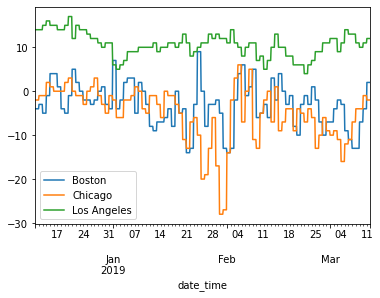

In [19]:
# c 

my_df.groupby('city')['mintemp'].plot.line(legend=True)

**10.4 Exercise 45: Taxi fare breakdown**
    
* a. Load data from all four NYC taxi files into a single data frame. We’ll need a bunch of different columns: 'tpep_pickup_datetime', 'passenger_count', 'trip_distance', 'fare_amount','extra','mta_tax','tip_amount','tolls_amount', 'improvement_surcharge','total_amount', and 'congestion_surcharge'.
* b. Create a bar plot showing how many rides took place during each month and year of our data set. (It’s fine if there are "holes" in the bar plot.)
* c. Create a bar plot showing the total amount paid in taxi rides for every year and month of our data set.
* d. Create a bar plot showing fare_amount, extra, mta_tax, tip_amount, and tolls_amount paid in taxi rides, per month + year—with the various components stacked in a single bar per year/month.
* e. Create a bar plot showing fare_amount, extra, mta_tax, tip_amount, and tolls_amount paid in taxi rides, per number of passengers, stacked in a single bar per number of passengers.
* f. Create a histogram showing the frequency of each tipping percentage between (and including) 0% and 50% 

In [5]:
# a
%pylab inline
import pandas as pd 
directory  ='D:/0_Machine_Learning/Software -- ML Journey/Pandas Workout book/pandas-workout-data/data/'

all_dfs = []
files = ['nyc_taxi_2019-01', 'nyc_taxi_2019-07', 'nyc_taxi_2020-01', 'nyc_taxi_2020-07']

for one_file in files:
    df_temp = pd.read_csv (directory + one_file + '.csv',
                           usecols = ['tpep_pickup_datetime', 'passenger_count', 'trip_distance', 
                                      'fare_amount','extra','mta_tax','tip_amount','tolls_amount',
                                      'improvement_surcharge','total_amount', 'congestion_surcharge'],
                          parse_dates = ['tpep_pickup_datetime'])#,
                          #index_col = ['tpep_pickup_datetime'])
    all_dfs.append(df_temp)

df_ny_taxi = pd.concat(all_dfs)
df_ny_taxi.shape

Populating the interactive namespace from numpy and matplotlib


(21183631, 11)

In [ ]:
df_ny_taxi.head(3)

In [ ]:
# reuven's solution to b

df_ny_taxi.groupby([df_ny_taxi['tpep_pickup_datetime'].dt.year, df_ny_taxi['tpep_pickup_datetime'].dt.month])\
['passenger_count'].count().plot.bar(figsize=(10,10))

# reuven's note:
# Here, we’re not interested in totalling the receipts, but rather in just counting the rows. 
# While we could run count, the aggregation method that counts rows, on the entire data frame, 
# that’ll give us an annoying and repeated count, once per column. We don’t really need that. 
# So I chose to select a single column, passenger_count—although we really could have chosen any of them.

<AxesSubplot:xlabel='tpep_pickup_datetime,tpep_pickup_datetime'>

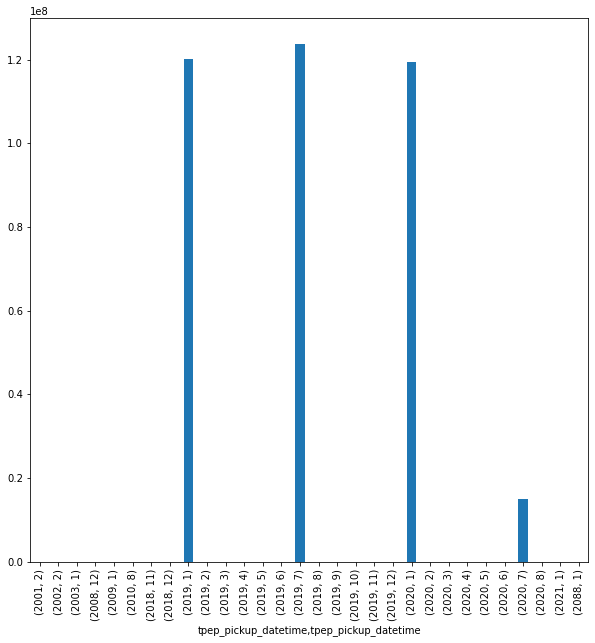

In [4]:
# c 

df_ny_taxi.groupby([df_ny_taxi['tpep_pickup_datetime'].dt.year , df_ny_taxi['tpep_pickup_datetime'].dt.month])\
['total_amount'].sum().plot.bar(figsize = (10,10))

<AxesSubplot:xlabel='tpep_pickup_datetime,tpep_pickup_datetime'>

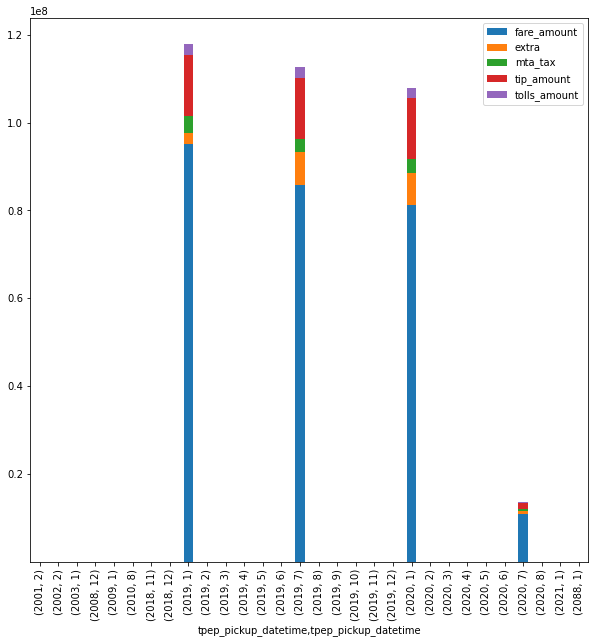

In [2]:
# d
df_ny_taxi.groupby([df_ny_taxi['tpep_pickup_datetime'].dt.year, df_ny_taxi['tpep_pickup_datetime'].\
                    dt.month])[['fare_amount', 'extra', 'mta_tax', 'tip_amount', \
                                'tolls_amount']].sum().plot.bar(stacked = True, figsize=(10,10))

<AxesSubplot:xlabel='passenger_count'>

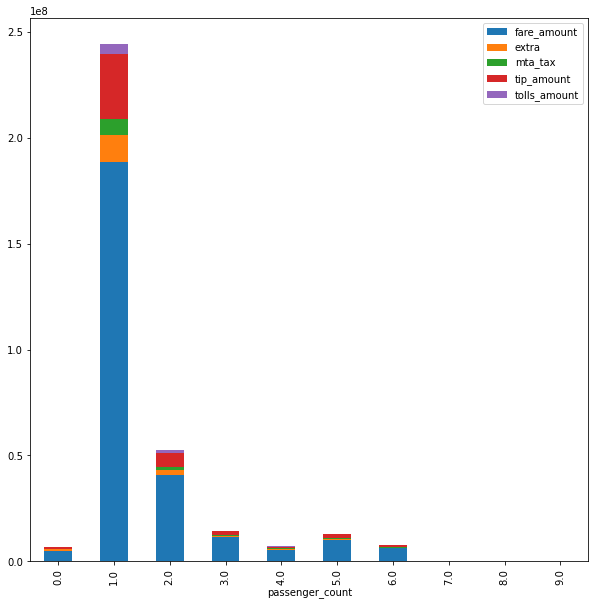

In [8]:
# e

df_ny_taxi.groupby('passenger_count')[['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount']].sum().plot.bar(stacked = True, figsize = (10, 10))

In [7]:
df_ny_taxi.head()

,tpep_pickup_datetime,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,2019-01-01 00:46:40,1.0,1.5,7.0,0.5,0.5,1.65,0.0,0.3,9.95,NaN
1,2019-01-01 00:59:47,1.0,2.6,14.0,0.5,0.5,1.00,0.0,0.3,16.30,NaN
2,2018-12-21 13:48:30,3.0,0.0,4.5,0.5,0.5,0.00,0.0,0.3,5.80,NaN
3,2018-11-28 15:52:25,5.0,0.0,3.5,0.5,0.5,0.00,0.0,0.3,7.55,NaN
4,2018-11-28 15:56:57,5.0,0.0,52.0,0.0,0.5,0.00,0.0,0.3,55.55,NaN


In [11]:
# f

df_ny_taxi['tip_percentage'] = df_ny_taxi['tip_amount'] / df_ny_taxi['fare_amount']
df_ny_taxi.head(3)

,tpep_pickup_datetime,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,tip_percentage
0,2019-01-01 00:46:40,1.0,1.5,7.0,0.5,0.5,1.65,0.0,0.3,9.95,NaN,0.235714
1,2019-01-01 00:59:47,1.0,2.6,14.0,0.5,0.5,1.00,0.0,0.3,16.30,NaN,0.071429
2,2018-12-21 13:48:30,3.0,0.0,4.5,0.5,0.5,0.00,0.0,0.3,5.80,NaN,0.000000


<AxesSubplot:ylabel='Frequency'>

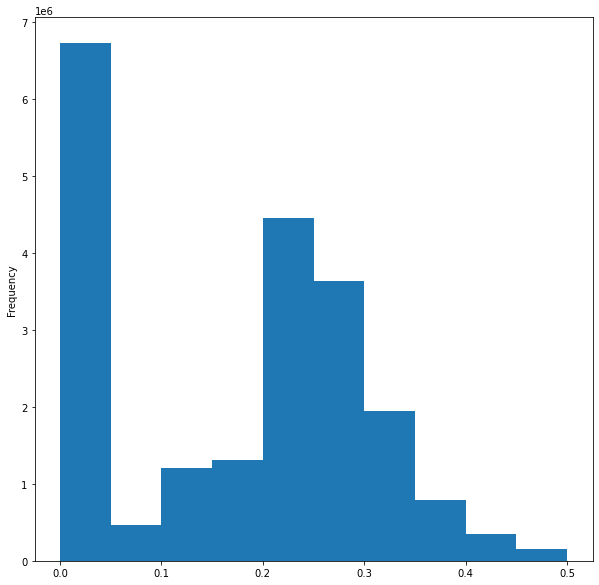

In [12]:
df_ny_taxi['tip_percentage'].plot.hist(range = (0, 0.5), figsize = (10,10))

<ipython-input-13-00ca2512f82c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ny_taxi['tip_percentage'] = df_ny_taxi['tip_amount'] / df_ny_taxi['fare_amount']


<AxesSubplot:ylabel='Frequency'>

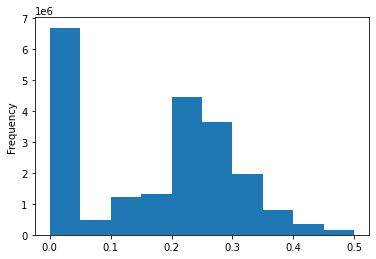

In [13]:
# reuven's solution to f which delivers the same result as mine 

df_ny_taxi = df_ny_taxi[df_ny_taxi['fare_amount'] > 0 ]

df_ny_taxi['tip_percentage'] = df_ny_taxi['tip_amount'] / df_ny_taxi['fare_amount']

df_ny_taxi.loc[df_ny_taxi['tip_percentage'] <= 0.5, 'tip_percentage'].plot.hist()


In [15]:
print ("my progress is {:.2f} %".format(269/335*100))

my progress is 80.30 %


**10.4.3 Beyond the exercise**

* a. Create a bar plot, showing the average distance traveled per day of the week in July 2020. The x axis should show the name of each day.
* b. Create a scatter plot with the taxi data from July 2020, comparing trip_distance with total_amount. Ignore all rides in which either value was less than or equal to 0, or greater than 500.
* c. Create a scatter plot with the taxi data from July 2020, comparing trip_distance with passenger_count. Ignore all rides in which trip_distance was less than or equal to 0, or greater than 500.

In [22]:
# a

df_jul_2020 = df_ny_taxi[((df_ny_taxi['tpep_pickup_datetime'].dt.year == 2020) & \
                                (df_ny_taxi['tpep_pickup_datetime'].dt.month == 7))]



<AxesSubplot:xlabel='tpep_pickup_datetime'>

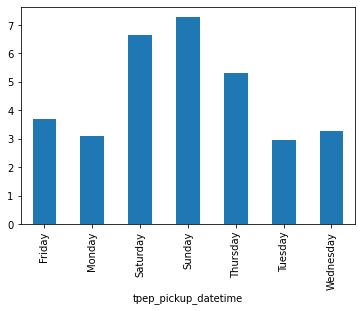

In [24]:
df_jul_2020.groupby(df_jul_2020['tpep_pickup_datetime'].dt.day_name())\
             ['trip_distance'].mean().plot.bar()

<AxesSubplot:xlabel='tpep_pickup_datetime'>

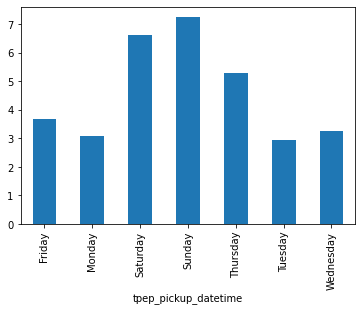

In [27]:
# reuven's solution: he reloaded data like in the below, but the results is the same as mine 

df_ny_jul_2020 = pd.read_csv(directory + 'nyc_taxi_2020-07.csv',
                            usecols =['tpep_pickup_datetime', 'passenger_count', 'trip_distance',
                            'fare_amount','extra','mta_tax','tip_amount','tolls_amount',
                            'improvement_surcharge','total_amount','congestion_surcharge'],
                             parse_dates = ['tpep_pickup_datetime'])

df_ny_jul_2020.groupby(df_ny_jul_2020['tpep_pickup_datetime'].dt.day_name())['trip_distance'].mean().plot.bar()

<AxesSubplot:xlabel='trip_distance', ylabel='total_amount'>

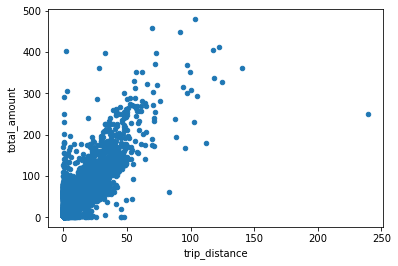

In [32]:
# b

df_ny_jul_2020.loc[((df_ny_jul_2020['trip_distance'] > 0) & \
                (df_ny_jul_2020['trip_distance'] <= 500)&\
               (df_ny_jul_2020['total_amount'] > 0) &\
                (df_ny_jul_2020['total_amount'] <= 500))].plot.scatter(x = 'trip_distance', y = 'total_amount')

* c. Create a scatter plot with the taxi data from July 2020, comparing trip_distance with passenger_count. Ignore all rides in which trip_distance was less than or equal to 0, or greater than 500.

In [33]:
# c

df_ny_jul_2020.head(2)

,tpep_pickup_datetime,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,2020-07-01 00:25:32,1.0,1.5,8.0,0.5,0.5,0.0,0.0,0.3,9.3,0.0
1,2020-07-01 00:03:19,1.0,9.5,26.5,0.5,0.5,0.0,0.0,0.3,27.8,0.0


<AxesSubplot:xlabel='trip_distance', ylabel='passenger_count'>

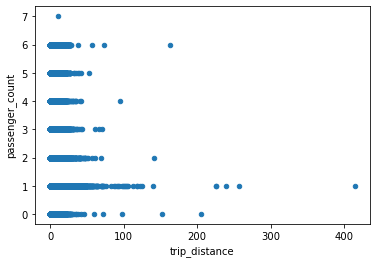

In [34]:
df_ny_jul_2020.loc[((df_ny_jul_2020['trip_distance'] > 0) & \
                (df_ny_jul_2020['trip_distance'] <= 500))].plot.scatter(x = 'trip_distance', y = 'passenger_count')

In [35]:
print(f"my progress is {273/335*100} %")

my progress is 81.49253731343283 %


**10.5 Exercise 46: Cars, Oil, and ice cream**

* a. Load the oil data (from Exercise 41) into a data frame. Set the names of the columns to be "date" and "oil", with the "date" column parsed as s a date and set to be the index.
* b. Load historical ice-cream prices in the United States (for a half gallon, aka 1.9 liters) into a separate data frame, from the file ice-cream.csv. Set the column names to be "date" and "icecream". The "date" column should be parsed as a date and set to be the index.
* c. Set the icecream column to be a floating-point value, removing any rows that stop you from accomplishing that.
* d. Load historical US "miles traveled per month" data into a separate data frame. Name the columns date and miles, parsing date as a date, and setting it to be the index.
* e. Create a single data frame from these three data frames. The index should be the date, and the new data frame should have three columns—oil, icecream, and miles. Only dates that are common to all three should be included.
* f. find correlation
* g. produce two scatter plots, first between oil and icecream and the second between oil and miles 

f to g was missed and i reproduced questions based on the book 

In [36]:
# a
df_oil = pd.read_csv(directory + 'wti-daily.csv',
                    header = 0,
                    names = ['date', 'oil'],
                    parse_dates = ['date'],
                    index_col = ['date'])

df_oil


,oil
date,
1986-01-02,25.56
1986-01-03,26.00
1986-01-06,26.53
1986-01-07,25.85
1986-01-08,25.87
...,...
2021-12-14,70.57
2021-12-15,70.89
2021-12-16,72.34


In [37]:
# b
df_ice_cream = pd.read_csv(directory + 'ice-cream.csv',
                          header = 0,
                          names =['date', 'icecream'],
                          parse_dates = ['date'],
                          index_col = ['date'])
df_ice_cream

,icecream
date,
1980-01-01,1.755
1980-02-01,1.775
1980-03-01,1.718
1980-04-01,1.769
1980-05-01,1.822
...,...
2021-09-01,4.900
2021-10-01,4.952
2021-11-01,4.770


In [52]:
# c
df_ice_cream['icecream'].unique()#.astype(np.float16)

array([1.755, 1.775, 1.718, 1.769, 1.822, 1.832, 1.831, 1.873, 1.825,
       1.879, 1.878, 1.92 , 1.938, 2.02 , 1.992, 2.023, 2.008, 2.006,
       2.014, 2.043, 2.031, 2.027, 2.064, 2.129, 2.074, 2.06 , 2.09 ,
       2.092, 2.096, 2.105, 2.137, 2.188, 2.162, 2.18 , 2.139, 2.107,
       2.14 , 2.121, 2.135, 2.193, 2.248, 2.215, 2.184, 2.19 , 2.191,
       2.172, 2.21 , 2.203, 2.213, 2.232, 2.3  , 2.26 , 2.223, 2.23 ,
       2.283, 2.291, 2.29 , 2.312, 2.275, 2.293, 2.273, 2.346, 2.348,
       2.295, 2.316, 2.33 , 2.383, 2.367, 2.324, 2.37 , 2.318, 2.36 ,
       2.377, 2.396, 2.404, 2.469, 2.447, 2.438, 2.48 , 2.428, 2.467,
       2.482, 2.47 , 2.492, 2.45 , 2.494, 2.475, 2.406, 2.43 , 2.457,
       2.432, 2.443, 2.441, 2.445, 2.488, 2.535, 2.547, 2.56 , 2.596,
       2.607, 2.592, 2.59 , 2.566, 2.613, 2.639, 2.629, 2.668, 2.719,
       2.656, 2.568, 2.586, 2.576, 2.635, 2.574, 2.54 , 2.521, 2.605,
       2.621, 2.594, 2.588, 2.633, 2.63 , 2.6  , 2.562, 2.615, 2.582,
       2.604, 2.531,

In [46]:
df_ice_cream['icecream'] = df_ice_cream['icecream'].replace('.', np.NaN).astype(np.float16)

In [48]:
df_ice_cream = df_ice_cream.dropna()

reuven's note on his solution to c in the below 

I decided to gamble that any oproblematic lines would be like this, meaning that if I were only to keep lines containing digits, then I’d be able to convert the column into float values. I decided to use a regular expression for this, looking for '\d', meaning "any digit," removing those rows that lack even a single digit.

Notice that I used a raw string (i.e., a string with an r before the opening quote). Raw strings are Python’s way of automatically doubling backslashes, thus ensuring that Python doesn’t pre-digest our backslashes before they get to the regular expression engine. I used str.contains, a method that we encountered earlier in this book, to find all rows that do indeed contain at least one digit; that returned a boolean series, which I used as a mask index and then assigned back to ice_cream_df.



In [ ]:
# reuven's solution to c using regexp 

ice_cream_df = ice_cream_df[ice_cream_df['icecream'].str.contains(r'\d')]


In [49]:
# d
df_mile_traveled = pd.read_csv(directory + 'miles-traveled.csv',
                              header = 0,
                              names = ['date', 'miles'],
                              parse_dates = ['date'],
                              index_col = ['date'])
df_mile_traveled

,miles
date,
1970-01-01,80173.0
1970-02-01,77442.0
1970-03-01,90223.0
1970-04-01,89956.0
1970-05-01,97972.0
...,...
2021-08-01,287397.0
2021-09-01,277979.0
2021-10-01,285760.0


In [51]:
# e

df_final = (df_oil.join(df_ice_cream)).join(df_mile_traveled).dropna()
df_final

,oil,icecream,miles
date,,,
1986-04-01,11.13,2.382812,150277.0
1986-05-01,13.80,2.367188,160459.0
1986-07-01,12.39,2.369141,171114.0
1986-08-01,11.56,2.318359,173977.0
1986-10-01,15.23,2.376953,159434.0
...,...,...,...
2021-07-01,75.33,4.941406,296475.0
2021-09-01,68.63,4.898438,277979.0
2021-10-01,76.01,4.953125,285760.0


In [64]:
# reuven's second approach to e

df_final = df_oil.join(df_ice_cream, how = 'inner').join(df_mile_traveled, how = 'inner')
df_final

,oil,icecream,miles
date,,,
1986-04-01,11.13,2.382812,150277.0
1986-05-01,13.80,2.367188,160459.0
1986-07-01,12.39,2.369141,171114.0
1986-08-01,11.56,2.318359,173977.0
1986-10-01,15.23,2.376953,159434.0
...,...,...,...
2021-07-01,75.33,4.941406,296475.0
2021-09-01,68.63,4.898438,277979.0
2021-10-01,76.01,4.953125,285760.0


In [65]:
# f correlation

df_final.corr()

,oil,icecream,miles
oil,1.000000,0.777299,0.645250
icecream,0.777299,1.000000,0.818402
miles,0.645250,0.818402,1.000000


<AxesSubplot:xlabel='oil', ylabel='icecream'>

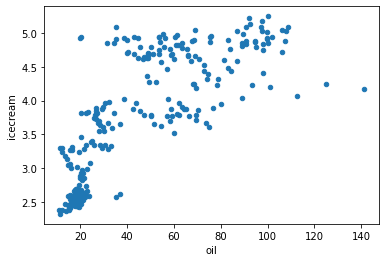

In [66]:
# g

df_final.plot.scatter(x = 'oil', y = 'icecream')

<AxesSubplot:xlabel='oil', ylabel='miles'>

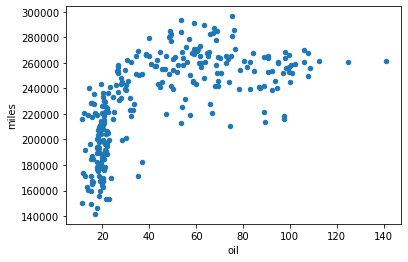

In [67]:
df_final.plot.scatter(x = 'oil', y = 'miles')

array([[<AxesSubplot:xlabel='oil', ylabel='oil'>,
        <AxesSubplot:xlabel='icecream', ylabel='oil'>,
        <AxesSubplot:xlabel='miles', ylabel='oil'>],
       [<AxesSubplot:xlabel='oil', ylabel='icecream'>,
        <AxesSubplot:xlabel='icecream', ylabel='icecream'>,
        <AxesSubplot:xlabel='miles', ylabel='icecream'>],
       [<AxesSubplot:xlabel='oil', ylabel='miles'>,
        <AxesSubplot:xlabel='icecream', ylabel='miles'>,
        <AxesSubplot:xlabel='miles', ylabel='miles'>]], dtype=object)

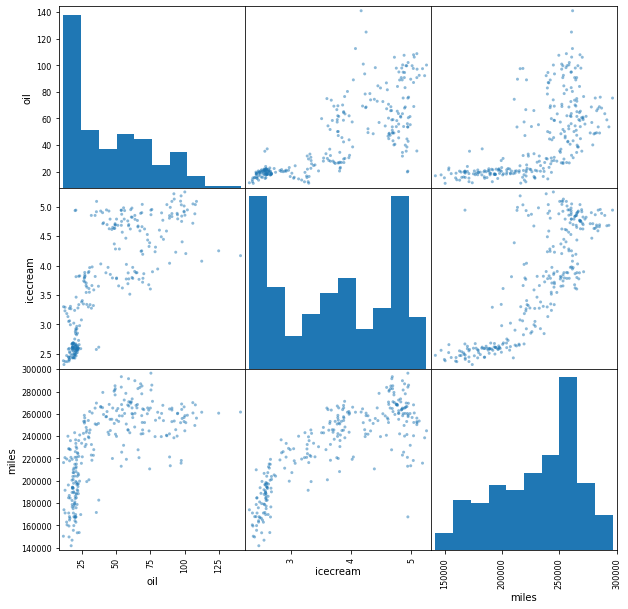

In [71]:
# h create a single "scatter matrix" plot, showing all of the numeric columns plotting against one another:

from pandas.plotting import scatter_matrix
scatter_matrix(df_final, figsize = (10,10))

In [70]:
help(scatter_matrix)

Help on function scatter_matrix in module pandas.plotting._misc:

scatter_matrix(frame: 'DataFrame', alpha: 'float' = 0.5, figsize: 'tuple[float, float] | None' = None, ax: 'Axes | None' = None, grid: 'bool' = False, diagonal: 'str' = 'hist', marker: 'str' = '.', density_kwds=None, hist_kwds=None, range_padding: 'float' = 0.05, **kwargs) -> 'np.ndarray'
    Draw a matrix of scatter plots.
    
    Parameters
    ----------
    frame : DataFrame
    alpha : float, optional
        Amount of transparency applied.
    figsize : (float,float), optional
        A tuple (width, height) in inches.
    ax : Matplotlib axis object, optional
    grid : bool, optional
        Setting this to True will show the grid.
    diagonal : {'hist', 'kde'}
        Pick between 'kde' and 'hist' for either Kernel Density Estimation or
        Histogram plot in the diagonal.
    marker : str, optional
        Matplotlib marker type, default '.'.
    density_kwds : keywords
        Keyword arguments to be pass

<AxesSubplot:xlabel='date'>

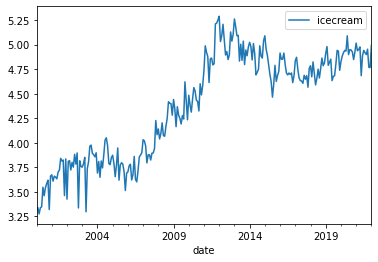

In [77]:
# thus was not asked for but i found it in the end in for this question in reuven's GitHub
df_ice_cream['2000':].plot.line()


**10.5.3 Beyond the exercise**

* a. Is the month correlated with them at all?
* b. Create a scatter plot of icecream vs. miles, adding color using the month the "Spectral" colormap.
* c. Instead of using an inner join, we could have removed all of the rows from oil_df that weren’t on the first day of the month. How could we do that?

In [87]:
# a 
df_final.head(2)

,oil,icecream,miles
date,,,
1986-04-01,11.13,2.382812,150277.0
1986-05-01,13.80,2.367188,160459.0


In [88]:
df_final = df_final.reset_index()
df_final.head(3)

,date,oil,icecream,miles
0,1986-04-01,11.13,2.382812,150277.0
1,1986-05-01,13.80,2.367188,160459.0
2,1986-07-01,12.39,2.369141,171114.0


In [91]:
df_final['month'] = df_final['date'].dt.month
df_final.head(3)

,date,oil,icecream,miles,month
0,1986-04-01,11.13,2.382812,150277.0,4
1,1986-05-01,13.80,2.367188,160459.0,5
2,1986-07-01,12.39,2.369141,171114.0,7


In [95]:
df_final.set_index('date').corr()

,oil,icecream,miles,month
oil,1.000000,0.777299,0.645250,0.006616
icecream,0.777299,1.000000,0.818402,-0.003981
miles,0.645250,0.818402,1.000000,0.079290
month,0.006616,-0.003981,0.079290,1.000000


<AxesSubplot:xlabel='icecream', ylabel='miles'>

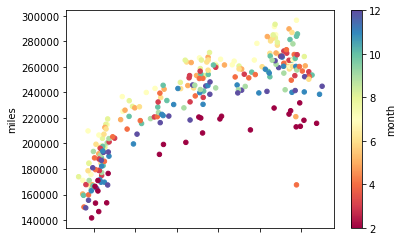

In [100]:
# b
df_final.plot.scatter( x= 'icecream', y = 'miles', c='month', colormap='Spectral')

In [104]:
# c
df_oil = df_oil.reset_index()

In [111]:
df_oil[df_oil['date'].dt.is_month_start].set_index('date').join(df_ice_cream).join(df_mile_traveled)

,oil,icecream,miles
date,,,
1986-04-01,11.13,2.382812,150277.0
1986-05-01,13.80,2.367188,160459.0
1986-07-01,12.39,2.369141,171114.0
1986-08-01,11.56,2.318359,173977.0
1986-10-01,15.23,2.376953,159434.0
...,...,...,...
2021-07-01,75.33,4.941406,296475.0
2021-09-01,68.63,4.898438,277979.0
2021-10-01,76.01,4.953125,285760.0


In [113]:
# some practice on seaborn 

import glob

all_dfs = []

# all_filenames = glob.glob('../data/*,*.csv')
all_filenames = ['chicago,il']

for one_filename in all_filenames:
    print(f'Loading {one_filename}...')
    city, state = one_filename.split(',')
    one_df = pd.read_csv(directory + one_filename + '.csv',
                     usecols=[1, 2, 19],
                     names=['max_temp', 'min_temp', 'precipMM'],
                     header=0)
    one_df['city'] = city.replace('+', ' ').title()
    one_df['state'] = state.upper()
    all_dfs.append(one_df)

df = pd.concat(all_dfs)

Loading chicago,il...


In [114]:
df

,max_temp,min_temp,precipMM,city,state
0,1,-2,0.0,Chicago,IL
1,1,-2,0.0,Chicago,IL
2,1,-2,0.0,Chicago,IL
3,1,-2,0.0,Chicago,IL
4,1,-2,0.0,Chicago,IL
...,...,...,...,...,...
723,3,-2,0.0,Chicago,IL
724,3,-2,0.0,Chicago,IL
725,3,-2,0.0,Chicago,IL
726,3,-2,0.0,Chicago,IL


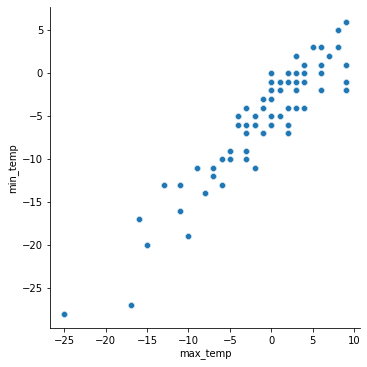

In [122]:
import seaborn as sns

sns.relplot(x = 'max_temp',
           y = 'min_temp',
           data = df.loc[df['city'] == 'Chicago'])

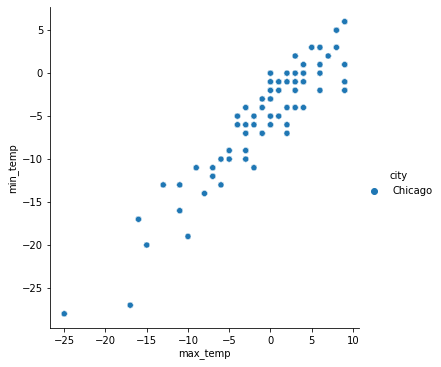

In [123]:

sns.relplot(x='max_temp',
            y='min_temp',
            data=df,
            hue='city')

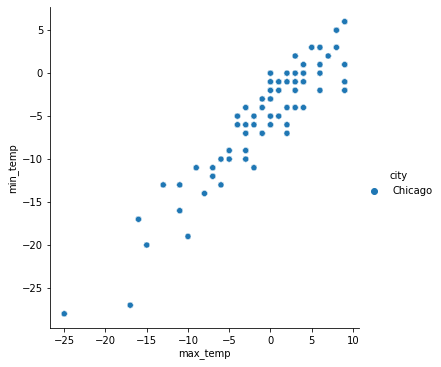

In [124]:
sns.relplot(x='max_temp',
            y='min_temp',
            data=df,
            hue='city', style='city')

In [125]:
print ("my progress is {:.2f}".format(282/335*100))

my progress is 84.18


**10.6 Exercise 47: Seaborn taxi plots**

* a. Load data from NYC taxis in 2020, only loading columns tpep_pickup_datetime, passenger_count, trip_distance, and total_amount.
* b. Add columns "month" and "year", from tpep_pickup_datetime. Keep only those data points in which the year is 2020 and the month is either January or July.
* c. Set a new numeric range index, numbered starting at 0
* d. Assign df to a random sample of 1% of the elements in the original df
* e. Using Seaborn, create a scatter plot in which the x axis shows trip_distance and the y axis shows total_amount, with the plot colors set by passenger_count. Use the 1% sample of the data.
* f. Why do we have colors for passenger_count of 1.5, 4.5, and 7.5?
* g. Create a line plot showing the distance traveled on each day of January and July. The x axis should be the day of the month, and the y axis will be the trip distance. There should be two lines, one for each month.
* h. Using Seaborn, show the number of trips taken on each day (1-31) of both months (January and July). The x axis should refer to the day of the month, and the y axis should show the number of trips taken.
* i. Using Seaborn, create a box plot of total_amount, with one plot for each month.


In [128]:
# a
files = ['nyc_taxi_2020-01', 'nyc_taxi_2020-07']

all_years = [pd.read_csv(directory + one_file + '.csv',
            usecols = [ 'tpep_pickup_datetime', 'passenger_count', 'trip_distance', 'total_amount'],
            parse_dates = ['tpep_pickup_datetime']) for one_file in files]

df_ny_taxi_2020 = pd.concat(all_years)

df_ny_taxi_2020.head()

,tpep_pickup_datetime,passenger_count,trip_distance,total_amount
0,2020-01-01 00:28:15,1.0,1.2,11.27
1,2020-01-01 00:35:39,1.0,1.2,12.30
2,2020-01-01 00:47:41,1.0,0.6,10.80
3,2020-01-01 00:55:23,1.0,0.8,8.16
4,2020-01-01 00:01:58,1.0,0.0,4.80


In [180]:
# b 
df_ny_taxi_2020 ['month'] = df_ny_taxi_2020['tpep_pickup_datetime'].dt.month
df_ny_taxi_2020 ['year'] = df_ny_taxi_2020['tpep_pickup_datetime'].dt.year

df_ny_taxi_2020 = df_ny_taxi_2020[(((df_ny_taxi_2020['year'] == 2020) & (df_ny_taxi_2020['month'] == 1))| \
                ((df_ny_taxi_2020['year'] == 2020) & (df_ny_taxi_2020['month'] == 7)))]

df_ny_taxi_2020.head()


,tpep_pickup_datetime,passenger_count,trip_distance,total_amount,month,year
0,2020-01-01 00:28:15,1.0,1.2,11.27,1,2020
1,2020-01-01 00:35:39,1.0,1.2,12.30,1,2020
2,2020-01-01 00:47:41,1.0,0.6,10.80,1,2020
3,2020-01-01 00:55:23,1.0,0.8,8.16,1,2020
4,2020-01-01 00:01:58,1.0,0.0,4.80,1,2020


In [ ]:
# reuven's solution to b 

df = df.loc[(df['month'].isin([1, 7])) & (df['year'] == 2020)]


In [ ]:
# c i did not know and here is the reuven's solution:

#### reuven's note on c -- already added to my notes on pd.concat:
Next, I asked you to ensure that the new data frame’s index doesn’t contain duplicate values—something that is almost certainly the case at this point, given that we created df from two previous data frames. You can actually check to see if a data frame’s index contains repeated values with the code


df_ny_taxi_2020.index.is_unique

If this returns True, then the values are already unique. If not, then some Seaborn plots will give you errors. We could renumber the index on our own, but why work so hard, when pandas includes this functionality? We can just say:

**df_ny_taxi_2020 = df_ny_taxi_2020.reset_index(drop=True)**

By passing drop=True, we tell reset_index not to make the just-ousted index column a regular column in the data frame, but rather to drop it entirely.

In [183]:
df_ny_taxi_2020.index.is_unique

False

In [184]:
df_ny_taxi_2020 = df_ny_taxi_2020.reset_index(drop=True)

In [185]:
df_ny_taxi_2020.index.is_unique

True

In [186]:
# d 

df_working = df_ny_taxi_2020.sample(frac = 0.01)
df_working

,tpep_pickup_datetime,passenger_count,trip_distance,total_amount,month,year
3249225,2020-01-17 12:41:06,1.0,0.87,17.76,1,2020
3340743,2020-01-17 18:30:15,1.0,1.16,14.80,1,2020
3537131,2020-01-18 18:29:09,2.0,1.18,12.96,1,2020
4043186,2020-01-21 15:17:34,1.0,0.60,9.96,1,2020
1610925,2020-01-09 19:27:29,1.0,3.48,27.36,1,2020
...,...,...,...,...,...,...
1400062,2020-01-08 20:03:45,1.0,0.98,11.16,1,2020
6094300,2020-01-30 22:15:20,1.0,0.87,11.16,1,2020
4041325,2020-01-21 15:10:08,4.0,1.58,12.80,1,2020
1778085,2020-01-10 15:07:32,1.0,1.52,16.05,1,2020


In [158]:
df_ny_taxi_2020.shape

(7205204, 6)

<AxesSubplot:xlabel='trip_distance', ylabel='total_amount'>

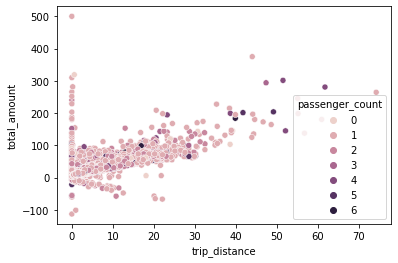

In [187]:
# e i got this through asking chatGPT

import seaborn as sns
sns.scatterplot(data = df_working , x = 'trip_distance', y = 'total_amount', hue = 'passenger_count')

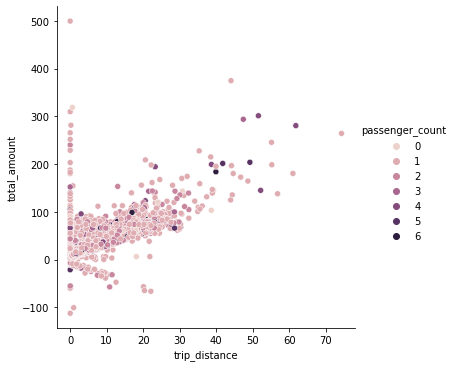

In [188]:
# reuven's solution to e
sns.relplot(x='trip_distance', y='total_amount', data=df_working,
            hue='passenger_count')

In [160]:
# f Why do we have colors for passenger_count of 1.5, 4.5, and 7.5?

# Unfortunately reuven did not answer this question!!!!

df_working['passenger_count'].unique()

array([ 1.,  5.,  4.,  2.,  3., nan,  0.,  6.])

In [161]:
df_ny_taxi_2020['passenger_count'].unique()

array([ 1.,  2.,  3.,  6.,  4.,  5.,  0.,  8.,  7.,  9., nan])

In [189]:
df_working

,tpep_pickup_datetime,passenger_count,trip_distance,total_amount,month,year
3249225,2020-01-17 12:41:06,1.0,0.87,17.76,1,2020
3340743,2020-01-17 18:30:15,1.0,1.16,14.80,1,2020
3537131,2020-01-18 18:29:09,2.0,1.18,12.96,1,2020
4043186,2020-01-21 15:17:34,1.0,0.60,9.96,1,2020
1610925,2020-01-09 19:27:29,1.0,3.48,27.36,1,2020
...,...,...,...,...,...,...
1400062,2020-01-08 20:03:45,1.0,0.98,11.16,1,2020
6094300,2020-01-30 22:15:20,1.0,0.87,11.16,1,2020
4041325,2020-01-21 15:10:08,4.0,1.58,12.80,1,2020
1778085,2020-01-10 15:07:32,1.0,1.52,16.05,1,2020


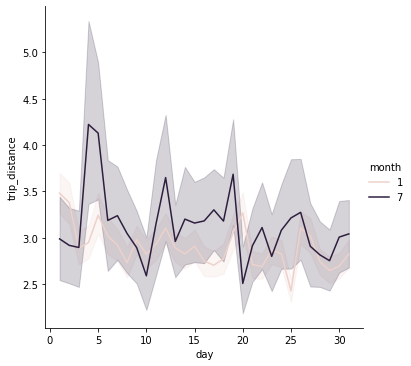

In [197]:
# g 
df_working ['day'] = df_working['tpep_pickup_datetime'].dt.day

sns.relplot(x = df_working['day'],
           y = df_working['trip_distance'],
           data = df_working,
            hue = 'month',
            kind = 'line')

reuven's note on his solution below -- already added to my notes on visualization:

Notice, though, that there are some gray lines around each of our plots. Those indicate the "confidence interval" for each calculation. Confidence intervals are a statistical tool to indicate how likely a value is to fall within a certain range. We can disable the confidence intervals by passing ci='None' on a relplot:



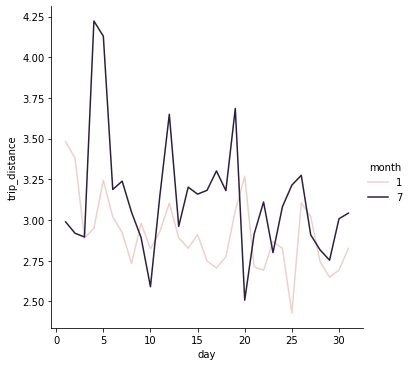

In [199]:
# reuven's solution to g

sns.relplot(x='day', y='trip_distance', kind='line',
           data=df_working, hue='month', ci=None)

In [219]:
df_working 

,tpep_pickup_datetime,passenger_count,trip_distance,total_amount,month,year,day
3249225,2020-01-17 12:41:06,1.0,0.87,17.76,1,2020,17
3340743,2020-01-17 18:30:15,1.0,1.16,14.80,1,2020,17
3537131,2020-01-18 18:29:09,2.0,1.18,12.96,1,2020,18
4043186,2020-01-21 15:17:34,1.0,0.60,9.96,1,2020,21
1610925,2020-01-09 19:27:29,1.0,3.48,27.36,1,2020,9
...,...,...,...,...,...,...,...
1400062,2020-01-08 20:03:45,1.0,0.98,11.16,1,2020,8
6094300,2020-01-30 22:15:20,1.0,0.87,11.16,1,2020,30
4041325,2020-01-21 15:10:08,4.0,1.58,12.80,1,2020,21
1778085,2020-01-10 15:07:32,1.0,1.52,16.05,1,2020,10


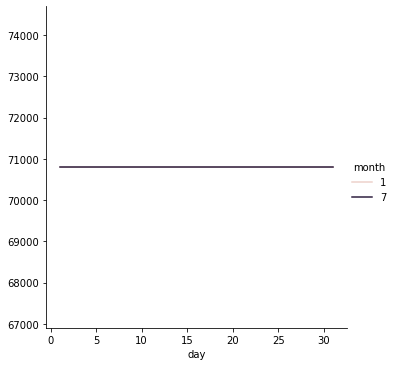

In [207]:
# h -- my solution which was wrong 
df_working ['day'] = df_working['tpep_pickup_datetime'].dt.day

sns.relplot(data = df_working,
            x = 'day',
            y = df_working['passenger_count'].count(),
            hue = 'month',
           kind = 'line')

reuven's note on his solution below:

But wait a second: How will we get the number of trips taken each day? In order to do that, we’ll need to use the count aggregation method. And indeed, here I suggest not getting data back from df, but rather from the result of a groupby on df. If we count by both month and day, and count in the year column, we’ll have access to month and day, but also to the number of rides there were per day. (Using year is a bit weird, since we aren’t counting the year at all—but we need to pick some column.) After performing this groupby, I’ll then reset the index, making month and day back into regular columns, from which they can be retrieved.

This is a complex query, and it’s then used in a complex plot. So let’s walk through this once again, a step at a time:

We want to know how many rides there on each day of each month. That requires groupby(['month', 'day']).

We then run the count aggregation method on the groupby object

The result gives us a count for each remaining column in the data frame. We only need one, and I choose year.

I then run reset_index to take month and day, which are part of the index of the aggregation data frame, and put them back into the main data frame.

I then pass the result from reset_index as the argument to data, in my call to relplot

I tell replot that the x axis should be based on day and the y axis should be based on year, the count of rides

I tell replot to distinguish between months by color

I ask for a line plot

Finally, I ask for ci='None' to avoid any confidence intervals from being shown

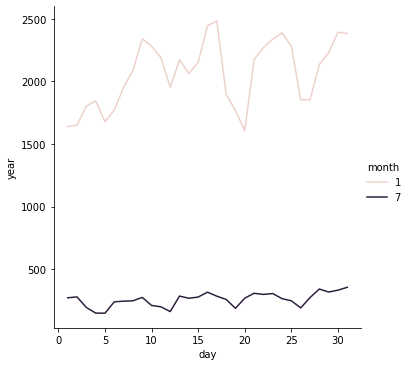

In [226]:
# reuven's solution to h
sns.relplot(x='day', y='year', hue='month', kind='line',
            data=df_working.groupby(['month', 'day'])[['year']].count().reset_index(), ci=None)

In [225]:
df_working.groupby(['month', 'day'])['year'].count().reset_index()

,month,day,year
0,1,1,1639
1,1,2,1650
2,1,3,1802
3,1,4,1845
4,1,5,1678
...,...,...,...
57,7,27,273
58,7,28,341
59,7,29,317
60,7,30,332


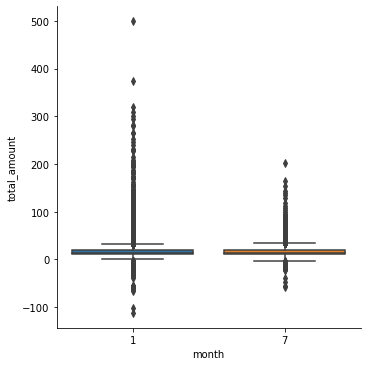

In [227]:
# i Using Seaborn, create a box plot of total_amount, with one plot for each month.

sns.catplot(x= 'month', y = 'total_amount', data = df_working, kind = 'box')

In [230]:
# reuven's note:
# though looking at the above plot, We see that the mean values for total_amount weren’t that different in January and 
# July of 2020. And sure enough, we can see this numerically:

# but i think he should have meant median, since through seeing a box plot we see median but if the data is not 
# skewed mean should be also close to median, maybe this is the basis of reuven's thoughts but he should have assumed that
# the data is not skewed! can he do so by seeing the plot above?! to answer this see below!

df_working.groupby('month')['total_amount'].mean()

month
1    18.676869
7    18.345547
Name: total_amount, dtype: float64

I asked chatGPT: -- already included in my notes on box plots
    
can i conclude about data being skewed or not through seeing a box plot? 

answer:

yes, you can get an idea about whether the data is skewed or not by looking at a box plot.

If the box in the box plot is approximately symmetric, meaning the median is close to the center of the box, and the whiskers are roughly equal in length, then the data is likely to be approximately symmetric. In this case, the mean and median will be close to each other.

However, if the box is elongated and the whisker on one side is longer than the other, then the data is likely to be skewed. If the longer whisker is on the right side, the data is said to be positively skewed, which means that there are more low values than high values. If the longer whisker is on the left side, the data is said to be negatively skewed, which means that there are more high values than low values.

In a skewed distribution, the median is usually a more representative measure of central tendency than the mean. So, if the box plot shows evidence of skewness, you should consider reporting the median instead of the mean.

Keep in mind that a box plot only gives a rough idea of the skewness of the data and may not provide a precise description of its shape. It's always a good idea to look at other measures of central tendency, such as the mean and the median, and to assess the shape of the distribution using a histogram or a density plot.

In [233]:
print ("my progress is {:.2f}".format(286/335*100))

my progress is 85.37


**10.6.3 Beyond the exercise** reuven did not solve c in his GitHub but have another question which I will add as d, he did not solve d either

* a. Load NYC taxi data from both 2019 and 2020, January and July. Remove data from outside of those years and months. Now display the number of trips on each day of the month in four separate graphs—the top row in 2019, and the bottom row in 2020, the left column for January and the right column for July.
* b. Create a histogram, showing how many rides took place per day of each month (January and July). Each month should appear in a different color, and they should appear side-by-side, with January on the left and July on the right.
* c. Create a bar plot, showing how many rides took place in each hour (0-24) in each month (January and July). Each month should appear in a different color, and they should appear side-by-side, with January on the left and July on the right.
* d. Add a "trip_length" column, for short, medium, and long trips, as we did in Exercise 7. Show the trip distance per day of month in three plots alongside one another, with one for each category.


In [289]:
# a
                         
file_names = ['nyc_taxi_2019-01', 'nyc_taxi_2019-07', 'nyc_taxi_2020-01', 'nyc_taxi_2020-07']
                         
all_dfs = [pd.read_csv(directory + one_file + '.csv',
                      usecols = ['tpep_pickup_datetime', 'passenger_count', 'trip_distance', 'total_amount'],
                      parse_dates = ['tpep_pickup_datetime'])
          for one_file in file_names]


df_taxi = pd.concat(all_dfs)
df_taxi.shape

(21183631, 4)

In [290]:
# a

df_taxi = df_taxi[((df_taxi['tpep_pickup_datetime'].dt.year == 2019) | \
                   (df_taxi['tpep_pickup_datetime'].dt.year == 2020))\
                  & (df_taxi['tpep_pickup_datetime'].dt.month.isin([1, 7]))]
df_taxi.head(2)

,tpep_pickup_datetime,passenger_count,trip_distance,total_amount
0,2019-01-01 00:46:40,1.0,1.5,9.95
1,2019-01-01 00:59:47,1.0,2.6,16.30


In [238]:
df_taxi.shape

(21182601, 4)

In [242]:
# sanity check
df_taxi[(df_taxi['tpep_pickup_datetime'].dt.year !=2019) & (df_taxi['tpep_pickup_datetime'].dt.year !=2020)]
df_taxi[(df_taxi['tpep_pickup_datetime'].dt.month !=1) & (df_taxi['tpep_pickup_datetime'].dt.month !=7)]

,tpep_pickup_datetime,passenger_count,trip_distance,total_amount


In [244]:
df_taxi.head()

,tpep_pickup_datetime,passenger_count,trip_distance,total_amount
0,2019-01-01 00:46:40,1.0,1.5,9.95
1,2019-01-01 00:59:47,1.0,2.6,16.30
7,2019-01-01 00:21:28,1.0,1.3,9.05
8,2019-01-01 00:32:01,1.0,3.7,18.50
9,2019-01-01 00:57:32,2.0,2.1,13.00


In [ ]:
# reuven'approach to a

filenames = ['../data/nyc_taxi_2019-01.csv', '../data/nyc_taxi_2019-07.csv',
             '../data/nyc_taxi_2020-01.csv', '../data/nyc_taxi_2020-07.csv']

all_dfs = [pd.read_csv(one_filename,
           usecols=['tpep_pickup_datetime', 'passenger_count', 'trip_distance',
                    'total_amount'],
           parse_dates=['tpep_pickup_datetime'])
           for one_filename in filenames]

df = pd.concat(all_dfs)

df['year'] = df['tpep_pickup_datetime'].dt.year
df['month'] = df['tpep_pickup_datetime'].dt.month
df['day'] = df['tpep_pickup_datetime'].dt.day

df = df.loc[(df['month'].isin([1, 7])) & (df['year'].isin([2019, 2020]))]

# Assign df to a random sample of 1% of the elements in df
df = df.sample(frac=0.01) # this is what I did not

In [291]:
# b
df_taxi['month'] = df_taxi['tpep_pickup_datetime'].dt.month
df_taxi ['day'] = df_taxi['tpep_pickup_datetime'].dt.day
df_taxi ['year'] = df_taxi['tpep_pickup_datetime'].dt.year

df_taxi.head()

,tpep_pickup_datetime,passenger_count,trip_distance,total_amount,month,day,year
0,2019-01-01 00:46:40,1.0,1.5,9.95,1,1,2019
1,2019-01-01 00:59:47,1.0,2.6,16.30,1,1,2019
7,2019-01-01 00:21:28,1.0,1.3,9.05,1,1,2019
8,2019-01-01 00:32:01,1.0,3.7,18.50,1,1,2019
9,2019-01-01 00:57:32,2.0,2.1,13.00,1,1,2019


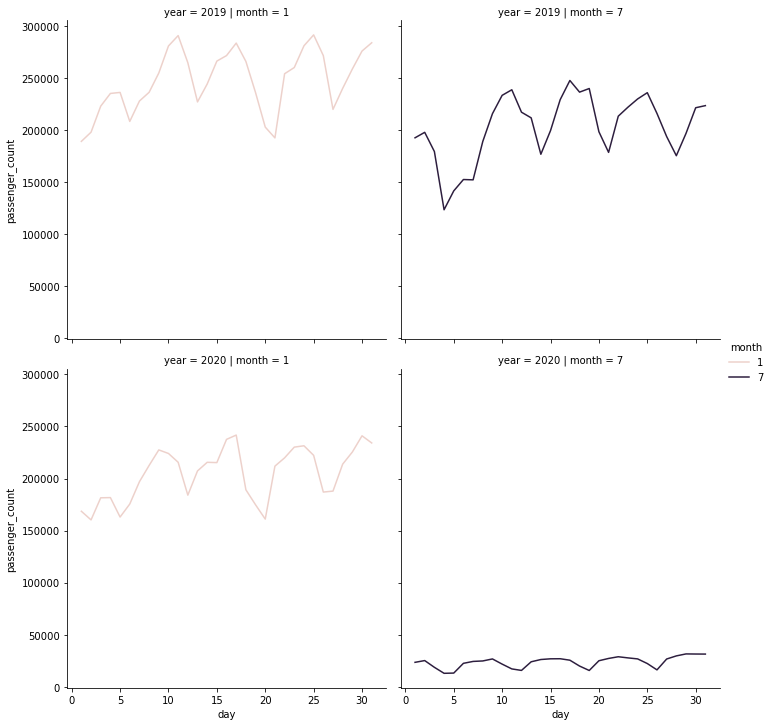

In [294]:
sns.relplot(data = df_taxi.groupby(['year', 'month', 'day'])['passenger_count'].count().reset_index(),
           x = 'day',
           y = 'passenger_count',
           kind = 'line',
           col= 'month', 
           row = 'year',
           hue = 'month')

In [324]:
# a little discrepency with my plot above and with reuve's should be because he 
# woorked with 10% of the data but i worked with the whole

In [262]:
# just practice to figure above
df_taxi.groupby(['year','month', 'day'])[['passenger_count']].count().reset_index()

,year,month,day,passenger_count
0,2019,1,1,189035
1,2019,1,2,197852
2,2019,1,3,222879
3,2019,1,4,235053
4,2019,1,5,236041
...,...,...,...,...
119,2020,7,27,26705
120,2020,7,28,29694
121,2020,7,29,31593
122,2020,7,30,31490


In [296]:
 df_taxi.groupby(['month', 'day'])['passenger_count'].count().reset_index()

,month,day,passenger_count
0,1,1,357613
1,1,2,358143
2,1,3,404399
3,1,4,416759
4,1,5,399079
...,...,...,...
57,7,27,220372
58,7,28,204954
59,7,29,228290
60,7,30,252821


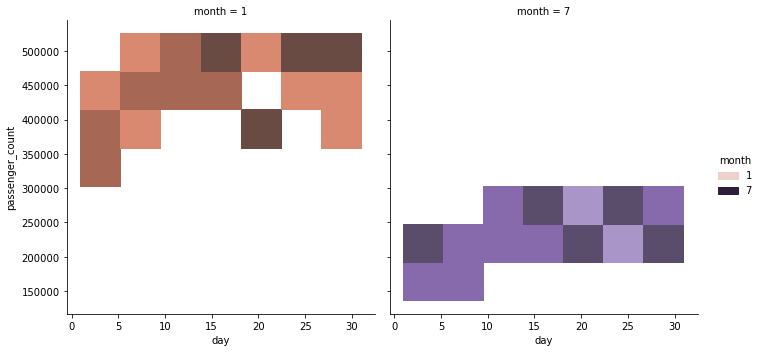

In [302]:
# b
sns.displot(data = df_taxi.groupby(['month', 'day'])['passenger_count'].count().reset_index(),
           x = 'day',
            y = 'passenger_count',
           hue = 'month',
           col = 'month')

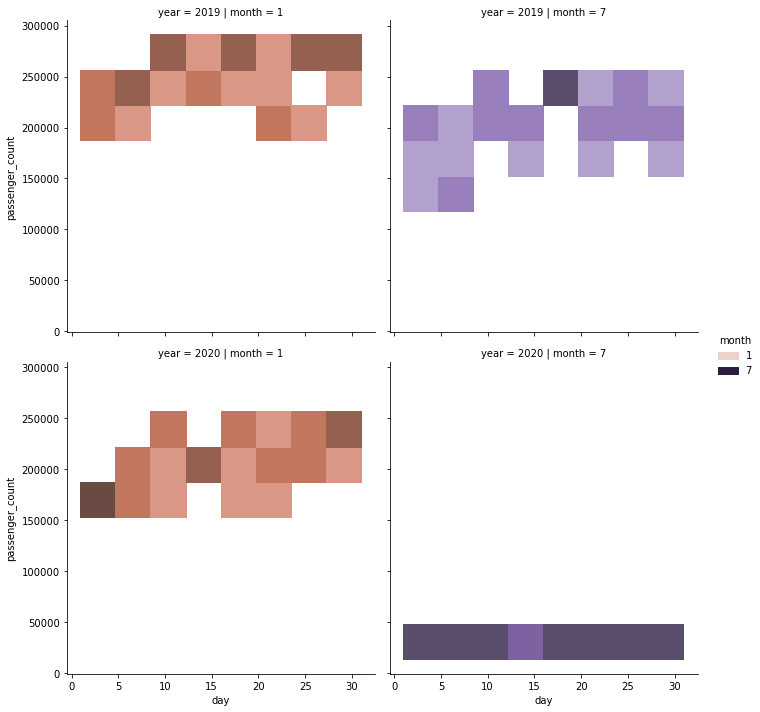

In [300]:
# i think it would have been better if we could separate based on year as well like: 

sns.displot(data = df_taxi.groupby(['year', 'month', 'day'])['passenger_count'].count().reset_index(),
           x = 'day',
            y = 'passenger_count',
           hue = 'month',
           col = 'month',
           row = 'year')

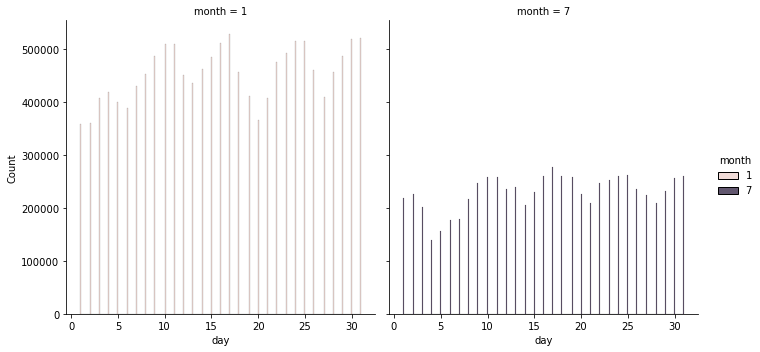

In [320]:
# reuven's solution to b 
df_taxi['day'] = df_taxi['tpep_pickup_datetime'].dt.day
sns.displot(x='day', data=df_taxi, hue='month', col='month')


In [321]:
df_taxi

,tpep_pickup_datetime,passenger_count,trip_distance,total_amount,month,day,year,hour,trip_length
0,2019-01-01 00:46:40,1.0,1.50,9.95,1,1,2019,0,short
1,2019-01-01 00:59:47,1.0,2.60,16.30,1,1,2019,0,medium
7,2019-01-01 00:21:28,1.0,1.30,9.05,1,1,2019,0,short
8,2019-01-01 00:32:01,1.0,3.70,18.50,1,1,2019,0,medium
9,2019-01-01 00:57:32,2.0,2.10,13.00,1,1,2019,0,medium
...,...,...,...,...,...,...,...,...,...
800407,2020-07-19 13:27:52,NaN,24.23,83.50,7,19,2020,13,long
800408,2020-07-19 13:02:00,NaN,4.40,19.78,7,19,2020,13,medium
800409,2020-07-19 13:32:00,NaN,8.78,38.45,7,19,2020,13,medium
800410,2020-07-19 13:28:00,NaN,6.50,29.77,7,19,2020,13,medium


<AxesSubplot:xlabel='hour', ylabel='passenger_count'>

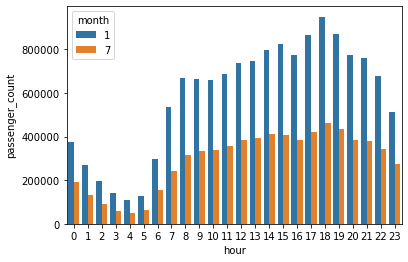

In [307]:
# c - reuven did not solve this but i think he should have meant using histogram meaning i should use sns.displot
# rather than sns.barplot which does not allow me to have in different plot which is below, in the following cell afterwards
# i used sns.displot to have separete plots

df_taxi ['hour'] = df_taxi['tpep_pickup_datetime'].dt.hour

sns.barplot(data = df_taxi.groupby(['month', 'hour'])['passenger_count'].count().reset_index(),
           x = 'hour',
           y = 'passenger_count',
           hue = 'month')
#             ,
#            col = 'month')


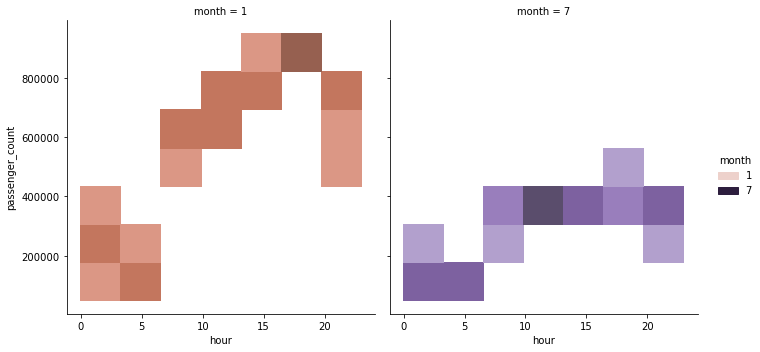

In [308]:
sns.displot(data = df_taxi.groupby(['month', 'hour'])['passenger_count'].count().reset_index(),
           x = 'hour',
           y = 'passenger_count',
           hue = 'month',
           col = 'month')

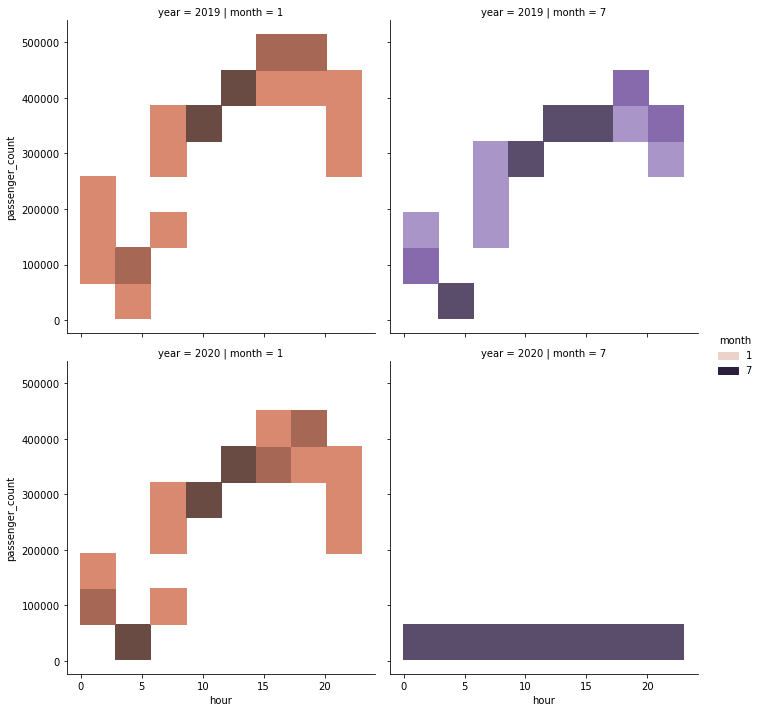

In [310]:
# i think the better would have been to also grouped by year

sns.displot(data = df_taxi.groupby(['year', 'month', 'hour'])['passenger_count'].count().reset_index(),
           x = 'hour',
           y = 'passenger_count',
           row = 'year',
           col = 'month',
           hue = 'month')

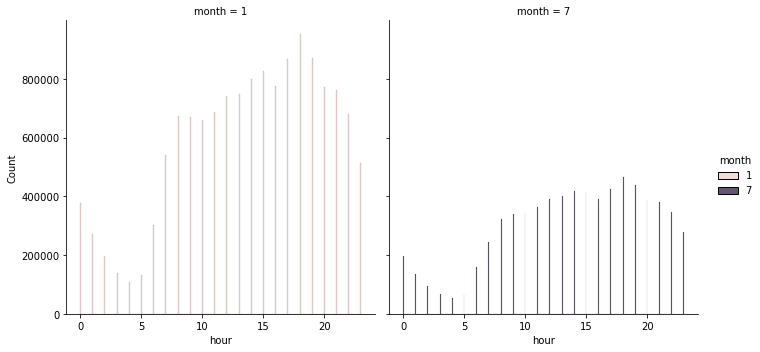

In [323]:
# i think this is the right answer:
sns.displot(data = df_taxi,
           x = 'hour',
           hue = 'month',
           col = 'month')

In [315]:
# d -- reuven did not solve this

df_taxi ['trip_length'] = pd.cut(df_taxi['trip_distance'],
                                bins = [df_taxi['trip_distance'].min()-1, 2, 10, df_taxi['trip_distance'].max()],
                                labels = ['short', 'medium', 'long'])
df_taxi

,tpep_pickup_datetime,passenger_count,trip_distance,total_amount,month,day,year,hour,trip_length
0,2019-01-01 00:46:40,1.0,1.50,9.95,1,1,2019,0,short
1,2019-01-01 00:59:47,1.0,2.60,16.30,1,1,2019,0,medium
7,2019-01-01 00:21:28,1.0,1.30,9.05,1,1,2019,0,short
8,2019-01-01 00:32:01,1.0,3.70,18.50,1,1,2019,0,medium
9,2019-01-01 00:57:32,2.0,2.10,13.00,1,1,2019,0,medium
...,...,...,...,...,...,...,...,...,...
800407,2020-07-19 13:27:52,NaN,24.23,83.50,7,19,2020,13,long
800408,2020-07-19 13:02:00,NaN,4.40,19.78,7,19,2020,13,medium
800409,2020-07-19 13:32:00,NaN,8.78,38.45,7,19,2020,13,medium
800410,2020-07-19 13:28:00,NaN,6.50,29.77,7,19,2020,13,medium


* d. Add a "trip_length" column, for short, medium, and long trips, as we did in Exercise 7. Show the trip distance per day of month in three plots alongside one another, with one for each category.

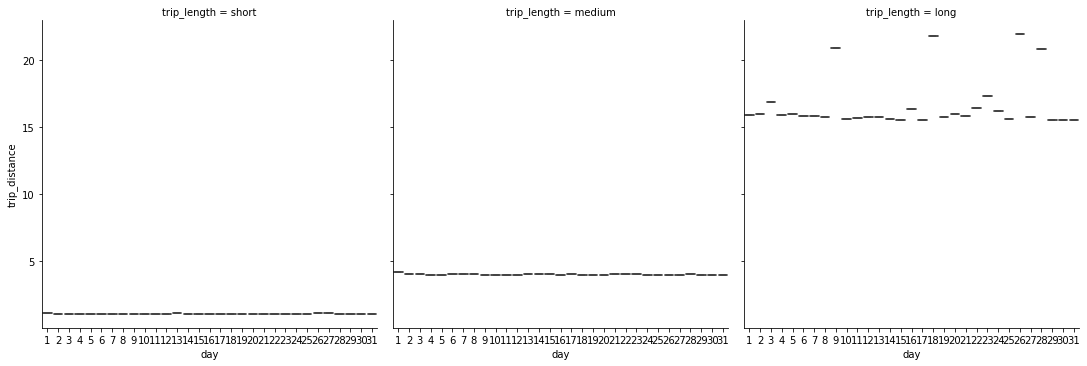

In [317]:

sns.catplot(data = df_taxi.groupby(['day', 'trip_length'])['trip_distance'].mean().reset_index(),
           x = 'day',
           y = 'trip_distance',
           kind = 'box',
           col = 'trip_length')

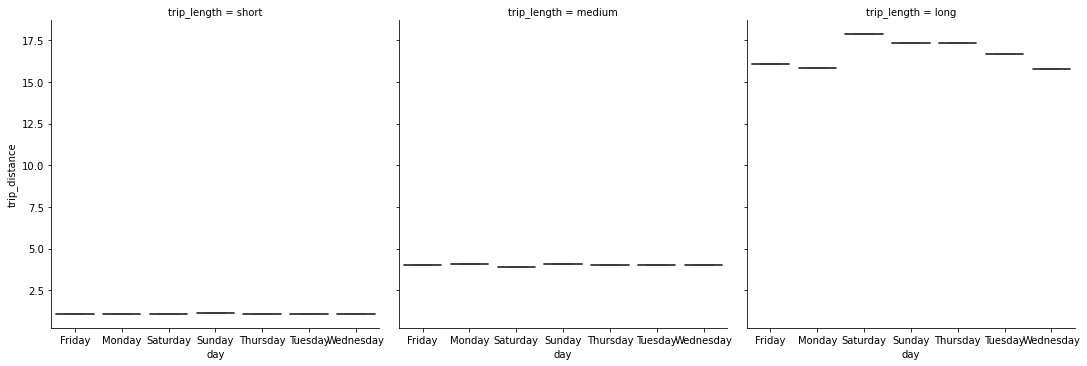

In [318]:
df_taxi['day'] = df_taxi['tpep_pickup_datetime'].dt.day_name()

sns.catplot(data = df_taxi.groupby(['day', 'trip_length'])['trip_distance'].mean().reset_index(),
           x = 'day',
           y = 'trip_distance',
           kind = 'box',
           col = 'trip_length')

# 11. Performance

**good to knows**

df.info()

The df.info method returns a summary of information about the data frame, including the total memory usage. By default, it **doesn’t do a "deep" memory check**; in such cases, and if there are **object columns**, the memory will be returned with a **+ sign following the number**. You can avoid the +, and get a precise calculation, by passing memory_usage='deep' as a keyword argument to info:

df.info(memory_usage = 'deep') : Get information about a data frame, including its memory usage

df.memory_usage(deep=True) : Get information about a data frame’s memory usage

df_olympic.memory_usage(deep = True).sum()

df['a'].astype('category') : convert into categorical data type 

df.to_feather('mydata.feather') : Write a data frame to feather format

df = pd.read_feather('mydata.feather') : Create a data frame, based on a feather-formatted file on disk

time.perf_counter() : Get the number of seconds, useful for timing programs

df.eval('v + 300'): Perform actions and queries on a data frame

%timeit 3+2 : Python module for benchmarking code speed, and a Jupyter "magic command" for invoking it

### Memory usage 

How much memory does this data set consume? That’s an important question when working with pandas, because all of our data needs to fit into memory. We can find out by running the memory_usage method on our data frame:

**df.memory_usage()**

This returns a series telling us how many bytes are consumed by each column. (The column names from df constitute the index of the returned series.) We can get the total memory usage by summing the values:

**df.memory_usage().sum()**

This number is completely **wrong**. That’s because pandas, **by default, ignores the size of any Python objects contained in our data frame**. Given that these objects are generally strings, and that they can be of any length, the difference between the actual memory usage and what is reported here can be quite big.

We can tell pandas to **include all of the objects in its size calculation by passing the deep=True keyword argument**:

**df.memory_usage(deep=True).sum()**

**I want to remind you that it’s important to always use deep=True if you truly want to know the size of your data frame.**

**point** How can I cut down the size of the data set, thus allowing me to potentially work with more data? We’ve already talked about several of them in past chapters:

* Limit which columns are imported, by passing a value to usecols

* Explicitly specify the dtype for each column, allowing you to choose types with fewer bits while simultaneously speeding up the loading of data

* (also the third strategy is to remove rows that you don't need through cleaning, mentioned in reuven's youtube video on memorry optimization)


## Saving Memory with categories

The majority of the memory is being used by **strings**. This means that we need to somehow reduce the size or number of the text strings in our data frame.

One way to do this is with a special pandas data type known as a **"category."** In the case of a category, **each distinct string value is stored a single time, and then referred to multiple times**. However, this replacement is completely transparent to us, as users of the data frame: **We can continue to pretend that the column contains strings, including use of the str accessor to apply string methods to every element of the column.**

We’ve often used **astype** to create a new series based on an existing one. We can do the same thing to create a new categorical column based on one containing text strings:


df['Games'].astype('category')

Which columns should we attack first? Well, we want those in which the same strings are often repeated. Consider this code:

**(df.count() / df.nunique()).sort_values(ascending=False)**

Here, we divide the number of non-null rows in each column by the number of distinct values in that column. The higher the number, the more times the same string is repeated, and thus the greater the memory savings we can achieve by switching the column to a category. I then used sort_values(ascending=false) to sort them in order of priority.

good point:  **df_olympic.nunique()** is a method call to find the number of unique values for each column in a pandas DataFrame df_olympic. The output will be a pandas Series object where the index is the column names and the values are the number of unique values for each column.

But wait a second: This method creates the category based on the data that’s **already** in the series. What if I know that the series might include other values in the future, even if they’re not in the orignal data set? Here’s a simple example:

we can achieve this by creating the category **before creating the series (or column of the data frame), including all of the possible values it might contain**. Then we can ask pandas not to create the category with astype, but rather to assign the specific category type that we’ve defined, with all of its values. we do this by:

my_defined_category = pd.CategoricalDtype(['Gold', 'Bronze', 'Silver'])

df_olympic ['Medal'] = df_olympic ['Medal'].astype(my_defined_category)

In the above code, we created a new category, with all of its values, by calling **pd.CategoricalDtype**. Then, **when we called astype, we passed the category that we had created, rather than asking pandas to create a new, anonymous category**.

Another potential benefit of creating this category type is that if we need the same category for multiple columns, we can save even more memory by sharing the category.

**point**. We would benefit most by first standardizing the spellings, and only after creating the category. The more times a string is repeated, the greater the benefit from using a category for that string. When we standardize the spellings, we reduce the number of different strings in a column, and increase the number of times it repeats -- thus strengthening the argument for using a category.

### APACHE ARROW

There’s no doubt that CSV files are convenient to work with. Not only does every programming language and data-analysis system knows how to read from and write to them, but they’re readable by people, too. Heck, we can even go in and edit CSV files by hand, when we need to. The same could be said for JSON, which has also become popular in the last few years. JSON can handle more complex data structures than CSV, but is still a **text-based format.**

The fact that CSV and JSON are human readable almost inherently makes them less efficient for computers: They take up more space on disk than binary formats, and also take longer to read and write. A number of binary formats exist, but none has pushed out the others as a standard.

Fortunately, we have an increasingly viable **binary option—Apache Arrow**, along with its **file format, known as Feather.** Apache Arrow is meant to be a new backend in-memory storage system not just for pandas, but also for other data-analysis libraries and languages, including the popular R language and the **Spark distributed library**. Arrow is designed to handle the data types, and data-storage needs, associated with data analysis. It can handle the data types that we’re used to, from integers and floats to strings and dictionaries. It can even handle categories, of the sort that we saw in Exercise 48. It uses a number of tricks to use less memory than the standard NumPy back end.

Beyond the work being done to make Apache Arrow a fast and useful in-memory database, there is also an on-disk serialization format for that database, known as "feather." Feather files take advantage of the data types in Arrow, along with compression and binary storage. **They are thus smaller in size, and faster to both read and write, than either CSV or JSON.**

To **write a pandas data frame to a feather-formatted file**, you can use the **to_feather method**, which works similarly to to_csv and to_json:

**df.to_feather('mydata.feather')**

You can similarly read from a feather-formatted file into a data frame using the **pd.from_feather method**, which works similarly to from_csv and from_json:

**df = pd.from_feather('mydata.feather')**

**i think i will use pd.read_feather() since i am used to pd.read_csv() and pd.read_json()**

Because pandas can read from and write to feather files faster than CSV or JSON, your projects would likely benefit from turning files from CSV and JSON into feather at the first opportunity. The larger the data set, the greater the benefit you’ll have from working in this way.

Feather provides another potential way to speed up your work in pandas, **even if you don’t use Arrow or the feather format directly**: When **reading from a CSV file, you can traditionally choose from two different parsing engines, one written in Python and the other written in C**. The Python engine is more flexible and offers more features, but it **slower than the C-language parser**. By **default, pandas tries to use the C parser**, unless you specify an option that it cannot handle, in which case it switches to Python. You can explicitly specify the engine you want when reading the CSV file:

**df = pd.read_csv('mydata.csv', engine='python')**

While it is still considered experimental as of this writing, you can now pass a third value to the engine keyword argument, namely the string **'pyarrow'**. If you do that, then pandas will use the Arrow architecture and library to read the CSV file, potentially speeding up its reading into memory. If you find that the data is loading slowly, you might want to try this option. In my experience, this can significantly improve the rate at which CSV data is read into a data frame.

Over the coming years, I expect that the Arrow backend, as well as the feather format, will become increasingly common among users of pandas and other open-source data analysis tools. CSV and JSON aren’t going away, but as data sets grow in size, feather’s faster speed and cross-platform compatibility will become more dominant, and should assume a greater role in your arsenal.

### keep track of time

We’ll need some way to keep track of time. Python’s time module, part of the standard library, provides a number of different methods that could theoretically be used, but it’s generally considered best to use **time.perf_counter()**. This function uses the highest-resolution clock available, and returns a float indicating a number of seconds. The number returned by perf_counter should not be relied upon for calculating the current date and time—but if used within the same program, it can be used to measure the passage of time, which is precisely what we’ll want to do. The reference point of the returned value is **undefined**, so that **only the difference between the results of two calls is valid.**

Python’s standard library also includes the timeit module (http://docs.python.org/3/library/timeit.html?#module-timeit), which includes a number of utilities for benchmarking. I decided not to use timeit, in no small part because that module runs code several times. Each of our runs will take long enough that this didn’t seem like a good fit. But timeit is a good tool to know about for benchmarking your code, and we’ll use it in Exercise 50.


**%timeit**

Python provides the timeit module, which you can use in standard programs, but Jupyter provides a special **%timeit magic method that can be used inline, inside of Jupyter cells**. You can say:

%timeit myfunc(2, 3, 4)

In this example, timeit will run myfunc(2,3,4) **a number of times, reporting the mean execution time along with the variation that it detected**. Just how many loops timeit runs is determined by the code speed; something that takes a fraction of a second might run hundreds or even thousands of times, whereas something that takes more than a few seconds might be run only a handful of times. another example si as follows: 

%timeit df_ticket.loc[df_ticket.eval("state == 'NY' & color == 'WHITE' & feet > 1 & make == 'TOYOT' & ptype == 'PAS'")]

When using the **%timeit magic command in Jupyter, don’t forget:**

    -- Your code must be written on a single line, just after the %timeit magic command. If you have more than one line, then wrap it into a function, and invoke that function.
    -- If you’re timing a function, don’t forget to put () after the function’s name.


### Speeding things up with eval and query

Over the course of this book, I’ve emphasized a number of techniques that you should use to speed up your pandas performance:

        Never use standard Python iterations (for loops and comprehensions) on a series or data frame
        Take advantage of broadcasting
        Use the str accessor for anything string related
        Use the smallest dtype you can, without sacrificing accuracy
        Avoid double square brackets when setting and retrieving values
        Load only those columns that you really need for your analysis
        Columns with repeated values should be turned into categories
        Use a binary format, such as feather, for data you’ll repeatedly save or load

Even after using all of these techniques, you might find that your queries are still running slowly, or using lots of memory. This often occurs when performing an arithmetic operation on two columns, each of which contains many rows. A related problem is when you’re broadcasting an operation on a scalar and a series. While pandas takes advantage of the high-speed calculations in NumPy, much of the work is still being done within the Python language, which is slower to execute than C.

Another problem occurs when you’re creating a boolean series, for use as a mask index, based on several conditions. It’s certainly convenient to use & and | to combine your conditions with logical "and" and "or", but **behind the scenes, pandas has to create multiple boolean series, which are then combined**. If you have 1 million rows in your original column, then combining three conditions will end up creating at least 3 million rows in temporary series, before combining and applying them together.

We can avoid these problems, as well as make our queries more readable, using the **query method** that I introduced back in chapter 2, as well as two versions of the more general eval method. These **reduce the memory needed in queries using | and &**, and can often execute expressions in a **library known as numexpr** (i don't need to do anything like pip installing this library and it just worked fine). The combination of reduced memory and increased speed can sometimes give dramatically faster results, while also using fewer resources.

However, it’s important to understand that these methods are not **cure-alls for your performance problems**:

        Using them on small data frames, with fewer than 10,000 rows, will often result in slower performance, not in faster performance.
        Often, the bottleneck in your performance is in assignment or retrieval of elements, not in the calculation. Which means that there won’t be a speed boost in such cases.
        You’ll need to install the numexpr package from PyPI, and then explicitly tell pandas to use it. If you don’t make this explicit, then pandas will use its default Python-based engine for parsing the query string, resulting in no speedup (but in the exercise reuven did not bring this up and just showed us how faster our queries would be using query and eval and I managed to finish all the exercises without needing to pip install numexpr!).
        Anything which doesn’t involve calculations, comparisons, and boolean operators will either raise an exception or run at the standard (non-enhanced) speed.
Let’s start by looking at the query for data frames. We’ll then talk about two versions of eval, which are part of the same family.

Given a data frame df, the method df.query allows you to describe which rows you want to get back from df. The description is passed as an SQL-like string in which the columns can be named as if they were variables. The result of the query will be a data frame, a subset of df, with **all of the columns from df and those rows for which the comparison returned a True value** (so i think i don't have an option of selecting columns using query mehtod). for example:

df.loc[((df['a'] > 100) & (df['b'] < 700))] 

df.query('a > 100 & b < 700')

The version using query might run faster. But in almost all cases, **it’ll use less memory**, because it won’t have to create two separate, temporary boolean series: One for a > 100 and another for b < 700. We might not see these boolean series when running a traditional query, but they’re there, and can use a great deal of memory without you realizing it.

I should add that some people prefer to use df.query for all of their pandas work, because of its readability and reduced memory use (but reuven made a comment in the end that this is not a great idea b/c query method does not allow to select columns)

A related data frame method is **df.eval**, which allows us not only to retrieve from a data frame (as in df.query), but also to perform **other actions, including broadcasting and assigning**. For example:

df.eval('(a + b) * 3')

The above code adds columns a and b together, then multiplies the new series by 3, via broadcasting. The returned value is a series. What if we were to pass the same code as we used before, with df.query?

df.eval('a > 100 & b < 700')

The above returns a boolean series. **Whereas df.query applies that boolean series to df, df.eval returns the boolean series itself**, and allows us to apply it if and when we want to do so.We can even add a new column (or update an existing one) by assigning to a column name:

df.eval('f = d + e - c')

Using a triple-quoted string, you can perform multiple assignments (not conditions) df.eval:

df.eval('''

f = d + e - c

g = a * 2

h = a * b

''')

The third, and final method that allows you to use less memory, speed up computation, and write more readable queries is **pd.eval** (in the exercises i did not need to use it and just used df.eval). Notice that this is a top-level function in the pd namespace, rather than a method we run on a specific data frame. We can use pd.eval instead of df.eval, although we’ll need to explicitly state the name of the data frame we’re working on. For example, we can say:

pd.eval('df[df.a > 100 & df.b < 700]')

Notice that when using pd.eval, **you’ll almost certainly need to use the dot syntax with columns, rather than the square-bracket syntax** that I have generally used in this book—so to retrieve column a from data frame df, you’ll need to say df.a, rather than df['a']. As a result, this also means that your column names cannot contain spaces in them.

The above code will return all of the rows of df in which a is greater than 100 and b is less than 700, as before. However, we have written the query as a string, which is passed to numexpr. That package will, as we’ve seen, use less memory and (usually) result in better performance. Note that a call to df.eval is translated into a call to pd.eval, which means that you can probably get better performance if you just call pd.eval. **That said, the convenience of the syntax in df.eval is hard to beat** (that should be why in the exercises we used df.eval rather than pd.eval).

As with df.eval, you can assign to one or more columns in the string you pass to pd.eval. But because we’re invoking pd.eval, the data frame on which the assignment should take place isn’t known to the system. You must set it by passing the **target keyword argument**. The assignment is reflected in the data frame that is returned:

pd.eval('f = df.d + df.e - df.c', target=df)

So, when should you use each of these? Again, the biggest wins are likely to be with compound queries (using & and |), on large data frames. The larger the data frame and the more complex the query, the bigger the speed boost that you might see—but even if you don’t, you’ll almost certainly be using less memory.

Meanwhile, here’s a quick recap on each of these three functions:

* To retrieve selected rows from a data frame, use df.query

* To assign multiple columns, or to perform either queries or assignments on a data frame, use df.eval.

* To work on multiple data frames, use pd.eval. It doesn’t handle multiline assignments, and the syntax makes it a bit uglier, though.

From the comparisons we made, we see that optimiziation of queries is rarely a matter of always using one particular technique. It requires a bit of thinking about what you’re doing, considering what pandas is doing behind the scenes, and then performing some tests to check your assumptions. That said, we can conclude at least two things from these queries: **First, that if you’re combining queries with | or &, you’ll likely get a decent improvement by using query rather than loc, thanks to the speedups provided by numexpr. Second, using isin will almost always be faster than combining multiple queries, because we’re making a single comparison per row, rather than more.**

point:

it would seem that selecting via df.loc and a mask index will have better performance, faster execution time, than just df and a mask index—something that I’ve seen elsewhere, too. here is what i mean:

%timeit df[df.eval('state == "NY"')] >> 758 ms

compared to

%timeit df.loc[df.eval('state == "NY"')] >> 729 ms


**Is it always worth using df.query or df.eval instead of .loc?**

I know that there are pandas users who would say "yes," given that even in the simplest of cases, we saw a speedup. And in the most complex cases, the speedup was quite dramatic. So you could argue that since it doesn’t matter much for simple queries on a short data set, but it matters a lot for complex queries on large ones, you should always use these techniques.

However, focusing on speed before you’ve really thought hard about the problem, and where the bottlenecks are, can be misleading. Remember that df.query returns all of the columns from a data frame—so if your data frame contains more columns than you’ll want to get back, it might end up using lots of memory unnecessarily. By contrast, df.loc provides you not only with a row selector, but also with a **column selector**, for more flexibility. **I thus tend to use df.loc for my queries while I’m still putting them together. When I’m done, I can then experiment with these techniques to see how to reduce memory and speed things up.**

**point**

In df.query, we can use the words **and** and **or**, rather than the **symbols & and |**, thanks to the **numexpr library**. After rewriting the queries in exercise 50b using these words instead of symbols i observed improvement in the speed!


In [353]:
# some simple practice

df_olympic = pd.read_csv(directory + 'olympic_athlete_events.csv')
df_olympic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [354]:
df_olympic.memory_usage()

Index         128
ID        2168928
Name      2168928
Sex       2168928
Age       2168928
Height    2168928
Weight    2168928
Team      2168928
NOC       2168928
Games     2168928
Year      2168928
Season    2168928
City      2168928
Sport     2168928
Event     2168928
Medal     2168928
dtype: int64

In [355]:
df_olympic.memory_usage().sum()

# On my computer, this comes up as 32,534,048 bytes, or just over 32 MB of RAM.

32534048

In [356]:
df_olympic.memory_usage(deep = True).sum()

186408012

In [357]:
df_olympic['Games'] = df_olympic['Games'].astype('category')
df_olympic.memory_usage(deep = True).sum()

168248812

In [360]:
df_olympic.nunique()

ID        135571
Name      134732
Sex            2
Age           74
Height        95
Weight       220
Team        1184
NOC          230
Games         51
Year          35
Season         2
City          42
Sport         66
Event        765
Medal          3
dtype: int64

In [362]:
df_olympic.count()

ID        271116
Name      271116
Sex       271116
Age       261642
Height    210945
Weight    208241
Team      271116
NOC       271116
Games     271116
Year      271116
Season    271116
City      271116
Sport     271116
Event     271116
Medal      39783
dtype: int64

In [363]:
(df_olympic.count() / df_olympic.nunique()).sort_values(ascending=False)

Sex       135558.000000
Season    135558.000000
Medal      13261.000000
Year        7746.171429
City        6455.142857
Games       5316.000000
Sport       4107.818182
Age         3535.702703
Height      2220.473684
NOC         1178.765217
Weight       946.550000
Event        354.400000
Team         228.983108
Name           2.012261
ID             1.999808
dtype: float64

In [364]:
for column_name in ['Sex', 'Season', 'Medal', 'City', 'Games', 'Sport', 'NOC', 'Event', 'Team']:
    print(column_name)
    df_olympic[column_name] = df_olympic[column_name].astype('category')
df_olympic.memory_usage(deep = True).sum()

Sex
Season
Medal
City
Games
Sport
NOC
Event
Team


35034846

In [373]:
abcd_category = pd.CategoricalDtype(['a', 'b', 'c', 'd'])
s = pd.Series(['a', 'b', 'c', 'a', 'b', 'c', 'c', 'c']).astype(abcd_category)

s.loc[7] = 'd'
s

0    a
1    b
2    c
3    a
4    b
5    c
6    c
7    d
dtype: category
Categories (4, object): ['a', 'b', 'c', 'd']

In [372]:
df_olympic['Medal'].unique()

[NaN, 'Gold', 'Bronze', 'Silver']
Categories (3, object): ['Bronze', 'Gold', 'Silver']

**11.2 Exercise 48: Categories**

* a. Read the NYC parking violations data into a data frame. Only load the following columns:'Plate ID', 'Registration State', 'Vehicle Make', 'Vehicle Color', 'Vehicle Make', Violation Time', 'Street Name', and 'Violation Legal Code'.
* b. How much memory is being used by the data frame you’ve created?
* c. Turn each column into a category.
* d. What types are your columns now?
* e. How much memory does your data consume now?
* f. How much memory have you saved thanks to using categories?


In [374]:
# a

cols = ['Plate ID', 'Registration State', 'Vehicle Make', 'Vehicle Color', 
        'Vehicle Make', 'Violation Time', 'Street Name', 'Violation Legal Code']
df_ticket = pd.read_csv(directory + 'nyc-parking-violations-2020.csv',
                       usecols = cols)
df_ticket.shape

<ipython-input-374-a80096883a45>:5: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ticket = pd.read_csv(directory + 'nyc-parking-violations-2020.csv',


(12495734, 7)

In [375]:
#b
df_ticket.memory_usage(deep = True).sum()

5208759199

In [376]:
# c
df_ticket.nunique()

Plate ID                3245467
Registration State           68
Vehicle Make               5210
Violation Time             1828
Street Name               57757
Violation Legal Code          2
Vehicle Color              1896
dtype: int64

In [377]:
df_ticket.dtypes

Plate ID                object
Registration State      object
Vehicle Make            object
Violation Time          object
Street Name             object
Violation Legal Code    object
Vehicle Color           object
dtype: object

In [378]:
df_ticket.head()

,Plate ID,Registration State,Vehicle Make,Violation Time,Street Name,Violation Legal Code,Vehicle Color
0,J58JKX,NJ,HONDA,0523P,43 ST,NaN,BK
1,KRE6058,PA,ME/BE,0428P,UNION ST,NaN,BLK
2,444326R,NJ,LEXUS,0625A,CLERMONT AVENUE,NaN,BLACK
3,F728330,OH,CHEVR,1106A,DIVISION AVE,NaN,NaN
4,FMY9090,NY,JEEP,1253A,GRAND ST,NaN,GREY


In [380]:
df_ticket = df_ticket.astype('category')
df_ticket.head()


,Plate ID,Registration State,Vehicle Make,Violation Time,Street Name,Violation Legal Code,Vehicle Color
0,J58JKX,NJ,HONDA,0523P,43 ST,NaN,BK
1,KRE6058,PA,ME/BE,0428P,UNION ST,NaN,BLK
2,444326R,NJ,LEXUS,0625A,CLERMONT AVENUE,NaN,BLACK
3,F728330,OH,CHEVR,1106A,DIVISION AVE,NaN,NaN
4,FMY9090,NY,JEEP,1253A,GRAND ST,NaN,GREY


reuven's approach to solve c

he used a for loop like

for one_colname in df.columns:

    print(f'Categorizing {one_colname}...')
    
    df[one_colname] = df[one_colname].astype('category')
    
    print('\tDone.')

and so i asked chatGPT "what if i want to convert all of the columns of a df into category at once in one line of code can i do df = df.astype('category'): and here is his answer
    
Yes, you can convert all the columns of a pandas DataFrame to the category data type in one line of code using df = df.astype('category'). This will convert all columns of the DataFrame df to the category data type.



In [381]:
# d
df_ticket.dtypes

Plate ID                category
Registration State      category
Vehicle Make            category
Violation Time          category
Street Name             category
Violation Legal Code    category
Vehicle Color           category
dtype: object

In [382]:
# e

df_ticket.memory_usage(deep = True).sum()

549299660

In [384]:
# f -- around 90% memory was saved!

549299660 / 5208759199 *100

10.545691190820587

In [385]:
df_ticket.info(memory_usage = 'deep') 
# for some reason this is not exactly the same as df_ticket.memory_usage(deep = True).sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12495734 entries, 0 to 12495733
Data columns (total 7 columns):
 #   Column                Dtype   
---  ------                -----   
 0   Plate ID              category
 1   Registration State    category
 2   Vehicle Make          category
 3   Violation Time        category
 4   Street Name           category
 5   Violation Legal Code  category
 6   Vehicle Color         category
dtypes: category(7)
memory usage: 523.9 MB


In [386]:
print (f"my progress is {296/335*100} %")

my progress is 88.35820895522389 %


**11.2.3 Beyond the exercise**

* a. Without calculating: Of the columns we loaded, which would make less sense to turn into categories? Once you’ve thought about it, calculate how many repeated values there are in each column, and determine (more formally) which would give the biggest ROI in using categories.
* b. In Exercise 25, we saw that the vehicle makes and colors were far from standardized, with numerous misspellings and variations. If we were to standardize the spellings before creating categories, would that make any effect on the memory savings we gain from categorization? Why or why not?
* c. Read only the first 10,000 lines from the CSV file, but all columns. Show the 10 columns that will most likely benefit greatest from using categories?

In [387]:
df_ticket.columns

# my response: Plate ID and Violation Time make less sense to be turned into categories

# reuvens'note
# Columns with repeated values make more sense. Thus, registration state, body type, vehicle make, 
# street name, and vehicle color would all seem to be good candidates. However, plate ID wouldn't 
# make sense, unless the same cars received a very large number of tickets.

Index(['Plate ID', 'Registration State', 'Vehicle Make', 'Violation Time',
       'Street Name', 'Violation Legal Code', 'Vehicle Color'],
      dtype='object')

In [389]:
df_ticket.head()

,Plate ID,Registration State,Vehicle Make,Violation Time,Street Name,Violation Legal Code,Vehicle Color
0,J58JKX,NJ,HONDA,0523P,43 ST,NaN,BK
1,KRE6058,PA,ME/BE,0428P,UNION ST,NaN,BLK
2,444326R,NJ,LEXUS,0625A,CLERMONT AVENUE,NaN,BLACK
3,F728330,OH,CHEVR,1106A,DIVISION AVE,NaN,NaN
4,FMY9090,NY,JEEP,1253A,GRAND ST,NaN,GREY


In [391]:
(df_ticket.count() / df_ticket.nunique()).sort_values(ascending = False)

Violation Legal Code    2.226554e+06
Registration State      1.837608e+05
Violation Time          6.835589e+03
Vehicle Color           6.383835e+03
Vehicle Make            2.386433e+03
Street Name             2.163256e+02
Plate ID                3.850149e+00
dtype: float64

In [396]:
# b
cols = ['Plate ID', 'Registration State', 'Vehicle Make', 'Vehicle Color', 
        'Vehicle Make', 'Violation Time', 'Street Name', 'Violation Legal Code']
df_ticket = pd.read_csv(directory + 'nyc-parking-violations-2020.csv',
                       usecols = cols)
df_ticket.dtypes

<ipython-input-396-058977d85fb0>:3: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ticket = pd.read_csv(directory + 'nyc-parking-violations-2020.csv',


Plate ID                object
Registration State      object
Vehicle Make            object
Violation Time          object
Street Name             object
Violation Legal Code    object
Vehicle Color           object
dtype: object

In [398]:
df_ticket.memory_usage(deep = True).sum()

5208759199

In [397]:
df_ticket['Vehicle Color'].unique()

array(['BK', 'BLK', 'BLACK', ..., 'WHGY8', 'ORYW', 'CH'], dtype=object)

In [393]:
white = ['WH', 'WHITE', 'WHT', 'WT', 'WT.', 'WHI']
gray = ['GY', 'GREY', 'GR', 'GRY', 'GRAY']
black = ['BK', 'BL', 'BLACK', 'BLK', 'BK.']
blue = ['BL', 'BLUE']
red = ['RD', 'RED'] 
brown = ['BROWN', 'BR']
green = ['GR', 'GREEN']
yellow = ['YW', 'YELLO']

white_dic = {}
for w in white:
    white_dic[w] = 'white'
white_dic

gray_dic = {} 
for g in gray:
    gray_dic [g] = 'gray'

black_dic = {} 
for b in black:
    black_dic [b] = 'black'
    
blue_dic = {} 
for b in blue:
    blue_dic [b] = 'blue'
    
red_dic = {} 
for r in red:
    red_dic [r] = 'red'
    
brown_dic = {} 
for b in brown:
    brown_dic [b] = 'brown'
    
green_dic = {} 
for g in green:
    green_dic [g] = 'green'
    
yellow_dic = {} 
for y in yellow:
    yellow_dic [y] = 'yello'

In [394]:

col_dic = {**white_dic, **gray_dic, **black_dic, **blue_dic, **red_dic, **brown_dic, **green_dic, **yellow_dic}
col_dic



{'WH': 'white',
 'WHITE': 'white',
 'WHT': 'white',
 'WT': 'white',
 'WT.': 'white',
 'WHI': 'white',
 'GY': 'gray',
 'GREY': 'gray',
 'GR': 'green',
 'GRY': 'gray',
 'GRAY': 'gray',
 'BK': 'black',
 'BL': 'blue',
 'BLACK': 'black',
 'BLK': 'black',
 'BK.': 'black',
 'BLUE': 'blue',
 'RD': 'red',
 'RED': 'red',
 'BROWN': 'brown',
 'BR': 'brown',
 'GREEN': 'green',
 'YW': 'yello',
 'YELLO': 'yello'}

In [399]:
df_ticket['Vehicle Color'] = df_ticket['Vehicle Color'].replace(col_dic)
df_ticket.memory_usage(deep = True).sum()
# here we see that the memory useage is even increased compared to the original df with 5_208_759_199
# i think the reason is b/c most of the misspellings were short and after cleaning were replaced with
# full names which are longer taking up more memory. 


5230334934

In [401]:
df_ticket = df_ticket.astype('category')
df_ticket.memory_usage(deep= True).sum()

# compared to the previous results, before cleaning after turning into categorial, there is a bit of memory
# saving, b/c previously the memory usegae was 549_299_660 which is a bit higher than 549_298_708 i got here 
# after turning into categorical data type applied to the cleaned 'Vehicle Color' column 

549298708

In [402]:
df_ticket_new = pd.read_csv(directory + 'nyc-parking-violations-2020.csv',
                           nrows = 10_000)
df_ticket_new.shape

(10000, 43)

In [408]:
(df_ticket_new.count() / df_ticket_new.nunique()).sort_values(ascending = False).head(10)

Violation Description                5615.000000
Violation Legal Code                 5615.000000
Law Section                          3333.333333
Unregistered Vehicle?                2169.000000
Violation County                     1086.333333
Issuing Agency                        909.090909
Feet From Curb                        833.333333
Violation In Front Of Or Opposite     796.800000
Date First Observed                   400.000000
Plate Type                            344.827586
dtype: float64

In [406]:
df_ticket_new.head()

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation
0,1477633194,J58JKX,NJ,PAS,05/08/1972 12:00:00 AM,16,SDN,HONDA,P,8730,...,BK,0.0,0,-,0,NaN,NaN,NaN,NaN,NaN
1,1449715424,KRE6058,PA,PAS,08/29/1977 12:00:00 AM,98,SUBN,ME/BE,P,86530,...,BLK,0.0,0,-,0,NaN,NaN,NaN,NaN,NaN
2,1455779155,444326R,NJ,PAS,10/03/1988 12:00:00 AM,20,SDN,LEXUS,P,27030,...,BLACK,0.0,0,-,0,NaN,NaN,NaN,NaN,NaN
3,1458800908,F728330,OH,PAS,01/03/1990 12:00:00 AM,21,SDN,CHEVR,P,33030,...,NaN,0.0,0,-,0,NaN,NaN,NaN,NaN,NaN
4,1466038676,FMY9090,NY,PAS,02/14/1990 12:00:00 AM,21,SUBN,JEEP,S,45130,...,GREY,0.0,2015,-,0,NaN,NaN,NaN,NaN,NaN


In [2]:
import pandas as pd
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers.readers:

read_csv(filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]', *, sep: 'str | None | lib.NoDefault' = <no_default>, delimiter: 'str | None | lib.NoDefault' = None, header: "int | Sequence[int] | None | Literal['infer']" = 'infer', names: 'Sequence[Hashable] | None | lib.NoDefault' = <no_default>, index_col: 'IndexLabel | Literal[False] | None' = None, usecols=None, squeeze: 'bool | None' = None, prefix: 'str | lib.NoDefault' = <no_default>, mangle_dupe_cols: 'bool' = True, dtype: 'DtypeArg | None' = None, engine: 'CSVEngine | None' = None, converters=None, true_values=None, false_values=None, skipinitialspace: 'bool' = False, skiprows=None, skipfooter: 'int' = 0, nrows: 'int | None' = None, na_values=None, keep_default_na: 'bool' = True, na_filter: 'bool' = True, verbose: 'bool' = False, skip_blank_lines: 'bool' = True, parse_dates=None, infer_datetime_format: 'bool' = False, keep_date_col: 'bool' = F

**11.3 Exercise 49: How much faster?**

* a. Load the New York parking data CSV file into a data frame.
* b. Write that data frame out to the filesystem, in each of three different formats—CSV, JSON, and feather. Time the writing of each format, and print the format along with the number of seconds it took to write to it.
* c. How big are the files you’ve created?
* d. Then, go through each file you just created, reading it into a data frame. Once again, time how long the loading takes, and print that timing alongside the format name.

In [19]:
# a
directory  ='D:/0_Machine_Learning/Software -- ML Journey/Pandas Workout book/pandas-workout-data/data/'

df = pd.read_csv(directory + 'nyc-parking-violations-2020.csv', low_memory=False)

In [23]:
# b
import time

start_time = time.perf_counter()

df.to_csv('nyc_parking_csv.csv')

end_time = time.perf_counter()

print(f"time taken to write as csv file is {end_time - start_time:.2f}")

time taken to write as csv file is 127.65


In [39]:
# practice DRY rules and so:

In [48]:
my_dic = {'csv' : df.to_csv, 'json': df.to_json, 'feather': df.to_feather} 

for file_type in my_dic:
    
    start_time = time.perf_counter()
    
    my_dic[file_type] (f'nyc_parking.{file_type.lower()}')
    
    end_time = time.perf_counter()
    
    time_total = end_time - start_time
    
    print(f"time taken to write {file_type} file is {time_total}")

time taken to write csv file is 118.66195030000017
time taken to write json file is 128.73362710000038
time taken to write feather file is 23.099445199999536


In [ ]:
# reuven's solution to b 

root = 'parking-violations'
write_methods = {'JSON': df.to_json,
           'CSV': df.to_csv,
           'feather': df.to_feather
          }

for one_format, method in write_methods.items():
    print(f'Saving in {one_format}')
    start_time = time.perf_counter()
    write_methods[one_format](f'parking-violations.{one_format.lower()}')
    end_time = time.perf_counter()

    total_time = end_time - start_time
    print(f'\tWriting {one_format}: {total_time=}')

reuven's not on his solution to c:

Inside of the f-string, I used two tricks to adjust the way in which the values were formatted:

    -- I told the f-string to pad one_filename with spaces, such that each filename would use 27 characters. This helped to ensure that the results would line up.
    -- I told the f-string to add commas before every three digits in the integer it was displaying, thus making them more readable.

In [53]:
# reuven's solution to c
import glob
import os

root = 'nyc_parking'

for one_filename in glob.glob(f'{root}*'):
    print(f'{one_filename:27}: {os.stat(one_filename).st_size:,}')



nyc_parking.csv            : 2,453,355,916
nyc_parking.feather        : 1,466,536,058
nyc_parking.json           : 8,820,247,015


In [2]:
# d
import pandas as pd
import time
root = 'nyc_parking'

read_methods = {'csv': pd.read_csv, 'feather': pd.read_feather} # i got memory error to read 'json' : pd.read_json, 

for file_format in read_methods:
    
    print (f" reading file {file_format}")
    
    start_time = time.perf_counter()
    
    df = read_methods[file_format] (root + '.'+ file_format)
    
    end_time = time.perf_counter()
    
    total_time = end_time - start_time
    
    print (f"time taken to read {file_format} file is {total_time}")
    

 reading file csv


<ipython-input-2-0091f42ffa84>:14: DtypeWarning: Columns (19,30,39,40) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_methods[file_format] (root + '.'+ file_format)


time taken to read csv file is 70.52489760000003
 reading file feather
time taken to read feather file is 23.827013000000022


In [62]:
# reuven solution to d 

read_methods = {'JSON': 'read_json',
           'CSV': 'read_csv',
           'feather': 'read_feather' }

for one_format, method in read_methods.items():
    print(f'Reading from {one_format}')
    start_time = time.perf_counter()
    df = read_methods[one_format](
        f'parking-violations.{one_format.lower()}')
    end_time = time.perf_counter()

    total_time = end_time - start_time
    print(f'\tReading {one_format}: {total_time=}')

nyc_parking.csv
nyc_parking.json
nyc_parking.feather


reuven's note

From this simple demonstration, it seems pretty clear that Apache Arrow, and its feather format, are significantly faster for reading and writing than both CSV and JSON. Which doesn’t mean that you can or should move everything to feather—but that it has a number of clear advantages, both in terms of speed and in its footprint on the filesystem.



**11.3.3 Beyond the exercise**

* a. If we read the CSV file using the "pyarrow" engine, do we see any speedup? That is, can we read CSV files into memory any faster if we use a different engine?
* b. If we specify the dtypes to read_csv, does it take more time, or less, than without doing so?
* c. How much memory does our data frame take in as a pandas data frame? How much memory does it require as an Arrow table?

In [4]:
# a

starter = time.perf_counter()

df = pd.read_csv('nyc_parking.csv', engine = 'pyarrow')

end = time.perf_counter()
total_time = end - starter
print(f"time took to read csv file using pyarrow engine is {total_time}")

time took to read csv file using pyarrow engine is 34.10977020000007


In [5]:
# yes indeed the time was read twice faster: previously it took 70.52489760000003 and using pyarrow engine it took 34.11 sec!

In [6]:
df.dtypes

                                       int64
Summons Number                         int64
Plate ID                              object
Registration State                    object
Plate Type                            object
Issue Date                            object
Violation Code                         int64
Vehicle Body Type                     object
Vehicle Make                          object
Issuing Agency                        object
Street Code1                           int64
Street Code2                           int64
Street Code3                           int64
Vehicle Expiration Date                int64
Violation Location                   float64
Violation Precinct                     int64
Issuer Precinct                        int64
Issuer Code                            int64
Issuer Command                        object
Issuer Squad                          object
Violation Time                        object
Time First Observed                   object
Violation 

In [9]:
# b reuven's solution 

starter = time.perf_counter()

df = pd.read_csv('nyc_parking.csv', dtype=dict(df.dtypes)) # i got memory error with and without  low_memory=False,

end = time.perf_counter()
total_time = end - starter
print(f"time took to read csv file using pyarrow engine is {total_time}")

MemoryError: Unable to allocate 1.30 GiB for an array with shape (14, 12495734) and data type int64

In [7]:
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers.readers:

read_csv(filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]', *, sep: 'str | None | lib.NoDefault' = <no_default>, delimiter: 'str | None | lib.NoDefault' = None, header: "int | Sequence[int] | None | Literal['infer']" = 'infer', names: 'Sequence[Hashable] | None | lib.NoDefault' = <no_default>, index_col: 'IndexLabel | Literal[False] | None' = None, usecols=None, squeeze: 'bool | None' = None, prefix: 'str | lib.NoDefault' = <no_default>, mangle_dupe_cols: 'bool' = True, dtype: 'DtypeArg | None' = None, engine: 'CSVEngine | None' = None, converters=None, true_values=None, false_values=None, skipinitialspace: 'bool' = False, skiprows=None, skipfooter: 'int' = 0, nrows: 'int | None' = None, na_values=None, keep_default_na: 'bool' = True, na_filter: 'bool' = True, verbose: 'bool' = False, skip_blank_lines: 'bool' = True, parse_dates=None, infer_datetime_format: 'bool' = False, keep_date_col: 'bool' = F

In [11]:
# reuven's solution to c

# Pandas table
n = df.memory_usage(deep=True).sum()
print(f'{n:,}')

21,708,177,149


In [12]:
# Arrow table
import pyarrow.feather as feather
read_arrow = feather.read_table('nyc_parking.feather')

n = read_arrow.nbytes
print(f'{n:,}')

4,309,680,899


In [1]:
print("my progress is {:.2f} %".format(303/335*100))

my progress is 90.45 %


**11.4 Exercise 50: query and eval**

In this exercise, we’ll look through New York parking tickets one final time, running queries using the traditional df.loc accessor, and then also using df.query and df.eval. For each of these questions, I’d like you to run the query via timeit, allowing us to compare the executing time needed for the various types of queries. Specifically, I’d like you to:

* a. Load the New York parking data CSV file into a data frame. We’ll only need the following columns: Plate ID, Registration State, Plate Type, Feet From Curb, Vehicle Make, and Vehicle Color.
* b. Rename the columns to pid, state, ptype, make, color, and feet. (This will make it easier to use df.eval.)
* c. Find all of the cars whose registration state is from New York, New Jersey, or Connecticut, using .loc.
* d. Find all of the cars whose registration state is from New York, New Jersey, or Connecticut, using df.query.
* e. How much faster was it to use query? 
* e.1 Use isin to search for the states. How does this technique compare?
* f. Perform each of the following queries using df.loc, df.query, and df.eval, all within timeit. In each case, which type of query ran the fastest?

        f.1 Find cars from New York.
        f.2 Find cars from New York with passenger (PAS) plates.
        f.3 Find white cars from New York with passenger (PAS) plates.
        f.4 Find white cars from New York with passenger (PAS) plates that were parked > 1 foot from the curb.
        f.5 Find white Toyota-brand cars from New York with passenger (PAS) plates that were parked > 1 foot from the curb.
        
* g. Which type(s) of query would appear to run the fastest?

In [4]:
# a and b 
import pandas as pd 
directory  ='D:/0_Machine_Learning/Software -- ML Journey/Pandas Workout book/pandas-workout-data/data/'


df_ticket = pd.read_csv(directory + 'nyc-parking-violations-2020.csv',
                       usecols = [ 'Plate ID', 'Registration State', 'Plate Type', 
                                  'Feet From Curb', 'Vehicle Make', 'Vehicle Color'])
df_ticket.columns = ['pid', 'state', 'ptype', 'make', 'color',  'feet']
df_ticket.head()

,pid,state,ptype,make,color,feet
0,J58JKX,NJ,PAS,HONDA,BK,0
1,KRE6058,PA,PAS,ME/BE,BLK,0
2,444326R,NJ,PAS,LEXUS,BLACK,0
3,F728330,OH,PAS,CHEVR,NaN,0
4,FMY9090,NY,PAS,JEEP,GREY,0


In [5]:
df_ticket['state'].unique()

array(['NJ', 'PA', 'OH', 'NY', 'NC', '99', 'ME', 'GV', 'IN', 'CT', 'TX',
       'SC', 'MA', 'FL', 'IL', 'MN', 'OK', 'VA', 'ID', 'CA', 'MS', 'NE',
       'HI', 'NB', 'AL', 'WA', 'VT', 'WY', 'WI', 'NH', 'MD', 'KY', 'GA',
       'RI', 'AR', 'TN', 'AZ', 'NV', 'QB', 'DE', 'MO', 'OR', 'MI', 'NM',
       'UT', 'ON', 'DP', 'LA', 'WV', 'CO', 'SD', 'DC', 'IA', 'MT', 'AK',
       'KS', 'MX', 'ND', 'AB', 'PR', 'PE', 'BC', 'SK', 'NS', 'FO', 'NT',
       'MB', 'YT'], dtype=object)

In [11]:
# c 

%timeit  df_ticket.loc[((df_ticket['state'] == 'NY') | (df_ticket['state'] == 'NJ') | (df_ticket['state'] == 'CT'))]

2.02 s ± 81.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [12]:
# d
%timeit df_ticket.query("state == 'NY' | state == 'NJ' | state == 'CT'")

1.34 s ± 34.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [13]:
# reuven's solution to d
%timeit df_ticket.query("state == 'NY' or state == 'NJ' or state == 'CT'")

1.34 s ± 35.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [20]:
# e

1.34/2.02

0.6633663366336634

In [23]:
# e.1 

%timeit df_ticket.query("state.isin(['NY', 'NJ', 'CT'])")

940 ms ± 20.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [24]:
%timeit df_ticket.loc[df_ticket['state'].isin(['NY', 'NJ', 'CT'])]

996 ms ± 62.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [25]:
# f.1 
%timeit df_ticket.loc[df_ticket['state'] == 'NY']

1.04 s ± 43.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [26]:
%timeit df_ticket.query("state == 'NY'")

839 ms ± 19.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [28]:
%timeit df_ticket.eval("state == 'NY'") # Whereas df.query applies that boolean series to df, df.eval returns the boolean series itself

297 ms ± 7.53 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [32]:
%timeit df_ticket[df_ticket.eval("state == 'NY'")] 

902 ms ± 38.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [29]:
 df_ticket.query("state == 'NY'")

,pid,state,ptype,make,color,feet
4,FMY9090,NY,PAS,JEEP,GREY,0
6,79928MG,NY,COM,INTER,WH,0
7,JJJ8186,NY,PAS,BMW,BLK,0
10,JKZ9192,NY,PAS,HONDA,GREY,0
11,JEJ2470,NY,PAS,HONDA,GRAY,0
...,...,...,...,...,...,...
12495728,GPJ7182,NY,PAS,HONDA,BLK,0
12495729,62161MM,NY,COM,FORD,BR,0
12495730,GYE7330,NY,PAS,HONDA,BLK,0
12495731,HNY4802,NY,PAS,FORD,GY,0


In [30]:
df_ticket.eval("state == 'NY'")

0           False
1           False
2           False
3           False
4            True
            ...  
12495729     True
12495730     True
12495731     True
12495732     True
12495733    False
Length: 12495734, dtype: bool

In [40]:
# f.2
%timeit df_ticket.loc[(df_ticket['state'] == 'NY') & (df_ticket['ptype'] == 'PAS')]

1.3 s ± 19.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [36]:
%timeit df_ticket.query("state == 'NY' & ptype == 'PAS'")

1.05 s ± 39.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [41]:
%timeit df_ticket.loc[df_ticket.eval("state == 'NY' & ptype == 'PAS'")]


1.01 s ± 32.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [48]:
# f.3

%timeit df_ticket.loc[((df_ticket['state'] == 'NY') & (df_ticket['ptype'] == 'PAS') & (df_ticket['color'] == 'WHITE'))]

1.42 s ± 68.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [49]:
%timeit df_ticket.query("state == 'NY'& ptype == 'PAS'& color == 'WHITE'")

835 ms ± 22 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [50]:
%timeit df_ticket.loc[df_ticket.eval("state == 'NY' & ptype == 'PAS' & color == 'WHITE'")]

839 ms ± 18.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [52]:
# f.4 
%timeit df_ticket.loc[((df_ticket['state'] == 'NY') & (df_ticket['color'] == 'WHITE') & (df_ticket['ptype'] == 'PAS') & (df_ticket['feet'] > 1))]


1.45 s ± 61.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [54]:
%timeit df_ticket.query("state == 'NY' & color == 'WHITE' & ptype == 'PAS' & feet > 1 ")

800 ms ± 13.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [56]:
%timeit df_ticket.loc[df_ticket.eval(" state == 'NY' & color == 'WHITE' & feet > 1 & ptype == 'PAS'")]

809 ms ± 22 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [58]:
# f.5
%timeit df_ticket.loc[((df_ticket['state'] == 'NY') & (df_ticket['color'] == 'WHITE') & (df_ticket['ptype'] == 'PAS') & (df_ticket['make']== 'TOYOT') & (df_ticket['feet'] > 1))]

1.95 s ± 53.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [59]:
%timeit df_ticket.query("state == 'NY' & color == 'WHITE' & feet > 1 & make == 'TOYOT' & ptype == 'PAS'")

1.02 s ± 34 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [61]:
%timeit df_ticket.loc[df_ticket.eval("state == 'NY' & color == 'WHITE' & feet > 1 & make == 'TOYOT' & ptype == 'PAS'")]

1.04 s ± 34.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
# g

# query and eval seems to be the fastets

In [63]:
print ("my progress is {:.2f} %".format(313/335*100))

my progress is 93.43 %


**11.4.2 Beyond the exercise**

In this exercise, we

* a. In df.query, we can use the words and and or, rather than the symbols & and |, thanks to the numexpr library. Rewrite our final query using the words. Does this change the speed at all?
* b. I prefer measuring distance in meters, rather than in feet. I thus want to find all of the cars that were ticketed when they were more than 1 meter from the curb. Perform this query using the traditional df.loc and also using df.query. Which one runs faster?
* c. What if we modify our query, such that we look for cars that are > 1 meter from the curb and the state is New York? Which query runs faster, and by how much?

In [64]:
# a 
%timeit df_ticket.query("state == 'NY' & color == 'WHITE' & feet > 1 & make == 'TOYOT' & ptype == 'PAS'")

1.04 s ± 46.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [65]:
%timeit df_ticket.query("state == 'NY' and color == 'WHITE' and feet > 1 and make == 'TOYOT' and ptype == 'PAS'")

973 ms ± 14.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [67]:
# b
df_ticket['meter'] = df_ticket['feet'] / 3.28 

%timeit df_ticket.loc[df_ticket['meter'] > 1]


56.9 ms ± 1.85 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [68]:
%timeit df_ticket.query('meter > 1')

114 ms ± 1.59 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
# reuven's solutions to b 

%timeit df.loc[(df['feet'] * 0.3048) > 1]

%timeit df.query('(feet * 0.3048) > 1')


In [70]:
# c
%timeit df_ticket.loc[((df_ticket['feet'] / 3.28) > 1) & (df_ticket['state'] == 'NY')]

557 ms ± 21.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [72]:
%timeit df_ticket.query("(feet / 3.28) > 1 & state == 'NY'")

372 ms ± 8.89 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [73]:
print("my progress is {:.2f} % ".format(314/335*100))

my progress is 93.73 % 


# 12. Final project

Here is what I’d like you to do:

* 1. Create a data frame (institutions_df) from the college scorecard cohorts-institutions CSV file. You will only need to load the following columns: OPEID6, INSTNM, CITY, STABBR, FTFTPCTPELL, TUITIONFEE_IN, TUITIONFEE_OUT, ADM_RATE, NPT4_PUB, NPT4_PRIV, NPT41_PUB, NPT41_PRIV, NPT45_PUB, NPT45_PRIV, MD_EARN_WNE_P10, and C100_4.

* 2. Load the CSV file for fields of study into another data frame (fields_of_study_df). Here, load the columns OPEID6, INSTNM, CREDDESC, CIPDESC, and CONTROL.

* 3. What state has the greatest number of universities in this database?

* 4. What city, in which state, has the greatest number of universities in this database?

* 5. How much memory can we save if we set the CITY and STABBR columns in institutions_df to be categories?

* 6. Create a histogram showing how many bachelor programs universities offer.

* 7. Which university offers the greatest number of bachelor programs?

* 8. Create a histogram showing how many graudate (master’s and doctoral) programs universities offer.

* 9. Which university offers the greatest number of different graduate (master + doctoral) programs?

* 10. How many universities offer bachelor’s degrees, but not master’s or doctorates?

* 11. How many universities offer master’s and doctoral degrees, but not bachelors?

* 12. How many institutions offer bachelor’s degrees whose name contains the term "Computer Science"?

* 13. The CONTROL field describes the types of institutions in the database. How many of each type offer a computer-science bachelor’s-level degree program?

* 14. Create a pie chart showing the different types of institutions that offer bachelor's CS degrees

* 15. What are the minimum, median, mean, and maximum tuitions for an undergrad CS degree? (We’ll define this as a bachelor’s program with the phrase "Computer Science" in the name.) When comparing tuition, use TUITIONFEE_OUT for all schools.

* 16. Describe the tuition again, but grouped by the different types of universities ("CONTROL")

* 17. What is the correlation between admission rate and tuition cost? How would you interpret this?

* 18. Create a scatter plot in which tuition is on the x axis, and admission rate is on the y axis, the median earnings after 10 years are used for colorizing, and we use the "Spectral" colormap. Where do the lowest-paid graduates show up on the graph?

* 19. Which universities are in the top 25% of tuition, and also the top 25% of percentage with Pell grants? Print only the institution name, city, and state, ordered by institution name.

* 20. NPT4_PUB indicates the average net price for public institutions (in-state tuition) and NPT4_PRIV for private institutions. NPT41_PUB and NPT45_PUB show the average price paid by people in the lowest income bracket (1) vs. the highest income bracket (5) at public institutions. NPT41_PRIV and NPT45_PRIV show the average price paid by people in the lowest income bracket (1) vs. the highest income bracket (5) at private institutions. In how many institutions does the bottom quintile receive money (i.e., is the value negative)?

* 21. What is the average proportion that the bottom quintile pays vs. the top quintile, in public universities?

* 22. What is the average proportion that the bottom quintile pays vs. the top quintile, in private universities?

* 23. Let’s try to figure out which universities offer the best overall ROI (across all disciplines). What schools are in the cheapest 25%, but 10 years after graduation, students have the top 25% of salaries?

* 24. How about private institutions?

* 25. Is there a correlation between admission rates and completion rates? If a school is highly selective, are students more likely to graduate?

* 26. Ten years after graduating, from what kinds of schools (private, for-profit, private non-profit, or public) do people earn, on average, the greatest amount?

* 27. Do people who graduate from "Ivy Plus" schools earn more than the average private-school university graduate? If so, then how much more?

* 28. Do people studying at universities in particular states earn, on average, more after 10 years?

* 29. Create a bar plot for the average amount earned, per state, sorted by ascending pay

* 30. Create a boxplot for the earnings by state

In [8]:
# 1
%pylab inline 
import pandas as pd
directory = 'D:/0_Machine_Learning/Software -- ML Journey/Pandas Workout book/pandas-workout-data/data/'
file_name = 'Most-Recent-Cohorts-Institution.csv'
institutions_df = pd.read_csv(directory + file_name,
                             usecols = ['OPEID6', 'INSTNM', 'CITY', 'STABBR', 'FTFTPCTPELL', 
                                        'TUITIONFEE_IN', 'TUITIONFEE_OUT', 'ADM_RATE', 'NPT4_PUB', 
                                        'NPT4_PRIV', 'NPT41_PUB', 'NPT41_PRIV', 'NPT45_PUB', 
                                        'NPT45_PRIV', 'MD_EARN_WNE_P10','C100_4'])
institutions_df.head(2)

Populating the interactive namespace from numpy and matplotlib


,OPEID6,INSTNM,CITY,STABBR,ADM_RATE,NPT4_PUB,NPT4_PRIV,NPT41_PUB,NPT45_PUB,NPT41_PRIV,NPT45_PRIV,TUITIONFEE_IN,TUITIONFEE_OUT,MD_EARN_WNE_P10,C100_4,FTFTPCTPELL
0,1002,Alabama A & M University,Normal,AL,0.8965,15529.0,NaN,14694.0,20483.0,NaN,NaN,10024.0,18634.0,36339.0,0.1052,0.6925
1,1052,University of Alabama at Birmingham,Birmingham,AL,0.8060,16530.0,NaN,13443.0,19717.0,NaN,NaN,8568.0,20400.0,46990.0,0.3816,0.3563


In [9]:
# 2

fields_of_study_df = pd.read_csv(directory + 'FieldOfStudyData1718_1819_PP.csv',
                                usecols = ['OPEID6', 'INSTNM', 'CREDDESC', 'CIPDESC', 'CONTROL'])
fields_of_study_df.head(2)

,OPEID6,INSTNM,CONTROL,CIPDESC,CREDDESC
0,1002,Alabama A & M University,Public,"Agriculture, General.",Bachelors Degree
1,1002,Alabama A & M University,Public,Animal Sciences.,Bachelors Degree


In [400]:
institutions_df.isnull().sum()

OPEID6                0
INSTNM                0
CITY                  0
STABBR                0
ADM_RATE           4702
NPT4_PUB           4834
NPT4_PRIV          3097
NPT41_PUB          4839
NPT45_PUB          5358
NPT41_PRIV         3156
NPT45_PRIV         4853
TUITIONFEE_IN      2832
TUITIONFEE_OUT     2832
MD_EARN_WNE_P10    1637
C100_4             4655
FTFTPCTPELL        1123
dtype: int64

In [408]:
# 3 What state has the greatest number of universities in this database?
institutions_df.groupby('STABBR')['CITY'].count().sort_values(ascending = False).head(1)
# i could have had any column with zero null values like OPEID6 or INSTNM instead of 'CITY' and gor the same result 

STABBR
CA    705
Name: CITY, dtype: int64

In [414]:
# 4  What city, in which state, has the greatest number of universities in this database?
institutions_df.groupby(['STABBR', 'CITY'])['OPEID6'].count().sort_values(ascending = False).head(1)

STABBR  CITY    
NY      New York    81
Name: OPEID6, dtype: int64

In [30]:
# 5 How much memory can we save if we set the CITY and STABBR columns in institutions_df to be categories?
institutions_df.memory_usage(deep = True).sum()

2105659

In [31]:
institutions_df.dtypes

OPEID6               int64
INSTNM              object
CITY                object
STABBR              object
ADM_RATE           float64
NPT4_PUB           float64
NPT4_PRIV          float64
NPT41_PUB          float64
NPT45_PUB          float64
NPT41_PRIV         float64
NPT45_PRIV         float64
TUITIONFEE_IN      float64
TUITIONFEE_OUT     float64
MD_EARN_WNE_P10    float64
C100_4             float64
FTFTPCTPELL        float64
dtype: object

In [33]:
(institutions_df.count() / institutions_df.nunique()).sort_values(ascending = False)

STABBR             112.915254
CITY                 2.746084
FTFTPCTPELL          1.784472
C100_4               1.348790
TUITIONFEE_IN        1.346695
MD_EARN_WNE_P10      1.332538
TUITIONFEE_OUT       1.326637
OPEID6               1.268469
ADM_RATE             1.257216
NPT41_PRIV           1.070534
NPT4_PRIV            1.067365
NPT41_PUB            1.059268
NPT4_PUB             1.050575
NPT45_PUB            1.035743
NPT45_PRIV           1.034897
INSTNM               1.020214
dtype: float64

In [35]:
institutions_df['CITY'] = institutions_df['CITY'].astype('category')
institutions_df['STABBR'] = institutions_df['STABBR'].astype('category')
institutions_df.memory_usage(deep = True).sum()

1526288

In [420]:
print(f"{(2105659 - 1526288) / 2105659 *100:,.2f}")
# 27.5 % memory was saved

27.51


In [38]:
# 6 Create a histogram showing how many bachelor programs universities offer.
institutions_df.shape

(6662, 16)

In [39]:
fields_of_study_df.shape

(224849, 5)

In [40]:
fields_of_study_df.head(2)

,OPEID6,INSTNM,CONTROL,CIPDESC,CREDDESC
0,1002,Alabama A & M University,Public,"Agriculture, General.",Bachelors Degree
1,1002,Alabama A & M University,Public,Animal Sciences.,Bachelors Degree


In [69]:
df_only_bachelor = fields_of_study_df.loc[fields_of_study_df['CREDDESC'] == 'Bachelors Degree']

df_only_bachelor.groupby('INSTNM')['CREDDESC'].count().reset_index()

,INSTNM,CREDDESC
0,AI Miami International University of Art and D...,8
1,ASA College,5
2,ATA College,1
3,ATI College-Norwalk,1
4,Aarhus University,1
...,...,...
3001,York College of Pennsylvania,50
3002,York St John University,4
3003,York University,8
3004,Young Harris College,24


In [422]:
df_only_bachelor.head(2)

,OPEID6,INSTNM,CONTROL,CIPDESC,CREDDESC
0,1002,Alabama A & M University,Public,"Agriculture, General.",Bachelors Degree
1,1002,Alabama A & M University,Public,Animal Sciences.,Bachelors Degree


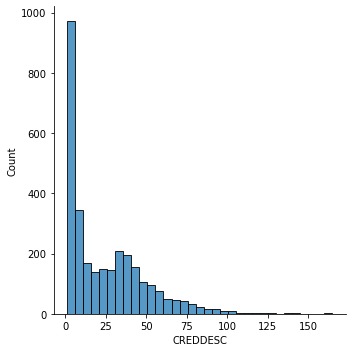

In [429]:
import seaborn as sns

sns.displot(data = df_only_bachelor.groupby('INSTNM')['CREDDESC'].count().reset_index(),
           x = 'CREDDESC')


<AxesSubplot:ylabel='Frequency'>

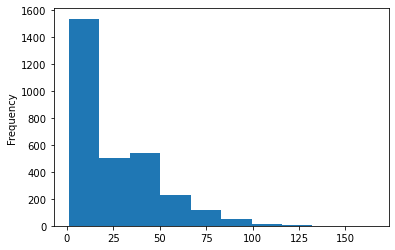

In [432]:
# below is my solution but with plot.hist() which is like reuven's -- my above is also correct the only difference is 
# in the number of bins which is larger when plotting with seaborn! 

df_only_bachelor.groupby('INSTNM')['CREDDESC'].count().plot.hist()

<AxesSubplot:ylabel='Frequency'>

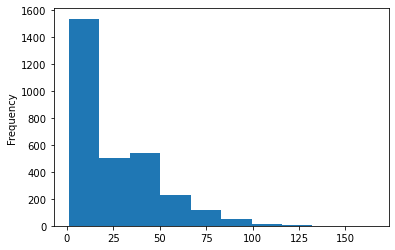

In [425]:
# reuven's solution to 6
fields_of_study_df.loc[fields_of_study_df['CREDDESC'] == \
                       'Bachelors Degree'].groupby('INSTNM')['CIPDESC'].count().plot.hist()



In [436]:
# 7 Which university offers the greatest number of bachelor programs?

df_only_bachelor.groupby('INSTNM')['CREDDESC'].count().sort_values(ascending = False).head(10)

INSTNM
Westminster College                          165
Pennsylvania State University-Main Campus    141
University of Washington-Seattle Campus      137
Ohio State University-Main Campus            126
Bethel University                            125
University of Minnesota-Twin Cities          116
Arizona State University Campus Immersion    116
University of Arizona                        116
Anderson University                          114
Purdue University-Main Campus                114
Name: CREDDESC, dtype: int64

In [90]:
# 8 Create a histogram showing how many graudate (master’s and doctoral) programs universities offer.
fields_of_study_df['CREDDESC'].unique()

array(['Bachelors Degree', "Master's Degree", 'Doctoral Degree',
       'Graduate/Professional Certificate', 'First Professional Degree',
       'Undergraduate Certificate or Diploma', "Associate's Degree",
       'Post-baccalaureate Certificate'], dtype=object)

In [93]:
df_only_grad = fields_of_study_df.loc[(fields_of_study_df['CREDDESC'] == "Master's Degree") | \
                       (fields_of_study_df['CREDDESC'] == "Doctoral Degree")]
df_only_grad.head(2)

,OPEID6,INSTNM,CONTROL,CIPDESC,CREDDESC
3,1002,Alabama A & M University,Public,Food Science and Technology.,Master's Degree
4,1002,Alabama A & M University,Public,Food Science and Technology.,Doctoral Degree


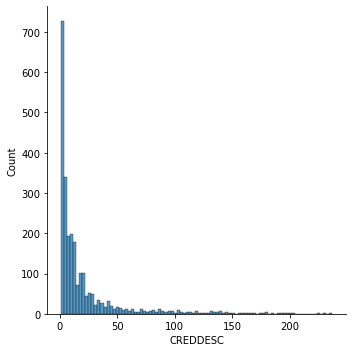

In [441]:
sns.displot(data = df_only_grad.groupby('INSTNM')['CREDDESC'].count().reset_index(),
           x = 'CREDDESC')

<AxesSubplot:ylabel='Frequency'>

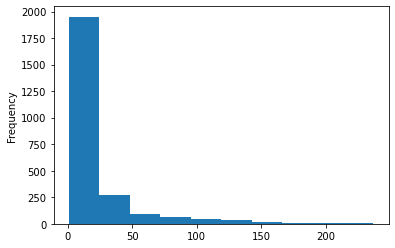

In [438]:
# my other solution using plot.hist()

df_only_grad.groupby('INSTNM')['CREDDESC'].count().plot.hist()

<AxesSubplot:ylabel='Frequency'>

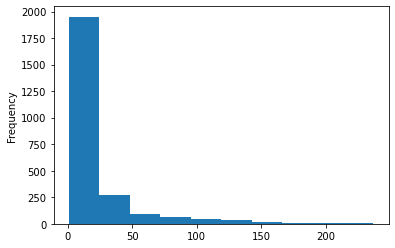

In [439]:
# reuven's solution
fields_of_study_df.loc[fields_of_study_df['CREDDESC'].isin(["Master's Degree", \
                                                            "Doctoral Degree"])].groupby('INSTNM')['CIPDESC'].count().plot.hist()


In [442]:
df_only_grad.head(2)

,OPEID6,INSTNM,CONTROL,CIPDESC,CREDDESC
3,1002,Alabama A & M University,Public,Food Science and Technology.,Master's Degree
4,1002,Alabama A & M University,Public,Food Science and Technology.,Doctoral Degree


In [443]:
# 9 Which university offers the greatest number of different graduate (master + doctoral) programs?
df_only_grad.groupby('INSTNM')['CREDDESC'].count().sort_values(ascending = False).head(10)

INSTNM
University of Washington-Seattle Campus      237
Pennsylvania State University-Main Campus    230
New York University                          226
University of Minnesota-Twin Cities          205
Ohio State University-Main Campus            200
University of Southern California            199
Arizona State University Campus Immersion    199
University of Arizona                        195
University of Florida                        194
University of Illinois Urbana-Champaign      190
Name: CREDDESC, dtype: int64

In [471]:
# 10 How many universities offer bachelor’s degrees, but not master’s or doctorates? -- my answer was wrong 

not_grad_df = fields_of_study_df.loc[~fields_of_study_df['CREDDESC'].isin(["Master's Degree", "Doctoral Degree"])]
not_grad_df.loc[not_grad_df['CREDDESC'] == 'Bachelors Degree', 'OPEID6'].count()
# (fields_of_study_df.loc[(~fields_of_study_df['CREDDESC'].isin(["Master's Degree", "Doctoral Degree"])), 
#                         'CREDDESC'] == 'Bachelors Degree')#.value_counts()

71901

In [474]:
# reuven's solution to 10

ug_schools = fields_of_study_df.loc[fields_of_study_df['CREDDESC'] == 'Bachelors Degree', 'INSTNM']
grad_schools = fields_of_study_df.loc[fields_of_study_df['CREDDESC'].isin(["Master's Degree", "Doctoral Degree"]), 'INSTNM']

ug_schools[~ug_schools.isin(grad_schools)].unique().size

# reuven's note drop_duplicates is better thank unique()

923

In [482]:
ug_schools[~ug_schools.isin(grad_schools)].drop_duplicates().size


923

In [481]:
# 11 How many universities offer master’s and doctoral degrees, but not bachelors?

grad_Schools = fields_of_study_df.loc[fields_of_study_df['CREDDESC'].isin(["Master's Degree", "Doctoral Degree"]), 'INSTNM']
ug_schools = fields_of_study_df.loc[fields_of_study_df['CREDDESC'] == 'Bachelors Degree', 'INSTNM']

grad_Schools[~grad_Schools.isin(ug_schools)].unique().size

404

In [129]:
# 12 How many institutions offer bachelor’s degrees whose name contains the term "Computer Science"?

df_only_bachelor.groupby('INSTNM', group_keys=False)['CIPDESC'].apply(lambda x: x.str.contains('Computer Science')).value_counts()

False    71077
True       824
Name: CIPDESC, dtype: int64

In [492]:
# the part i missed in 12 was thaT i did not exclude duplicates, here is reuven's approach 

fields_of_study_df.loc[fields_of_study_df['CIPDESC'].str.contains('Computer Science') & (fields_of_study_df['CREDDESC'] == 'Bachelors Degree'), 'INSTNM'].drop_duplicates().size

762

In [487]:
fields_of_study_df

,OPEID6,INSTNM,CONTROL,CIPDESC,CREDDESC
0,1002,Alabama A & M University,Public,"Agriculture, General.",Bachelors Degree
1,1002,Alabama A & M University,Public,Animal Sciences.,Bachelors Degree
2,1002,Alabama A & M University,Public,Food Science and Technology.,Bachelors Degree
3,1002,Alabama A & M University,Public,Food Science and Technology.,Master's Degree
4,1002,Alabama A & M University,Public,Food Science and Technology.,Doctoral Degree
...,...,...,...,...,...
224844,42640,California Southern University,"Private, for-profit","Clinical, Counseling and Applied Psychology.",Undergraduate Certificate or Diploma
224845,42640,California Southern University,"Private, for-profit","Clinical, Counseling and Applied Psychology.",Doctoral Degree
224846,42753,Zion Massage College,"Private, for-profit",Somatic Bodywork and Related Therapeutic Servi...,Undergraduate Certificate or Diploma
224847,42837,Oregon Coast Community College,Public,"Registered Nursing, Nursing Administration, Nu...",Associate's Degree


In [133]:
# 13 The CONTROL field describes the types of institutions in the database. 
# How many of each type offer a computer-science bachelor’s-level degree program?

fields_of_study_df['CONTROL'].unique()

array(['Public', 'Private, nonprofit', 'Private, for-profit', 'Foreign'],
      dtype=object)

In [134]:
fields_of_study_df.head(2)

,OPEID6,INSTNM,CONTROL,CIPDESC,CREDDESC
0,1002,Alabama A & M University,Public,"Agriculture, General.",Bachelors Degree
1,1002,Alabama A & M University,Public,Animal Sciences.,Bachelors Degree


In [510]:
fields_of_study_df.loc[(fields_of_study_df['CIPDESC'].str.contains
                       ('Computer Science')) & (fields_of_study_df['CREDDESC'] == 
                                                'Bachelors Degree')].groupby('CONTROL')['CIPDESC'].count()

CONTROL
Foreign                 32
Private, for-profit     18
Private, nonprofit     501
Public                 273
Name: CIPDESC, dtype: int64

In [506]:
# reuven's solution to 13 which delivers the same results as mine 
fields_of_study_df.loc[(fields_of_study_df['CIPDESC'].str.contains('Computer Science')) &
                       (fields_of_study_df['CREDDESC'] == 'Bachelors Degree'), ['CONTROL','INSTNM']].groupby('CONTROL').count()

,INSTNM
CONTROL,
Foreign,32
"Private, for-profit",18
"Private, nonprofit",501
Public,273


<AxesSubplot:ylabel='CIPDESC'>

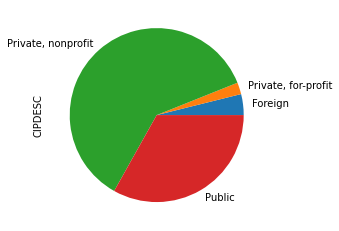

In [524]:
# 14 Create a pie chart showing the different types of institutions that offer bachelor's CS degrees

fields_of_study_df.loc[(fields_of_study_df['CIPDESC'].str.contains
                       ('Computer Science')) & (fields_of_study_df['CREDDESC'] == 
                                                'Bachelors Degree')].groupby('CONTROL')['CIPDESC'].count().plot.pie()

<AxesSubplot:ylabel='INSTNM'>

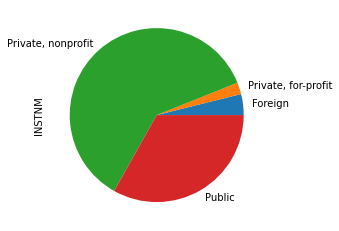

In [525]:
# reuven's solution to 14

fields_of_study_df.loc[(fields_of_study_df['CIPDESC'].str.contains('Computer Science')) &
                       (fields_of_study_df['CREDDESC'] == 'Bachelors Degree'), ['CONTROL','INSTNM']].groupby('CONTROL').count()['INSTNM'].plot.pie()

In [165]:
# 15 What are the minimum, median, mean, and maximum tuitions for an undergrad CS degree? 
# (We’ll define this as a bachelor’s program with the phrase "Computer Science" in the name.) 
# When comparing tuition, use TUITIONFEE_OUT for all schools.

institutions_df.head(2)

,OPEID6,INSTNM,CITY,STABBR,ADM_RATE,NPT4_PUB,NPT4_PRIV,NPT41_PUB,NPT45_PUB,NPT41_PRIV,NPT45_PRIV,TUITIONFEE_IN,TUITIONFEE_OUT,MD_EARN_WNE_P10,C100_4,FTFTPCTPELL
0,1002,Alabama A & M University,Normal,AL,0.8965,15529.0,NaN,14694.0,20483.0,NaN,NaN,10024.0,18634.0,36339.0,0.1052,0.6925
1,1052,University of Alabama at Birmingham,Birmingham,AL,0.8060,16530.0,NaN,13443.0,19717.0,NaN,NaN,8568.0,20400.0,46990.0,0.3816,0.3563


In [166]:
df_only_bachelor.head(2)

,OPEID6,INSTNM,CONTROL,CIPDESC,CREDDESC
0,1002,Alabama A & M University,Public,"Agriculture, General.",Bachelors Degree
1,1002,Alabama A & M University,Public,Animal Sciences.,Bachelors Degree


In [527]:
df_only_bachelor.loc[df_only_bachelor['CIPDESC'].str.contains('Computer Science')].join(institutions_df.set_index('OPEID6'), on = 'OPEID6', rsuffix = '_old')['TUITIONFEE_OUT'].describe()

count     1139.000000
mean     26996.482002
std      14903.734488
min       3154.000000
25%      13202.500000
50%      24320.000000
75%      37836.000000
max      61671.000000
Name: TUITIONFEE_OUT, dtype: float64

In [528]:
# reuven's solution which delivers the same results as mine

comp_sci_universities = fields_of_study_df.loc[(fields_of_study_df['CIPDESC'].str.contains('Computer Science')) &
                           (fields_of_study_df['CREDDESC'] == 'Bachelors Degree'), ['OPEID6','CONTROL','INSTNM']].set_index('OPEID6')

comp_sci_universities.join(institutions_df[['OPEID6', 'TUITIONFEE_OUT']].set_index('OPEID6'))['TUITIONFEE_OUT'].describe()

count     1139.000000
mean     26996.482002
std      14903.734488
min       3154.000000
25%      13202.500000
50%      24320.000000
75%      37836.000000
max      61671.000000
Name: TUITIONFEE_OUT, dtype: float64

In [535]:
# 16 Describe the tuition again, but grouped by the different types of universities ("CONTROL")

df_only_bachelor.loc[df_only_bachelor['CIPDESC'].str.contains
                     ('Computer Science')].join(institutions_df.set_index('OPEID6'), \
                      on = 'OPEID6', rsuffix = '_old').groupby('CONTROL')['TUITIONFEE_OUT'].describe().dropna()

,count,mean,std,min,25%,50%,75%,max
CONTROL,,,,,,,,
"Private, for-profit",136.0,12359.161765,1954.582965,8280.0,12054.0,12233.0,12233.0,25820.0
"Private, nonprofit",582.0,33789.982818,15973.754351,4300.0,20260.0,34245.0,47128.5,61671.0
Public,421.0,22333.437055,9618.584458,3154.0,15636.0,21312.0,27540.0,47220.0


In [536]:
# reuven's solution to 16 which delivers the same as mine 

comp_sci_universities = fields_of_study_df.loc[(fields_of_study_df['CIPDESC'].str.contains('Computer Science')) &
                           (fields_of_study_df['CREDDESC'] == 'Bachelors Degree'), ['OPEID6','CONTROL','INSTNM']].set_index('OPEID6')

comp_sci_universities.join(institutions_df[['OPEID6', 'TUITIONFEE_OUT']].set_index('OPEID6')).groupby('CONTROL')['TUITIONFEE_OUT'].describe().dropna().T

CONTROL,"Private, for-profit","Private, nonprofit",Public
count,136.000000,582.000000,421.000000
mean,12359.161765,33789.982818,22333.437055
std,1954.582965,15973.754351,9618.584458
min,8280.000000,4300.000000,3154.000000
25%,12054.000000,20260.000000,15636.000000
50%,12233.000000,34245.000000,21312.000000
75%,12233.000000,47128.500000,27540.000000
max,25820.000000,61671.000000,47220.000000


In [537]:
# 17 What is the correlation between admission rate and tuition cost? How would you interpret this?
# i solved in two parts first: only for bachelors degrees with CS in their title:

df_only_bachelor.loc[df_only_bachelor['CIPDESC'].str.contains('Computer Science')]\
.join(institutions_df.set_index('OPEID6'), on = 'OPEID6', rsuffix = '_old')[['ADM_RATE' , 'TUITIONFEE_OUT']].corr()

,ADM_RATE,TUITIONFEE_OUT
ADM_RATE,1.000000,-0.404143
TUITIONFEE_OUT,-0.404143,1.000000


In [191]:
# second in total 

institutions_df[['ADM_RATE' , 'TUITIONFEE_OUT']].corr()

,ADM_RATE,TUITIONFEE_OUT
ADM_RATE,1.000000,-0.309658
TUITIONFEE_OUT,-0.309658,1.000000


<AxesSubplot:xlabel='TUITIONFEE_OUT', ylabel='ADM_RATE'>

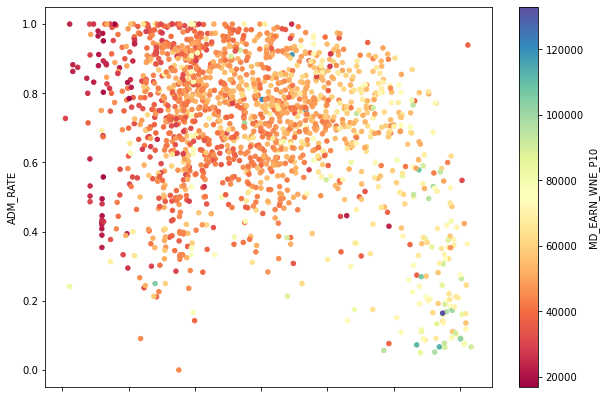

In [539]:
# 18 Create a scatter plot in which tuition is on the x axis, and admission rate is on the y axis, 
# the median earnings after 10 years are used for colorizing, and we use the "Spectral" colormap. 
# Where do the lowest-paid graduates show up on the graph?

# i do it with all data not just bachelors and CS in their title  which is what is asked for in the question

institutions_df.plot.scatter(x = 'TUITIONFEE_OUT',
                            y = 'ADM_RATE',
                            c = 'MD_EARN_WNE_P10',
                            colormap = 'Spectral',
                            figsize = (10,7))

# lowest paid grads are in the NW of the plot like the ones who paid the minimum with highest adm rate

In [542]:
print (f"my progress is {327/335*100} %")

my progress is 97.61194029850746 %


In [206]:
# 19 Which universities are in the top 25% of tuition, and also the top 25% of percentage with Pell grants? 
# Print only the institution name, city, and state, ordered by institution name.
institutions_df.head(2)

,OPEID6,INSTNM,CITY,STABBR,ADM_RATE,NPT4_PUB,NPT4_PRIV,NPT41_PUB,NPT45_PUB,NPT41_PRIV,NPT45_PRIV,TUITIONFEE_IN,TUITIONFEE_OUT,MD_EARN_WNE_P10,C100_4,FTFTPCTPELL
0,1002,Alabama A & M University,Normal,AL,0.8965,15529.0,NaN,14694.0,20483.0,NaN,NaN,10024.0,18634.0,36339.0,0.1052,0.6925
1,1052,University of Alabama at Birmingham,Birmingham,AL,0.8060,16530.0,NaN,13443.0,19717.0,NaN,NaN,8568.0,20400.0,46990.0,0.3816,0.3563


In [553]:
institutions_df.query("TUITIONFEE_OUT > TUITIONFEE_OUT.quantile(0.75) and \
                      FTFTPCTPELL > FTFTPCTPELL.quantile(0.75)")[['INSTNM', 'CITY', 'STABBR']].sort_values(by = 'INSTNM')

# query method does notn have column selector! YES but i can do [[]] afetr it like above

,INSTNM,CITY,STABBR
5491,Antioch College,Yellow Springs,OH
1206,Berea College,Berea,KY
1930,Berkeley College-Woodland Park,Woodland Park,NJ
1932,Bloomfield College,Bloomfield,NJ
2334,Chowan University,Murfreesboro,NC
1543,Dorsey College,Madison Heights,MI
3758,Dorsey College-Roseville,Roseville,MI
5138,Dorsey College-Saginaw,Saginaw,MI
3734,Dorsey College-Wayne,Wayne,MI
1542,Dorsey School of Business-Madison Heights,Madison Heights,MI


In [554]:
institutions_df.loc[((institutions_df['TUITIONFEE_OUT'] > institutions_df['TUITIONFEE_OUT'].quantile(0.75)) &\
(institutions_df['FTFTPCTPELL'] > institutions_df['FTFTPCTPELL'].quantile(0.75))), ['INSTNM', 'CITY', 'STABBR']].sort_values(by = 'INSTNM')

,INSTNM,CITY,STABBR
5491,Antioch College,Yellow Springs,OH
1206,Berea College,Berea,KY
1930,Berkeley College-Woodland Park,Woodland Park,NJ
1932,Bloomfield College,Bloomfield,NJ
2334,Chowan University,Murfreesboro,NC
1543,Dorsey College,Madison Heights,MI
3758,Dorsey College-Roseville,Roseville,MI
5138,Dorsey College-Saginaw,Saginaw,MI
3734,Dorsey College-Wayne,Wayne,MI
1542,Dorsey School of Business-Madison Heights,Madison Heights,MI


In [234]:
# 20 NPT4_PUB indicates the average net price for public institutions (in-state tuition) and NPT4_PRIV 
# for private institutions. NPT41_PUB and NPT45_PUB show the average price paid by people in the lowest 
# income bracket (1) vs. the highest income bracket (5) at public institutions. NPT41_PRIV and NPT45_PRIV 
# show the average price paid by people in the lowest income bracket (1) vs. the highest income bracket (5) 
# at private institutions. In how many institutions does the bottom quintile receive money (i.e., is the value negative)?

institutions_df[['NPT41_PUB', 'NPT45_PUB', 'NPT41_PRIV', 'NPT45_PRIV']].quantile(0.25)

NPT41_PUB      5078.50
NPT45_PUB     11470.50
NPT41_PRIV    13047.25
NPT45_PRIV    21398.00
Name: 0.25, dtype: float64

In [558]:
institutions_df.loc[((institutions_df['NPT41_PUB'] < institutions_df['NPT41_PUB'].quantile(0.25))&\
                   (institutions_df['NPT41_PUB'] < 0 )) | \
                   ((institutions_df['NPT41_PRIV'] < institutions_df['NPT41_PRIV'].quantile(0.25))&\
                   (institutions_df['NPT41_PRIV'] < 0 )) 
                ]['OPEID6'].count()
                                                                   

12

In [559]:
# reuven's solution to 20
institutions_df.loc[((institutions_df['NPT41_PUB'] < 0) |
                     (institutions_df['NPT41_PRIV'] < 0)),
                     'INSTNM'].count()

12

In [251]:
# 21 What is the average proportion that the bottom quintile pays vs. the top quintile, in public universities?
# my first solution to 21

institutions_df.loc[(institutions_df['NPT4_PUB'] < institutions_df['NPT4_PUB'].quantile(0.25)), 'NPT4_PUB'].mean() / \
institutions_df.loc[(institutions_df['NPT4_PUB'] > institutions_df['NPT4_PUB'].quantile(0.75)), 'NPT4_PUB'].mean()

0.23981702479542294

In [560]:
# my second solution to 21 after seeing reuven's solution to 20
institutions_df['NPT41_PUB'].mean() / institutions_df['NPT45_PUB'].mean()

0.5324770719158269

In [561]:
# reuven's solution to 21 
(institutions_df['NPT41_PUB'] / institutions_df['NPT45_PUB']).mean()

0.5233221766529079

In [252]:
# 22 What is the average proportion that the bottom quintile pays vs. the top quintile, in private universities?
institutions_df.loc[(institutions_df['NPT4_PRIV'] < institutions_df['NPT4_PRIV'].quantile(0.25)), 'NPT4_PRIV'].mean() / \
institutions_df.loc[(institutions_df['NPT4_PRIV'] > institutions_df['NPT4_PRIV'].quantile(0.75)), 'NPT4_PRIV'].mean()

0.3286094578161962

In [562]:
# reuven's solution to 22
(institutions_df['NPT41_PRIV'] / institutions_df['NPT45_PRIV']).mean()

0.714905619436487

In [566]:
# 23 Let’s try to figure out which universities offer the best overall ROI (across all disciplines). 
# What schools are in the cheapest 25%, but 10 years after graduation, students have the top 25% of salaries?

# -- for public schools: 

institutions_df.query("NPT4_PUB < NPT4_PUB.quantile(0.25) and MD_EARN_WNE_P10 > MD_EARN_WNE_P10.quantile(0.75)")['INSTNM']

203     California State University-Dominguez Hills
208         California State University-Los Angeles
228                                  Canada College
267                                 De Anza College
363                                Moorpark College
432                            College of San Mateo
450                                 Skyline College
645                Florida International University
652                           University of Florida
656       George T Baker Aviation Technical College
2013                  New Mexico Military Institute
2093                  CUNY Bernard M Baruch College
2096                          CUNY Brooklyn College
2097                  College of Staten Island CUNY
2098                              CUNY City College
2101                            CUNY Hunter College
2102      CUNY John Jay College of Criminal Justice
2105                            CUNY Lehman College
2108                            CUNY Queens College
2111        

In [565]:
# reuven's solution to 23

institutions_df.loc[(institutions_df['NPT4_PUB'] <=
    institutions_df['NPT4_PUB'].quantile(0.25)) &
    (institutions_df['MD_EARN_WNE_P10'] >=
        institutions_df['MD_EARN_WNE_P10'].quantile(0.75)),
    ['INSTNM', 'STABBR', 'CITY']].sort_values(by=['STABBR', 'CITY'])

,INSTNM,STABBR,CITY
203,California State University-Dominguez Hills,CA,Carson
267,De Anza College,CA,Cupertino
208,California State University-Los Angeles,CA,Los Angeles
363,Moorpark College,CA,Moorpark
228,Canada College,CA,Redwood City
450,Skyline College,CA,San Bruno
432,College of San Mateo,CA,San Mateo
652,University of Florida,FL,Gainesville
5563,University of Florida-Online,FL,Gainesville
645,Florida International University,FL,Miami


In [568]:
# 24 -- HOW ABOUT PTIVATE UNIVERSITIES?
institutions_df.loc[(institutions_df.eval("NPT4_PRIV < NPT4_PRIV.quantile(0.25) and MD_EARN_WNE_P10 > MD_EARN_WNE_P10.quantile(0.75)")), 'INSTNM']

842                        Brigham Young University-Idaho
895                     Graham Hospital School of Nursing
978                               Saint Xavier University
1011                      Calumet College of Saint Joseph
1297                             University of Holy Cross
1383                        Ner Israel Rabbinical College
1448                                   Harvard University
1775                                     Logan University
1877                                College of Saint Mary
1948    Fairleigh Dickinson University-Metropolitan Ca...
1979                                 Princeton University
1989                             Saint Peter's University
2087    Cooper Union for the Advancement of Science an...
2162                              Maria College of Albany
2231                                   St Francis College
2509                                  Franklin University
2866                                       Peirce College
2954    New En

In [262]:
# 25 Is there a correlation between admission rates and completion rates? If a school is highly selective, 
# are students more likely to graduate?

institutions_df[['ADM_RATE', 'C100_4']].corr()
# there is a negative correlation meaning the easier the students get admitetd the less chance they complete their program!
# If a school is highly selective, are students more likely to graduate? yes

,ADM_RATE,C100_4
ADM_RATE,1.000000,-0.336871
C100_4,-0.336871,1.000000


In [264]:
# 26 Ten years after graduating, from what kinds of schools (private, for-profit, private non-profit, 
# or public) do people earn, on average, the greatest amount?

fields_of_study_df['CONTROL'].unique()

array(['Public', 'Private, nonprofit', 'Private, for-profit', 'Foreign'],
      dtype=object)

In [265]:
institutions_df.shape

(6662, 16)

In [266]:
fields_of_study_df.shape

(224849, 5)

In [273]:
institutions_df.head(2)

,OPEID6,INSTNM,CITY,STABBR,ADM_RATE,NPT4_PUB,NPT4_PRIV,NPT41_PUB,NPT45_PUB,NPT41_PRIV,NPT45_PRIV,TUITIONFEE_IN,TUITIONFEE_OUT,MD_EARN_WNE_P10,C100_4,FTFTPCTPELL
0,1002,Alabama A & M University,Normal,AL,0.8965,15529.0,NaN,14694.0,20483.0,NaN,NaN,10024.0,18634.0,36339.0,0.1052,0.6925
1,1052,University of Alabama at Birmingham,Birmingham,AL,0.8060,16530.0,NaN,13443.0,19717.0,NaN,NaN,8568.0,20400.0,46990.0,0.3816,0.3563


In [274]:
fields_of_study_df.head(2)

,OPEID6,INSTNM,CONTROL,CIPDESC,CREDDESC
0,1002,Alabama A & M University,Public,"Agriculture, General.",Bachelors Degree
1,1002,Alabama A & M University,Public,Animal Sciences.,Bachelors Degree


In [571]:
institutions_df.join(fields_of_study_df.set_index('OPEID6'), 
                     on = 'OPEID6', rsuffix = '_f_of_study').groupby('CONTROL')\
                    ['MD_EARN_WNE_P10'].mean().sort_values(ascending = False)

CONTROL
Private, nonprofit     52539.363062
Public                 46682.056312
Private, for-profit    38164.132933
Name: MD_EARN_WNE_P10, dtype: float64

In [280]:
(institutions_df.join(fields_of_study_df.set_index('OPEID6'), on = 'OPEID6', rsuffix = '_f_of_study')['CONTROL'] == 'Foreign').value_counts()

False    411224
Name: CONTROL, dtype: int64

In [574]:
# reuven's solution to 26 i really did not undersy=tand why he got min()!! also two times grouped by, i think 
# my solution above may be ok at least i don't see why not!

institutions_df[['OPEID6', 'MD_EARN_WNE_P10']].set_index('OPEID6')\
                            .join(fields_of_study_df.groupby('OPEID6')['CONTROL'].min()).groupby('CONTROL').mean()

,MD_EARN_WNE_P10
CONTROL,
"Private, for-profit",30474.754943
"Private, nonprofit",48530.408744
Public,40314.442820


In [291]:
# 27 Do people who graduate from "Ivy Plus" schools earn more than the average private-school university graduate? 
# If so, then how much more?
Ivy_plus = ['Harvard University',
'Massachusetts Institute of Technology',
'Yale University',
'Columbia University in the City of New York',
'Brown University',
'Stanford University',
'University of Chicago',
'Dartmouth College',
'University of Pennsylvania',
'Cornell University',
'Princeton University']


In [580]:
joined_df = institutions_df.join(fields_of_study_df.set_index('OPEID6'), on = 'OPEID6', rsuffix= '_f_of_study')
avg_earning_private_school = joined_df.query("CONTROL == 'Private, nonprofit' or CONTROL == 'Private, for-profit'")['MD_EARN_WNE_P10'].mean()
#(joined_df['CONTROL'] == 'Private, nonprofit') | (joined_df['CONTROL'] == 'Private, for-profit')

institutions_df.loc[institutions_df['INSTNM'].isin(Ivy_plus), 'MD_EARN_WNE_P10'].mean() - avg_earning_private_school

46923.39048374233

In [305]:
# 28 Do people studying at universities in particular states earn, on average, more after 10 years?

institutions_df.groupby('STABBR')['MD_EARN_WNE_P10'].mean().sort_values(ascending = False)

STABBR
MA    53234.396226
RI    50432.789474
DC    49081.470588
CT    48662.017857
VT    48383.857143
NY    47584.653199
NH    46540.791667
WA    44594.678161
PA    44265.733083
MN    43821.510204
MD    42875.716418
NJ    42797.201754
CA    42634.263858
AK    42270.714286
NE    41762.105263
HI    41685.000000
WI    41674.013514
VA    40912.412698
NV    40906.821429
IN    40777.910714
DE    40764.230769
IL    40686.659459
ME    40152.714286
OR    40122.290323
KS    39788.314286
IA    39753.275362
MO    39730.024793
CO    39542.411765
ND    39095.136364
SD    38882.434783
OH    38781.415254
UT    37965.850000
VI    37808.000000
GA    37158.140000
WY    36911.700000
TX    36634.606250
AL    36591.563380
AZ    36405.657534
MI    36394.244898
NC    35727.823529
FL    35490.414545
TN    35184.229508
SC    35074.630952
NM    34865.472222
MT    34436.777778
WV    34304.629032
OK    33970.271739
KY    33943.357143
LA    32442.834951
ID    32142.440000
MS    31300.120000
AR    31120.346667
MH   

<AxesSubplot:xlabel='STABBR'>

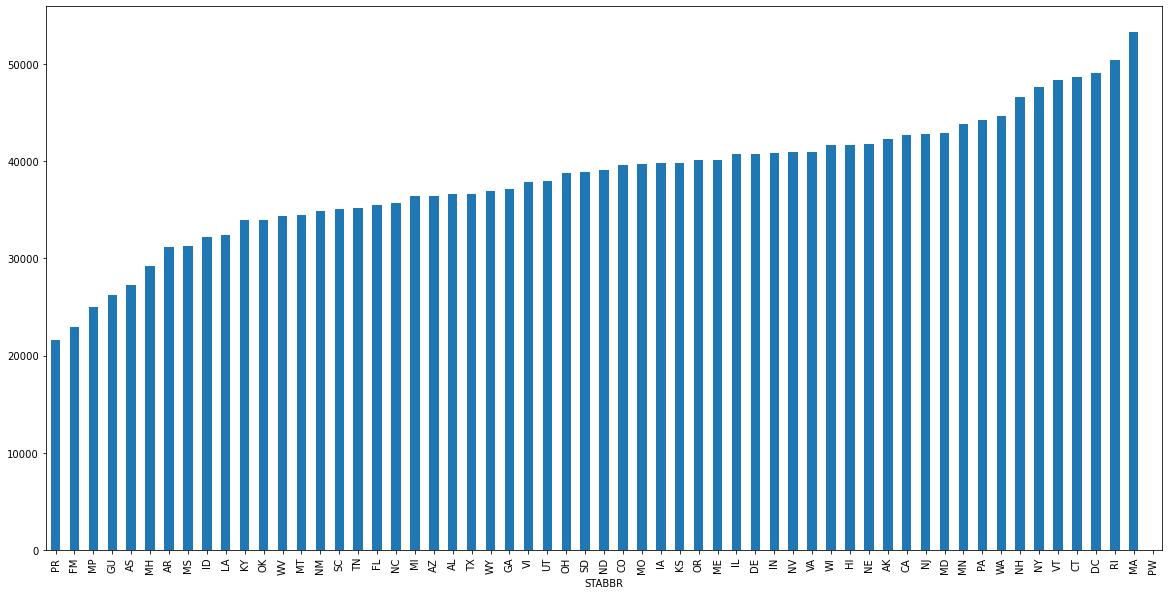

In [582]:
# 29 Create a bar plot for the average amount earned, per state, sorted by ascending pay

institutions_df.groupby('STABBR')['MD_EARN_WNE_P10'].mean().sort_values().plot.bar(figsize = (20, 10))

In [360]:
institutions_df.head(2)

,OPEID6,INSTNM,CITY,STABBR,ADM_RATE,NPT4_PUB,NPT4_PRIV,NPT41_PUB,NPT45_PUB,NPT41_PRIV,NPT45_PRIV,TUITIONFEE_IN,TUITIONFEE_OUT,MD_EARN_WNE_P10,C100_4,FTFTPCTPELL
0,1002,Alabama A & M University,Normal,AL,0.8965,15529.0,NaN,14694.0,20483.0,NaN,NaN,10024.0,18634.0,36339.0,0.1052,0.6925
1,1052,University of Alabama at Birmingham,Birmingham,AL,0.8060,16530.0,NaN,13443.0,19717.0,NaN,NaN,8568.0,20400.0,46990.0,0.3816,0.3563


In [367]:
# 30 Create a boxplot for the earnings by state.

institutions_df.groupby('STABBR')['MD_EARN_WNE_P10']


,count,mean,std,min,25%,50%,75%,max
STABBR,,,,,,,,
AK,7.0,42270.714286,6344.191903,31891.0,38447.00,43728.0,47579.00,48224.0
AL,71.0,36591.563380,9397.831327,21995.0,29643.00,35767.0,40979.50,74398.0
AR,75.0,31120.346667,11213.361463,13930.0,22182.00,29978.0,37827.00,68371.0
AS,1.0,27265.000000,NaN,27265.0,27265.00,27265.0,27265.00,27265.0
AZ,73.0,36405.657534,11324.029575,19822.0,28389.00,34165.0,42020.00,77768.0
CA,451.0,42634.263858,17697.479329,13571.0,31661.00,38493.0,52021.00,123966.0
CO,68.0,39542.411765,12173.385401,21015.0,32908.50,37014.5,44299.00,90060.0
CT,56.0,48662.017857,17225.019044,27425.0,36323.50,39832.5,55968.25,93416.0
DC,17.0,49081.470588,20583.982924,20758.0,39326.00,43590.0,56236.00,96375.0


<AxesSubplot:>

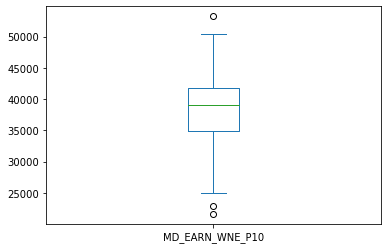

In [583]:
# reuven's solution to 30

institutions_df.groupby('STABBR')['MD_EARN_WNE_P10'].mean().plot.box()

In [591]:
print (f"I started this book at Jan. 25, 2023 and my progress at Feb. 18, 2023 exactly at 8 PM is {335/335*100:.2f} %, it took me exactly 25 days full time to finish this fabulous book!")

I started this book at Jan. 25, 2023 and my progress at Feb. 18, 2023 exactly at 8 PM is 100.00 %, it took me exactly 25 days full time to finish this fabulous book!
